In [2]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt
import os
from helper import *

In [4]:
overall = {}
for i in range(1, 20):
    overall[i] = []
for obj_num in os.listdir("new_proposed/"):
    if os.path.isdir("new_proposed/"+obj_num):
        for group in os.listdir("new_proposed/"+obj_num):
#             if os.path.isdir("new_proposed/"+obj_num+"/"+group):
            if group == "3":
                delta = {}
                baseline = []
                for i in range(1, 20):
                    delta[i] = []
                    for j in range(100):
                        with open("new_proposed/" + obj_num+"/"+group+"/proposed9_two/"+str(j)+"_"+str(i)+"summary.json", 'r') as f:
                            dic = json.load(f)
                        delta[i].append((dic['mean separation after push'] - dic['mean separation before push'])/int(obj_num))
                        with open("new_proposed/" + obj_num+"/"+group+"/proposed9/"+str(j)+"summary.json", 'r') as f:
                            dic = json.load(f)
                        baseline.append((dic['mean separation after push'] - dic['mean separation before push'])/int(obj_num))
                for i in range(1, 20):
                    overall[i].append((np.mean(delta[i]) - np.mean(baseline))/np.std(baseline))
          

In [6]:
for i in range(1, 20):
    print(i, np.mean(overall[i]))

1 0.13874082154293216
2 0.27247281674436225
3 0.3280036183293667
4 0.3548516208337163
5 0.35430736173350846
6 0.35847073769382565
7 0.3369225579896953
8 0.2894741348996604
9 0.24907589098766225
10 0.18338371100261502
11 0.10565228001647627
12 0.002772907127258106
13 -0.13557789483687016
14 -0.2583550928365761
15 -0.42728941057142206
16 -0.629281520530054
17 -0.8607163456553188
18 -1.2901301708729378
19 -1.5627028761653234


In [27]:
delta = []
load = []
for obj_num in os.listdir("load_dist/"):
#     if os.path.isdir("load_dist/"+obj_num):
    if obj_num == "4":
        for group in os.listdir("load_dist/"+obj_num):
#             if group == "3":
            if os.path.isdir("load_dist/"+obj_num+"/"+group):

                for folder in os.listdir("load_dist/" + obj_num+"/"+group):
                    if folder != "distribution_stable" and folder != "distribution":
#                     if folder == "proposed2":
                        for filename in os.listdir("load_dist/" + obj_num+"/"+group+"/"+folder):
                            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                                continue
                            with open("load_dist/" + obj_num+"/"+group+"/"+folder+"/"+filename, 'r') as f:
                                dic = json.load(f)
                            first_push = dic['first contact object']
                            if first_push == -1:
                                continue
#                             if dic[str(first_push) + ' change of pos'] < 5:
#                                 continue
                            sum_change_pos = 0
                            for i in range(int(obj_num)):
                                if i != first_push:
                                    sum_change_pos += dic[str(i) + ' change of pos']
                            vertices = np.array(dic[str(first_push)+ " original pos"]) + np.array(dic[str(first_push)+ " vertices"])
#                             print(vertices, dic["start pt"], dic["end pt"])
                            if sum_change_pos/(int(obj_num) - 1) < 1e-12:
                                try:
                                    print("load_dist/" + obj_num+"/"+group+"/"+folder+"/"+filename)
                                    l1, l2 = findLoads(vertices, dic["start pt"], dic["end pt"])
                                    load.append(l1-l2)
                                    delta.append((dic['mean separation after push'] - dic['mean separation before push'])/int(obj_num))
                                except:
                                    continue
                            
        



load_dist/4/0/proposed1/96summary.json
[3.34762222 4.75038469] [2.98672569 4.50681748]
(3.0233256463326086, 4.531518629408549)
[4.24569729 2.97317929] [4.56581312 3.29709843]
(4.408839475986137, 3.1382597868669055)
load_dist/4/0/proposed1/887summary.json
[4.73355273 2.40939267] [4.32160726 2.46330907]
(4.415770659212262, 2.4509847713595923)
[3.97163053 0.56313446] [4.76969545 0.53703115]
(4.4112261909456505, 0.5487560520332323)
load_dist/4/0/proposed1/181summary.json
[4.61713866 7.54048125] [4.14505004 7.5224561 ]
(4.409706449203084, 7.53256106415638)
[4.27842138 5.57028847] [4.72776991 5.60960926]
(4.405045166077088, 5.581368892402304)
load_dist/4/0/proposed1/209summary.json
[5.21259125 4.54269035] [4.9627354  4.83702261]
(5.084382024776547, 4.693721759157077)
[3.44687138 3.60436861] [3.87756066 3.16803646]
(3.7186263222259495, 3.329053204598703)
load_dist/4/0/proposed1/838summary.json
[6.31866694 4.37960584] [6.15980897 4.52060066]
(6.25175014257167, 4.438997816112636)
[4.60247059 3.

load_dist/4/0/proposed1/741summary.json
[5.07296183 6.95442584] [5.00547898 6.7932249 ]
(5.015466340532548, 6.817082266835652)
[6.76756556 5.90194401] [6.9576941  6.45974723]
(6.823252366845772, 6.065319263332716)
load_dist/4/0/proposed1/92summary.json
[6.04136137 9.67568883] [5.73765413 9.35713595]
(5.894535592324903, 9.52168603498787)
[7.05686107 7.95605712] [7.49551348 8.40735284]
(7.251907955961291, 8.156725853546869)
load_dist/4/0/proposed1/331summary.json
[2.40898995 6.16371719] [1.99000243 6.42175993]
(2.123099843255013, 6.339788872710743)
[1.07907325 4.67669333] [1.47389071 4.49134056]
(1.3725328496812115, 4.538924523882885)
load_dist/4/0/proposed1/703summary.json
[5.23099145 7.76644213] [4.60361335 8.17361052]
(5.108693295342383, 7.84581357030601)
[3.50717246 6.76714098] [3.90218194 6.33201821]
(3.7554516096577117, 6.493649115818996)
load_dist/4/0/proposed1/354summary.json
[5.19231714 3.10918942] [4.91175082 2.76357434]
(5.082907963895014, 2.9744139057722365)
[6.30461917 1.453

load_dist/4/0/maximumClearanceRatio/83summary.json
[3.04745893 4.4022027 ] [3.29936786 3.90765066]
(3.1474785579336673, 4.205842335580331)
[4.78698294 3.93814839] [3.96549712 5.58893009]
(4.397426102342939, 4.720965706677392)
load_dist/4/0/maximumClearanceRatio/892summary.json
[5.32884481 4.0146363 ] [3.98421163 3.98511631]
(5.005959283671365, 4.007547705779436)
[4.16948637 2.39581836] [4.33273726 2.31952543]
(4.307364647908707, 2.3313828459992116)
load_dist/4/0/maximumClearanceRatio/980summary.json
[9.11373065 2.75182516] [7.89502875 3.02989752]
(8.330367539945215, 2.9305658737263762)
[8.10310006 1.15605768] [8.33526052 1.12981592]
(8.326067867807524, 1.1308549472747347)
load_dist/4/0/maximumClearanceRatio/39summary.json
[3.38912279 4.30303321] [2.98144823 3.83478655]
(3.1459131250888697, 4.023687567269766)
[3.56265467 2.50412995] [4.52470487 2.66206887]
(4.503435183972365, 2.6585770341192556)
load_dist/4/0/maximumClearanceRatio/591summary.json
[-0.10189734  8.93818322] [-0.40271294  

load_dist/4/0/maximumClearanceRatio/476summary.json
[8.14518832 5.46770514] [7.67048933 4.7845102 ]
(7.977557771387703, 5.226448346103234)
[9.30766285 3.84986604] [9.3337814 3.8731964]
(9.328222721488002, 3.8682316576396945)
load_dist/4/0/maximumClearanceRatio/766summary.json
[4.21392351 6.06038235] [4.15039715 6.23382033]
(4.15964159104456, 6.208580993675997)
[2.32148666 6.18291684] [2.47454745 5.16978409]
(2.4260340643968163, 5.490901682501425)
load_dist/4/0/maximumClearanceRatio/324summary.json
[ 1.06837565 -0.48810674] [ 1.64849006 -1.97821093]
(1.115835542677948, -0.6100140531177495)
[ 2.59548112 -1.75093237] [ 2.80243633 -0.54831192]
(2.6798914796126465, -1.260422300923938)
load_dist/4/0/maximumClearanceRatio/636summary.json
[4.44200333 4.12403378] [4.52466484 3.06297798]
(4.450501759782542, 4.014946344969187)
[5.95055505 2.8771388 ] [6.20797706 4.13323495]
(6.047623792166295, 3.3507877040401786)
load_dist/4/0/maximumClearanceRatio/965summary.json
[4.85350445 4.29677975] [4.48652

load_dist/4/0/proposed0/619summary.json
[6.87494496 7.68426402] [6.46789367 7.25005728]
(6.7273035441548155, 7.526773064520502)
[7.22174297 5.82496155] [8.34488058 6.60080394]
(7.885339472690043, 6.283361561553979)
load_dist/4/0/proposed0/532summary.json
[5.53943066 2.87321982] [4.66645894 3.4277612 ]
(4.699439329264083, 3.406810958543209)
[4.38634184 1.46177795] [4.64961135 1.4280291 ]
(4.6327764144582035, 1.4301871556541161)
load_dist/4/0/proposed0/339summary.json
[8.61386405 5.98243796] [7.6737293  6.04829979]
(8.154054086638753, 6.014650316934473)
[7.55207035 4.28756614] [8.30277797 4.1601496 ]
(8.046728253321351, 4.2036085255074696)
load_dist/4/0/proposed0/694summary.json
[2.74854099 4.96492571] [2.51110879 4.72971742]
(2.6251693689264957, 4.8427096812142985)
[3.66345276 3.20636964] [4.21977165 3.7029733 ]
(3.9518393271961934, 3.463800810503769)
load_dist/4/0/proposed0/542summary.json
[7.8899493  2.94848247] [7.82054933 2.98588616]
(7.841301758084419, 2.9747010756905103)
[6.394769

(2.194266370938902, 4.451989305033584)
load_dist/4/0/proposed0/860summary.json
[5.33495114 3.97263738] [5.09554294 3.74771511]
(5.1730106247147045, 3.820495422563304)
[6.33207609 2.24395823] [6.64668666 2.48671861]
(6.60105778381925, 2.4515104060474755)
load_dist/4/0/proposed0/446summary.json
[7.33834276 7.14910197] [6.36040027 7.13471892]
(6.921514371970306, 7.142971448853258)
[6.77714718 5.27335798] [7.36234714 5.40379464]
(6.884027756009364, 5.297180882290118)
load_dist/4/0/proposed0/554summary.json
[5.41437878 6.728101  ] [4.38247885 7.11588048]
(5.312207197238647, 6.766496192659355)
[3.62591422 5.93707031] [3.97307815 5.36583048]
(3.9015416632399336, 5.483540061165673)
load_dist/4/0/proposed0/810summary.json
[-0.19370179  5.19272789] [-0.64011956  4.37651377]
(-0.3478837126939117, 4.91082726557506)
[1.0166932  3.60590838] [1.28724706 3.98603178]
(1.0326080174675072, 3.6282683964528446)
load_dist/4/0/proposed0/663summary.json
[2.9114526  5.41621597] [2.60486221 5.93661403]
(2.64583

load_dist/4/0/proposed0/364summary.json
[5.77834582 7.77356759] [5.0265595  7.64798879]
(5.575399850061406, 7.739667339454478)
[4.88000169 6.06085602] [5.50833206 5.79995864]
(5.487982597452874, 5.8084082657828535)
load_dist/4/0/proposed0/206summary.json
[3.20735504 5.97554396] [3.0488439 6.0506567]
(3.200987074195589, 5.978561331491099)
[1.85330423 4.58327353] [2.1331581  4.29013615]
(2.071544265377779, 4.354674609824672)
load_dist/4/0/proposed0/939summary.json
[4.24958169 4.59359941] [4.21466471 4.31650859]
(4.217030546051686, 4.335282744150982)
[6.08538644 3.83967145] [5.63495659 5.23859351]
(5.937524704815614, 4.298892812076417)
load_dist/4/0/proposed0/644summary.json
[3.14997676 4.05844444] [2.76498155 2.91588509]
(3.0837696069866625, 3.861959883160799)
[4.44532844 2.55082735] [4.70193971 3.08031353]
(4.446631646400394, 2.553516411579328)
load_dist/4/0/proposed0/726summary.json
[7.48722608 5.15620392] [7.16110488 4.49131303]
(7.448825641874965, 5.077913632924638)
[8.87132324 3.713

load_dist/4/0/proposed0/746summary.json
[3.65639908 8.68124071] [3.43915162 8.68631758]
(3.5101404167376837, 8.684658462301016)
[3.31442588 6.71229627] [3.46281775 6.69187809]
(3.4606704787434555, 6.692173759996008)
load_dist/4/0/proposed0/374summary.json
[4.38618764 7.75275582] [4.16246997 7.92706072]
(4.3500741818694095, 7.780892680733342)
[2.95715692 6.35361244] [3.01615623 6.2989206 ]
(2.989340244856842, 6.323779295061135)
load_dist/4/0/proposed0/624summary.json
[4.30010807 5.39322809] [4.28026761 5.09596517]
(4.291678934965356, 5.26693628697465)
[6.27228652 5.0834687 ] [6.22658412 5.49175781]
(6.271007524609189, 5.094894067237811)
load_dist/4/0/proposed0/857summary.json
[3.85355627 4.81707668] [3.7509661  4.72067162]
(3.765352678602917, 4.734190872071353)
[4.8231063  3.10071136] [5.29863985 3.46007518]
(5.212848997574046, 3.3952424726246044)
load_dist/4/0/proposed0/368summary.json
[6.54928294 7.09051735] [6.13766221 6.34839857]
(6.487889093132073, 6.9798292005550735)
[7.69583718 5

load_dist/4/0/proposed0/331summary.json
[2.51771429 6.03038085] [2.40898995 6.16371719]
(2.429614970442821, 6.1384230367752926)
[0.87585408 4.88848994] [1.07699511 4.67830646]
(1.0494310321027058, 4.707109794798359)
load_dist/4/0/proposed0/703summary.json
[5.23099145 7.76644213] [4.60361335 8.17361052]
(5.09181424200826, 7.856768076289898)
[3.50717246 6.76714098] [3.90218194 6.33201821]
(3.7689281278447813, 6.478804054706221)
load_dist/4/0/proposed0/185summary.json
[7.50675176 4.48433605] [5.78439604 3.93898574]
(6.832759805940901, 4.270929655604139)
[6.32876819 2.90781006] [6.83631138 2.80457242]
(6.831816037056569, 2.805486834122665)
load_dist/4/0/proposed0/354summary.json
[5.19231714 3.10918942] [4.91175082 2.76357434]
(5.022427371467894, 2.899911004582332)
[6.48532095 1.58537845] [6.63063452 1.75200108]
(6.542473258713035, 1.6509117945678433)
load_dist/4/0/proposed0/909summary.json
[3.29419865 4.93567579] [3.02552067 5.29035894]
(3.049011205620992, 5.259348867913082)
[1.48133599 4.

load_dist/4/0/proposed0/802summary.json
[3.94350622 9.52920578] [3.54937919 9.24226428]
(3.6442875815222133, 9.311361753046842)
[5.06551937 7.93826581] [5.07768218 7.9522427 ]
(5.073326346328621, 7.947236695133546)
load_dist/4/0/proposed0/424summary.json
[7.6851328  5.63240655] [7.8217592 5.0627832]
(7.7067392061093605, 5.5423253170298645)
[9.66891523 5.40206019] [9.10291777 6.47826963]
(9.585426588098032, 5.560808622406096)
load_dist/4/0/proposed0/13summary.json
[6.04087612 6.82906687] [5.45075262 7.51554749]
(5.714753491011179, 7.2084397021158955)
[4.27863246 5.97919554] [4.82267761 5.62199683]
(4.368213650690426, 5.920380109791154)
load_dist/4/0/proposed0/546summary.json
[2.9643908  5.61705037] [2.82353507 5.77593738]
(2.8856509970933346, 5.705869659636361)
[1.40726977 4.36717183] [1.99014189 4.04971608]
(1.4707940190901498, 4.332573989506366)
load_dist/4/0/proposed0/201summary.json
[4.88423327 1.06918437] [5.14326096 0.70474473]
(5.079614881644407, 0.7942918098984612)
[6.72496674 1

load_dist/4/0/proposed0/19summary.json
[5.13193302 7.06604616] [4.84599223 7.35602439]
(4.960514983613174, 7.239884453990942)
[3.47351412 5.94885002] [3.6986274  5.71856278]
(3.608363899644368, 5.810901009494948)
load_dist/4/0/proposed0/617summary.json
[5.27229321 4.80785866] [5.40832229 4.2810575 ]
(5.284633375277764, 4.760069004044026)
[7.25121489 4.5820609 ] [7.22960833 5.07322842]
(7.240164450139472, 4.833261709733434)
load_dist/4/0/proposed0/94summary.json
[7.61892971 4.16000145] [7.15124997 4.89077855]
(7.280829796896173, 4.688302375127851)
[5.6767633  3.72572637] [6.24821927 3.11389562]
(6.052780726802994, 3.32314243431891)
load_dist/4/0/proposed0/69summary.json
[2.54181389 4.93864825] [1.73381531 4.29433588]
(2.1024840210173603, 4.588318849077599)
[3.34061738 3.20386316] [3.66989146 4.00545453]
(3.3517799875283565, 3.231037663813673)
load_dist/4/0/proposed0/885summary.json
[4.47271524 3.72743699] [3.75474164 3.71198554]
(4.202161711459025, 3.721614448702837)
[4.09559138 1.78734

load_dist/4/0/proposed0/381summary.json
[1.74937511 6.70509996] [1.24157168 6.34019176]
(1.382516796530822, 6.441475142087329)
[2.66028975 4.95928241] [2.93005424 5.27683298]
(2.7623598932514906, 5.0794332377502505)
load_dist/4/0/proposed0/498summary.json
[5.46914632 4.05204698] [5.19440581 4.05045028]
(5.391299275971569, 4.051594624246968)
[5.24339051 2.06518713] [6.12721461 2.44722965]
(5.345748557367068, 2.1094325045018096)
load_dist/4/0/proposed0/52summary.json
[6.9571384  4.50609596] [6.67737773 3.88445014]
(6.70954073847401, 3.9559183056693605)
[8.59718885 3.42376511] [8.65801686 3.62830583]
(8.652833218324247, 3.61087582367051)
load_dist/4/0/proposed0/135summary.json
[5.27628017 6.12890838] [5.15981051 6.24211491]
(5.23116816287586, 6.17275617459291)
[3.68565905 4.92466627] [3.89438541 4.69337155]
(3.838640301214752, 4.7551441866063415)
load_dist/4/0/proposed0/696summary.json
[5.37264942 2.51241362] [5.38285368 2.14626308]
(5.3769133517839744, 2.359417017086045)
[7.33715063 2.14

load_dist/4/0/clusterDiffusion/402summary.json
[5.80580236 9.03847492] [4.91705865 8.93735806]
(5.70104549755559, 9.026556157707054)
[4.61629853 7.56643611] [5.49546001 7.09977727]
(5.220374900287799, 7.245792467575151)
load_dist/4/0/clusterDiffusion/824summary.json
[3.32763915 4.13863608] [3.23726634 4.17300549]
(3.2675245183583774, 4.161498348311718)
[2.53418853 2.30277729] [3.19520203 2.25875149]
(2.60792973638057, 2.2978658505486385)
load_dist/4/0/clusterDiffusion/657summary.json
[6.881996   4.17122777] [6.15627784 4.26843224]
(6.411690551321532, 4.234221668663552)
[6.0300526  2.36669713] [6.44685348 2.29880569]
(6.370531691754975, 2.311237477000946)
load_dist/4/0/clusterDiffusion/581summary.json
[8.61056542 9.8408437 ] [8.21879461 9.83026586]
(8.437491431044672, 9.836170580774956)
[7.97554619 7.97030463] [8.81128461 7.92632257]
(8.452060597923383, 7.945227344009998)
load_dist/4/0/clusterDiffusion/29summary.json
[6.07045192 6.18516425] [5.6997644  5.30848424]
(5.752121072926337, 5.

load_dist/4/0/clusterDiffusion/694summary.json
[3.86018463 5.1391562 ] [4.25824436 4.74212305]
(4.04804868607089, 4.95177671155565)
[5.73176958 5.51863592] [5.1279592  6.54048754]
(5.341877988419555, 6.178464455556551)
load_dist/4/0/clusterDiffusion/717summary.json
[ 3.4445966  10.08285929] [2.37998459 9.88887359]
(2.9060349245018653, 9.984726540268774)
[3.01549923 8.15964268] [3.23016197 8.17257465]
(3.180427076994848, 8.169578624824974)
load_dist/4/0/clusterDiffusion/688summary.json
[4.07933905 6.92052143] [3.89451825 6.72871742]
(4.002999816768577, 6.841297775402161)
[5.02301238 5.19032191] [5.56996962 5.64274772]
(5.402436488902826, 5.504169598945038)
load_dist/4/0/clusterDiffusion/978summary.json
[6.728526  8.7640933] [6.21810737 8.80398632]
(6.390628010613533, 8.790502468780405)
[5.96764042 6.91763801] [6.45915409 6.8221709 ]
(6.307710759737417, 6.851585933086255)
load_dist/4/0/clusterDiffusion/675summary.json
[8.33121645 7.78746103] [7.51783624 8.10586567]
(7.593746321119858, 8.

[8.09878804 4.07115395] [8.18959912 5.00050228]
(8.161768253236206, 4.715685376383579)
load_dist/4/0/clusterDiffusion/446summary.json
[8.47112341 6.09679734] [8.14696623 6.05053506]
(8.397013312674114, 6.086220738256649)
[7.86790471 4.28280744] [8.96563002 4.24119504]
(8.367610693842925, 4.263864645278799)
load_dist/4/0/clusterDiffusion/810summary.json
[1.71913939 6.74098476] [1.53539023 6.74258177]
(1.5714303815634254, 6.742268368564659)
[1.6116015  4.74607517] [2.1439635  4.89516611]
(1.7036294207477494, 4.77184813554199)
load_dist/4/0/clusterDiffusion/166summary.json
[4.17095035 0.36298181] [3.25569752 0.66176204]
(3.662137179564107, 0.529081622906796)
[ 3.15876024 -1.28010912] [ 3.7652753  -1.26693138]
(3.337587858383375, -1.276223726273678)
load_dist/4/0/clusterDiffusion/663summary.json
[3.62885803 4.73211336] [3.1115172 4.7321239]
(3.2897748922144627, 4.7321203066984125)
[3.38806363 2.76631313] [3.63679585 2.80235344]
(3.490528778960403, 2.7811598843301084)
load_dist/4/0/clusterD

(7.078044107199046, 3.838822300306376)
load_dist/4/0/clusterDiffusion/176summary.json
[4.88918396 6.40031238] [4.90215713 6.13833471]
(4.891347458340574, 6.356624961420416)
[6.87162452 6.15045951] [6.81936802 6.67680788]
(6.851710862828625, 6.351037236124256)
load_dist/4/0/clusterDiffusion/692summary.json
[5.72816334 1.82563149] [4.82982416 1.52897832]
(5.408247469896859, 1.7199875880097464)
[ 5.69536658 -0.14944481] [6.12398896 0.01816476]
(5.786301145311794, -0.11388550597368866)
load_dist/4/0/clusterDiffusion/870summary.json
[6.45728232 6.29223284] [5.27291825 6.03668612]
(6.111771324928144, 6.217682937172033)
[5.44505707 4.57777591] [6.25197334 4.41103795]
(5.931770158051869, 4.477203488509684)
load_dist/4/0/clusterDiffusion/61summary.json
[5.47143159 2.82345523] [5.48618166 2.5242293 ]
(5.473996860570725, 2.771416800002058)
[7.40244561 2.37084274] [7.00522946 3.56488777]
(7.2729858069566, 2.760003144014449)
load_dist/4/0/clusterDiffusion/912summary.json
[5.00200281 9.94002106] [4.

load_dist/4/0/clusterDiffusion/156summary.json
[5.5472838  4.54651826] [5.20272326 4.58352415]
(5.491963989413888, 4.552459688850328)
[4.45235376 3.00981992] [5.02040894 2.61738406]
(4.9926742509581565, 2.6365442846110065)
load_dist/4/0/clusterDiffusion/599summary.json
[5.73358141 3.3578258 ] [5.1701224  3.38247665]
(5.558236858490315, 3.3654969995404738)
[4.44526099 2.14814627] [6.35591308 2.08747107]
(5.316409846361441, 2.120481820525546)
load_dist/4/0/clusterDiffusion/458summary.json
[3.50710022 4.4782514 ] [3.48357923 4.28577817]
(3.4926621170401626, 4.360103255486382)
[5.40768323 3.87986991] [5.4803387  4.33791628]
(5.46409611288309, 4.2355174374718905)
load_dist/4/0/clusterDiffusion/611summary.json
[5.31745917 3.29347591] [5.401875   2.85582214]
(5.320201741177492, 3.2792573804120666)
[7.10774119 2.64728957] [7.06044832 3.92793126]
(7.086515596803645, 3.222055959376641)
load_dist/4/0/clusterDiffusion/703summary.json
[4.86483231 6.06680602] [4.91753298 5.57056082]
(4.8880450917734

load_dist/4/0/clusterDiffusion/21summary.json
[4.48592846 5.07544055] [3.96181829 5.15570906]
(4.0545519551597415, 5.14150676779816)
[3.52011407 3.33248726] [4.34470767 3.19871905]
(4.203118459300233, 3.2216880852995917)
load_dist/4/0/clusterDiffusion/952summary.json
[4.53952333 7.48037834] [3.62308209 7.94556341]
(3.6335518364573565, 7.94024892047205)
[3.73924998 5.94908099] [3.79250394 5.9529732 ]
(3.7497691041560675, 5.949850291306647)
load_dist/4/0/clusterDiffusion/382summary.json
[6.51589502 2.9477606 ] [6.12147806 2.87835174]
(6.445031110068019, 2.9352901033115946)
[5.66378661 1.38257301] [7.1150687  1.16877669]
(6.518924763581466, 1.2565979131568807)
load_dist/4/0/clusterDiffusion/195summary.json
[4.37077491 2.44729025] [4.36547448 2.09598057]
(4.366884336060085, 2.1894215288319736)
[6.31733409 1.99406797] [6.2122295  2.76746793]
(6.276492305437611, 2.294597211952895)
load_dist/4/0/clusterDiffusion/168summary.json
[7.16341132 8.74876265] [6.15740397 8.52973893]
(6.80694682138446

(8.016608968846743, 6.3550480694046)
load_dist/4/0/clusterDiffusion/562summary.json
[6.52468091 6.6787729 ] [6.25753127 6.71009714]
(6.310098391306702, 6.703933582261488)
[5.38961692 5.24675189] [6.4698247  4.72928384]
(6.2900600860084435, 4.815399135271292)
load_dist/4/0/clusterDiffusion/826summary.json
[4.14933852 4.57483064] [4.11412909 3.90217453]
(4.127211815307124, 4.152112071435184)
[5.74357743 3.44832527] [5.89358182 4.75941334]
(5.834708833682363, 4.24484408367781)
load_dist/4/0/clusterDiffusion/512summary.json
[6.42481643 9.13230418] [5.87012592 9.41891036]
(6.08577560960984, 9.307485016911098)
[5.04438148 7.68652614] [6.00414236 7.47540929]
(5.4883019861083495, 7.588877794613045)
load_dist/4/0/clusterDiffusion/639summary.json
[6.21152603 6.33876129] [6.12013461 5.8463475 ]
(6.139231589879615, 5.9492411145467115)
[8.11650091 5.86664701] [8.0772602  6.19743673]
(8.112395162035432, 5.90125648332193)
load_dist/4/0/clusterDiffusion/337summary.json
[5.73110914 8.78696929] [4.53788

load_dist/4/0/clusterDiffusion/102summary.json
[3.62637574 4.75990934] [3.52246374 4.20880658]
(3.5328827432279737, 4.26406421591109)
[5.51695335 4.26838977] [5.4690563  4.61453443]
(5.500943866180603, 4.3840873075601525)
load_dist/4/0/clusterDiffusion/452summary.json
[4.28142135 4.73868779] [3.62423387 4.61619359]
(3.9512463543886, 4.677145985256039)
[4.07644959 2.75211937] [4.80427365 3.01654449]
(4.351420900571514, 2.8520189521145602)
load_dist/4/0/clusterDiffusion/889summary.json
[4.56946557 5.47331132] [4.57030995 5.31662172]
(4.569810104140254, 5.409401579789486)
[6.48525947 5.00482478] [6.34043092 6.03397468]
(6.432770626367302, 5.377809628993806)
load_dist/4/0/clusterDiffusion/229summary.json
[4.22834155 9.63861007] [3.84305592 9.50783363]
(4.154072298348767, 9.613400976355678)
[3.6077835  7.97636259] [5.21949064 8.15144446]
(4.424134155686161, 8.065043857726874)
load_dist/4/0/clusterDiffusion/65summary.json
[4.06912261 7.68030264] [3.45683343 7.76244282]
(3.55670211256243, 7.7

load_dist/4/0/proposed2/980summary.json
[5.52426148 3.13995836] [4.76448429 2.80309556]
(5.521395197863603, 3.138687537175436)
[5.01599657 1.27229451] [5.58952129 1.14295048]
(5.516666588908722, 1.1593810048679838)
load_dist/4/0/proposed2/712summary.json
[4.84458968 8.61170753] [4.61070897 8.5936209 ]
(4.823879477045126, 8.610105798742424)
[4.64925671 6.62460245] [5.08872472 6.6538482 ]
(4.822307678263802, 6.63611872211336)
load_dist/4/0/proposed2/49summary.json
[5.14893468 5.2541448 ] [4.36463554 5.35680831]
(4.584355890469755, 5.328047232423575)
[4.16268098 3.51473496] [4.84302368 3.41610928]
(4.5828634497189675, 3.4538233601149257)
load_dist/4/0/proposed2/205summary.json
[3.23156553 1.28522002] [3.44209817 0.49920634]
(3.260869027597095, 1.1758167169438423)
[5.18033754 0.85242651] [5.20102787 1.3184256 ]
(5.194559352709788, 1.1727370331363174)
load_dist/4/0/proposed2/755summary.json
[2.23501988 6.01146959] [2.54311202 5.26448079]
(2.2440290383750106, 5.9896262363704365)
[4.23159702 

load_dist/4/0/proposed2/297summary.json
[7.41676348 3.96390212] [6.84423948 3.84116964]
(7.243971561621962, 3.9268605432718613)
[7.05423747 2.00663331] [7.28695536 1.96856014]
(7.242418102096532, 1.975846593248125)
load_dist/4/0/proposed2/141summary.json
[5.26416265 8.86943171] [4.62421751 8.72939214]
(5.160043885894598, 8.846647287673319)
[5.12365217 6.87667085] [5.41154473 6.91227208]
(5.158478686740487, 6.880977642537517)
load_dist/4/0/proposed2/676summary.json
[3.85238626 9.41132235] [3.6763757  8.74951152]
(3.695204849488103, 8.820310345769053)
[5.53852314 8.33915703] [5.45754536 9.45820747]
(5.503913942524771, 8.817429790657165)
load_dist/4/0/proposed2/819summary.json
[4.00313592 1.76477562] [2.83986305 2.51038223]
(2.981161212248433, 2.4198163485388604)
[2.95154738 0.53207791] [3.00570415 0.5292172 ]
(2.9766480192352844, 0.5307519699639849)
load_dist/4/0/proposed2/244summary.json
[3.55392894 2.0650695 ] [3.59209065 1.6188637 ]
(3.565012526320211, 1.9354751304734301)
[5.5377291 1

(4.896450177189182, 2.460089309037366)
load_dist/4/0/proposed2/643summary.json
[7.59983077 5.61359723] [7.42400106 5.63144281]
(7.435229994372383, 5.630303310724581)
[7.34456441 3.63375474] [7.7895796  3.70581689]
(7.43049325047997, 3.6476693307928887)
load_dist/4/0/proposed2/626summary.json
[5.08015191 3.05080942] [5.26298815 2.08292687]
(5.1389446555403655, 2.739577391678376)
[7.01651819 2.58567805] [6.98259256 3.02232007]
(7.0047916801556145, 2.7366057819502614)
load_dist/4/0/proposed2/299summary.json
[6.31131939 8.03749772] [5.70256797 8.12824929]
(5.930261977285766, 8.094305010668684)
[5.41486005 6.2496786 ] [6.07891561 6.16459055]
(5.928740697404949, 6.1838331015600385)
load_dist/4/0/proposed2/867summary.json
[1.27059678 5.99794584] [0.45489797 5.71092081]
(1.243799964098873, 5.9885166494765985)
[0.89012286 4.04153591] [1.48236192 4.0565443 ]
(1.2422566524955458, 4.050459634632189)
load_dist/4/0/proposed2/678summary.json
[4.91448709 3.03885246] [4.74790005 2.65133458]
(4.77296374

load_dist/4/0/boundaryShear/96summary.json
[3.34762222 4.75038469] [2.98672569 4.50681748]
(2.9890283334720644, 4.508371497264174)
[4.24569729 2.97317929] [4.56581312 3.29709843]
(4.436480076718862, 3.1662287608125412)
load_dist/4/0/boundaryShear/209summary.json
[5.21259125 4.54269035] [4.9627354  4.83702261]
(5.106040105149275, 4.668208362656378)
[3.44687138 3.60436861] [3.87756066 3.16803646]
(3.6952969073913677, 3.3526882801937155)
load_dist/4/0/boundaryShear/472summary.json
[4.74782294 6.21941697] [4.37472443 5.77336624]
(4.526402586071393, 5.9547021333377845)
[5.90845815 4.59265084] [6.11626258 4.81170893]
(6.091721659023757, 4.785839017358669)
load_dist/4/0/boundaryShear/35summary.json
[5.97338995 5.44449827] [5.67730017 5.11993003]
(5.8448728854259775, 5.3036201857074685)
[7.02946137 3.74931569] [7.38000321 4.07284979]
(7.278667740175575, 3.9793218047764594)
load_dist/4/0/boundaryShear/284summary.json
[3.6746076 6.714581 ] [3.14450802 6.33042474]
(3.2931316097179812, 6.438130352

load_dist/4/0/boundaryShear/702summary.json
[-0.7212238   6.37528272] [-1.09536921  6.07303452]
(-0.9044036087135178, 6.227303504799287)
[-0.8752593   4.65230457] [0.20512303 4.60508135]
(0.010554235221541175, 4.613585876622988)
load_dist/4/0/boundaryShear/179summary.json
[6.53212379 4.94366837] [6.3693707  5.11088207]
(6.5008985398395565, 4.975749636324466)
[4.96179376 3.7053592 ] [5.14643968 3.5290586 ]
(4.988875679786409, 3.6795011374456528)
load_dist/4/0/boundaryShear/222summary.json
[4.65671619 6.45965757] [4.24656124 7.0433984 ]
(4.306750402615962, 6.957736049608641)
[3.01459645 5.47448251] [3.08884451 5.41324708]
(3.0465572299288115, 5.448122763470381)
load_dist/4/0/boundaryShear/109summary.json
[7.94403811 3.87652769] [7.88978312 3.95350882]
(7.908364287570353, 3.927143742476384)
[6.29472034 2.74725842] [6.4789135  2.55617008]
(6.376421299255303, 2.662499172124881)
load_dist/4/0/boundaryShear/527summary.json
[1.408578   9.37530009] [1.20791118 9.5413694 ]
(1.3496978841727507, 9

load_dist/4/0/boundaryShear/331summary.json
[-0.08685262  8.85717606] [-0.41588524  9.23315402]
(-0.17821170133845, 8.961569889861783)
[-1.77439577  7.80003523] [-1.5564733   7.59034086]
(-1.641258931036336, 7.671925323633412)
load_dist/4/0/boundaryShear/909summary.json
[3.29419865 4.93567579] [3.02552067 5.29035894]
(3.034218258734203, 5.278877110773861)
[1.70018507 3.79347269] [1.94166645 3.62684392]
(1.705004349385152, 3.7901473248876596)
load_dist/4/0/boundaryShear/748summary.json
[4.40233668 6.47724689] [4.14296513 6.17398537]
(4.3191181340225215, 6.379946395638883)
[5.3027516  4.73031169] [5.60819964 4.88194744]
(5.496188992208855, 4.826341165425043)
load_dist/4/0/boundaryShear/218summary.json
[2.54144954 3.87268299] [2.43789731 3.78459325]
(2.508594082258395, 3.844733482691876)
[3.86048793 2.37929877] [4.0429538  2.64722014]
(3.9150121904454407, 2.4593587079856607)
load_dist/4/0/boundaryShear/845summary.json
[4.51759346 3.27755049] [4.40713009 3.40914884]
(4.422503736066495, 3.3

(4.615219673129523, 6.236076587651217)
[5.93487535 4.75339723] [6.29577294 5.47480706]
(6.117310118474006, 5.11807193078241)
load_dist/4/0/boundaryShear/640summary.json
[4.55617219 2.80547608] [4.20972224 3.16103116]
(4.444289993006286, 2.9202987459068823)
[2.8583687  1.75060909] [2.91858115 1.66985307]
(2.9137493980135516, 1.6763330831229522)
load_dist/4/0/boundaryShear/596summary.json
[3.51072877 9.2655607 ] [3.42792738 9.18943922]
(3.428848259575242, 9.1902860440861)
[4.86523509 7.79871027] [5.14454221 8.52418806]
(4.888229463447186, 7.8584363270279995)
load_dist/4/0/boundaryShear/913summary.json
[4.38342622 3.93395133] [4.2058399  4.13358949]
(4.29399198082613, 4.034491234504254)
[2.77044352 2.75397805] [2.92309397 2.5993661 ]
(2.890461441812199, 2.6324178428345606)
load_dist/4/0/boundaryShear/535summary.json
[4.96751778 7.61857235] [3.80850329 8.08245723]
(4.674337240332808, 7.73591519854553)
[3.33246745 6.48144203] [3.44233546 6.36988144]
(3.4236669741825128, 6.388837242403727)
l

load_dist/4/1/proposed1/284summary.json
[3.85405781 8.02881272] [3.37055782 8.29189968]
(3.406576040497592, 8.272300997575798)
[2.66921187 6.57123208] [2.76047809 6.68880317]
(2.737027034096294, 6.658593366455365)
load_dist/4/1/proposed1/307summary.json
[5.70592345 6.82693745] [5.40259265 6.61559611]
(5.672587509044498, 6.803711154451987)
[6.40955522 5.24008981] [6.97948639 5.55976005]
(6.937220311022697, 5.536053306719781)
load_dist/4/1/proposed1/581summary.json
[6.26137281 6.62383526] [5.30930033 6.50788041]
(6.206808338052791, 6.617189710875274)
[5.5650543  5.19561992] [5.74879383 5.14295354]
(5.6114609778865905, 5.18231825923096)
load_dist/4/1/proposed1/735summary.json
[3.18690445 5.51567799] [3.80105067 4.64278588]
(3.417827156855615, 5.187465306575678)
[5.09524514 5.31838728] [4.99044838 5.8563901 ]
(4.993673161026948, 5.839834526300596)
load_dist/4/1/proposed1/59summary.json
[3.79401212 6.32391469] [3.52877051 6.55432594]
(3.719442563816945, 6.388691967011295)
[2.67825695 4.9140

load_dist/4/1/proposed1/812summary.json
[4.14467792 9.22052446] [3.82113135 9.61884891]
(3.822857238727125, 9.616723992342475)
[3.07465772 7.85801083] [3.43258886 7.72893228]
(3.0907375444516796, 7.8522121705301)
load_dist/4/1/proposed1/73summary.json
[5.17702707 3.19742973] [4.7467148  2.85088601]
(5.081566840186278, 3.1205526620669084)
[5.62995166 1.60147409] [6.12390945 1.65409346]
(5.705686504369145, 1.609541808710728)
load_dist/4/1/proposed1/373summary.json
[6.62355143 8.81029206] [6.44134297 8.73162525]
(6.485628615943553, 8.750745304967165)
[6.66634476 7.15075467] [7.57442167 7.62433974]
(7.05926164533252, 7.3556707456620325)
load_dist/4/1/proposed1/392summary.json
[4.63768089 3.28240069] [4.49211153 2.83345881]
(4.59098616103922, 3.138392113766048)
[6.13780605 2.64619074] [6.2018846  3.20022655]
(6.194437551033238, 3.1358383122593656)
load_dist/4/1/proposed1/280summary.json
[7.92980398 4.11572318] [7.5310633 4.3787786]
(7.619304561165251, 4.320564382550743)
[6.30265544 3.713020

load_dist/4/1/proposed1/4summary.json
[3.59531251 3.92153728] [3.4457684  3.79631089]
(3.59236140743893, 3.919066081373684)
[4.18105688 2.36937578] [4.73469683 2.87429126]
(4.216339348080539, 2.4015531372770704)
load_dist/4/1/proposed1/415summary.json
[2.91935844 4.19466383] [2.36649752 3.74436361]
(2.84372906083802, 4.1330643941676115)
[3.17743495 2.69038391] [3.99267238 3.03246406]
(3.400895333973242, 2.784149664481036)
load_dist/4/1/proposed1/833summary.json
[4.3639934  6.94635547] [4.07058269 7.13495839]
(4.070988161714998, 7.13469761693265)
[3.28640233 5.5029709 ] [3.94497314 5.40738821]
(3.3849532899258676, 5.488667600013219)
load_dist/4/1/proposed1/874summary.json
[4.39079031 2.87873538] [3.63967312 2.75776956]
(3.7306617653728873, 2.7724231039521454)
[4.45636115 1.24704825] [5.2069323  1.66955744]
(4.963607153505113, 1.532585610186619)
load_dist/4/1/proposed1/779summary.json
[2.86435359 5.82995555] [2.69078095 5.88059672]
(2.8047951908994504, 5.847332014033635)
[2.79219592 4.25

(2.597639624535045, 9.020706475375782)
[1.84980761 7.55104293] [2.51268663 7.53487779]
(1.986473632785214, 7.547710211082961)
load_dist/4/1/maximumClearanceRatio/170summary.json
[5.05873499 0.87148912] [4.65402673 0.45833104]
(4.715917775581457, 0.5215143288719345)
[ 5.84498891 -0.63078088] [6.29990324 0.30575323]
(6.120907293529501, -0.06274656126195582)
load_dist/4/1/maximumClearanceRatio/247summary.json
[5.6010673  6.38955366] [4.35803598 6.26605599]
(4.71367724379492, 6.301389688823442)
[5.2321233  4.95965226] [5.3605166  5.01005335]
(5.2607570888434285, 4.970892426375448)
load_dist/4/1/maximumClearanceRatio/355summary.json
[5.50713455 7.93850959] [5.16672841 7.72372594]
(5.3014430977490035, 7.808725856663164)
[5.82390671 6.28905311] [6.65818568 6.84293952]
(6.42161325125892, 6.685876654827344)
load_dist/4/1/maximumClearanceRatio/25summary.json
[3.48226114 6.02428279] [3.43416856 5.77952331]
(3.457721974559972, 5.899394869008753)
[4.65501431 4.75232036] [5.07071304 5.5428532 ]
(4.9

load_dist/4/1/maximumClearanceRatio/891summary.json
[8.37331637 7.41797534] [8.24149605 6.57303413]
(8.32098278804335, 7.082527480574134)
[9.44052106 5.95188374] [8.83688948 7.60739695]
(9.437730395389059, 5.95953718483601)
load_dist/4/1/maximumClearanceRatio/528summary.json
[4.53147289 0.42888087] [ 5.08673486 -0.29655809]
(4.647010396014809, 0.27793339909707987)
[ 5.18220586 -0.48123148] [6.31779967 0.97609621]
(6.310335453962139, 0.9665172926546367)
load_dist/4/1/maximumClearanceRatio/711summary.json
[3.96088856 5.97120873] [3.72078556 6.00762064]
(3.740577536165663, 6.004619022135722)
[4.03968287 4.43170364] [4.676993   4.63871351]
(4.348794878920498, 4.532108839677711)
load_dist/4/1/maximumClearanceRatio/983summary.json
[0.2445014  5.93325815] [0.93768287 4.97586336]
(0.26536178570776137, 5.904446583263243)
[1.489235   5.07312837] [1.49710486 6.81298218]
(1.492986450519122, 5.9024914428519315)
load_dist/4/1/maximumClearanceRatio/499summary.json
[4.5990512  2.45222918] [3.54727142 

load_dist/4/1/maximumClearanceRatio/602summary.json
[ 2.64486465 10.22983112] [1.76955746 9.58678562]
(2.617420715665684, 10.209669358647414)
[2.46718648 8.49639001] [2.90288101 8.54266467]
(2.616069016455033, 8.512202749298279)
load_dist/4/1/maximumClearanceRatio/921summary.json
[4.95738939 3.77057299] [4.71758227 4.12918824]
(4.954023457671396, 3.7756066300231903)
[3.62474915 2.86009732] [3.77280384 2.47216355]
(3.7377072340921975, 2.564123742837716)
load_dist/4/1/maximumClearanceRatio/381summary.json
[1.79644834 8.29904014] [1.74683384 8.43901288]
(1.7692477392488029, 8.37577821435374)
[0.25467913 7.20063934] [0.74514565 6.88797366]
(0.46133027263601434, 7.068902130328379)
load_dist/4/1/maximumClearanceRatio/172summary.json
[0.06345214 6.32944141] [-0.33234664  6.52863749]
(-0.12278280920898624, 6.42316894631759)
[-1.09569081  5.13103751] [0.06925196 4.8168607 ]
(-0.7028627125521225, 5.025094575420798)
load_dist/4/1/maximumClearanceRatio/422summary.json
[4.96417139 4.83367635] [5.26

load_dist/4/1/proposed0/425summary.json
[6.4991303 4.5989474] [6.36020528 4.78047784]
(6.397205398648286, 4.73213027998359)
[5.19494856 3.64074266] [5.20556226 3.52499426]
(5.2049514879118455, 3.5316582303060913)
load_dist/4/1/proposed0/803summary.json
[2.40802379 4.07555574] [3.16837399 3.75614353]
(2.4833755625043503, 4.043901566996939)
[3.55258642 4.08980626] [3.67625591 5.30796604]
(3.6636282624338232, 5.1835823034043225)
load_dist/4/1/proposed0/911summary.json
[5.84847182 5.07782435] [6.20395158 4.42167356]
(5.848637669698688, 5.077518327919708)
[7.55414042 4.97305828] [7.54292739 5.49378617]
(7.554059873876919, 4.976795950841613)
load_dist/4/1/proposed0/105summary.json
[1.05220537 1.91923547] [0.16778026 1.48994275]
(0.3397404393954632, 1.573410826972885)
[1.67463874 0.38494418] [1.85207584 0.49647964]
(1.711133035353425, 0.4078841948540669)
load_dist/4/1/proposed0/783summary.json
[8.63441519 1.57775069] [8.28204709 2.07646737]
(8.290994302927196, 2.063804010149644)
[7.15660822 0

load_dist/4/1/proposed0/184summary.json
[5.84653856 4.56533744] [4.69886343 5.21567683]
(5.703761618504495, 4.646243118360292)
[4.33789171 4.02268776] [4.64800514 3.74640763]
(4.443446392811425, 3.9286491593782653)
load_dist/4/1/proposed0/702summary.json
[5.4714698  5.23028721] [5.16935393 5.7553492 ]
(5.173492149836432, 5.748157075618704)
[3.6716919 5.4999788] [3.8352774  4.65927957]
(3.8276263496822063, 4.698600024466243)
load_dist/4/1/proposed0/990summary.json
[3.65387037 5.15254575] [3.43034536 5.45341927]
(3.4811347112442013, 5.38505465367908)
[2.19000199 4.39453309] [2.50041769 4.25350124]
(2.4403528392335474, 4.280790716377179)
load_dist/4/1/proposed0/179summary.json
[1.80644939 6.618228  ] [1.43735702 6.75941293]
(1.7589407202955534, 6.636400897129325)
[0.24094484 5.83368312] [0.90961669 5.31350687]
(0.7447568250145845, 5.441755441086406)
load_dist/4/1/proposed0/429summary.json
[2.95015942 3.85720471] [3.45634276 2.56886155]
(3.0744490228745835, 3.540861540302966)
[4.54436128 3

load_dist/4/1/proposed0/606summary.json
[1.81996074 6.59355147] [1.17787197 6.55527891]
(1.2981866510479083, 6.56245047337515)
[0.76334951 5.08083475] [1.84073514 4.8682251 ]
(1.6705960987375912, 4.901800057933794)
load_dist/4/1/proposed0/234summary.json
[5.65424971 2.10944478] [5.53012515 2.30270607]
(5.532683311509912, 2.2987228082424376)
[3.88713217 1.89816789] [4.41282286 1.07606435]
(4.107562489403026, 1.553447067999626)
load_dist/4/1/proposed0/531summary.json
[3.74433405 4.73246931] [3.649852   4.39628744]
(3.7182662604558088, 4.639715949756552)
[4.90098471 3.76634895] [5.28228664 5.10145405]
(5.1119722734237465, 4.5051088835918565)
load_dist/4/1/proposed0/64summary.json
[5.1627331  5.43719896] [4.37277733 5.30132167]
(5.068448154861189, 5.420981339575935)
[4.37650019 3.81432949] [5.50674262 3.95882871]
(4.91021710871764, 3.882564138653613)
load_dist/4/1/proposed0/228summary.json
[5.45666698 9.0788192 ] [5.32068027 9.07948588]
(5.3348626552168295, 9.079415998183695)
[4.24140727 7

load_dist/4/1/proposed0/857summary.json
[4.61812099 7.0665279 ] [4.10469419 7.27233469]
(4.162461438054571, 7.249178654081911)
[3.14956375 6.0074147 ] [3.80727864 5.74081076]
(3.4728220637049727, 5.876382375741898)
load_dist/4/1/proposed0/471summary.json
[5.97233701 6.40721668] [6.08577453 5.75068023]
(6.024061809211031, 6.107852030100065)
[7.3634365  5.62174933] [7.28633871 6.69443795]
(7.322878220885737, 6.1860504507007805)
load_dist/4/1/proposed0/513summary.json
[4.31076145 8.66452644] [4.13683738 8.33363866]
(4.195804723598158, 8.445823097196104)
[5.42203175 7.1797841 ] [5.72679675 7.50181846]
(5.570080683097556, 7.3362221421662905)
load_dist/4/1/proposed0/287summary.json
[6.29112209 5.04859916] [5.83465503 5.29645117]
(5.9471701699116934, 5.2353577274980205)
[5.52431052 3.69525287] [6.49191185 3.7621839 ]
(5.989013144266864, 3.7273973483856127)
load_dist/4/1/proposed0/318summary.json
[6.37972391 3.4381321 ] [5.37326521 4.13193509]
(5.54949716221582, 4.010449508435389)
[4.99767107 

load_dist/4/1/proposed0/316summary.json
[7.40561875 6.19929806] [7.37625721 5.87888813]
(7.399082177717969, 6.127965947573348)
[8.32517677 4.75696331] [8.93835295 5.14780852]
(8.77935475609888, 5.046461335149705)
load_dist/4/1/proposed0/646summary.json
[6.33725419 6.24677637] [6.14274873 5.83837904]
(6.239227211405974, 6.04095196750182)
[8.07623502 5.90444799] [8.03165193 6.07185896]
(8.071081022416454, 5.9238004561397375)
load_dist/4/1/proposed0/274summary.json
[4.8241827  7.46749374] [4.16158287 6.85503352]
(4.409388617630754, 7.084087562205187)
[5.42044641 5.77924451] [5.80005408 6.53849008]
(5.516645764984216, 5.97165091452316)
load_dist/4/1/proposed0/859summary.json
[6.40898563 6.8440756 ] [5.33426132 6.44753558]
(5.570583663839363, 6.53473123442028)
[6.7434545  5.32881393] [6.72199334 5.53202998]
(6.7427631718334275, 5.335357528951911)
load_dist/4/1/proposed0/636summary.json
[7.22012171 3.09749326] [6.79252896 2.92335469]
(7.1018832656541315, 3.0493402607264026)
[6.71130028 1.541

load_dist/4/1/proposed0/431summary.json
[4.87915399 7.26408587] [4.24961083 7.40813857]
(4.30871507411459, 7.39461421578265)
[4.51149319 5.80607303] [4.7554656  5.80838806]
(4.545103638850306, 5.806392070719856)
load_dist/4/1/proposed0/161summary.json
[2.63474487 8.04709754] [2.4083891  7.71922133]
(2.6208167718582778, 8.026922751159765)
[3.48251176 6.63328161] [4.05399553 6.92651245]
(3.991694812856114, 6.8945456393635265)
load_dist/4/1/proposed0/553summary.json
[3.51009196 6.15694006] [3.36507049 5.57589596]
(3.3916623019124454, 5.682438862360727)
[4.84258485 5.23081933] [5.12771887 6.02763126]
(5.052055859902673, 5.816189721716391)
load_dist/4/1/proposed0/706summary.json
[5.75057397 7.4381871 ] [5.74205442 6.84704918]
(5.743520894702987, 6.948798723328223)
[6.75969972 6.33357171] [6.31208474 7.99473927]
(6.5559684362362844, 7.089649531613351)
load_dist/4/1/proposed0/256summary.json
[2.96065799 4.80737857] [2.69175526 4.77335829]
(2.6921810008287395, 4.773412233611084)
[3.44485897 3.

load_dist/4/1/proposed0/159summary.json
[6.27112108 3.79387288] [5.80016095 3.50609674]
(5.884423175614611, 3.5575844448961296)
[6.67225372 2.24933384] [7.09868349 2.69138724]
(6.717355635643649, 2.2960882556222693)
load_dist/4/1/proposed0/272summary.json
[3.19328489 5.86046352] [1.88827427 6.15360766]
(2.3198465235064902, 6.0566637351897805)
[2.35981618 4.55197414] [2.68991084 4.69662323]
(2.3724422198811217, 4.557506883048218)
load_dist/4/1/proposed0/60summary.json
[3.57696261 6.91031602] [2.56218351 7.24109876]
(3.518919064106239, 6.929236164032601)
[2.31279464 5.67254738] [2.64328076 5.43947579]
(2.344195224095645, 5.6504025591782066)
load_dist/4/1/proposed0/107summary.json
[6.49453229 7.22687719] [5.97422133 6.68468422]
(6.3068269373278, 7.031277772659444)
[7.24652438 5.66510678] [7.55262749 5.90283112]
(7.498088402536458, 5.860475235530572)
load_dist/4/1/proposed0/871summary.json
[4.74925042 8.89384035] [4.56429235 8.65797666]
(4.6055016886362585, 8.710527998626347)
[5.99456268 7

load_dist/4/1/proposed0/8summary.json
[2.74042767 7.11930477] [1.70491347 7.57621391]
(2.484453258164152, 7.232250606937039)
[1.33564906 6.08418219] [1.70841176 5.82176622]
(1.446446438418254, 6.006183569230164)
load_dist/4/1/proposed0/494summary.json
[5.4636699  7.61296095] [4.97467797 7.79320326]
(5.442573177922585, 7.620737108647025)
[3.9100048  6.73131778] [4.4549058  6.22708728]
(4.391042844909528, 6.28618367212997)
load_dist/4/1/proposed0/742summary.json
[4.23554237 5.71210919] [3.68998599 6.22550069]
(3.8493830779218903, 6.075501259463889)
[2.4727371  4.96324569] [3.2114309  4.64572778]
(2.752346551556449, 4.843059244867724)
load_dist/4/1/proposed0/620summary.json
[5.22245764 6.02013111] [4.58577716 5.82491559]
(5.205619842075043, 6.014968425200903)
[5.26768708 4.2834447 ] [5.92485062 4.72319548]
(5.478750452234219, 4.424680894536974)
load_dist/4/1/proposed0/167summary.json
[4.88910638 3.45581261] [5.32298089 2.76073082]
(5.071149519973166, 3.164173346260111)
[6.52887078 3.27408

load_dist/4/1/clusterDiffusion/417summary.json
[3.89029784 6.39061088] [3.10136167 6.46046141]
(3.756071518284247, 6.402495003381486)
[2.72890842 5.16692266] [2.91752574 4.79208316]
(2.894415773340809, 4.838009491843802)
load_dist/4/1/clusterDiffusion/6summary.json
[6.09545498 3.57700671] [6.4984453  2.91926772]
(6.142409378014407, 3.5003703644069373)
[7.81165849 3.02575024] [7.65064158 4.16954237]
(7.738361425091129, 3.546419615147698)
load_dist/4/1/clusterDiffusion/588summary.json
[3.84038433 3.70546883] [3.40644124 3.90811949]
(3.5299286737158933, 3.8504511295836386)
[2.49470256 2.46806225] [2.96793483 2.22404134]
(2.7398540362172183, 2.3416505369694485)
load_dist/4/1/clusterDiffusion/449summary.json
[3.85576451 5.1874593 ] [3.89156233 4.95641524]
(3.8721702487282124, 5.081575502887693)
[4.56642582 3.58173451] [5.16860495 5.09713454]
(4.755920369626168, 4.058602683840146)
load_dist/4/1/clusterDiffusion/119summary.json
[6.74780932 8.71751455] [7.03996507 8.64333186]
(6.82640277356598

load_dist/4/1/clusterDiffusion/372summary.json
[2.91264682 2.54417807] [2.15619382 3.02394569]
(2.499513723415968, 2.806200829264409)
[1.25937775 1.82818875] [1.87556843 1.29212241]
(1.7563629511072403, 1.3958273758450546)
load_dist/4/1/clusterDiffusion/260summary.json
[3.80323545 6.54829191] [3.91060671 5.94038973]
(3.819745510561734, 6.45481737620709)
[5.45516698 6.3339477 ] [5.29859432 6.90212291]
(5.43532861712772, 6.4059374804012235)
load_dist/4/1/clusterDiffusion/302summary.json
[6.5381136  5.95622782] [6.19914961 5.9441038 ]
(6.521608275474962, 5.955637383064162)
[5.88552025 4.67583719] [6.35522834 4.33765894]
(6.343038876559119, 4.346435140068058)
load_dist/4/1/clusterDiffusion/138summary.json
[5.23837762 5.29425119] [5.39075997 4.81731226]
(5.240620166920465, 5.287232470454151)
[6.56100334 4.9141339 ] [6.86250634 5.87604498]
(6.729498365768679, 5.451698210281633)
load_dist/4/1/clusterDiffusion/213summary.json
[5.59104857 5.81904571] [5.38501428 5.85216818]
(5.527448526513424, 

load_dist/4/1/clusterDiffusion/14summary.json
[5.24623455 5.88668595] [5.14714692 5.81291315]
(5.2014285611150255, 5.853327046562798)
[5.44500018 4.19787894] [5.57972905 4.32489614]
(5.445319005635131, 4.198179541850587)
load_dist/4/1/clusterDiffusion/541summary.json
[9.15377453 3.17020616] [8.99646166 2.91929714]
(9.027405911872165, 2.968652056792528)
[10.08111206  1.91604568] [10.68242248  2.68550562]
(10.50968880039589, 2.4644690135680425)
load_dist/4/1/clusterDiffusion/708summary.json
[5.39394351 3.30845237] [5.84888021 2.22345905]
(5.522718726599521, 3.0013322427920017)
[6.59721474 2.00804107] [7.19396398 2.97460828]
(7.0479032946541915, 2.7380307741359244)
load_dist/4/1/clusterDiffusion/967summary.json
[5.33598472 7.26928243] [5.17398754 6.4230663 ]
(5.197919674090552, 6.548079227551956)
[6.78210308 6.29869055] [6.06735045 7.48352814]
(6.5354955584362, 6.707489061238416)
load_dist/4/1/clusterDiffusion/805summary.json
[4.5047378  6.07553747] [4.25627166 5.81530602]
(4.394663249163

load_dist/4/1/clusterDiffusion/996summary.json
[3.03454012 0.67313249] [2.93575499 0.55349008]
(2.9736807361707607, 0.5994232080048397)
[ 2.00604551 -0.68888775] [ 2.90397963 -1.0319274 ]
(2.71109564756346, -0.9582395330345659)
load_dist/4/1/clusterDiffusion/336summary.json
[2.167893   9.53965686] [1.45539355 8.68373219]
(2.1670052681798415, 9.538590398943434)
[2.49451669 7.87633416] [2.60891118 8.03116375]
(2.593826977495755, 8.010747859329895)
load_dist/4/1/clusterDiffusion/199summary.json
[2.36781429 6.92617414] [1.09827997 6.81964571]
(1.1207631520851336, 6.821532276018232)
[2.37128019 5.56108822] [2.52383137 5.80634663]
(2.385550065670127, 5.5840301008215)
load_dist/4/1/clusterDiffusion/970summary.json
[5.77274276 3.76311425] [4.87797512 4.04656502]
(5.265990747585994, 3.923646731881558)
[4.32606429 2.78114156] [5.00921394 2.49155103]
(4.884936336606661, 2.5442328981528792)
load_dist/4/1/clusterDiffusion/164summary.json
[6.02439316 3.92275887] [5.9872739  3.97436614]
(6.0037748497

load_dist/4/1/clusterDiffusion/38summary.json
[2.56675995 7.99203071] [1.73501014 7.27813848]
(2.3709368036894003, 7.823955355561682)
[2.53903625 6.1135754 ] [2.88984022 6.18064431]
(2.771164955012529, 6.157955300005298)
load_dist/4/1/clusterDiffusion/366summary.json
[5.26212763 2.22296191] [4.43818792 2.78307453]
(4.706399108468682, 2.6007451086159037)
[3.62923916 1.78958356] [4.33946036 1.16578323]
(4.180141850524766, 1.3057155731242138)
load_dist/4/1/clusterDiffusion/636summary.json
[7.8961475  3.95656589] [7.7422393  3.11634921]
(7.795329830317028, 3.4061811822261134)
[9.25527323 2.97046422] [9.3517671 3.4064148]
(9.339364064179305, 3.3503794320077778)
load_dist/4/1/clusterDiffusion/204summary.json
[7.12893405 3.5677815 ] [7.01516591 4.10438619]
(7.09766090615766, 3.7152863325768317)
[5.40387875 3.65552931] [5.53523108 2.97962111]
(5.517748802048493, 3.0695806016704825)
load_dist/4/1/clusterDiffusion/48summary.json
[9.06960376 7.43445213] [7.88071849 7.63640221]
(8.24469789535825, 

load_dist/4/1/clusterDiffusion/431summary.json
[4.01530829 5.47197092] [3.50966666 5.87328619]
(3.9427248102719887, 5.529578708063779)
[2.46828709 5.21315948] [2.49510199 4.63222579]
(2.486200450950108, 4.825073474494029)
load_dist/4/1/clusterDiffusion/161summary.json
[3.32403848 5.65278741] [2.14309048 5.18647694]
(3.2179413324350654, 5.610893791019587)
[2.21846141 4.45551111] [3.5476811  4.11655255]
(2.917017233684256, 4.2773753992323345)
load_dist/4/1/clusterDiffusion/553summary.json
[3.51009196 6.15694006] [3.36507049 5.57589596]
(3.4056189652547126, 5.738357732154946)
[4.84258485 5.23081933] [5.12771887 6.02763126]
(5.030678845208566, 5.756451284410804)
load_dist/4/1/clusterDiffusion/685summary.json
[5.92270158 5.74380052] [4.71681088 5.94269297]
(5.198096726204727, 5.86331251628201)
[5.06833079 4.24315145] [5.84838274 4.3842803 ]
(5.47609221813073, 4.316924635807657)
load_dist/4/1/clusterDiffusion/975summary.json
[2.93854423 1.33133879] [2.89793583 1.4785435 ]
(2.907819076679668,

(3.3766799358846753, 3.878276945329743)
load_dist/4/1/clusterDiffusion/871summary.json
[5.31462019 6.09199876] [4.81877071 6.24322135]
(5.096897683029738, 6.1583991427797296)
[4.00734015 4.98827221] [5.09678571 4.48458635]
(4.7122008670408935, 4.662392310280148)
load_dist/4/1/clusterDiffusion/781summary.json
[4.49694875 4.406981  ] [3.65521553 4.43471401]
(4.0134682708421465, 4.4229105001182685)
[3.46621842 2.7792908 ] [4.17756178 2.77418064]
(4.003281310644654, 2.7754326189112546)
load_dist/4/1/clusterDiffusion/963summary.json
[4.27038459 3.48316612] [4.21113114 2.44941083]
(4.23030272744992, 2.7838843830351303)
[5.68825166 2.86802902] [5.63078082 2.89908621]
(5.647284119837823, 2.8901670570761646)
load_dist/4/1/clusterDiffusion/693summary.json
[3.85600932 4.7184365 ] [3.18000818 4.71410535]
(3.674638631564282, 4.717274490110066)
[3.80369366 2.97677644] [3.94672404 3.08657015]
(3.88742616544708, 3.0410516067109783)
load_dist/4/1/clusterDiffusion/545summary.json
[2.74113156 5.47610176]

load_dist/4/1/clusterDiffusion/42summary.json
[7.39443061 3.77966759] [7.03802942 3.82196326]
(7.384744970316714, 3.780816964502274)
[6.53012276 2.73398014] [7.08706808 2.05546307]
(6.963942189077617, 2.2054653341120214)
load_dist/4/1/clusterDiffusion/155summary.json
[5.8827094  6.46608827] [5.26615186 6.4327896 ]
(5.482421364824516, 6.444469801986465)
[5.346931   4.91725433] [6.49857346 5.5865952 ]
(5.569035843388787, 5.046342868657106)
load_dist/4/1/clusterDiffusion/283summary.json
[4.85777538 5.23770125] [3.63262756 5.31132664]
(4.27012854026694, 5.273015927896377)
[4.04776488 3.87751131] [4.21525434 3.79044189]
(4.0923251408610035, 3.8543468076733203)
load_dist/4/1/clusterDiffusion/941summary.json
[6.34659399 5.7430767 ] [6.29191759 5.54239248]
(6.333223759623232, 5.694002220151117)
[7.727485   5.04715739] [8.03895097 5.85728852]
(7.9704530870716965, 5.679123822891083)
load_dist/4/1/clusterDiffusion/419summary.json
[7.58488876 2.10102164] [6.27896682 2.28272925]
(6.737267893557968,

(5.6575709060281945, 2.806701946607087)
[7.27965528 2.30685663] [7.33664278 2.94461696]
(7.32431923393157, 2.8067018777491235)
load_dist/4/1/proposed2/647summary.json
[2.823132   6.93012632] [3.04015649 6.38022927]
(2.9241282319576367, 6.674221771219668)
[4.3031922  6.27759944] [4.70027024 6.80386748]
(4.6004360650150575, 6.671552097471055)
load_dist/4/1/proposed2/591summary.json
[2.04931028 4.03273092] [1.15358779 3.7599421 ]
(1.7260183902144364, 3.934273647791339)
[1.59995026 2.2066734 ] [2.00005207 2.26833406]
(1.7219360621733173, 2.2254729034481953)
load_dist/4/1/proposed2/67summary.json
[3.46741815 5.33203048] [3.5004196  5.07204784]
(3.479128960533898, 5.239773135063864)
[4.83022461 4.48393842] [5.16699425 5.3541416 ]
(5.121721158165706, 5.237157171217831)
load_dist/4/1/proposed2/688summary.json
[2.57367858 3.47546019] [1.631509  4.1670546]
(1.7214807453693803, 4.101011362231332)
[1.68847334 2.30543693] [1.82110654 2.32528537]
(1.7172013478082886, 2.3097359791801497)
load_dist/4/

load_dist/4/1/proposed2/997summary.json
[6.14135247 5.00264014] [6.31939906 4.44357686]
(6.202211356939436, 4.811544456292354)
[8.07390502 4.62502819] [7.8244368 5.1066834]
(7.977300841863046, 4.811544374277335)
load_dist/4/1/proposed2/808summary.json
[2.99425993 6.10624351] [3.07757459 5.46335341]
(3.037749403931453, 5.770660680584065)
[4.62406134 5.71811214] [4.57429938 5.95945881]
(4.613744249002716, 5.76815081938192)
load_dist/4/1/proposed2/899summary.json
[7.294551   5.24723979] [6.82978331 5.34250412]
(7.121167228210078, 5.282778528124353)
[5.92900012 4.40660005] [6.80061838 3.60643094]
(6.529063777819767, 3.855725440272636)
load_dist/4/1/proposed2/249summary.json
[2.89068748 3.4753462 ] [3.2221718  2.67209073]
(2.943198812283165, 3.3481002628614744)
[4.55326856 3.2394059 ] [3.91991431 4.11949072]
(4.476804274952629, 3.3456577949864683)
load_dist/4/1/proposed2/686summary.json
[2.06211538 7.90406651] [1.81363214 7.73706124]
(1.8282930030849884, 7.74691466797501)
[1.75535672 5.9773

(7.013074458271091, 4.183197741335546)
load_dist/4/1/boundaryShear/3summary.json
[3.98672903 8.13964193] [3.60404683 8.47775862]
(3.6463781370235053, 8.440356923739412)
[2.73158024 7.0460754 ] [3.41304342 6.61807737]
(2.912742895122, 6.932294895541929)
load_dist/4/1/boundaryShear/25summary.json
[5.79055869 4.43297433] [5.75654969 4.61681952]
(5.782713072371314, 4.475385118143671)
[4.16132674 3.93227224] [4.52990993 3.41236231]
(4.293366514532928, 3.7460218516716908)
load_dist/4/1/boundaryShear/926summary.json
[2.69262522 9.95474025] [ 2.50267999 10.0544221 ]
(2.639014756301632, 9.9828748852565)
[1.36745127 8.86262129] [1.45902609 8.7178597 ]
(1.419314119069234, 8.780636121950504)
load_dist/4/1/boundaryShear/500summary.json
[5.43832347 7.0714584 ] [4.64563205 6.7194096 ]
(4.893507565630817, 6.829495640702236)
[5.62464702 5.30099981] [6.1480049  5.62891668]
(6.0819130541841355, 5.587505969579605)
load_dist/4/1/boundaryShear/55summary.json
[6.97183316 0.28174425] [6.72974067 0.72589594]
(

(4.845493849037774, 8.528362856231242)
[6.16896139 7.45923096] [6.26218674 7.64588011]
(6.185355330439339, 7.49205363933014)
load_dist/4/1/boundaryShear/131summary.json
[5.24673299 0.76972753] [4.95121512 0.88540583]
(5.22133307302193, 0.7796700998746786)
[ 4.0056165  -0.32495516] [ 4.68158565 -0.78035781]
(4.465362301321128, -0.6346874137626831)
load_dist/4/1/boundaryShear/326summary.json
[9.23530805 3.91903818] [8.82510538 4.41067881]
(8.884280506886729, 4.339755686615259)
[7.42468106 3.65320189] [7.71714422 3.22553563]
(7.555540563363124, 3.461847077949862)
load_dist/4/1/boundaryShear/894summary.json
[3.04803838 2.06225208] [3.19119215 1.49684532]
(3.068043119647573, 1.9832403191145058)
[4.80324492 1.44899916] [4.732072   1.96983325]
(4.778638336842669, 1.6290672337861387)
load_dist/4/1/boundaryShear/531summary.json
[3.649852   4.39628744] [4.28038758 3.77322078]
(3.8265737137773965, 4.221659098024204)
[4.90098471 3.76634895] [5.28228664 5.10145405]
(5.24186909849473, 4.959934595890

load_dist/4/1/boundaryShear/932summary.json
[2.84487911 4.11579575] [2.38889317 4.36375059]
(2.8080699398339184, 4.135811800514614)
[1.5928704  3.67100903] [1.96338912 2.64493295]
(1.9166879594346857, 2.774262246416811)
load_dist/4/1/boundaryShear/564summary.json
[6.94215399 2.77405474] [6.71144522 2.92827246]
(6.893172189469837, 2.8067965893101956)
[5.78233391 1.34866608] [5.92498112 1.32054168]
(5.819874924592567, 1.3412645625563806)
load_dist/4/1/boundaryShear/942summary.json
[4.8105422  6.78976651] [3.78269294 7.30879174]
(4.76763465208544, 6.811433242981751)
[3.33973856 6.47831235] [3.49860304 5.71007441]
(3.472227067617908, 5.83762337058231)
load_dist/4/1/boundaryShear/280summary.json
[6.83652838 5.45890395] [6.05691127 6.02429166]
(6.563659704594146, 5.6567916547390285)
[5.01945175 5.21615157] [5.50162851 4.3219137 ]
(5.332960820062415, 4.634722225988473)
load_dist/4/1/boundaryShear/599summary.json
[7.41813359 5.93237119] [6.87869978 6.36112454]
(7.400636342546862, 5.94627828848

load_dist/4/1/boundaryShear/201summary.json
[4.50468261 6.02757361] [4.57517322 6.25455713]
(4.509808204430273, 6.044078479337251)
[2.88582133 6.03607911] [2.98774238 5.21327665]
(2.9393201469199806, 5.6041865405050615)
load_dist/4/1/boundaryShear/518summary.json
[2.36782364 4.75430825] [1.49100919 5.36593154]
(1.948129274984796, 5.047066739194305)
[0.8755777 3.7747524] [1.10672954 3.59562134]
(0.9681527520468988, 3.703011318578935)
load_dist/4/1/boundaryShear/363summary.json
[8.3978171  6.37067568] [8.09277573 6.27928223]
(8.243648474382422, 6.324485153417754)
[9.07428289 4.82641591] [9.53020173 5.12095581]
(9.442834121450845, 5.0645131958011635)
load_dist/4/1/boundaryShear/271summary.json
[3.71820512 5.18878618] [4.27219615 4.32327689]
(3.9928393396107675, 4.7597206670814245)
[5.55321115 5.03428248] [5.51534629 5.36012616]
(5.516764474621509, 5.347921321168849)
load_dist/4/1/boundaryShear/595summary.json
[-1.12446706  3.12992532] [-1.4765278   2.95930326]
(-1.3809326741647951, 3.0056

load_dist/4/1/boundaryShear/630summary.json
[10.13366672  2.77692451] [9.52177358 2.7824341 ]
(10.052872799456088, 2.777652021227115)
[8.68635739 1.55444128] [8.69967986 1.5003495 ]
(8.691371955534535, 1.5340778270638833)
load_dist/4/1/boundaryShear/484summary.json
[2.2627058  3.64118562] [1.54257687 4.46754293]
(1.978084617116269, 3.9677921520899684)
[0.52708747 3.00767044] [0.77807155 2.70604755]
(0.6052164147512822, 2.9137780736773506)
load_dist/4/1/boundaryShear/752summary.json
[2.22387749 6.37635515] [1.28761414 5.94873982]
(1.3414375716302853, 5.973322323136573)
[2.56309635 4.80604607] [3.08874115 5.26198521]
(2.8589352556580483, 5.062653856393672)
load_dist/4/1/boundaryShear/202summary.json
[2.23066306 6.27650739] [1.87560095 6.17245023]
(2.0829060265665706, 6.233204538312123)
[1.93702636 4.40106764] [2.33111201 4.56253712]
(2.299790660919625, 4.549703804560988)
load_dist/4/1/boundaryShear/310summary.json
[5.91960416 1.37301903] [5.8300945  1.56946919]
(5.894611203055645, 1.4278

load_dist/4/1/boundaryShear/419summary.json
[6.13201204 1.90378309] [5.96823223 1.82656731]
(6.122894181058271, 1.8994843409896371)
[7.41402913 0.80649441] [7.72498237 1.16891182]
(7.689276583216738, 1.1272966428998634)
load_dist/4/1/boundaryShear/586summary.json
[4.83344527 7.56728033] [4.65618771 7.47252624]
(4.686264929353976, 7.488604071696072)
[6.01051442 6.30138219] [6.33384767 6.8888975 ]
(6.036853085433931, 6.34924103723608)
load_dist/4/1/boundaryShear/494summary.json
[5.72750604 6.97551749] [5.4636699  7.61296095]
(5.465593958110998, 7.608312155632432)
[3.9100048  6.73131778] [4.4549058  6.22708728]
(4.374329787387495, 6.301649295039894)
load_dist/4/1/boundaryShear/742summary.json
[0.85415898 8.7771756 ] [0.24917551 7.32822814]
(0.3473899627734786, 7.5634536674785915)
[1.61213714 7.81948659] [1.61310222 8.63861418]
(1.6127182964388536, 8.312747968456614)
load_dist/4/1/boundaryShear/555summary.json
[-0.99800269  5.22696053] [-1.4061672   5.17906278]
(-1.195464490461642, 5.20378

load_dist/4/3/proposed1/821summary.json
[3.93945087 3.41296978] [3.22081716 3.43641139]
(3.9056567076929025, 3.4140721069791007)
[3.22081716 3.43641139] [3.56612691 2.42036924]
(3.5326068386024705, 2.518999060378612)
load_dist/4/3/proposed1/393summary.json
[6.01989568 3.63076412] [7.00276232 3.76332999]
(6.546422588759261, 3.701780350578187)
[7.2131066  3.77390773] [6.25552502 3.89632816]
(6.546798489004098, 3.859090814000601)
load_dist/4/3/proposed1/184summary.json
[1.89347416 5.43904484] [1.63019926 5.35620954]
(1.7946828875778484, 5.407961818978626)
[0.87623912 4.16476312] [2.3081813 5.0015186]
(1.4077240430961575, 4.475336342519575)
load_dist/4/3/proposed1/252summary.json
[3.40028509 2.79042041] [3.34726569 2.41554333]
(3.3957498483677355, 2.7583530909846217)
[3.75726383 2.88597792] [3.78849139 3.47055185]
(3.770446238535741, 3.1327512489921876)
load_dist/4/3/proposed1/330summary.json
[7.61278259 4.25330247] [7.0105969  4.48907132]
(7.01073134836955, 4.489018615852995)
[6.5094591  

load_dist/4/3/proposed1/983summary.json
[4.49257276 5.20216802] [4.12412588 4.47014724]
(4.326357211259531, 4.871935300605988)
[4.21465913 4.06116472] [4.47938258 3.97499402]
(4.324335165573407, 4.025463956426043)
load_dist/4/3/proposed1/673summary.json
[6.24428111 2.29097495] [5.41310637 2.06497328]
(6.082830888278657, 2.24707560276107)
[5.41310637 2.06497328] [5.3752966  1.52075367]
(5.376908855629292, 1.5439585934668203)
load_dist/4/3/proposed1/842summary.json
[3.05959917 7.31055696] [3.07158964 6.93987012]
(3.066530206566584, 7.096281022875983)
[3.78497729 7.04239906] [3.9454535  7.25206797]
(3.8252927620026593, 7.095072996468665)
load_dist/4/3/proposed1/464summary.json
[5.51212706 4.6414598 ] [4.72571768 4.25186995]
(4.740454977653147, 4.2591708861258875)
[5.65906334 3.92892749] [6.0416714  4.49176208]
(5.882322379256771, 4.257352171681007)
load_dist/4/3/proposed1/499summary.json
[6.26341592 6.61274974] [6.92785364 5.71994332]
(6.470239638444235, 6.334840325670661)
[7.13053922 5.5

[4.36507022 5.2039577 ] [3.29131534 4.69351063]
(4.3588316532513485, 5.20099192629011)
[3.58210143 4.78587303] [3.80552917 4.17135336]
(3.678375980180992, 4.521077925376523)
load_dist/4/3/proposed1/855summary.json
[4.15191999 5.24945172] [3.46320183 4.91131228]
(4.042056044086373, 5.195511872412596)
[3.74470549 4.51051865] [4.23630532 4.39498915]
(4.041455121947502, 4.440780417807177)
load_dist/4/3/proposed1/37summary.json
[6.83054968 5.00864339] [6.26746739 4.76386898]
(6.6509988094985, 4.930591838579418)
[6.3077019  4.26081043] [6.92429081 3.73864423]
(6.650234312679668, 3.9707323854431174)
load_dist/4/3/proposed1/562summary.json
[5.02344738 0.94514729] [3.99011015 1.47064132]
(4.658414131815777, 1.130781571628069)
[3.84476892 0.96980601] [3.7140504  0.57552743]
(3.777820993081536, 0.7678750947190474)
load_dist/4/3/proposed1/150summary.json
[3.63984761 2.71300326] [4.09167941 2.09738794]
(3.8398648479766293, 2.4404821491921385)
[4.87140989 2.80445354] [4.42354549 3.41947396]
(4.59137

load_dist/4/3/proposed1/798summary.json
[4.22860419 8.72835813] [4.76202475 8.31526227]
(4.461547030257057, 8.547960990955287)
[5.44073339 7.93868712] [5.38521131 8.24189822]
(5.400679381309189, 8.157424959677183)
load_dist/4/3/proposed1/193summary.json
[5.16911297 5.90058703] [4.49193154 6.0355967 ]
(4.586519919606548, 6.016738670626214)
[5.02474304 4.48827654] [5.16911297 5.90058703]
(5.062624348848944, 4.858853805375252)
load_dist/4/3/proposed1/245summary.json
[3.85197271 2.4697869 ] [3.65716563 1.53614357]
(3.7751161537518727, 2.1014397487146224)
[4.80569424 1.63479252] [4.7455642  1.89029679]
(4.795759120649014, 1.6770081172857292)
load_dist/4/3/proposed1/327summary.json
[3.61238095 4.72456462] [3.69420489 4.1190605 ]
(3.65222323185895, 4.42972862726985)
[4.40354701 4.61382002] [4.74188954 5.14999184]
(4.510610462827301, 4.783483643784558)
load_dist/4/3/proposed1/987summary.json
[4.59961569 8.33823539] [4.73866706 7.92468525]
(4.729257763204522, 7.952669575176687)
[5.7834349  7.93

load_dist/4/3/maximumClearanceRatio/100summary.json
[4.4594969  3.60404805] [3.24554373 3.45410824]
(3.7901637585339563, 3.5213762718741153)
[3.78735095 2.75236739] [4.03881445 3.1701865 ]
(3.788330388449598, 2.7539948543632797)
load_dist/4/3/maximumClearanceRatio/532summary.json
[3.21682257 4.75147481] [3.26743078 5.18005583]
(3.2535678274138413, 5.062656984293456)
[2.71467283 4.01976634] [2.89760175 4.11732177]
(2.8510308350911773, 4.0924857543517845)
load_dist/4/3/maximumClearanceRatio/170summary.json
[-0.19425068  7.19518125] [0.66814796 7.23951589]
(0.4062385340413708, 7.226051563621548)
[0.94543657 7.39747009] [-4.13832721e-04  8.12531648e+00]
(0.05120638091357598, 8.085593861945995)
load_dist/4/3/maximumClearanceRatio/339summary.json
[3.32417521 3.43039951] [3.39921369 3.01249516]
(3.3605404561330032, 3.227874475872639)
[3.84904116 3.31421061] [4.38582831 3.6555791 ]
(4.3711609169697745, 3.646251361208711)
load_dist/4/3/maximumClearanceRatio/669summary.json
[7.00380297 1.3382021

load_dist/4/3/maximumClearanceRatio/474summary.json
[4.83213396 9.06070418] [4.17591351 8.74380544]
(4.804412202170054, 9.047316857210552)
[4.17108031 8.55843988] [5.16827152 8.25906571]
(4.553886624691922, 8.44351480565476)
load_dist/4/3/maximumClearanceRatio/308summary.json
[5.63964545 5.75003901] [5.91999483 5.34783678]
(5.9196999890260305, 5.348259996026216)
[5.91999483 5.34783678] [5.79456761 5.10956341]
(5.917771644913526, 5.34361506104507)
[5.79456761 5.10956341] [6.07903049 4.95618023]
(5.815891106776148, 5.098065890863125)
[6.23380364 4.84057821] [5.89501943 5.91606802]
(6.007342633763416, 5.559491376957609)
load_dist/4/3/maximumClearanceRatio/297summary.json
[3.83342682 2.03850495] [4.58430174 2.0460571 ]
(4.532476247528628, 2.045535863632735)
[5.26204702 1.74490217] [4.20988109 2.73328873]
(4.27282371484562, 2.67416146187599)
load_dist/4/3/maximumClearanceRatio/503summary.json
[4.87065098 5.55659215] [4.29108274 4.54359313]
(4.624212779391038, 5.125854842080234)
[4.45630795 

load_dist/4/3/maximumClearanceRatio/865summary.json
[2.38934645 4.47063123] [3.25911892 3.29354288]
(2.5025056965490298, 4.317489485889327)
[3.61765221 3.7963796 ] [4.15346658 4.071749  ]
(3.6793655129167853, 3.828095741410158)
load_dist/4/3/maximumClearanceRatio/795summary.json
[8.14897979 2.80730573] [7.2200972  2.80008875]
(7.473691935605307, 2.802059102031291)
[8.45061379 2.38785321] [8.3455223 2.471892 ]
(8.434565110920548, 2.4006856470908926)
load_dist/4/3/maximumClearanceRatio/89summary.json
[3.48079911 7.68846896] [3.0591075  6.69666862]
(3.446936986917647, 7.6088267295675065)
[3.26642645 6.57630317] [4.25759673 7.37504469]
(3.7218331559304594, 6.943295877501508)
load_dist/4/3/maximumClearanceRatio/113summary.json
[3.96955248 3.98490039] [3.51965594 3.59319124]
(3.895636438445188, 3.9205442795798797)
[2.93108059 3.27431411] [4.08888448 2.5756293 ]
(3.4880512542107636, 2.9382063072482874)
load_dist/4/3/maximumClearanceRatio/443summary.json
[4.4159738  5.74583127] [4.10207472 5.4

load_dist/4/3/maximumClearanceRatio/661summary.json
[1.80430265 6.88576743] [1.56810964 6.9776342 ]
(1.7811944886146078, 6.894755595330238)
[1.42674353 6.63762847] [1.95583496 6.71673683]
(1.6904625989536572, 6.677058909548637)
load_dist/4/3/maximumClearanceRatio/703summary.json
[2.21870368 5.02147655] [1.86560045 5.39406908]
(1.9799885895847587, 5.273367289419376)
[1.07766009 3.90980148] [1.64474803 3.82177921]
(1.3938627079376547, 3.860721169768363)
[1.64474803 3.82177921] [1.57732319 4.40325334]
(1.5864191292087906, 4.324809318775554)
[1.57732319 4.40325334] [2.07713996 4.52319479]
(1.6235714270715598, 4.414351616772684)
load_dist/4/3/maximumClearanceRatio/604summary.json
[1.21190533 5.82495256] [0.92627648 5.99127249]
(1.0815049264863261, 5.900884087386166)
[1.06143457 5.21829233] [1.63965039 5.50663962]
(1.079896177628556, 5.2274987835777775)
load_dist/4/3/maximumClearanceRatio/896summary.json
[6.5688398  5.62763801] [6.71413638 5.22391638]
(6.619753780007867, 5.486168535293735)
[

load_dist/4/3/maximumClearanceRatio/214summary.json
[4.66915492 5.3538841 ] [4.49663131 4.7279171 ]
(4.515708944687866, 4.79713630359038)
[4.71396771 4.01357769] [4.66915492 5.3538841 ]
(4.693755835928491, 4.618093999253938)
load_dist/4/3/maximumClearanceRatio/744summary.json
[3.80543837 3.65227048] [4.03640327 2.67891228]
(4.005579918521215, 2.8088113305602063)
[4.77876128 3.14464184] [4.02077737 3.70407711]
(4.294508261507572, 3.502048165142226)
load_dist/4/3/maximumClearanceRatio/58summary.json
[7.10949004 5.56038152] [6.78332833 5.20632753]
(6.809272017627027, 5.234489809913261)
[7.02412239 4.44591922] [7.27195825 5.12009056]
(7.075761057635773, 4.5863886357060855)
load_dist/4/3/maximumClearanceRatio/626summary.json
[5.01337702 2.93983582] [4.73102672 2.28244579]
(4.73184350346436, 2.2843474230961145)
[3.94771631 2.3318484 ] [5.59670065 1.49607175]
(5.433459438336167, 1.578809430675625)
load_dist/4/3/maximumClearanceRatio/264summary.json
[3.74996957 2.97700465] [3.33164608 3.490509

load_dist/4/3/maximumClearanceRatio/381summary.json
[4.41386362 3.62175239] [3.63686592 4.16866149]
(4.174309103995443, 3.790368814733344)
[2.76784694 3.22392302] [3.47411708 2.98505576]
(2.7854122686346603, 3.2179822162377874)
load_dist/4/3/maximumClearanceRatio/498summary.json
[5.58544775 4.23464857] [4.17485138 4.02426334]
(5.4565694374416545, 4.215426832677345)
[4.55290454 3.70247936] [4.73204986 2.63905277]
(4.609138213863639, 3.368670160003562)
load_dist/4/3/maximumClearanceRatio/172summary.json
[5.07499368 6.20255144] [4.05019466 5.34507285]
(5.041970407419081, 6.174919909761632)
[4.05019466 5.34507285] [4.96839114 4.72660728]
(4.556232599766432, 5.004223134506665)
load_dist/4/3/maximumClearanceRatio/422summary.json
[4.71615024 1.13836673] [5.00874313 1.25011639]
(4.997791786076818, 1.2459337315645496)
[5.03014022 0.56617019] [5.85315131 2.14086578]
(5.809116784817203, 2.0566130787677985)
load_dist/4/3/maximumClearanceRatio/696summary.json
[3.929683   4.96741227] [3.4015453  4.6

load_dist/4/3/proposed0/615summary.json
[2.23080422 4.96406407] [2.25080495 4.10522671]
(2.23782900799986, 4.662418210273049)
[3.18803289 3.85225788] [2.65858484 4.69462998]
(3.000144248504439, 4.151195787136569)
load_dist/4/3/proposed0/96summary.json
[2.71330642 5.80521305] [2.42911784 5.70804782]
(2.531676885570557, 5.743113009479699)
[1.78117191 5.65613613] [2.40172256 4.70495088]
(2.0672514087858644, 5.217631111010151)
load_dist/4/3/proposed0/887summary.json
[5.51841058 4.74982165] [4.29201541 4.3814152 ]
(4.665713523003534, 4.493673316962288)
[4.58324113 3.92160753] [5.51841058 4.74982165]
(4.670373095334964, 3.998774217083472)
load_dist/4/3/proposed0/335summary.json
[4.09894643 8.02205623] [4.29340184 6.75585788]
(4.125734679420174, 7.847624460294107)
[4.34166498 7.22649378] [4.65911374 7.59316874]
(4.584109922193589, 7.50653420153999)
load_dist/4/3/proposed0/995summary.json
[3.64456358 5.10278685] [3.24900278 4.97257297]
(3.2640413402323576, 4.977523529234871)
[4.15587766 3.4920

load_dist/4/3/proposed0/275summary.json
[3.55037854 7.99483186] [3.55130222 8.27819673]
(3.550662127322317, 8.081853504974188)
[2.84986738 8.25782631] [3.35060649 7.20001214]
(3.086044917941059, 7.758899996654344)
load_dist/4/3/proposed0/288summary.json
[3.68374899 4.37623054] [3.02718852 4.23615478]
(3.26921681890196, 4.287791037974776)
[3.3676872  3.66282637] [4.38967243 3.87146484]
(3.9559661826952905, 3.782923609244014)
load_dist/4/3/proposed0/828summary.json
[1.88822266 3.91038222] [2.63620249 3.72539073]
(2.6076076065278855, 3.732462880490692)
[3.58550743 3.70839688] [2.50788568 4.88709981]
(2.6910035933310703, 4.686805360642343)
load_dist/4/3/proposed0/591summary.json
[5.42660605 5.02342686] [5.56097514 4.86145884]
(5.530540722418201, 4.898144699317138)
[6.63739467 5.41991122] [6.43997307 5.99394627]
(6.445564768117688, 5.977687235391356)
load_dist/4/3/proposed0/170summary.json
[2.60675783 6.15487393] [3.42686314 5.19957086]
(2.941747873080059, 5.7646594380941)
[3.42686314 5.199

load_dist/4/3/proposed0/90summary.json
[5.09809683 6.85131301] [4.67000556 6.55669781]
(4.826190132318048, 6.664185086760701)
[4.97824184 5.51532148] [5.58123436 7.20000613]
(5.28652958036285, 6.3766383731230984)
load_dist/4/3/proposed0/613summary.json
[5.53841756 4.04417505] [5.06517397 3.17395206]
(5.147836047481471, 3.3259550020949105)
[5.20285046 3.261359  ] [5.83433378 3.40323666]
(5.735165807764986, 3.3809560749036027)
load_dist/4/3/proposed0/343summary.json
[6.56447573 6.25314676] [6.05445613 5.9071067 ]
(6.47557907752362, 6.1928317896937575)
[5.47359024 5.67232429] [6.11567946 5.35722681]
(6.038802446384768, 5.394953329218982)
load_dist/4/3/proposed0/771summary.json
[5.9584386  7.57153866] [5.79515211 7.35589786]
(5.813037791747755, 7.37951818657538)
[5.9740646  6.09563487] [6.84080824 6.08685509]
(6.469898992216028, 6.090612222570633)
load_dist/4/3/proposed0/538summary.json
[3.32282894 4.81165097] [3.58509055 4.55893899]
(3.389532248418823, 4.7473766851064605)
[4.48013783 4.92

load_dist/4/3/proposed0/61summary.json
[3.56816146 2.06260223] [3.69463924 1.56023303]
(3.598705809200897, 1.9412803515104435)
[4.32286026 0.99826966] [4.59952106 2.70132553]
(4.462325877935836, 1.8567857644484693)
load_dist/4/3/proposed0/534summary.json
[3.48707917 5.97895232] [2.90065258 6.33529386]
(3.428156483795407, 6.01475669925127)
[3.10488167 5.38709058] [3.74282934 5.09100412]
(3.2175006901893117, 5.334821399773051)
load_dist/4/3/proposed0/163summary.json
[5.20784002 5.68364517] [3.9844348  6.10400364]
(4.738550403468772, 5.844891680792852)
[3.45394552 5.54730779] [3.65649327 4.78789232]
(3.5740199669341584, 5.097110870364851)
load_dist/4/3/proposed0/433summary.json
[3.4101914  3.60506737] [3.32809032 3.8328432 ]
(3.3617417336341684, 3.739483288224116)
[2.23802653 3.04101708] [3.24675672 2.88423732]
(2.8291900795108353, 2.9491367151842693)
load_dist/4/3/proposed0/551summary.json
[3.87643954 3.39916054] [3.39133471 3.05742701]
(3.5746927731074885, 3.186594143549527)
[4.54912605

load_dist/4/3/proposed0/501summary.json
[5.75670479 3.41507214] [5.4717272 2.8004334]
(5.742978682162103, 3.385467626406025)
[5.63326924 3.0215309 ] [5.41238172 3.61326992]
(5.477761195845888, 3.4381236009027702)
load_dist/4/3/proposed0/748summary.json
[1.94614429 3.41023944] [2.93813006 3.05397029]
(2.2738970798894464, 3.292527838503554)
[2.93813006 3.05397029] [2.234566  3.6964243]
(2.3104292176343053, 3.6271504373365753)
load_dist/4/3/proposed0/463summary.json
[3.94526032 4.45172342] [3.11974115 4.99929519]
(3.6052675893550905, 4.677242571746971)
[3.18613311 4.10951602] [3.40997726 4.07795844]
(3.365291125309917, 4.084258424509976)
load_dist/4/3/proposed0/24summary.json
[5.14125978 5.88651177] [4.76983128 5.37484919]
(4.929913644388702, 5.595371184739253)
[4.98140702 4.69078569] [6.17737724 5.72927778]
(5.745241112404431, 5.354042722822345)
load_dist/4/3/proposed0/957summary.json
[5.54986938 3.82725575] [4.85766642 3.14411098]
(5.505919375397996, 3.7838808632906886)
[5.20194716 2.82

load_dist/4/3/proposed0/328summary.json
[3.42701469 6.26357218] [2.9207331  5.80790849]
(3.140198531425943, 6.0054317930364975)
[3.49816934 4.8360137 ] [3.71884206 6.20399984]
(3.501039343083, 4.853805195344095)
load_dist/4/3/proposed0/431summary.json
[4.52832659 5.29670441] [4.15378188 5.87741098]
(4.374203899243013, 5.535661218859332)
[3.5042634  5.31266885] [3.84866778 4.9051379 ]
(3.778728708597245, 4.987896364385065)
load_dist/4/3/proposed0/553summary.json
[6.76856168 5.26157523] [6.13671607 5.29465228]
(6.2686409812273824, 5.287746076413483)
[6.2083432  4.67804331] [7.04892506 5.12481238]
(6.456712843160433, 4.810051711622189)
load_dist/4/3/proposed0/685summary.json
[4.34535129 5.862155  ] [5.05810893 5.19718016]
(4.499869604005954, 5.717995597302645)
[5.4631377  5.52599048] [5.50756737 6.02647818]
(5.469966515117849, 5.602915822011701)
load_dist/4/3/proposed0/969summary.json
[3.07166485 7.28445237] [3.39502461 6.42115347]
(3.170913743018608, 7.0194799276197655)
[4.48116571 6.120

load_dist/4/3/proposed0/381summary.json
[6.29914443 3.79959491] [6.21456155 3.98496754]
(6.2507498258374135, 3.9056562992745905)
[5.95535672 3.67867063] [5.74982792 3.19152294]
(5.769938608285972, 3.239189019769254)
load_dist/4/3/proposed0/507summary.json
[7.13611974 1.58011821] [6.48494475 1.60110777]
(7.020466280605991, 1.58384608757134)
[6.39699531 0.73206197] [6.68599993 0.35061359]
(6.402984696891876, 0.7241568677640662)
load_dist/4/3/proposed0/465summary.json
[3.89934082 7.31165521] [2.87027636 7.98428879]
(3.2337027619498375, 7.7467401561461084)
[3.28358189 6.17704093] [3.52004742 6.30278367]
(3.419009343336826, 6.2490558143928085)
load_dist/4/3/proposed0/843summary.json
[6.0095743  2.43733237] [5.97638006 2.79838201]
(5.9962150987296665, 2.582637333311148)
[5.25948162 1.73972689] [5.95177593 1.40529854]
(5.274883917802806, 1.7322864895054197)
load_dist/4/3/proposed0/172summary.json
[3.81856448 5.80175988] [3.13088244 5.67895465]
(3.282493568668505, 5.706029176828387)
[2.6841179

(3.1727621767445098, 5.548880710845239)
[2.51882457 5.68119376] [2.89866223 4.61926714]
(2.7559926171135793, 5.0181340949042035)
load_dist/4/3/proposed0/70summary.json
[4.83996142 1.53976808] [4.89078482 1.19984065]
(4.841184421943124, 1.5315890804702896)
[5.66484949 0.68022601] [5.94707557 0.7507175 ]
(5.831230099305856, 0.7217828452142274)
load_dist/4/3/clusterDiffusion/227summary.json
[6.18880392 3.84873281] [5.6007764  4.47791726]
(5.810829913156737, 4.253161684204265)
[5.07815026 3.96624545] [5.83705162 3.25353829]
(5.732022703439639, 3.352174175552267)
load_dist/4/3/clusterDiffusion/887summary.json
[6.30724206 6.09744487] [5.62201723 4.60761569]
(5.89893385113843, 5.209693180063346)
[6.19893558 5.05205979] [6.45269241 5.20713303]
(6.350952345169433, 5.144958664539005)
load_dist/4/3/clusterDiffusion/665summary.json
[4.07467819 6.08046541] [3.82395438 5.71756989]
(3.9674137493884984, 5.925211760995053)
[4.53592693 5.06560229] [4.77252267 5.1058386 ]
(4.572922743892044, 5.0718940565

[1.05997054 4.58695826] [1.32993202 3.62208857]
(1.2031114805723568, 4.075357985816889)
load_dist/4/3/clusterDiffusion/923summary.json
[7.62039297 7.72861065] [8.56491903 7.74600864]
(8.087063710260727, 7.737206710172154)
[8.87798338 7.38756625] [8.80126426 8.44829063]
(8.814449920965107, 8.265983900493433)
load_dist/4/3/clusterDiffusion/50summary.json
[3.44685862 6.26029898] [2.9219145  6.22556484]
(2.9465633809856815, 6.227195732744831)
[2.61413417 5.30189041] [3.79019729 5.32187322]
(3.3022113904382113, 5.313581743344008)
load_dist/4/3/clusterDiffusion/953summary.json
[3.24616071 7.19026678] [2.1998644  7.60474998]
(2.7419533294749816, 7.39000508638672)
[1.96730938 7.67291286] [2.87771803 6.61889194]
(2.717141065821654, 6.804799142627266)
load_dist/4/3/clusterDiffusion/147summary.json
[4.9963761  3.60763308] [6.14009995 3.21284754]
(5.736327512529361, 3.352219898230004)
[6.67107552 3.37255857] [5.16256243 3.78682529]
(6.026421743900613, 3.5495929224114877)
load_dist/4/3/clusterDiffu

load_dist/4/3/clusterDiffusion/882summary.json
[4.93087444 3.22197001] [4.52150125 3.22916693]
(4.814419512024789, 3.2240181847827283)
[4.67823273 2.83458563] [5.54689911 3.48642701]
(5.159383482844546, 3.1956379120187304)
load_dist/4/3/clusterDiffusion/222summary.json
[3.64864798 3.8636979 ] [3.50412852 4.19015469]
(3.591769617772492, 3.9921813100098533)
[2.7204053  3.81582232] [2.97426127 2.35620988]
(2.922667878724979, 2.6528596899731656)
load_dist/4/3/clusterDiffusion/610summary.json
[5.88178754 4.14024124] [5.7283105  3.00063649]
(5.787920210494485, 3.443253032729259)
[6.67779575 3.06875203] [6.01350629 3.97795288]
(6.543600494557701, 3.252422529716412)
load_dist/4/3/clusterDiffusion/340summary.json
[2.93208978 5.35218942] [1.82623298 4.87116319]
(2.6780706489859707, 5.241696018103611)
[2.6385086  4.72102495] [3.39223712 4.91312369]
(2.753241669681171, 4.750266376178898)
load_dist/4/3/clusterDiffusion/93summary.json
[5.93391533 6.46018255] [5.070945   6.04897798]
(5.15658598288346

load_dist/4/3/clusterDiffusion/56summary.json
[1.81003242 9.37254045] [0.99295871 8.96804929]
(1.4414678006251262, 9.190083026213722)
[1.25976975 8.45409689] [2.20202371 9.58691777]
(1.5902673060355983, 8.85143621830823)
load_dist/4/3/clusterDiffusion/503summary.json
[4.83064825 7.97032019] [4.53661167 8.08375679]
(4.657868198124791, 8.03697688913051)
[4.36898663 7.58507393] [5.11651653 7.55304724]
(4.796915296361525, 7.566740099197032)
load_dist/4/3/clusterDiffusion/925summary.json
[5.76018282 4.6307721 ] [5.66490991 4.76774534]
(5.667749222655545, 4.763663712589084)
[4.50465643 4.26134813] [5.20051683 3.68940589]
(5.123484283276313, 3.7527205032922395)
load_dist/4/3/clusterDiffusion/628summary.json
[5.35228199 5.7677532 ] [4.79904635 6.12048443]
(5.138178957725991, 5.9042606263663995)
[4.83252842 5.42587873] [5.07396987 5.1042797 ]
(4.911143800574978, 5.321163596141337)
load_dist/4/3/clusterDiffusion/378summary.json
[5.66775919 3.66442069] [4.77302041 3.54822268]
(5.326455815046098, 

(3.4544712053814037, 7.212270667649745)
load_dist/4/3/clusterDiffusion/912summary.json
[4.55088824 5.3069297 ] [4.14503572 4.9158684 ]
(4.3694720881716975, 5.132125244000461)
[4.29894315 3.91675511] [4.6313877  4.23006227]
(4.318562669358854, 3.9352452217320706)
load_dist/4/3/clusterDiffusion/433summary.json
[3.9131884  4.22690066] [3.83906227 4.03959924]
(3.865818596219469, 4.107206813178481)
[4.57886733 3.96207366] [3.5450274  4.92529071]
(4.453154134454966, 4.079199189386645)
load_dist/4/3/clusterDiffusion/687summary.json
[6.36815045 0.22588281] [4.90471326 0.53218862]
(5.590670392259434, 0.3886138573377969)
[ 5.42753    -0.86211305] [ 6.02693032 -1.01881932]
(5.7154154910309085, -0.9373773795375114)
load_dist/4/3/clusterDiffusion/718summary.json
[3.06307901 4.17942449] [3.61363424 3.75401744]
(3.4954283694402277, 3.845353545813295)
[4.13315721 3.96475187] [3.6518748  4.64725184]
(3.7908040120927575, 4.450238330741796)
load_dist/4/3/clusterDiffusion/865summary.json
[3.1862219  4.473

load_dist/4/3/clusterDiffusion/564summary.json
[4.57039949 4.46916247] [3.96224346 4.82038158]
(4.253872156897739, 4.651961748066374)
[3.84766236 4.82910233] [3.64558056 3.49826118]
(3.6475947097256034, 3.5115259334680005)
load_dist/4/3/clusterDiffusion/942summary.json
[3.75645492 2.46809228] [4.47427848 1.88705573]
(3.835217084473886, 2.40433884952989)
[4.34824141 2.54853822] [3.95704574 3.67277985]
(4.146358342920745, 3.128721998667712)
load_dist/4/3/clusterDiffusion/406summary.json
[6.19836609 3.22345402] [6.01496455 4.1729231 ]
(6.141067180950867, 3.520090065000939)
[5.15943172 3.93469945] [5.18282516 3.01033166]
(5.180502387016726, 3.1021146748453723)
load_dist/4/3/clusterDiffusion/611summary.json
[6.30209542 3.57777876] [6.39780778 3.13690272]
(6.308091158167403, 3.550161568846074)
[6.30692316 2.90367805] [7.2861903 3.0200808]
(7.177438674660467, 3.0071537739302765)
load_dist/4/3/clusterDiffusion/223summary.json
[3.61136349 3.54888847] [4.69057057 3.00970203]
(3.900727823739076, 

load_dist/4/3/clusterDiffusion/536summary.json
[5.95390549 2.76752796] [5.33166746 3.07713209]
(5.375703742318434, 3.055221206388536)
[5.10982119 1.74322557] [6.19940431 2.04446663]
(5.418574388479584, 1.828587703766298)
load_dist/4/3/clusterDiffusion/63summary.json
[4.21821493 4.37258226] [4.05486937 4.04976926]
(4.1251323110430675, 4.188627023845499)
[3.36387043 3.67879057] [4.46047383 4.15672892]
(4.358549443484272, 4.1123066992736454)
load_dist/4/3/clusterDiffusion/910summary.json
[7.19893549 6.44553893] [6.50190934 5.68824163]
(6.689854886306302, 5.892438646857204)
[7.59150337 5.2772235 ] [7.19893549 6.44553893]
(7.555888435859213, 5.383216756265357)
load_dist/4/3/clusterDiffusion/802summary.json
[5.93634904 3.63924269] [5.61872766 3.06195601]
(5.671996146429833, 3.1587729929876236)
[5.2090532  2.42778388] [6.13633788 2.30362569]
(5.590795210815543, 2.3766707577944275)
load_dist/4/3/clusterDiffusion/13summary.json
[5.62564362 4.44524505] [5.8126461  4.80761225]
(5.806232967578649,

load_dist/4/3/clusterDiffusion/630summary.json
[3.54354271 3.49078951] [4.64713687 3.37771321]
(4.034150027897233, 3.4405209534493464)
[4.80053592 3.63596365] [4.06138183 4.02268603]
(4.110410990400118, 3.9970342238341487)
load_dist/4/3/clusterDiffusion/129summary.json
[4.12213085 3.52481542] [3.18651842 3.47070927]
(3.9446634665750366, 3.5145525622058953)
[3.18651842 3.47070927] [3.91059991 2.46806925]
(3.7409060771288747, 2.7030452770389926)
load_dist/4/3/clusterDiffusion/484summary.json
[5.75195878 5.68258433] [4.47001897 6.04845515]
(5.1102548449803065, 5.865729201797246)
[4.71352309 4.89508916] [5.26617074 5.10619424]
(5.079341066127719, 5.034827473000787)
load_dist/4/3/clusterDiffusion/752summary.json
[6.43246351 0.12013759] [ 5.55517065 -0.13324973]
(6.25621042874418, 0.06923064006322778)
[ 6.846275   -0.91437647] [7.24624863 0.10870481]
(6.956098010944832, -0.6334631984697094)
load_dist/4/3/clusterDiffusion/310summary.json
[4.14198482 6.21869776] [4.60408708 5.95043452]
(4.2572

load_dist/4/3/clusterDiffusion/539summary.json
[4.60206373 5.53598224] [5.21201074 5.41562818]
(4.654005989532672, 5.5257331177695805)
[5.20232583 5.44338563] [4.88947565 6.66823713]
(4.997708511775334, 6.244490402550249)
load_dist/4/3/clusterDiffusion/770summary.json
[4.4442546  4.82953576] [3.59961596 3.28592815]
(4.000511421867012, 4.018579071202066)
[3.59961596 3.28592815] [5.18651425 3.80943639]
(4.98990389914229, 3.744575799439056)
load_dist/4/3/clusterDiffusion/880summary.json
[5.97844647 6.22367502] [4.86123364 6.17274753]
(5.342263642520192, 6.194674965652652)
[5.21833802 5.57128843] [5.92234629 6.04031126]
(5.301439133362364, 5.626651891678838)
load_dist/4/3/clusterDiffusion/342summary.json
[3.71023013 5.28746728] [2.65104837 5.37830111]
(2.938911189993, 5.353614400251982)
[2.84447794 4.69171693] [3.55738579 4.27532182]
(3.5283227983796146, 4.292297003053021)
load_dist/4/3/clusterDiffusion/91summary.json
[3.27439644 3.84759375] [2.71499633 3.5897848 ]
(3.1112673271900295, 3.7

(5.499786036340459, 3.760531698695749)
[4.65770136 3.57162758] [4.96142473 3.29275565]
(4.776571635306084, 3.462483460197557)
load_dist/4/3/proposed2/537summary.json
[4.87450103 6.36947491] [4.68075093 5.90426209]
(4.804199785165864, 6.200674707652398)
[5.2164561  5.47490892] [5.70835675 5.72764254]
(5.421279617848683, 5.580145151604688)
load_dist/4/3/proposed2/312summary.json
[4.63946672 2.79913349] [4.36329946 2.40841499]
(4.485911418600787, 2.5818850387444647)
[4.51904955 1.66994292] [5.0581382  2.88049858]
(4.789298151893069, 2.2768022863862014)
load_dist/4/3/proposed2/632summary.json
[3.44892229 3.01753585] [2.89731908 3.26826725]
(3.1108207302337876, 3.171220090613555)
[3.09088867 2.38393548] [3.5204089  2.59272959]
(3.377293156582058, 2.5231595715371746)
load_dist/4/3/proposed2/519summary.json
[3.80256592 6.32597025] [4.27393214 5.95920999]
(3.817901818194131, 6.314037783610458)
[4.53133784 6.55037125] [3.29594743 7.13840742]
(4.017450240832254, 6.794977692763637)
load_dist/4/3/

load_dist/4/3/proposed2/566summary.json
[4.66171506 6.89247004] [3.6266356  6.53765928]
(4.287933351910315, 6.764342859986259)
[3.39770158 6.09674087] [4.38689093 5.66767274]
(3.917404495352382, 5.871315959367722)
load_dist/4/3/proposed2/940summary.json
[2.05453284 6.24718852] [1.44647102 6.01117735]
(1.9602807520153878, 6.210605930678344)
[0.90216418 5.52928117] [1.80251779 5.20261492]
(1.1763579919425928, 5.42979815198982)
load_dist/4/3/proposed2/822summary.json
[4.62903985 7.17005778] [4.08977723 6.73546093]
(4.461825098752439, 7.035297792074794)
[4.815563   6.14920923] [4.9890082  6.25194035]
(4.825412686092277, 6.155043293731892)
load_dist/4/3/proposed2/154summary.json
[5.17264269 8.00165165] [4.38243458 8.00576387]
(4.825550733408195, 8.003457833616618)
[4.14504511 7.20562612] [4.78093341 7.03789587]
(4.4600451287121, 7.12253765461981)
load_dist/4/3/proposed2/516summary.json
[3.05947774 2.65475121] [2.56572652 1.78849454]
(2.741419115645938, 2.0967365944264706)
[3.60888842 1.6937

(2.0244031380485707, 3.7342113274340982)
[1.75112093 2.87408617] [2.59957334 3.17001085]
(2.589099906982735, 3.1663578907865237)
load_dist/4/3/proposed2/346summary.json
[3.07883779 4.06254246] [3.28831622 3.18433409]
(3.094479853820546, 3.9969654327362196)
[3.38174017 3.16475008] [3.89128019 4.26265241]
(3.7679739746919263, 3.9969653887988983)
load_dist/4/3/proposed2/18summary.json
[1.70797774 3.32824507] [0.90016285 2.92535372]
(1.0444675267115449, 2.9973245655045333)
[1.56053461 2.21267686] [2.14830387 2.68017412]
(2.0296481941078497, 2.58579830265616)
load_dist/4/3/proposed2/996summary.json
[3.67207695 4.41074641] [2.92856653 4.24332701]
(3.4342612881191896, 4.357196410713742)
[3.68909462 3.71074324] [3.88884103 4.2500288 ]
(3.6948544210270398, 3.726293747649844)
load_dist/4/3/proposed2/336summary.json
[3.84998408 6.2176511 ] [3.97438397 5.49939008]
(3.885184509498212, 6.014410317120133)
[4.57735024 5.48905866] [4.73132332 5.77912496]
(4.680630787565776, 5.683626433639377)
load_dist

load_dist/4/3/proposed2/905summary.json
[7.10009233 1.07910213] [7.14970923 0.44732602]
(7.126814171002955, 0.7388498831848267)
[7.73645045 0.31712097] [8.2187375 1.2167453]
(8.199541220817302, 1.1809377916297497)
load_dist/4/3/proposed2/988summary.json
[3.32292634 2.25029923] [3.17788623 2.57912166]
(3.294252988784955, 2.3153051635646897)
[2.32479524 1.97068816] [2.82494871 1.37917574]
(2.6098237918699096, 1.6335957288705756)
load_dist/4/3/proposed2/328summary.json
[3.42701469 6.26357218] [2.9207331  5.80790849]
(2.9602956985634123, 5.843515598107818)
[3.49816934 4.8360137 ] [3.71884206 6.20399984]
(3.563202787311069, 5.239166566569004)
load_dist/4/3/proposed2/431summary.json
[4.52832659 5.29670441] [4.15378188 5.87741098]
(4.448446115353745, 5.420553618425529)
[3.5042634  5.31266885] [3.84866778 4.9051379 ]
(3.6814331575380344, 5.10302541772798)
load_dist/4/3/proposed2/553summary.json
[6.76856168 5.26157523] [6.13671607 5.29465228]
(6.148902839866863, 5.294014239876987)
[6.13671607 5

load_dist/4/3/proposed2/309summary.json
[2.68067527 3.05085662] [2.30106471 3.13055358]
(2.6503687115439103, 3.057219353485697)
[2.30106471 3.13055358] [1.64751078 2.03568716]
(1.680871377747827, 2.0915745255394365)
load_dist/4/3/proposed2/79summary.json
[5.45467717 3.79164561] [5.51684073 2.88410821]
(5.483917412285061, 3.364762453084019)
[5.84059198 2.4941071 ] [6.14734174 3.37808533]
(6.059313653584163, 3.1244098799925712)
load_dist/4/3/proposed2/607summary.json
[5.59774237 5.94380508] [4.90446588 4.88972558]
(5.329980722090316, 5.536691823855787)
[4.85282701 4.86295974] [5.84445025 5.0987769 ]
(5.5406972431849395, 5.026541655146796)
load_dist/4/3/proposed2/84summary.json
[4.26170995 6.18626446] [4.32423153 5.4524228 ]
(4.284986034829858, 5.913062917016923)
[5.09301149 5.01801544] [5.28440211 6.20448258]
(5.1775208355146995, 5.541904945514908)
load_dist/4/3/proposed2/245summary.json
[4.81369525 2.26315131] [3.85197271 2.4697869 ]
(4.234129462351934, 2.3876767696240386)
[3.65716563 1

load_dist/4/3/boundaryShear/170summary.json
[2.32614376 7.51261742] [1.77560398 7.57115668]
(1.8950266705957364, 7.558458459534055)
[1.19269018 6.24603626] [1.57098434 6.08847543]
(1.279149749777398, 6.210025464189267)
load_dist/4/3/boundaryShear/339summary.json
[3.40658167 1.95799369] [2.39661881 2.02518177]
(2.604434080104098, 2.0113567830849326)
[3.05680596 0.96323024] [3.38739421 1.00844629]
(3.2393212120042016, 0.9881936872285845)
load_dist/4/3/boundaryShear/247summary.json
[6.65788982 2.35346014] [6.02074344 2.78426419]
(6.509717488848852, 2.4536463293066513)
[5.85828792 2.78643626] [6.37056643 1.07186541]
(6.223398876551592, 1.5644278433823247)
load_dist/4/3/boundaryShear/978summary.json
[7.64447617 4.21061198] [7.64324836 4.61842007]
(7.643715648821537, 4.463153639107582)
[6.67516149 4.0435224 ] [7.0169376  3.79076341]
(7.000207670774569, 3.8031361020662224)
load_dist/4/3/boundaryShear/675summary.json
[2.99697421 7.80175231] [2.55849251 8.39599523]
(2.720024802853573, 8.1770821

load_dist/4/3/boundaryShear/64summary.json
[2.3742131  6.20552837] [3.25921246 5.28950101]
(2.8034621503761556, 5.761229924508494)
[3.25921246 5.28950101] [3.80342555 6.51646063]
(3.652034961689604, 6.175141869183642)
load_dist/4/3/boundaryShear/778summary.json
[3.98399167 8.33716471] [3.81070586 7.66861288]
(3.917615489832864, 8.081079560037185)
[4.60548662 7.93139139] [5.31965936 8.04511115]
(5.2150334667639875, 8.028451027801838)
load_dist/4/3/boundaryShear/228summary.json
[1.59902251 6.51569961] [2.34724706 6.5314645 ]
(1.8511964913788392, 6.521012716160497)
[2.51901585 6.42420582] [1.49599793 6.90468523]
(2.0614402967938514, 6.639114754541312)
load_dist/4/3/boundaryShear/917summary.json
[5.08562855 5.99365578] [4.80399808 6.15873607]
(5.009483886332435, 6.0382884480139944)
[4.80399808 6.15873607] [4.96877731 5.34390831]
(4.889191613900677, 5.737457445866606)
load_dist/4/3/boundaryShear/258summary.json
[4.03030417 2.1447254 ] [4.11167955 2.40426706]
(4.05115184220014, 2.21121798819

load_dist/4/3/boundaryShear/623summary.json
[5.0440639  6.01470263] [5.01469885 5.57316772]
(5.031673351641037, 5.828396520653461)
[5.76040421 5.39506098] [6.3677294  5.70135963]
(6.30375503865507, 5.66909473116795)
load_dist/4/3/boundaryShear/211summary.json
[4.68839733 3.74117039] [4.97910086 3.54223674]
(4.780453010706617, 3.6781748245885044)
[5.10561466 4.20874851] [4.39090468 4.51444663]
(4.537794375361239, 4.451618557949902)
load_dist/4/3/boundaryShear/741summary.json
[8.56791407 5.86638034] [7.81757695 6.11121961]
(7.890371262468391, 6.087466358616002)
[7.21543664 5.08802656] [7.94492389 5.60285032]
(7.785071883352851, 5.4900373680896575)
load_dist/4/3/boundaryShear/508summary.json
[6.03378888 6.25763742] [5.747148   5.55378813]
(5.8773908522517075, 5.87360055756019)
[6.70945157 5.48946586] [6.88696485 5.73450458]
(6.860265743535419, 5.697649329303244)
load_dist/4/3/boundaryShear/497summary.json
[4.75898873 4.54375   ] [4.59878723 4.45457168]
(4.737773560490885, 4.53194015794887

load_dist/4/3/boundaryShear/285summary.json
[6.20797728 8.99478937] [6.07006852 8.97359885]
(6.121418440118089, 8.981489490989176)
[5.80605947 8.46478569] [6.73614219 8.28984939]
(6.637409551122181, 8.308419599397673)
load_dist/4/3/boundaryShear/825summary.json
[0.86398178 6.98295784] [1.57276894 6.151321  ]
(1.2344754797002335, 6.548248797899932)
[2.28881291 7.0729839 ] [1.9401829  7.62769365]
(2.196262928503942, 7.220241294798077)
load_dist/4/3/boundaryShear/34summary.json
[5.50228747 4.25814491] [5.20617828 4.10280014]
(5.315045386692479, 4.159913965469563)
[5.82067022 2.93582411] [5.85412669 3.35713035]
(5.853552616023523, 3.349899753192042)
load_dist/4/3/boundaryShear/728summary.json
[3.38935567 4.48963115] [3.08217665 4.53475017]
(3.334403194930097, 4.497702586704008)
[2.87658591 4.4753264 ] [3.75857205 3.09375571]
(3.4978044294853, 3.5022303387936575)
load_dist/4/3/boundaryShear/37summary.json
[7.75700488 6.27985024] [7.31590903 5.86594984]
(7.692046193941562, 6.218896550055808)

load_dist/4/3/boundaryShear/659summary.json
[3.94921629 5.62195607] [3.36527792 5.92060278]
(3.720680087274579, 5.738837498641167)
[3.16449031 5.15986308] [3.93650723 4.49515152]
(3.3611393711210678, 4.9905470017276405)
load_dist/4/3/boundaryShear/954summary.json
[3.70092457 5.95038551] [4.05324661 5.65517124]
(4.039461230966028, 5.666722273528481)
[4.05324661 5.65517124] [3.4716238  5.18007062]
(4.0342762719188086, 5.6396752239730095)
[3.89130581 5.04252757] [4.03917537 4.727222  ]
(3.9115350464735026, 4.999392685604239)
[4.27558545 5.26512286] [3.70092457 5.95038551]
(4.020732815114112, 5.569025469078269)
load_dist/4/3/boundaryShear/765summary.json
[3.9713388  5.55245001] [3.6393088  4.89338029]
(3.730699613210658, 5.074788332381621)
[5.26046159 5.32786732] [5.33156681 5.41854386]
(5.320719840098181, 5.404711409459558)
load_dist/4/3/boundaryShear/868summary.json
[4.12282283 5.5713277 ] [4.8870326  4.83328163]
(4.347468228571959, 5.354373377853692)
[4.92934414 5.05046273] [5.33827709 

load_dist/4/2/proposed1/349summary.json
[2.72723352 6.96659669] [2.32897912 6.93441371]
(2.3667750669968526, 6.937467920891774)
[2.34867806 5.35558394] [2.83318554 5.73040854]
(2.3630225333500556, 5.366681149467283)
load_dist/4/2/proposed1/619summary.json
[4.58462264 6.83732946] [3.81406804 6.25838457]
(4.284572769648328, 6.611891410849697)
[5.03188494 5.70352304] [5.38613393 5.68212045]
(5.200964351198164, 5.693307679176241)
load_dist/4/2/proposed1/420summary.json
[3.41169939 4.82389858] [2.90882599 4.24283224]
(3.3478762088489438, 4.750151392562804)
[3.90328458 3.11666199] [4.13628094 3.20233219]
(4.004273597550488, 3.153794509804571)
load_dist/4/2/proposed1/999summary.json
[5.25561955 2.56708344] [4.97122646 2.24988695]
(5.173590959113636, 2.475593197022894)
[5.28500491 1.38593919] [6.42646558 1.77967406]
(6.008881889905333, 1.6356329565632775)
load_dist/4/2/proposed1/191summary.json
[4.27105329 2.86721561] [3.68587472 3.44705882]
(4.044849157169496, 3.0913572839496495)
[3.27570662 

load_dist/4/2/proposed1/408summary.json
[5.15951837 5.62780805] [4.82082364 5.8728463 ]
(4.8752470301231385, 5.833472301772363)
[4.40098314 4.45492601] [5.20020744 4.21452583]
(4.871615412526226, 4.313363606275647)
load_dist/4/2/proposed1/753summary.json
[7.16846909 5.27881428] [6.64512847 4.73738242]
(6.769480295372638, 4.866032917663966)
[7.69673736 4.26776175] [7.73338798 5.10394507]
(7.705892113827876, 4.476628586855244)
load_dist/4/2/proposed1/534summary.json
[3.4777355  6.44628448] [3.27808431 6.22934771]
(3.3075258865040005, 6.26133825720397)
[3.74730098 4.88424141] [3.93415861 6.41177833]
(3.776297819262579, 5.121286632562554)
load_dist/4/2/proposed1/795summary.json
[7.79002094 4.94918337] [7.11469036 5.00903424]
(7.449142643495111, 4.97939351482231)
[6.78887511 3.72073823] [7.25983124 3.71164539]
(6.925812768310217, 3.718094389710683)
load_dist/4/2/proposed1/89summary.json
[1.09349872 2.98174109] [2.05308406 2.57644104]
(1.2342934634163933, 2.922273631969347)
[2.82467779 3.267

load_dist/4/2/proposed1/358summary.json
[1.32912286 4.75100781] [0.47126892 4.60923769]
(0.8534355502487498, 4.6723950961456655)
[1.02439308 3.25948496] [1.92919558 4.06815212]
(1.324218008825372, 3.5274534551884718)
load_dist/4/2/proposed1/328summary.json
[1.50358378 2.80962162] [1.78899095 2.2977548 ]
(1.5358993327731358, 2.7516649794978973)
[2.21118045 1.79285464] [3.17081147 2.33611019]
(2.901635587247186, 2.18372735282734)
load_dist/4/2/proposed1/685summary.json
[6.86049024 3.78064664] [6.3289088  3.76468611]
(6.698293163248311, 3.77577670228298)
[6.09279288 2.4569231 ] [6.31998362 2.11895201]
(6.127253606297082, 2.4056591546398827)
load_dist/4/2/proposed1/699summary.json
[6.39172476 3.9144867 ] [5.86079437 3.53960556]
(6.372078831604601, 3.9006150283931373)
[7.03410256 2.55255033] [7.49204169 3.49880837]
(7.257144952188365, 3.01343184850624)
load_dist/4/2/proposed1/334summary.json
[6.49985516 1.99322673] [5.132664   0.83956638]
(6.36275951264977, 1.8775429568110014)
[5.62769584 0

load_dist/4/2/proposed1/8summary.json
[7.08479418 5.81051372] [6.41200543 6.14368121]
(7.029061980505998, 5.838112431160004)
[5.95105392 5.41208596] [6.57839863 4.87525618]
(5.9670007920491965, 5.398440021859636)
load_dist/4/2/proposed1/447summary.json
[1.32845061 3.70262993] [0.98470883 3.0861307 ]
(1.278685399463186, 3.6133762671497944)
[2.40964633 2.4694494 ] [2.82847295 3.26973816]
(2.413168527580711, 2.4761795802182562)
load_dist/4/2/proposed1/791summary.json
[5.2819494 4.0136256] [5.46780046 3.48987146]
(5.358648730291419, 3.797476455581151)
[6.27975518 4.27719456] [5.29267956 4.9785813 ]
(5.722100744863093, 4.673447273458099)
load_dist/4/2/proposed1/525summary.json
[3.29740616 2.84035647] [3.51891326 2.54170536]
(3.495855601243165, 2.572793464374063)
[4.94877375 1.7767026 ] [5.00139523 2.67404047]
(4.9597591230836695, 1.9640331973616378)
load_dist/4/2/proposed1/70summary.json
[0.88302102 2.75582301] [0.68277996 2.83293313]
(0.829098527029725, 2.7765877644533283)
[0.27911108 1.73

load_dist/4/2/maximumClearanceRatio/863summary.json
[5.97528374 4.9284031 ] [5.93771278 5.00219228]
(5.9730613068573915, 4.932766971745073)
[4.55194511 5.09389278] [4.91747497 3.68662791]
(4.727708573986697, 4.417215572252911)
load_dist/4/2/maximumClearanceRatio/198summary.json
[0.87808417 6.0976289 ] [1.65892435 5.68907018]
(0.8902301170317544, 6.091273732500982)
[2.45918086 5.99403685] [1.93387308 7.29089677]
(2.2009864693356023, 6.63145741735038)
load_dist/4/2/maximumClearanceRatio/496summary.json
[3.40891157 3.89989717] [3.285565   4.08725836]
(3.2996981087541526, 4.065789976899694)
[2.84532387 2.90988016] [3.39799162 2.92631549]
(3.2987885635072844, 2.923365403655994)
load_dist/4/2/maximumClearanceRatio/138summary.json
[3.47725736 5.97470819] [3.66692563 5.84401589]
(3.644403689505063, 5.859535003501879)
[4.29331321 5.44752265] [4.45661572 6.69066409]
(4.453657465318447, 6.668144533897298)
load_dist/4/2/maximumClearanceRatio/371summary.json
[6.08945058 2.77561295] [5.74212848 3.17

load_dist/4/2/maximumClearanceRatio/471summary.json
[2.25310245 8.75857215] [1.66918965 8.91458575]
(1.8085916933229114, 8.877339333841014)
[1.78678794 7.71102129] [2.09184576 7.5306687 ]
(1.8076531424320281, 7.69868575236565)
load_dist/4/2/maximumClearanceRatio/935summary.json
[ 6.57342297 10.18364563] [5.68066067 9.99649764]
(5.700673718098769, 10.000692882145813)
[6.83102444 8.85867466] [7.15442685 8.84106773]
(6.840480772821551, 8.858160031428344)
load_dist/4/2/maximumClearanceRatio/648summary.json
[2.05499804 3.99011451] [1.49003784 3.81152594]
(1.945153753722715, 3.9553918549116034)
[2.40916908 2.77353077] [2.87779054 3.82031451]
(2.4206092596067155, 2.7990853081630394)
load_dist/4/2/maximumClearanceRatio/36summary.json
[6.27200499 1.8425503 ] [6.04904117 1.88335106]
(6.140904339723607, 1.8665408290307377)
[6.05145242 0.49034239] [6.4367681  0.64253483]
(6.137697807925338, 0.5244077167870879)
load_dist/4/2/maximumClearanceRatio/884summary.json
[3.70057749 5.80093026] [3.58729503 

load_dist/4/2/maximumClearanceRatio/256summary.json
[6.17247691 3.9942715 ] [6.13396079 4.31012199]
(6.169766077276991, 4.0165027211983775)
[5.28905742 3.65858092] [5.30185246 3.08905972]
(5.300468478348496, 3.1506595421514403)
load_dist/4/2/maximumClearanceRatio/614summary.json
[6.4616838  7.97308546] [6.32668682 8.01061079]
(6.336658434664295, 8.007838618746762)
[5.22141907 7.09206919] [6.19524017 6.92718077]
(5.908428633164138, 6.975744042253716)
load_dist/4/2/maximumClearanceRatio/561summary.json
[3.28614352 7.45114493] [2.64644326 7.90668685]
(3.2381939301048606, 7.48529075374086)
[2.33839181 6.65223962] [2.53268383 6.68021878]
(2.4125395005797117, 6.662917041476706)
load_dist/4/2/maximumClearanceRatio/278summary.json
[4.68234109 4.53793834] [4.53294869 2.99660886]
(4.628926489810246, 3.986842605756929)
[5.52065584 3.46727213] [5.82009917 3.52752793]
(5.758287437620403, 3.515089737606716)
load_dist/4/2/maximumClearanceRatio/947summary.json
[4.38632823 1.94474546] [4.10761262 1.500

load_dist/4/2/maximumClearanceRatio/370summary.json
[4.10584606 6.81344893] [3.78506696 7.49878494]
(3.7866437605308696, 7.495416011115117)
[2.90178659 6.41466985] [3.53375336 6.18553713]
(3.2811569052949956, 6.277121295650637)
load_dist/4/2/maximumClearanceRatio/139summary.json
[2.57389921 2.71898047] [2.15575608 1.27552363]
(2.4001750707439724, 2.1192735906047764)
[3.19651615 1.25073904] [3.16622896 1.89597117]
(3.193178772231104, 1.3218370253855356)
load_dist/4/2/maximumClearanceRatio/437summary.json
[3.60809795 4.695575  ] [4.29218676 4.07802198]
(3.746824257072091, 4.570341528114312)
[4.77159542 4.3899072 ] [5.13153859 5.14686836]
(5.129595199267944, 5.142781470958064)
load_dist/4/2/maximumClearanceRatio/861summary.json
[-1.20031041  6.90006163] [-0.96656799  6.95763853]
(-1.183917268726902, 6.904098777804545)
[0.39096401 6.66651233] [0.34134546 7.77401691]
(0.3519616339134777, 7.537059964999483)
load_dist/4/2/proposed0/615summary.json
[2.4801067  5.18178117] [2.8122056  4.7283374

load_dist/4/2/proposed0/349summary.json
[2.72723352 6.96659669] [2.32897912 6.93441371]
(2.454201684393256, 6.944532874569371)
[1.94914113 5.38478271] [2.34867806 5.35558394]
(2.2734321983065904, 5.361083093402906)
load_dist/4/2/proposed0/532summary.json
[5.24133152 6.49674136] [4.05923295 6.60366963]
(4.731446686948554, 6.5428636327404215)
[4.34645857 5.51741781] [5.11070555 5.58358511]
(4.451589445508705, 5.526519912260618)
load_dist/4/2/proposed0/420summary.json
[3.41169939 4.82389858] [2.90882599 4.24283224]
(3.1388134219749997, 4.508580954157824)
[4.3253429  3.18671816] [4.55033797 3.58524846]
(4.334637833766086, 3.2031821757355914)
load_dist/4/2/proposed0/170summary.json
[5.75903528 6.85006757] [5.12626867 5.7761999 ]
(5.755400111152281, 6.843898350296047)
[5.85225289 5.09744975] [6.41091025 5.54244803]
(5.97935250211052, 5.198690891284832)
load_dist/4/2/proposed0/999summary.json
[5.25561955 2.56708344] [4.97122646 2.24988695]
(5.149491087872467, 2.44871351873004)
[5.28500491 1.3

(7.016386896647159, 2.8422705061421545)
[5.68141348 1.87339698] [6.6293471  1.57467043]
(5.968933547762548, 1.7827895159468905)
load_dist/4/2/proposed0/154summary.json
[2.10486574 4.9025404 ] [1.4648512 4.4886573]
(1.9013645744141463, 4.770940763202232)
[2.43908289 3.68387633] [3.02854956 4.35553146]
(2.6687313225479192, 3.945544295611549)
load_dist/4/2/proposed0/930summary.json
[5.49034269 1.19748879] [5.67966245 0.80426937]
(5.666769164722243, 0.8310490228381352)
[6.69654137 1.06625352] [6.60472252 1.17336974]
(6.628608863324281, 1.145503484409106)
[6.60472252 1.17336974] [6.84109911 1.03909131]
(6.644583532437145, 1.1507260189357091)
[6.84109911 1.03909131] [5.49034269 1.19748879]
(6.44514403626437, 1.0855232674952269)
load_dist/4/2/proposed0/573summary.json
[7.76963534 7.00435398] [6.94328109 7.52438876]
(7.335326651173988, 7.27766966153443)
[6.53654241 6.05440178] [7.24311474 6.16434501]
(7.0780366387432005, 6.138658763482547)
load_dist/4/2/proposed0/26summary.json
[2.29261221 5.8

load_dist/4/2/proposed0/736summary.json
[3.62332048 3.9478572 ] [4.06009526 3.04647793]
(3.7374801078629734, 3.7122641596321446)
[5.12393968 3.46426064] [5.35811871 3.64106797]
(5.23776588124389, 3.550200478787558)
load_dist/4/2/proposed0/266summary.json
[2.86014116 4.9214472 ] [2.42270803 5.38953022]
(2.7480114765288315, 5.0414334806324455)
[1.66646315 4.06375594] [2.48635056 3.80585432]
(1.7362142383447032, 4.041815251346651)
load_dist/4/2/proposed0/490summary.json
[6.30291396 4.20002576] [6.07903643 4.48764928]
(6.178723868245193, 4.35957709541436)
[4.88920441 3.80064631] [5.29824987 3.25919514]
(5.173926951943943, 3.4237607465606605)
load_dist/4/2/proposed0/471summary.json
[3.76582515 8.24663896] [3.47936977 8.75282027]
(3.4934880167440236, 8.727872431407567)
[2.71570914 7.53252873] [3.24676569 7.25881844]
(2.8924997901047496, 7.441409663945179)
load_dist/4/2/proposed0/121summary.json
[5.29717497 7.2442576 ] [4.25944856 6.93233696]
(4.730881239604351, 7.074040550430718)
[4.66423796

load_dist/4/2/proposed0/66summary.json
[3.88894634 5.5785435 ] [3.6200794  5.94749344]
(3.70419365606728, 5.832068389065542)
[2.64556287 4.89932684] [3.15506746 4.45787025]
(2.783343783058641, 4.779947607244374)
load_dist/4/2/proposed0/915summary.json
[4.77996111 7.90103755] [4.20523313 7.8410179 ]
(4.537750817593375, 7.875743254996062)
[5.39112587 6.70215235] [5.70734955 6.59110048]
(5.630413676035551, 6.618118710450982)
load_dist/4/2/proposed0/787summary.json
[2.99497824 4.90656991] [2.59572075 5.20633387]
(2.7355712024973244, 5.101333559137353)
[2.77999861 3.64092919] [2.90017776 3.49012747]
(2.8445204204040295, 3.5599670358966775)
load_dist/4/2/proposed0/618summary.json
[7.05151398 2.31373993] [6.48804691 2.65085651]
(6.880294817681022, 2.416178551084299)
[5.16663691 1.94643709] [5.38629569 1.45788786]
(5.36554887996888, 1.5040315300609652)
load_dist/4/2/proposed0/348summary.json
[4.79329503 5.90202719] [5.30544409 5.58319864]
(4.953162280782093, 5.80250498130189)
[6.32539903 6.055

load_dist/4/2/proposed0/120summary.json
[3.11146075 5.81757114] [2.65411481 6.0397282 ]
(2.994002348755209, 5.874626817642109)
[2.11343779 6.25248852] [2.27568147 4.76266656]
(2.2549482122129754, 4.95305226371843)
load_dist/4/2/proposed0/470summary.json
[2.1577256 5.9486595] [2.62888124 5.45322527]
(2.2653334957947164, 5.835506642810938)
[3.3440908 6.2519045] [3.0133012  6.65772698]
(3.0626480930567275, 6.597186662346402)
load_dist/4/2/proposed0/639summary.json
[2.7334889  2.24800863] [3.18022359 1.06799365]
(2.922409953323372, 1.7489883826302206)
[4.29704115 1.76715744] [4.42437596 2.19555318]
(4.326774051031034, 1.8671887440478803)
load_dist/4/2/proposed0/997summary.json
[2.95567309 2.91384918] [2.83319323 2.50316686]
(2.9353859301692613, 2.8458250390406237)
[4.12075323 2.61017918] [4.02568765 3.15348377]
(4.072342313869955, 2.8868497733168668)
load_dist/4/2/proposed0/337summary.json
[2.77842119 4.26914871] [1.91949065 4.36305685]
(2.070140694952903, 4.346586083965043)
[1.29432894 3.

load_dist/4/2/proposed0/277summary.json
[2.84296924 5.55352149] [3.53434746 5.40657066]
(3.417420157322016, 5.431423328285846)
[4.24682194 6.24624867] [3.204735   7.13803131]
(3.217452794311088, 7.1271478034628855)
load_dist/4/2/proposed0/315summary.json
[4.23714611 4.15248286] [3.42680572 4.55555113]
(4.049330329751937, 4.24590361569256)
[3.36629907 3.2336062 ] [4.23880073 2.93262858]
(3.8055388031999016, 3.0820863214068326)
load_dist/4/2/proposed0/645summary.json
[2.19070587 4.31290279] [1.93910302 4.14708717]
(2.0107454837758407, 4.194302171124078)
[2.18821234 2.71150684] [3.12972731 3.60668705]
(2.466339501884193, 2.9759465343469307)
load_dist/4/2/proposed0/481summary.json
[4.85866973 6.93792132] [4.60902706 7.31063274]
(4.720414362269013, 7.14433362699736)
[3.09267749 6.16348768] [3.79404743 6.08690147]
(3.423926591532602, 6.127316937226993)
load_dist/4/2/proposed0/398summary.json
[3.20033484 5.93318598] [3.49995092 5.61200781]
(3.4593080166229035, 5.655575715633314)
[4.57072334 6

load_dist/4/2/clusterDiffusion/298summary.json
[5.56374878 4.01575692] [4.99363054 3.07011407]
(5.401475053672771, 3.746596962825613)
[5.53619719 2.6300445 ] [6.6104699  3.06168154]
(6.242839253578042, 2.9139695086081927)
load_dist/4/2/clusterDiffusion/493summary.json
[6.23843884 3.37409711] [5.74177551 3.66509228]
(5.8902270496623075, 3.578114542174278)
[4.54496691 2.61245076] [5.18555097 1.76747319]
(5.122848798853978, 1.850181933366499)
load_dist/4/2/clusterDiffusion/59summary.json
[5.36619842 6.565459  ] [4.98001463 6.44543196]
(5.190244533527473, 6.510771964212423)
[4.54998668 5.35814227] [5.61329045 5.79855345]
(5.024922166224469, 5.554856436138552)
load_dist/4/2/clusterDiffusion/215summary.json
[5.53020328 5.63957168] [4.75965813 4.64461589]
(5.140510478622368, 5.136386218527503)
[6.01521026 4.35263751] [5.93217278 4.43743056]
(5.941588096282874, 4.42780984078434)
load_dist/4/2/clusterDiffusion/816summary.json
[3.47811456 3.77668179] [3.41991167 2.76133392]
(3.455459343344228, 3

load_dist/4/2/clusterDiffusion/281summary.json
[0.906302  6.6810802] [0.01269464 6.45287238]
(0.18150066136376458, 6.4959817127159925)
[1.302898   5.31527912] [1.64678094 5.83431695]
(1.3667366452914795, 5.4116336583730416)
load_dist/4/2/clusterDiffusion/943summary.json
[5.29539949 6.53188756] [5.51170511 6.69501549]
(5.374648104753806, 6.5916533652788845)
[6.39249899 7.06693881] [5.34088038 7.81511686]
(5.6665374959314265, 7.5834268193325824)
load_dist/4/2/clusterDiffusion/30summary.json
[5.17972253 4.86070372] [4.73365278 4.50588772]
(4.809911471978651, 4.566545947185525)
[4.19080056 3.58386105] [5.90199995 3.76843446]
(5.120857938405791, 3.6841789161198295)
load_dist/4/2/clusterDiffusion/477summary.json
[7.07514786 6.63493719] [6.67337656 6.29080965]
(6.771789059339614, 6.375102514829439)
[8.02106158 6.18319585] [8.27743838 6.33131644]
(8.115314582849416, 6.237650068488016)
load_dist/4/2/clusterDiffusion/179summary.json
[5.28064893 1.7895792 ] [4.48305182 1.76037803]
(4.619069175576

load_dist/4/2/clusterDiffusion/364summary.json
[5.09179533 6.22454184] [4.90017449 6.01260133]
(4.918524145137104, 6.032896816682068)
[6.39877871 6.03064105] [6.58317179 6.23525007]
(6.540139266899582, 6.1874996997148175)
load_dist/4/2/clusterDiffusion/756summary.json
[5.21973508 6.3742287 ] [4.82843533 6.43396335]
(5.154902140597054, 6.384125995721023)
[4.76816863 5.70995526] [5.57150704 4.99541491]
(5.382079700905924, 5.163903577309135)
load_dist/4/2/clusterDiffusion/399summary.json
[2.62927569 7.34295891] [2.12582649 7.36869614]
(2.1579911239783427, 7.367051745335149)
[2.24472205 5.59807745] [2.80903765 5.81673829]
(2.704152308936697, 5.776097388969061)
load_dist/4/2/clusterDiffusion/480summary.json
[2.89975108 5.03535884] [2.67834648 4.68774102]
(2.7686185538621095, 4.829473327853793)
[3.53218612 4.02330208] [4.16231956 4.54055605]
(3.832619962370984, 4.269917451657185)
load_dist/4/2/clusterDiffusion/644summary.json
[5.1077059  1.81946816] [5.47775512 1.88934694]
(5.39920212189739,

load_dist/4/2/clusterDiffusion/680summary.json
[5.37994281 4.21172737] [4.50993308 3.73077495]
(5.266334598800087, 4.148923304656525)
[4.43584319 3.38873208] [5.41506538 2.77100089]
(5.187185065658729, 2.9147566263447473)
load_dist/4/2/clusterDiffusion/73summary.json
[5.85445753 4.25078481] [5.34831282 4.58505391]
(5.549136368305103, 4.4524255468294545)
[4.55594526 3.63041076] [5.74797954 3.5309482 ]
(4.9260498020122165, 3.599529503586523)
load_dist/4/2/clusterDiffusion/526summary.json
[4.27097617 5.2933283 ] [4.64503425 4.76841556]
(4.521713865273289, 4.94147018301495)
[6.06409873 4.76511595] [4.99108882 5.44825418]
(5.787981403313567, 4.94090765136137)
load_dist/4/2/clusterDiffusion/862summary.json
[3.44183559 8.53825248] [3.28067818 8.27228287]
(3.4029044523139054, 8.474001585008734)
[2.86179435 7.36105234] [4.27261555 7.30233774]
(3.9154937497991527, 7.317200220441149)
load_dist/4/2/clusterDiffusion/114summary.json
[4.78113441 6.45864898] [4.32405644 6.26261778]
(4.377349919533449,

load_dist/4/2/clusterDiffusion/63summary.json
[4.73631661 0.86165951] [4.61445552 1.19718871]
(4.716356605605393, 0.9166171505844607)
[3.69024523 0.04893519] [ 4.27507039 -0.30074447]
(4.134595613438748, -0.21675156578040772)
load_dist/4/2/clusterDiffusion/802summary.json
[4.36051679 6.02655521] [3.97202121 5.75925851]
(4.023963477939045, 5.794996393722445)
[4.00042207 4.43918111] [4.51715977 4.42635332]
(4.394876830662079, 4.4293888998169315)
load_dist/4/2/clusterDiffusion/189summary.json
[7.86804415 3.35900876] [8.41807987 2.94789292]
(7.95116477164972, 3.296881588696538)
[9.77342829 3.3814993 ] [9.28661698 3.76234034]
(9.370635915791931, 3.696610747193527)
load_dist/4/2/clusterDiffusion/960summary.json
[4.03283428 5.5871789 ] [3.39099351 5.62982645]
(3.6265428747544806, 5.614175166017274)
[2.53248871 4.49789705] [3.28741972 4.25037037]
(3.1012872314738233, 4.311399502535859)
load_dist/4/2/clusterDiffusion/487summary.json
[3.38607088 8.35881499] [3.30263836 7.8026726 ]
(3.31959437949

load_dist/4/2/clusterDiffusion/129summary.json
[5.24108835 7.13157426] [4.7438649  6.93955083]
(5.207902971709106, 7.118758294681639)
[4.62408913 5.92607056] [4.80882053 5.7958203 ]
(4.778633012134973, 5.817105097343511)
load_dist/4/2/clusterDiffusion/752summary.json
[6.93910384 4.9999241 ] [6.57510075 5.17473459]
(6.63213989584027, 5.147341946845343)
[6.18281981 3.89964083] [6.61162792 3.90283229]
(6.291326385112229, 3.900448365415848)
load_dist/4/2/clusterDiffusion/202summary.json
[5.95091335 5.15344413] [5.70996862 4.00678528]
(5.7376438887044925, 4.138492123402803)
[7.34145651 4.33958892] [7.10900634 5.10460691]
(7.234951574471162, 4.690107704080123)
load_dist/4/2/clusterDiffusion/596summary.json
[4.51116604 8.34627515] [4.429867   7.16743506]
(4.462496744916951, 7.640567696814269)
[5.50453243 7.67295919] [5.21814351 8.39502546]
(5.434608271927401, 7.8492573124752)
load_dist/4/2/clusterDiffusion/409summary.json
[3.83733021 1.23062489] [3.3603287 1.1931608]
(3.7999573246064053, 1.22

load_dist/4/2/clusterDiffusion/447summary.json
[4.75017365 6.16912781] [4.17002036 6.64996784]
(4.4528010752030855, 6.415594745542775)
[3.00256834 5.46123592] [4.42563055 4.92185023]
(3.5174688155369003, 5.266072340400502)
load_dist/4/2/clusterDiffusion/117summary.json
[4.93776261 3.698753  ] [4.6350051  3.77012719]
(4.753968666273348, 3.742081967661517)
[4.35561417 3.07923598] [4.45719549 2.50070462]
(4.424063989958129, 2.689396304531094)
load_dist/4/2/clusterDiffusion/525summary.json
[4.21145097 0.16677435] [3.40831149 0.24910707]
(3.7136998927262868, 0.21780061167125464)
[ 2.80213623 -0.13385676] [ 3.85576677 -0.91386934]
(3.561196722328277, -0.6957963781457598)
load_dist/4/2/clusterDiffusion/70summary.json
[2.43570023 2.54435547] [1.98127763 2.36746807]
(2.017757955877829, 2.3816683252958546)
[2.08338601 0.97919277] [3.16591628 1.97160846]
(2.43849060234521, 1.3047368918746414)
load_dist/4/2/proposed2/96summary.json
[3.38329267 4.18234461] [2.5021775  4.48612861]
(3.048450936067163

load_dist/4/2/proposed2/166summary.json
[2.29092809 2.63328477] [2.4002542 1.7385669]
(2.3151652329113994, 2.434929718940862)
[3.35217334 1.99929044] [3.62212216 2.10572539]
(3.355207599985958, 2.0004867589943593)
load_dist/4/2/proposed2/251summary.json
[3.39194146 4.61928309] [2.95152489 3.97506949]
(3.3425132683646366, 4.546982647704242)
[3.90254454 3.05828535] [4.10885807 3.09885172]
(3.950745660370541, 3.0677628342804195)
load_dist/4/2/proposed2/187summary.json
[3.28120005 4.66276952] [2.97513211 5.4087835 ]
(3.2348496127608874, 4.775744747921955)
[1.81015246 4.25165153] [2.37298893 3.62556049]
(1.8515084260700843, 4.205647715340331)
load_dist/4/2/proposed2/548summary.json
[4.40741544 4.44662916] [4.48695078 3.38183755]
(4.459429910043913, 3.7502770467949764)
[5.18125465 3.63227709] [5.15523538 4.12847437]
(5.159929130859294, 4.038963996129724)
load_dist/4/2/proposed2/221summary.json
[2.47112082 7.42391154] [2.34460007 7.96690403]
(2.4141343568045777, 7.668482138702475)
[1.89756136

load_dist/4/2/proposed2/199summary.json
[4.64203719 5.92523257] [4.44499473 6.05731658]
(4.594278187465356, 5.957247213276884)
[3.71731511 5.13978658] [4.49268664 4.80126753]
(3.7564167489318554, 5.12271516442897)
load_dist/4/2/proposed2/680summary.json
[4.71976523 1.82343422] [4.40155397 2.07747786]
(4.531593208657123, 1.9736612340707047)
[3.94228574 0.70368843] [4.52754998 0.7261287 ]
(4.003266418976258, 0.7060265563964304)
load_dist/4/2/proposed2/812summary.json
[2.12812284 4.90725642] [1.86910859 4.2591352 ]
(2.0088124971772423, 4.608710821059451)
[2.66074591 3.68111894] [3.23995251 4.13447564]
(3.20847254573248, 4.109835655225996)
load_dist/4/2/proposed2/73summary.json
[4.2694831  2.10548934] [2.95268106 2.24617147]
(3.4816032551425633, 2.1896634405368456)
[3.71750527 0.64221279] [4.64636358 1.29725121]
(4.027889027236549, 0.8610979405598761)
load_dist/4/2/proposed2/31summary.json
[2.65603148 2.48484622] [2.48308578 1.21535018]
(2.602324290788036, 2.090612350007794)
[3.46394241 1.

load_dist/4/2/proposed2/944summary.json
[3.67669788 5.05789125] [4.45060701 4.33989529]
(3.799329043922466, 4.944119961587875)
[5.17818641 4.56403278] [5.11002116 5.16105588]
(5.134789834205921, 4.944119892600415)
load_dist/4/2/proposed2/649summary.json
[5.13892631 7.01163159] [5.25121483 6.26677681]
(5.202017601950235, 6.593121425406887)
[5.91468232 5.8389266 ] [6.12447549 7.17721294]
(6.032704452020448, 6.591798504159241)
load_dist/4/2/proposed2/394summary.json
[4.77186168 3.48413875] [3.82092076 2.93643996]
(4.666171307697823, 3.423265896226875)
[4.1034238  1.85851542] [4.79469251 1.64228552]
(4.662015662727383, 1.6837870184880137)
load_dist/4/2/proposed2/667summary.json
[2.8716015  3.43338691] [1.93636469 3.73264959]
(2.092656935143216, 3.68263823754351)
[1.62599249 2.38488399] [2.51169469 2.35974519]
(2.0916129951154256, 2.371668343593732)
load_dist/4/2/proposed2/808summary.json
[2.56946926 6.35126514] [1.22115242 5.88822219]
(1.6057520218533363, 6.020302501746655)
[2.55303221 5.0

load_dist/4/2/boundaryShear/698summary.json
[4.83729541 3.95988871] [4.13160174 4.52634778]
(4.386879644948563, 4.321436614854028)
[3.16160307 3.15485918] [3.90654184 3.00784927]
(3.850063158430985, 3.018995069187891)
load_dist/4/2/boundaryShear/707summary.json
[7.65637608 5.37269979] [6.6734206  6.03612111]
(7.640274192410198, 5.383567294188974)
[6.11706184 5.30023974] [6.26180777 4.93633271]
(6.22421859302182, 5.0308362660698)
load_dist/4/2/boundaryShear/472summary.json
[5.06150082 5.04137131] [4.99274231 4.82817238]
(5.018629299793077, 4.908439714485182)
[6.03324825 4.02745955] [6.16833016 4.70988895]
(6.110190797451303, 4.416170961772521)
load_dist/4/2/boundaryShear/824summary.json
[7.25558915 6.45320316] [6.2121245  6.10657094]
(6.61801241265956, 6.2414043021684815)
[7.15791322 4.87421402] [7.31974869 4.99857196]
(7.301170872552699, 4.984296377528069)
load_dist/4/2/boundaryShear/838summary.json
[3.16630432 2.31468991] [3.4286501  1.13172556]
(3.1838839261869034, 2.2354202322243184

load_dist/4/2/boundaryShear/252summary.json
[1.14507521 5.47768803] [0.06925713 5.596929  ]
(0.9808023854478215, 5.495895648952452)
[0.06925713 5.596929  ] [0.17800643 4.17076967]
(0.16526679231725178, 4.337839698718333)
load_dist/4/2/boundaryShear/429summary.json
[2.10218296 5.08966328] [1.081305   4.41931394]
(1.6435918390920277, 4.788534008253771)
[2.02492897 3.34202497] [2.47959978 3.80076689]
(2.064032023686334, 3.381478143878541)
load_dist/4/2/boundaryShear/882summary.json
[6.45831161 6.60034137] [5.25351735 6.08636128]
(6.378588141211009, 6.566330332607445)
[5.54017263 5.14727364] [6.1147473  4.85386497]
(5.641440801489789, 5.095560735185774)
load_dist/4/2/boundaryShear/222summary.json
[2.8926354  5.11745299] [2.15506275 5.41550706]
(2.3360149958682217, 5.342384067562473)
[2.25510108 4.1438481 ] [2.40333517 4.06257637]
(2.370597935345423, 4.080524887197035)
load_dist/4/2/boundaryShear/772summary.json
[5.82376963 6.04008937] [5.27497371 6.08072839]
(5.5057140176301615, 6.06364166

load_dist/4/2/boundaryShear/499summary.json
[4.57973153 4.8460795 ] [4.02552932 4.97891003]
(4.579349723999525, 4.846170954053078)
[3.42443426 3.90856171] [4.08455685 3.32412116]
(3.5100707737595553, 3.832743333549307)
load_dist/4/2/boundaryShear/292summary.json
[5.41632918 5.21447744] [4.97319705 5.63168451]
(5.1924937078823366, 5.425217697904361)
[4.09730416 5.10007878] [4.04558232 4.11460379]
(4.049844899568752, 4.195820795514595)
load_dist/4/2/boundaryShear/5summary.json
[3.40147639 4.20720132] [2.79732219 3.98582682]
(3.0370542492243335, 4.073669545254719)
[4.08318173 2.7605821 ] [4.06378268 3.22787498]
(4.073890357995382, 2.984398417751326)
load_dist/4/2/boundaryShear/753summary.json
[7.16846909 5.27881428] [6.64512847 4.73738242]
(6.895568195887237, 4.996479523015859)
[7.69673736 4.26776175] [7.73338798 5.10394507]
(7.696870528961653, 4.270801583431503)
load_dist/4/2/boundaryShear/128summary.json
[4.11079229 4.13154124] [3.4206911  4.80799914]
(3.8141632671790204, 4.422305959218

load_dist/4/2/boundaryShear/695summary.json
[5.60537419 3.57859484] [5.49554989 3.96602996]
(5.594239942970722, 3.6178735704855964)
[4.53254028 2.54262852] [4.92824529 2.33061167]
(4.79856757085006, 2.40009241908198)
load_dist/4/2/boundaryShear/807summary.json
[3.85875067 0.88893305] [3.6954708  0.66057115]
(3.7019304359553717, 0.6696056312740652)
[ 4.5311051  -0.37719361] [ 4.75924952 -0.1696254 ]
(4.699432380506379, -0.22404774009931583)
load_dist/4/2/boundaryShear/915summary.json
[4.92178352 4.91711022] [4.4836653  5.49351776]
(4.779119980437184, 5.104804552181502)
[3.21582716 4.48883766] [3.56609462 4.57193714]
(3.5525043725294028, 4.568713182047244)
load_dist/4/2/boundaryShear/787summary.json
[4.44029326 3.55912032] [4.11042756 4.10267445]
(4.175817151457478, 3.9949251013852516)
[3.22436869 3.2160217 ] [3.75631565 2.97552919]
(3.4580405649706156, 3.1103790021713076)
load_dist/4/2/boundaryShear/618summary.json
[6.83518708 2.09302402] [7.05151398 2.31373993]
(6.994971208303486, 2.25

load_dist/4/2/boundaryShear/719summary.json
[3.40546169 3.13712198] [3.70421809 2.16725874]
(3.424180845447507, 3.0763533974777415)
[4.756328   2.58161371] [5.01804551 3.28266761]
(4.891617785666415, 2.9440099912494007)
load_dist/4/2/boundaryShear/686summary.json
[2.42827205 2.18746552] [1.59724873 1.43645793]
(2.0436460722079013, 1.8398735578684504)
[2.62301979 0.87433209] [3.0198457  0.87038561]
(2.9495037349996123, 0.8710851551256814)
load_dist/4/2/boundaryShear/217summary.json
[7.5971667  6.47175472] [7.53197058 6.64951793]
(7.585141542593432, 6.5045432097249085)
[6.75341305 6.35735189] [6.54835815 6.18522536]
(6.615816253717523, 6.241850792402837)
load_dist/4/2/boundaryShear/388summary.json
[4.4343088 5.8805844] [4.39622197 6.16965622]
(4.411236692756705, 6.055698927528892)
[3.72253288 4.78231353] [4.05242762 4.7249059 ]
(3.9142803503450794, 4.74894592112087)
load_dist/4/2/boundaryShear/928summary.json
[4.09591275 4.29732002] [3.6580688  4.17098835]
(3.8829063120167624, 4.23586096

[3.95283175 4.32653873] [3.41727798 3.72532254]
(3.778013861867195, 4.130287016189508)
[4.77178502 3.3361732 ] [5.18956231 3.84931017]
(5.047837495758373, 3.6752360029148807)
load_dist/4/2/boundaryShear/555summary.json
[3.29687931 5.56103477] [2.58276209 5.66838369]
(2.5929992606940715, 5.666844749847068)
[3.13733199 4.53865044] [3.37596731 4.58746942]
(3.1629092154984284, 4.543882996338447)
load_dist/4/2/boundaryShear/447summary.json
[1.32845061 3.70262993] [0.98470883 3.0861307 ]
(1.1704326856314706, 3.419225529732714)
[2.40964633 2.4694494 ] [2.82847295 3.26973816]
(2.514870177861866, 2.670509822416771)
load_dist/4/2/boundaryShear/861summary.json
[4.04702108 4.92736   ] [3.12135912 4.98033277]
(3.58831164123572, 4.9536104905476925)
[3.36767723 3.77462469] [3.71927318 3.5285895 ]
(3.5470377245592113, 3.649114261507171)
load_dist/4/2/boundaryShear/903summary.json
[6.08058161 6.13310417] [5.84756561 5.66589474]
(5.945486454681608, 5.8622311642099145)
[6.57318382 4.51864354] [7.05545186

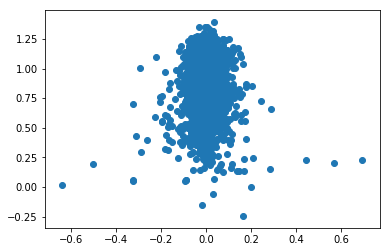

In [28]:
plt.scatter(load, delta)

In [21]:
load = []
pos_change = []
for obj_num in os.listdir("load_dist/"):
    if os.path.isdir("load_dist/"+obj_num):
#     if obj_num == "3":
        for group in os.listdir("load_dist/"+obj_num):
#             if group == "3":
            if os.path.isdir("load_dist/"+obj_num+"/"+group):

                for folder in os.listdir("load_dist/" + obj_num+"/"+group):
                    if folder != "distribution_stable" and folder != "distribution":
#                     if folder == "proposed2":
                        for filename in os.listdir("load_dist/" + obj_num+"/"+group+"/"+folder):
                            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                                continue
                            with open("load_dist/" + obj_num+"/"+group+"/"+folder+"/"+filename, 'r') as f:
                                dic = json.load(f)
                            first_push = dic['first contact object']
                            if first_push == -1:
                                continue
                            sum_change_pos = 0
                            for i in range(int(obj_num)):
                                if i != first_push:
                                    sum_change_pos += dic[str(i) + ' change of pos']
                            vertices = np.array(dic[str(first_push)+ " original pos"]) + np.array(dic[str(first_push)+ " vertices"])
#                             print(vertices, dic["start pt"], dic["end pt"])
                            if sum_change_pos/(int(obj_num) - 1) < 1e-12:
                                try:
                                    print("load_dist/" + obj_num+"/"+group+"/"+folder+"/"+filename)
                                    l1, l2 = findLoads(vertices, dic["start pt"], dic["end pt"])
                                    load.append(l1-l2)
                                    pos_change.append(dic[str(first_push) + ' change of pos'])
                                except:
                                    continue
                            

load_dist/6/0/proposed1/729summary.json
[2.32952746 8.93961933] [1.96505027 9.39598902]
(2.083167295180025, 9.248092076430613)
[0.4552605  8.24303145] [0.77855279 7.7874726 ]
(0.711534439142993, 7.881909831666053)
load_dist/6/0/proposed1/848summary.json
[6.47869263 8.87835139] [6.40844241 8.80941233]
(6.4463361666606644, 8.846598950764426)
[7.77835636 7.35868167] [8.14305353 8.11835568]
(7.827850542125302, 7.461779432313433)
load_dist/6/0/proposed1/160summary.json
[7.08919291 3.77274233] [7.11375388 3.75720685]
(7.100317508474114, 3.7657069247710924)
[8.63518889 4.57017971] [8.46981244 5.16203381]
(8.475911414434881, 5.140206356020781)
load_dist/6/0/proposed1/77summary.json
[8.78093736 5.17346871] [8.31205509 5.63187535]
(8.453288535127246, 5.493797210547549)
[6.9898803  4.28346538] [7.39339507 3.8569312 ]
(7.112390446382878, 4.153966449907105)
load_dist/6/0/proposed1/12summary.json
[8.72271625 4.31112111] [7.5589018  3.99863092]
(8.025571929179023, 4.12393425261808)
[8.47121993 2.3917

load_dist/6/0/proposed1/388summary.json
[5.44442525 5.19462186] [4.9335984  4.66874165]
(5.20469034232333, 4.94782229613852)
[6.49262642 3.51193179] [6.82361693 4.5372914 ]
(6.527959369432563, 3.621388114733056)
load_dist/6/0/proposed1/272summary.json
[3.93014009 7.3849356 ] [3.78912142 7.50758398]
(3.884520531646793, 7.424612109500753)
[2.21511973 6.56214019] [2.50539442 5.98171694]
(2.4822773327678824, 6.027941153898162)
load_dist/6/0/proposed1/602summary.json
[4.44889312 7.22706394] [4.35803399 6.97293396]
(4.431710327256894, 7.1790041625015935)
[6.25057589 6.36092638] [6.33612188 6.7397591 ]
(6.262607588888008, 6.414207938373415)
load_dist/6/0/proposed1/540summary.json
[6.32732045 6.81785973] [5.62086066 6.37312259]
(5.685999020879478, 6.414129109628591)
[6.99125895 4.9803754 ] [7.1441719  5.09882047]
(7.059340322583663, 5.033110665495985)
load_dist/6/0/proposed1/784summary.json
[7.61886126 1.16390854] [7.46156229 1.33853783]
(7.468335428659405, 1.3310182878973604)
[ 6.04665003 -0.

load_dist/6/0/proposed0/188summary.json
[2.13669053 5.99674939] [1.80700021 5.00575273]
(2.124594056123571, 5.960389313308202)
[3.35803042 4.41527026] [3.75024674 4.98570286]
(3.4475504153723215, 4.545466583164882)
load_dist/6/0/proposed0/62summary.json
[6.91667158 5.8092266 ] [6.37856407 5.49341961]
(6.470291346905831, 5.547252942710966)
[7.79501825 4.08642319] [8.03050417 4.40017079]
(7.817823142999288, 4.11680716334027)
load_dist/6/0/proposed0/873summary.json
[7.38261824 1.95807781] [7.21931656 2.09356421]
(7.379645561706648, 1.96054398219263)
[5.68560057 1.0637992 ] [6.29513778 0.33189136]
(5.984311029297922, 0.7051196935734182)
load_dist/6/0/proposed0/642summary.json
[3.03173987 7.70667834] [2.43314986 8.0576525 ]
(2.9273943063128396, 7.76785971252209)
[1.52374253 6.39429522] [2.14843606 6.0791268 ]
(1.5361953174802314, 6.388012621590151)
load_dist/6/0/proposed0/594summary.json
[9.50029887 9.56690382] [8.6354971  9.17499766]
(8.823251360503761, 9.260083141452272)
[9.86730483 7.669

load_dist/6/0/proposed0/731summary.json
[0.1972007  2.54681822] [-0.0450488   2.55803911]
(0.06589812345920885, 2.5529001423258633)
[-0.10870534  0.57055731] [0.91211574 1.08956173]
(0.07603183730506141, 0.6644811266794669)
load_dist/6/0/proposed0/741summary.json
[5.91395306 2.22234349] [5.70666798 2.41446337]
(5.832514002125388, 2.297824256718277)
[4.18675635 1.28194005] [4.85763984 0.63225606]
(4.515785575344472, 0.9633079635966945)
load_dist/6/0/proposed0/508summary.json
[ 6.9409198  10.19613773] [6.55046281 9.9476099 ]
(6.567889048264848, 9.958701850976091)
[7.883174   8.46271715] [8.09990161 8.69613132]
(7.964539932529884, 8.55034770527705)
load_dist/6/0/proposed0/497summary.json
[4.55471231 6.73130769] [4.4645813  6.80534286]
(4.491184528645146, 6.783490126166188)
[3.09174443 5.37646314] [3.16728526 5.29140772]
(3.1003889218430913, 5.366730179656497)
load_dist/6/0/proposed0/514summary.json
[8.72758308 5.1572526 ] [7.69279216 4.60900387]
(8.635482571236805, 5.108456284964032)
[8.4

load_dist/6/0/proposed0/180summary.json
[2.65072938 2.2459485 ] [2.2693567 1.8832843]
(2.455807630187071, 2.0605887570797137)
[3.05740187 0.36777571] [3.85999652 0.68757143]
(3.833195235796239, 0.6768924053253028)
load_dist/6/0/proposed0/776summary.json
[6.25439327 0.62481897] [5.544923   0.23444911]
(5.612556464470375, 0.2716628686003606)
[ 7.03990665 -1.08614466] [ 7.17865211 -0.91682833]
(7.0731412924666595, -1.0455869752548557)
load_dist/6/0/proposed0/97summary.json
[7.45356493 5.17940576] [6.99570846 5.5980773 ]
(7.275602324205865, 5.342137628790463)
[5.85653483 4.00007424] [6.12546794 3.79802746]
(5.905396586903454, 3.9633650034683208)
load_dist/6/0/proposed0/344summary.json
[3.70818584 4.00507731] [3.61489874 3.90576828]
(3.7071471335275716, 4.003971555966791)
[4.96084033 2.45218866] [5.2196428  2.71597959]
(5.034613517083695, 2.527383869186911)
load_dist/6/0/proposed0/614summary.json
[6.56090212 8.31893487] [6.53230703 8.52073332]
(6.53775021172665, 8.482319077643462)
[4.604876

(5.803506843149766, 1.3749836390792667)
[ 5.22073322 -0.53323225] [ 5.69390713 -0.57694338]
(5.407598267030864, -0.5504945768721482)
load_dist/6/0/clusterDiffusion/793summary.json
[9.47158428 4.2928257 ] [9.51534709 3.8972289 ]
(9.503125376951878, 4.007708823538128)
[11.38022912  3.79416748] [11.20891952  4.87384829]
(11.290370264034248, 4.3605037099213115)
load_dist/6/0/clusterDiffusion/527summary.json
[9.87989045 4.73366894] [9.81226367 4.73319943]
(9.873743337738224, 4.733626559629713)
[9.27468994 2.9182241 ] [10.74785966  3.28765135]
(9.808550248381795, 3.05210041841409)
load_dist/6/0/clusterDiffusion/165summary.json
[2.12885258 9.36287433] [1.30260191 9.0728746 ]
(2.1203783525486437, 9.359899978118525)
[1.94411723 7.37196085] [2.26171839 7.40085549]
(1.9454088036875075, 7.372078451686919)
load_dist/6/0/clusterDiffusion/681summary.json
[ 3.29090969 -2.65596892] [ 2.90795809 -2.66510841]
(3.1259511845287524, -2.659905839679912)
[ 2.57331406 -4.47721519] [ 3.21743213 -4.63726315]
(3.

load_dist/6/0/clusterDiffusion/361summary.json
[6.17165751 8.28627023] [4.58497431 8.39632538]
(5.572064220382653, 8.327859053958813)
[4.76671006 6.91458151] [5.02707366 6.78549861]
(4.988434803931916, 6.804655093086844)
load_dist/6/0/clusterDiffusion/426summary.json
[6.3988813  4.19036907] [5.33636345 4.63113649]
(5.365675216646876, 4.618976972235338)
[5.48995558 2.65720878] [6.24405091 2.93122072]
(5.727575949668609, 2.7435517372093603)
load_dist/6/0/clusterDiffusion/780summary.json
[3.60269942 4.81342771] [2.57496217 4.56070879]
(2.94036547107434, 4.650560887569091)
[2.44855524 3.32501208] [3.87140309 3.04845706]
(3.7175951285355118, 3.0783522750281134)
load_dist/6/0/clusterDiffusion/433summary.json
[7.37460904 8.42933169] [6.98524238 8.42034015]
(7.100773275458287, 8.423007977303026)
[7.18570791 6.44438368] [8.12346803 7.05443714]
(7.308824329699479, 6.524476238693046)
load_dist/6/0/clusterDiffusion/551summary.json
[ 4.35566971 12.97035715] [ 3.81210944 12.99694846]
(3.864746896660

(9.014777339931277, 5.157806057307918)
load_dist/6/0/clusterDiffusion/2summary.json
[5.87382945 4.51530292] [5.18167038 4.71921028]
(5.661032391278531, 4.577992141629128)
[4.84177633 2.81621977] [5.04503197 2.74693264]
(4.940757586436513, 2.7824782891137314)
load_dist/6/0/clusterDiffusion/646summary.json
[5.14332798 4.19878428] [4.83513393 4.50317073]
(4.858582327678468, 4.480012124808903)
[4.05270335 2.68826291] [4.73440076 2.75411541]
(4.078333672067996, 2.6907388012608204)
load_dist/6/0/clusterDiffusion/482summary.json
[6.85143369 0.09274282] [6.72506085e+00 4.28624494e-03]
(6.8228559675109315, 0.07273928123318789)
[ 7.76057399 -1.68454714] [ 7.95234175 -1.57396425]
(7.843984688996757, -1.6364482353491376)
load_dist/6/0/clusterDiffusion/543summary.json
[5.95453391 4.71364789] [5.09386518 5.0662721 ]
(5.3122157889096675, 4.976811807554415)
[4.52654283 3.32128505] [5.41700442 3.09720766]
(5.0873787398205055, 3.180155251753712)
load_dist/6/0/clusterDiffusion/807summary.json
[1.20458105

load_dist/6/0/clusterDiffusion/747summary.json
[9.9961631 0.1891513] [9.62506863 0.22719356]
(9.773776836823934, 0.21194894824544905)
[ 8.82108311 -1.2263972 ] [ 9.89928859 -1.7511604 ]
(9.683681149274651, -1.6462241491722056)
load_dist/6/0/clusterDiffusion/388summary.json
[6.15484946 5.83643828] [6.2588644  5.32470289]
(6.180278498678439, 5.7113321390467755)
[8.13610407 5.59073957] [7.85305739 6.48676292]
(8.063959068351016, 5.819124389761399)
load_dist/6/0/clusterDiffusion/655summary.json
[6.3405386  1.78958758] [5.21739012 2.38243804]
(5.533522135736001, 2.2155687457850797)
[5.25733708 0.41588748] [5.68158394 0.43810631]
(5.453804275349143, 0.4261769403879008)
load_dist/6/0/clusterDiffusion/583summary.json
[3.74836595 9.27801096] [2.87818408 9.24532035]
(3.3428743483484102, 9.262777578654172)
[3.20331813 7.37244847] [4.03394677 7.63528732]
(3.3466472731296926, 7.417802672643535)
load_dist/6/0/clusterDiffusion/630summary.json
[4.34571013 6.71393661] [4.01332038 6.61124318]
(4.1064904

load_dist/6/0/proposed2/755summary.json
[4.42703025 1.15952137] [4.40980069 0.79241913]
(4.417280484619346, 0.9517864104348525)
[6.27753791 0.44981746] [6.33716441 1.27959786]
(6.313608445815022, 0.9517863937790427)
load_dist/6/0/proposed2/793summary.json
[7.19492084 4.94930529] [6.96221983 4.75115258]
(7.03066308087274, 4.809434316052183)
[8.17533692 3.20785761] [8.567252   3.56776584]
(8.41179217970864, 3.4250020510592343)
load_dist/6/0/proposed2/509summary.json
[1.5208078 1.4546063] [1.53271206 1.14303391]
(1.5242784822103213, 1.363768120138552)
[3.33460425 0.76530474] [3.44748777 1.69465355]
(3.4072966916226077, 1.3637680942344952)
load_dist/6/0/proposed2/90summary.json
[2.28408399 6.58600159] [0.50491858 6.57058791]
(1.41492322772782, 6.578471686211491)
[1.3839765  5.12170764] [1.86445814 5.23681823]
(1.4114587540589483, 5.128291610484479)
load_dist/6/0/proposed2/761summary.json
[7.39660213 9.07529089] [7.06984095 8.39676244]
(7.08047544969769, 8.41884522802998)
[7.98008519 7.3379

load_dist/6/0/boundaryShear/68summary.json
[6.17147952 1.37417678] [5.57391712 1.10405203]
(5.668815102857498, 1.1469501223361218)
[ 6.81709521 -0.45341197] [ 7.17630874 -0.02638743]
(6.893911829042305, -0.36209412649428746)
load_dist/6/0/boundaryShear/508summary.json
[ 6.9409198  10.19613773] [6.55046281 9.9476099 ]
(6.569911298370052, 9.95998890814584)
[7.883174   8.46271715] [8.09990161 8.69613132]
(7.962984949269554, 8.548672998033094)
load_dist/6/0/boundaryShear/341summary.json
[-1.99237066  4.51780952] [-2.30157209  4.94378426]
(-2.262912746899189, 4.890524806445839)
[-3.44789003  5.01813945] [-3.63139204  3.45355547]
(-3.6228320417512956, 3.5265400140635776)
load_dist/6/0/boundaryShear/331summary.json
[ 0.03618915 10.66153109] [-0.06341707 10.57525569]
(-0.028502353888637574, 10.605497245921574)
[1.25664749 9.07717261] [1.41029145 9.22685715]
(1.2876760558223819, 9.107401727603238)
load_dist/6/0/boundaryShear/703summary.json
[10.80796779 -2.38948167] [10.72723746 -2.29322586]
(1

load_dist/6/1/maximumClearanceRatio/132summary.json
[2.82883072 3.64201449] [2.36256647 3.28199243]
(2.682790379738792, 3.5292506662020147)
[3.86555358 2.18527841] [4.03726512 2.73034459]
(3.902539455306503, 2.302683233556353)
load_dist/6/1/maximumClearanceRatio/40summary.json
[4.55056915 4.4293341 ] [4.24017472 4.10848033]
(4.326962214915667, 4.198192304579972)
[4.77030447 3.08157303] [5.62520586 4.54151055]
(5.209308246695787, 3.8312712825785984)
load_dist/6/1/maximumClearanceRatio/184summary.json
[-1.00867604  8.93749664] [-1.18117551  9.06973962]
(-1.1102534928605914, 9.015368604594212)
[-2.2533774   7.83093607] [-1.46680221  7.39936523]
(-1.7225369199643157, 7.539679430956488)
load_dist/6/1/maximumClearanceRatio/187summary.json
[6.02055258 4.40085058] [4.93032527 3.78629687]
(5.012287324798685, 3.832498316171072)
[6.14071723 2.69103584] [6.67463776 3.58824564]
(6.4613866293722895, 3.22989451360472)
load_dist/6/1/maximumClearanceRatio/131summary.json
[3.04292302 5.0555608 ] [2.3771

load_dist/6/1/proposed0/199summary.json
[6.73786023 6.3874641 ] [6.35084309 6.07476098]
(6.571517291519367, 6.2530619062613395)
[7.39215932 4.69164757] [7.92410125 5.13971728]
(7.855913657358122, 5.082280956168731)
load_dist/6/1/proposed0/164summary.json
[2.1087889  5.39024016] [1.77989762 5.29686526]
(2.104144387419154, 5.388921482590862)
[1.09188137 4.41001581] [2.77683423 4.10182276]
(2.0164276793768328, 4.240907974439106)
load_dist/6/1/proposed0/92summary.json
[8.08805488 2.46927103] [7.62137922 3.00758309]
(7.8860535855297496, 2.702280173971373)
[6.9614354  1.51369911] [7.46840232 1.32165705]
(7.120265549990087, 1.4535333487049569)
load_dist/6/1/proposed0/185summary.json
[7.13949225 8.0727005 ] [6.40199082 7.08423803]
(6.804546398023579, 7.623777428773458)
[7.76165732 6.32189484] [7.78752567 6.4350185 ]
(7.774703285812277, 6.378946868358538)
load_dist/6/1/proposed0/87summary.json
[8.74877007 7.56125269] [7.73869219 7.43401227]
(7.801808823646063, 7.4419631671020845)
[7.82349832 6.

load_dist/6/1/clusterDiffusion/141summary.json
[4.46966398 1.14506538] [4.46756818 0.57460977]
(4.468248798313285, 0.7598582028369634)
[ 5.39113318 -0.32600372] [6.1892795  0.89456723]
(6.053617122905758, 0.6871045974627733)
load_dist/6/1/clusterDiffusion/131summary.json
[4.02245928 6.84737296] [3.73730501 6.5458597 ]
(3.8970081191033166, 6.714724768454019)
[4.08349952 5.05949129] [4.23773022 5.1355266 ]
(4.206561479333309, 5.120160577277888)
load_dist/6/1/clusterDiffusion/192summary.json
[ 1.92500137 11.04718488] [ 1.72365259 10.95717479]
(1.8018276916385176, 10.992121620812904)
[2.08715245 9.29243759] [2.76855846 9.58872669]
(2.272649088445954, 9.373095334629024)
load_dist/6/1/clusterDiffusion/78summary.json
[4.06153413 3.82222527] [3.91299016 4.09125579]
(4.032134162701936, 3.8754722278058558)
[2.69626616 3.62518808] [2.86395023 2.51341386]
(2.858139713228467, 2.5519384902600235)
load_dist/6/1/clusterDiffusion/103summary.json
[7.60705013 2.7928255 ] [7.10428615 3.31917593]
(7.233284

load_dist/6/1/proposed2/17summary.json
[5.93913021 8.44480796] [5.9166886  7.82810574]
(5.92160867802984, 7.963309823648798)
[7.50368869 7.59849011] [7.54641644 8.52414524]
(7.520528534039483, 7.963309725696381)
load_dist/6/1/proposed2/184summary.json
[4.39056971e-03 7.80936925e+00] [-0.68597138  7.53450589]
(-0.5719786681579134, 7.579891439689742)
[0.31128859 6.03824939] [0.70888391 6.45369458]
(0.6299632201596134, 6.3712307335831)
load_dist/6/1/proposed2/23summary.json
[8.17447972 4.08319004] [7.35781903 3.66007566]
(8.066281550136203, 4.027132235702361)
[7.31477504 2.54179231] [8.27003162 2.30607298]
(8.062292344327021, 2.357334748057593)
load_dist/6/1/proposed2/164summary.json
[2.1087889  5.39024016] [1.77989762 5.29686526]
(2.0546243020120336, 5.374862330851267)
[1.09188137 4.41001581] [2.77683423 4.10182276]
(2.0537159050468428, 4.234087622329628)
load_dist/6/1/proposed2/48summary.json
[0.73545124 6.16971206] [-0.09144218  6.28289086]
(0.38242158824706435, 6.218032073861102)
[0.1

load_dist/6/1/boundaryShear/135summary.json
[7.46539453 4.04541698] [6.6875527  4.30345711]
(6.87191704594056, 4.242296384163963)
[6.4802743 2.6225075] [6.90464432 2.550156  ]
(6.865085315613481, 2.5569004361012513)
load_dist/6/1/boundaryShear/15summary.json
[2.72527849 4.7520314 ] [1.90510716 4.57466233]
(2.1588404600186166, 4.62953430716936)
[2.73797032 2.96123016] [3.41902947 3.63542702]
(2.9224705935988466, 3.14387142640374)
load_dist/6/1/boundaryShear/98summary.json
[9.9828398 9.3693989] [9.54172169 8.85709896]
(9.63058362728909, 8.960300244632357)
[10.3727864   7.62430866] [11.26116765  8.16773044]
(11.247007659886759, 8.159068784292064)
load_dist/6/1/boundaryShear/130summary.json
[ 5.88207334 -0.92581235] [ 5.74127464 -0.69178681]
(5.823574143084553, -0.8285793038152008)
[ 4.15314404 -1.73339162] [ 4.70425838 -2.11150781]
(4.6549040359797385, -2.0776460823119165)
load_dist/6/1/boundaryShear/125summary.json
[6.80452866 6.06515627] [6.57255665 6.22057143]
(6.761679708978753, 6.093

load_dist/6/3/maximumClearanceRatio/80summary.json
[5.55585896 0.59017969] [4.80179516 1.02019083]
(5.330191725696771, 0.7188682763310427)
[4.38300775 0.74613135] [4.71010157 0.37764666]
(4.65523938024475, 0.4394512456989478)
load_dist/6/3/maximumClearanceRatio/36summary.json
[1.2029909  5.83843865] [0.64445682 5.94365561]
(0.8360512120390511, 5.907563040636692)
[0.64445682 5.94365561] [0.69393279 5.70163756]
(0.6829994314412824, 5.755119211047211)
[0.69393279 5.70163756] [0.56181577 5.68034032]
(0.6168249325060898, 5.689208266101383)
[0.56181577 5.68034032] [1.44421818 6.02531223]
(0.6377116038633691, 5.7100114191871345)
load_dist/6/3/maximumClearanceRatio/68summary.json
[ 1.03821539 -0.85643671] [ 0.71659963 -1.06793125]
(0.7898648716411004, -1.0197520551233785)
[ 0.71659963 -1.06793125] [ 1.13658185 -1.12535481]
(0.9969792536519038, -1.1062670906926173)
[ 1.13658185 -1.12535481] [ 0.80767845 -1.38253553]
(1.103883485648034, -1.15092280547423)
[ 0.80767845 -1.38253553] [ 1.59989766 -

load_dist/6/3/proposed0/116summary.json
[5.11777653 2.13709125] [5.3573047  1.79016923]
(5.253615528085137, 1.940348206568571)
[5.3573047  1.79016923] [5.60870979 1.97783953]
(5.50949128154945, 1.903774390738983)
[5.60870979 1.97783953] [5.76565791 1.56125405]
(5.643849064753417, 1.8845700062818456)
[5.76565791 1.56125405] [6.19218777 2.00702034]
(6.023146098764688, 1.8303549643211072)
load_dist/6/3/proposed0/187summary.json
[4.10821077 3.97433297] [3.16490341 3.84589739]
(3.245265769753135, 3.8568391177948196)
[3.82780222 3.01974122] [4.29659065 3.89245762]
(3.953808122021803, 3.254319162702536)
load_dist/6/3/proposed0/90summary.json
[3.80735387 2.3142288 ] [3.21295808 1.71550467]
(3.2295851702303287, 1.7322528280228535)
[3.69732593 1.20453114] [3.94657459 2.29746123]
(3.742333447145144, 1.4018846088647055)
load_dist/6/3/proposed0/33summary.json
[2.69075112 2.10442868] [1.82531272 1.68827531]
(2.417762999300403, 1.9731600256577762)
[2.55599412 0.91606365] [3.23421226 1.39762033]
(2.82

(3.2338060957325765, 4.221800588637063)
[2.12574775 3.70582361] [2.93448899 3.34438419]
(2.3672420807800014, 3.5978959595927944)
load_dist/6/3/clusterDiffusion/35summary.json
[6.9427141  3.18429744] [7.07769286 1.94216864]
(6.981384682807162, 2.8284354504188007)
[7.77666692 2.59188352] [7.19528748 3.5748623 ]
(7.720335396892039, 2.687127063758938)
load_dist/6/3/clusterDiffusion/29summary.json
[3.79398515 5.08244674] [3.18206589 4.89405442]
(3.542472295388699, 5.005013138955736)
[3.79366754 4.00446435] [4.19427336 3.90855662]
(3.988818533717774, 3.9577439750716596)
load_dist/6/3/clusterDiffusion/59summary.json
[2.28625802 8.24161132] [1.85113417 7.68462877]
(2.022288615401956, 7.903715863269457)
[2.38145052 6.89929936] [2.6865348  7.61238833]
(2.536692491337728, 7.26215431667706)
load_dist/6/3/clusterDiffusion/160summary.json
[4.49416912 5.83626949] [4.24441938 5.42221955]
(4.478954363867793, 5.811045551183255)
[5.17980289 4.61484818] [5.10086352 5.48529927]
(5.128583253582175, 5.179637

load_dist/6/3/clusterDiffusion/60summary.json
[3.58310364 9.28678632] [3.04045915 8.8855409 ]
(3.4186097600096272, 9.165155189057922)
[3.04045915 8.8855409 ] [3.64001601 8.44147227]
(3.4143641488288563, 8.608604023052779)
load_dist/6/3/clusterDiffusion/196summary.json
[4.82561051 6.63523754] [3.84037434 7.18799524]
(4.347326560381041, 6.903574298539929)
[3.83862484 6.67151041] [3.89981733 6.14645664]
(3.8962536815870727, 6.177034857239902)
load_dist/6/3/clusterDiffusion/22summary.json
[7.00594072 1.63621767] [6.456456   1.20663073]
(6.668242521272863, 1.3722052937388567)
[6.5866918  0.86746261] [7.47976079 1.34171803]
(7.352835670462915, 1.2743157380693424)
load_dist/6/3/clusterDiffusion/145summary.json
[1.49780313 3.21035636] [0.26509864 2.78327462]
(1.1135234704186823, 3.077219172912005)
[0.89221736 2.40987   ] [1.50876655 2.18623432]
(0.9980522677734401, 2.3714813777074553)
load_dist/6/3/clusterDiffusion/135summary.json
[4.75643654 2.13285214] [4.44186826 1.93793434]
(4.546357866739

load_dist/6/2/proposed1/43summary.json
[2.81574295 1.63088746] [2.31989013 1.59961323]
(2.7353739988762396, 1.62581848121223)
[1.86981611 1.47131892] [2.40735296 0.25969811]
(2.2839560615544476, 0.537837605837886)
load_dist/6/2/proposed1/56summary.json
[7.21377556 0.9672185 ] [7.02495465 1.0199556 ]
(7.054511237216974, 1.011700428865064)
[5.53800567 0.50070725] [ 6.36920155 -0.14890488]
(5.635712499534735, 0.42434556254173317)
load_dist/6/2/proposed1/192summary.json
[8.30560912 5.11645237] [7.39074187 5.43500592]
(8.14099770524371, 5.173769423493727)
[6.94862898 4.75638399] [7.44879118 4.30880324]
(7.006872279809311, 4.704263818267696)
load_dist/6/2/proposed1/14summary.json
[6.24405334 4.59780034] [5.22362595 4.67761158]
(5.233627258057695, 4.6768293789033235)
[6.16808509 3.21651561] [6.6154076  3.51538865]
(6.479146615943112, 3.4243475516197006)
load_dist/6/2/proposed1/134summary.json
[6.63967687 7.75112479] [5.98563339 6.99015377]
(6.350420889949596, 7.414579246403714)
[7.08045483 6.

load_dist/6/2/maximumClearanceRatio/21summary.json
[8.67169112 5.56864946] [7.35486126 5.1252347 ]
(8.60204023485582, 5.545195970153848)
[7.31447324 4.58364735] [7.63316111 4.48424448]
(7.562348643961492, 4.506331912685886)
load_dist/6/2/maximumClearanceRatio/174summary.json
[5.7752195  5.05206851] [5.64444544 4.76896477]
(5.67115976781373, 4.8267965020095485)
[5.59198234 3.81995863] [5.71349816 3.44249918]
(5.668188516522748, 3.5832418020203876)
load_dist/6/2/maximumClearanceRatio/58summary.json
[11.2140404   4.40558259] [10.92375118  4.49259269]
(10.991464664960365, 4.472296656051479)
[10.11359471  4.28974672] [10.2717094   3.66686278]
(10.25377002863335, 3.7375335809070176)
load_dist/6/2/maximumClearanceRatio/111summary.json
[2.64384854 9.54324987] [2.77955927 8.446677  ]
(2.648058267924787, 9.509234073509376)
[3.56486306 8.34578445] [4.13709854 8.90967497]
(3.6878387308726834, 8.46696678456103)
load_dist/6/2/maximumClearanceRatio/76summary.json
[0.2579431 2.616432 ] [0.39054437 2.8

load_dist/6/2/proposed0/87summary.json
[7.94408439 4.85174196] [7.50593716 4.36423942]
(7.856824558497559, 4.754652674123337)
[8.47658238 3.90882703] [8.48235744 5.45378978]
(8.477235096259482, 4.0834523265877465)
load_dist/6/2/proposed0/190summary.json
[4.79843259 7.37275555] [4.55591315 7.41608991]
(4.757443459332351, 7.380079975036541)
[5.9085494  6.32170929] [5.78562625 6.68176785]
(5.903436484576815, 6.336685048954994)
load_dist/6/2/proposed0/133summary.json
[0.74466864 3.01218281] [-0.00799774  2.55181849]
(0.34151551794051377, 2.7655963992413644)
[1.05266889 1.55353051] [1.34687955 1.95722978]
(1.3331988322627097, 1.9384578635124747)
load_dist/6/2/proposed0/143summary.json
[2.88564466 4.42842836] [2.18951768 3.77910785]
(2.505834832616947, 4.074156349840021)
[3.299689   2.99673145] [3.90224706 3.68193627]
(3.484704221489399, 3.207123334507841)
load_dist/6/2/proposed0/101summary.json
[4.26223127 6.64169347] [3.60401164 6.12708083]
(3.8090665493569085, 6.287397930664231)
[4.134002

(8.951881810804707, 10.899350169412065)
[ 7.89373976 10.15716971] [9.08377024 9.47058741]
(8.351075748869489, 9.893311987840244)
load_dist/6/2/clusterDiffusion/53summary.json
[5.75880846 7.19712002] [4.96847791 6.92794945]
(5.121634679364908, 6.980111497917397)
[6.39526406 6.15804252] [6.11876479 6.90746129]
(6.37823815948829, 6.204189460457904)
load_dist/6/2/clusterDiffusion/23summary.json
[5.88102401 3.75075305] [4.94610866 4.06006099]
(5.113367588958239, 4.004724975898775)
[4.54659467 2.71298634] [5.95402496 2.64949149]
(5.315919732511876, 2.678278974450627)
load_dist/6/2/clusterDiffusion/176summary.json
[5.60168341 5.89706575] [5.49738699 5.8706275 ]
(5.521880702597435, 5.876836222684501)
[6.30231893 4.42787462] [6.52763776 4.98681222]
(6.4106795044653095, 4.696679382611361)
load_dist/6/2/clusterDiffusion/106summary.json
[7.7754425  5.92360404] [7.64644783 6.08718361]
(7.695862952774319, 6.024519361949098)
[6.36027382 6.25591832] [6.74740562 4.91871107]
(6.512883208054355, 5.728784

load_dist/6/2/proposed2/176summary.json
[7.80280481 5.41811898] [6.82719229 4.44954851]
(7.433827725462792, 5.051805208143769)
[7.36679418 4.05721348] [7.84339899 3.8836409 ]
(7.433016602371757, 4.033096294632485)
load_dist/6/2/proposed2/113summary.json
[2.56015082 7.75388437] [1.05545281 7.94415946]
(1.6503708937088366, 7.868929658549513)
[2.02421352 6.65869907] [2.37858566 7.06116575]
(2.1100075932526097, 6.756136942689795)
load_dist/6/2/proposed2/76summary.json
[-0.21504374  3.74557505] [0.27498754 3.0370426 ]
(0.26061106584751703, 3.0578294166458035)
[1.34081992 3.29278067] [0.47306683 4.16982417]
(0.9217480529840356, 3.7163392534266118)
load_dist/6/2/proposed2/97summary.json
[8.2058316  3.57253037] [7.16191241 4.51409477]
(7.294893477454316, 4.394152256533753)
[6.64492394 2.81414041] [7.4167782  3.02315319]
(7.2937752630211214, 2.9898448531500614)
load_dist/6/2/proposed2/183summary.json
[4.07661807 1.33368026] [4.23014576 1.9203419 ]
(4.209512528594913, 1.841498203581215)
[3.06375

[4.24569729 2.97317929] [4.56581312 3.29709843]
(4.408839475986137, 3.1382597868669055)
load_dist/4/0/proposed1/887summary.json
[4.73355273 2.40939267] [4.32160726 2.46330907]
(4.415770659212262, 2.4509847713595923)
[3.97163053 0.56313446] [4.76969545 0.53703115]
(4.4112261909456505, 0.5487560520332323)
load_dist/4/0/proposed1/181summary.json
[4.61713866 7.54048125] [4.14505004 7.5224561 ]
(4.409706449203084, 7.53256106415638)
[4.27842138 5.57028847] [4.72776991 5.60960926]
(4.405045166077088, 5.581368892402304)
load_dist/4/0/proposed1/209summary.json
[5.21259125 4.54269035] [4.9627354  4.83702261]
(5.084382024776547, 4.693721759157077)
[3.44687138 3.60436861] [3.87756066 3.16803646]
(3.7186263222259495, 3.329053204598703)
load_dist/4/0/proposed1/838summary.json
[6.31866694 4.37960584] [6.15980897 4.52060066]
(6.25175014257167, 4.438997816112636)
[4.60247059 3.49189154] [5.03410684 2.86804347]
(4.889178139854519, 3.0775103859618964)
load_dist/4/0/proposed1/265summary.json
[6.39399582 5

(3.8187277222063587, 8.262268517141424)
load_dist/4/0/proposed1/124summary.json
[4.95981821 3.49691346] [4.69081186 3.3400546 ]
(4.861591333140173, 3.439636916712838)
[5.30299831 1.56535241] [5.66399452 1.62512706]
(5.614458506921253, 1.6169247571014576)
load_dist/4/0/proposed1/461summary.json
[4.75886962 5.07470433] [4.78413208 4.87422882]
(4.763237546374613, 5.0400426868958235)
[6.71557502 4.80875294] [6.58620415 5.66013067]
(6.680893530834602, 5.036988386954475)
load_dist/4/0/proposed1/244summary.json
[5.54057755 2.00855485] [5.10297422 2.7542509 ]
(5.3791667437173265, 2.2836061728197183)
[3.59209065 1.6188637 ] [3.65920878 1.45916761]
(3.617790739395539, 1.5577149971312214)
load_dist/4/0/proposed1/606summary.json
[8.06272627 4.35891949] [7.71934853 3.95677954]
(7.938541701929569, 4.213483181653058)
[9.30316662 2.79719254] [9.37447327 2.87017981]
(9.327056925471068, 2.8216462104287605)
load_dist/4/0/proposed1/234summary.json
[2.84134389 3.17039315] [2.52551254 2.90802655]
(2.6294246

load_dist/4/0/proposed1/310summary.json
[5.97101715 3.61374724] [5.70925541 3.70434962]
(5.934557348743396, 3.6263669901166335)
[4.74364904 2.08821107] [5.18406587 1.77992991]
(5.169303189677885, 1.7902633857398482)
load_dist/4/0/proposed1/159summary.json
[6.40465692 6.71504817] [5.89779898 6.56715648]
(6.065278949705291, 6.616024053463652)
[6.77449558 4.77960383] [6.97350505 4.88141869]
(6.812410600117151, 4.799001436833715)
load_dist/4/0/proposed1/913summary.json
[3.09573487 5.34040896] [2.98438315 5.43207147]
(3.0531412157360793, 5.375470965797024)
[1.41860614 4.45895148] [2.04950233 3.68195533]
(1.7398904725497115, 4.063265663074659)
load_dist/4/0/proposed1/322summary.json
[6.42034335 6.37618955] [6.00496591 6.16022563]
(6.052075204094483, 6.184718819148191)
[7.38058548 4.71106772] [7.62807338 5.15059691]
(7.430095355330945, 4.798995474168321)
load_dist/4/0/proposed1/710summary.json
[1.86846717 5.50560018] [1.30705882 5.55441771]
(1.5672955294992168, 5.531788747040131)
[1.48918094 

load_dist/4/0/maximumClearanceRatio/39summary.json
[3.38912279 4.30303321] [2.98144823 3.83478655]
(3.1459131250888697, 4.023687567269766)
[3.56265467 2.50412995] [4.52470487 2.66206887]
(4.503435183972365, 2.6585770341192556)
load_dist/4/0/maximumClearanceRatio/591summary.json
[-0.10189734  8.93818322] [-0.40271294  8.82212165]
(-0.26139422108824617, 8.876645541959864)
[-0.4486744   7.12529381] [1.1002227 7.885628 ]
(0.308477715943739, 7.49697031580557)
load_dist/4/0/maximumClearanceRatio/532summary.json
[5.81149403 4.75893547] [5.15647348 3.28154074]
(5.478775670965719, 4.008491278587308)
[6.87195383 3.25372472] [6.97735888 4.07866559]
(6.8929158120223, 3.4177815773081797)
load_dist/4/0/maximumClearanceRatio/500summary.json
[1.84514658 8.30949712] [1.81518503 8.28956849]
(1.8229581021567551, 8.29473784242256)
[1.97502095 6.55444074] [2.73531806 6.53081393]
(2.5491541530846487, 6.536599155358197)
load_dist/4/0/maximumClearanceRatio/565summary.json
[5.02914694 1.84695891] [3.95817628 2

load_dist/4/0/proposed0/887summary.json
[4.73355273 2.40939267] [4.32160726 2.46330907]
(4.430367892196894, 2.449074250863466)
[3.97163053 0.56313446] [4.76969545 0.53703115]
(4.397990225257117, 0.5491889774080261)
load_dist/4/0/proposed0/181summary.json
[4.61713866 7.54048125] [4.14505004 7.5224561 ]
(4.428552316809669, 7.533280631388008)
[4.27842138 5.57028847] [4.72776991 5.60960926]
(4.385638450019017, 5.579670684119321)
load_dist/4/0/proposed0/698summary.json
[5.74158328 3.80895105] [6.04027541 2.98915243]
(5.789083859608715, 3.6785797539595544)
[7.68927553 3.40378587] [7.67898383 4.04100973]
(7.685543823465739, 3.634836013361859)
load_dist/4/0/proposed0/396summary.json
[1.71971957 2.26976792] [1.40811554 1.84185013]
(1.6494564572570138, 2.17327739371512)
[3.15526807 0.90420416] [3.33176466 1.33556869]
(3.158861082931455, 0.9129856812594389)
load_dist/4/0/proposed0/209summary.json
[5.21259125 4.54269035] [4.9627354  4.83702261]
(5.111485004548167, 4.66179422643718)
[3.44687138 3.6

load_dist/4/0/proposed0/532summary.json
[5.53943066 2.87321982] [4.66645894 3.4277612 ]
(4.699439329264083, 3.406810958543209)
[4.38634184 1.46177795] [4.64961135 1.4280291 ]
(4.6327764144582035, 1.4301871556541161)
load_dist/4/0/proposed0/339summary.json
[8.61386405 5.98243796] [7.6737293  6.04829979]
(8.154054086638753, 6.014650316934473)
[7.55207035 4.28756614] [8.30277797 4.1601496 ]
(8.046728253321351, 4.2036085255074696)
load_dist/4/0/proposed0/694summary.json
[2.74854099 4.96492571] [2.51110879 4.72971742]
(2.6251693689264957, 4.8427096812142985)
[3.66345276 3.20636964] [4.21977165 3.7029733 ]
(3.9518393271961934, 3.463800810503769)
load_dist/4/0/proposed0/542summary.json
[7.8899493  2.94848247] [7.82054933 2.98588616]
(7.841301758084419, 2.9747010756905103)
[6.39476962 1.92327558] [6.57640325 1.49400143]
(6.524348803199733, 1.6170274242994978)
load_dist/4/0/proposed0/17summary.json
[5.21904829 2.55911204] [5.07760506 2.66699562]
(5.139831718362334, 2.6195330593639703)
[3.823057

load_dist/4/0/proposed0/733summary.json
[5.62789335 7.65324016] [4.62337796 7.27116842]
(4.792399012070125, 7.335456325758677)
[5.30023016 5.6818169 ] [6.17444987 6.01137167]
(6.12175214318262, 5.99150617713631)
load_dist/4/0/proposed0/263summary.json
[6.08664186 8.08554712] [5.4025004  7.31040056]
(5.769025822297638, 7.725681526896254)
[6.97939571 6.32633821] [7.12785557 6.46055228]
(7.026365964207226, 6.36880132942385)
load_dist/4/0/proposed0/524summary.json
[3.47477228 0.58740551] [3.58824253 0.12422434]
(3.48161501122768, 0.5594738789504969)
[ 4.84236158 -0.34309199] [5.46492129 0.72691288]
(5.392329764659735, 0.6021485132306186)
load_dist/4/0/proposed0/790summary.json
[3.65048467 5.5828344 ] [2.994633   6.24586024]
(3.33667134488036, 5.900080394202618)
[1.7466585  4.97094638] [2.23678556 4.40269246]
(2.194266370938902, 4.451989305033584)
load_dist/4/0/proposed0/860summary.json
[5.33495114 3.97263738] [5.09554294 3.74771511]
(5.1730106247147045, 3.820495422563304)
[6.33207609 2.243

load_dist/4/0/proposed0/805summary.json
[6.64737416 2.81256958] [5.93950282 3.14530517]
(6.465423276152814, 2.898095728950709)
[4.95510046 1.82424937] [5.24973944 1.38794878]
(5.179726383844646, 1.4916239920131418)
load_dist/4/0/proposed0/364summary.json
[5.77834582 7.77356759] [5.0265595  7.64798879]
(5.575399850061406, 7.739667339454478)
[4.88000169 6.06085602] [5.50833206 5.79995864]
(5.487982597452874, 5.8084082657828535)
load_dist/4/0/proposed0/206summary.json
[3.20735504 5.97554396] [3.0488439 6.0506567]
(3.200987074195589, 5.978561331491099)
[1.85330423 4.58327353] [2.1331581  4.29013615]
(2.071544265377779, 4.354674609824672)
load_dist/4/0/proposed0/939summary.json
[4.24958169 4.59359941] [4.21466471 4.31650859]
(4.217030546051686, 4.335282744150982)
[6.08538644 3.83967145] [5.63495659 5.23859351]
(5.937524704815614, 4.298892812076417)
load_dist/4/0/proposed0/644summary.json
[3.14997676 4.05844444] [2.76498155 2.91588509]
(3.0837696069866625, 3.861959883160799)
[4.44532844 2.55

load_dist/4/0/proposed0/121summary.json
[5.85283282 6.4788533 ] [5.30161586 5.51305516]
(5.697231655720382, 6.206221409052998)
[6.59501884 4.62874033] [7.0238333  4.89492435]
(6.9985753625676335, 4.879245632819531)
load_dist/4/0/proposed0/395summary.json
[3.01585418 3.58510111] [2.72255603 3.25900256]
(2.8584729826256763, 3.4101195084722824)
[4.12430546 1.9214129 ] [4.35589746 3.41802772]
(4.169372553528748, 2.2126496273725254)
load_dist/4/0/proposed0/401summary.json
[3.80185425 2.30518687] [3.7910061  2.02766552]
(3.793169775427813, 2.083016019909496)
[5.77127191 1.95683346] [5.66349949 2.60729614]
(5.748888857015585, 2.091926596671615)
load_dist/4/0/proposed0/36summary.json
[4.43814711 3.51124707] [4.16580116 3.56573091]
(4.17220366890562, 3.5644501355139377)
[4.09098016 1.56755966] [4.30626889 1.58733118]
(4.101612843177682, 1.5685361138737661)
load_dist/4/0/proposed0/563summary.json
[6.2558325  2.39869438] [5.06528948 2.61974627]
(6.2291483884126775, 2.4036488900906914)
[4.521167  

load_dist/4/0/proposed0/218summary.json
[2.54144954 3.87268299] [2.43789731 3.78459325]
(2.4511632689508485, 3.795878381943406)
[3.86048793 2.37929877] [4.0429538  2.64722014]
(3.9560599303130624, 2.5196307072970723)
load_dist/4/0/proposed0/845summary.json
[5.60463328 2.90964685] [5.60468616 2.61985097]
(5.604640354161349, 2.871356021772617)
[7.25101486 2.01095917] [7.45261105 3.27773506]
(7.36684452296372, 2.7388015595072415)
load_dist/4/0/proposed0/133summary.json
[5.71964625 7.0724463 ] [5.5967753  6.98163886]
(5.698007517889965, 7.056454333499504)
[6.53011427 5.26497845] [7.10643303 5.70756549]
(7.031792129729967, 5.650244615742853)
load_dist/4/0/proposed0/571summary.json
[2.9817217  5.15035899] [2.29277019 5.5416665 ]
(2.9326228672927233, 5.178245877335165)
[1.26437902 4.15430337] [1.56534161 3.76179076]
(1.488598837769595, 3.861878022730857)
load_dist/4/0/proposed0/738summary.json
[1.9698774  4.32961225] [1.46999149 3.9575989 ]
(1.5685108842905344, 4.030916714985898)
[2.81550295 

load_dist/4/0/proposed0/306summary.json
[6.95118784 3.56725114] [5.67769548 3.78818896]
(6.821831973119657, 3.5896930330044774)
[5.24304629 2.58728848] [6.64427914 2.03805973]
(5.668809120331332, 2.4204060340872386)
load_dist/4/0/proposed0/299summary.json
[6.31131939 8.03749772] [5.70256797 8.12824929]
(5.882996429436859, 8.101351273516768)
[5.41486005 6.2496786 ] [6.07891561 6.16459055]
(5.971633818616817, 6.178337037626858)
load_dist/4/0/proposed0/358summary.json
[9.24073782 5.49832909] [8.89038167 5.94585611]
(9.061130237326756, 5.727750493137146)
[7.46201769 4.60203763] [7.51416258 4.52637466]
(7.505122790017702, 4.53949227415859)
load_dist/4/0/proposed0/797summary.json
[4.38645318 6.90250728] [4.07537529 6.38426574]
(4.3527998332944176, 6.846442335700492)
[5.59075999 5.3127669 ] [5.9106917  5.64669459]
(5.840906222448591, 5.5738562244719585)
load_dist/4/0/proposed0/867summary.json
[1.38383765 5.97894898] [1.27059678 5.99794584]
(1.2903825488858247, 5.994626423104917)
[0.89012286 4

load_dist/4/0/proposed0/913summary.json
[3.09573487 5.34040896] [2.98438315 5.43207147]
(3.0071341146593413, 5.413343095478409)
[1.41860614 4.45895148] [2.04950233 3.68195533]
(1.7730144773774559, 4.022470957505358)
load_dist/4/0/proposed0/535summary.json
[4.96751778 7.61857235] [3.80850329 8.08245723]
(4.680639594772301, 7.733392666924448)
[3.33246745 6.48144203] [3.44233546 6.36988144]
(3.418901225193138, 6.393676963153032)
load_dist/4/0/proposed0/457summary.json
[5.96186718 7.15742229] [5.6836237  6.86114301]
(5.856332747203839, 7.0450471023856425)
[6.88383212 5.40126199] [7.36392444 5.77744964]
(7.195230509214188, 5.6452655385657575)
load_dist/4/0/proposed0/963summary.json
[3.16232841 7.2189096 ] [2.57846292 7.93678818]
(2.817292981752521, 7.64314004039727)
[1.44371794 6.34465883] [1.68038774 6.15373757]
(1.4939719298844627, 6.304119103059202)
load_dist/4/0/proposed0/545summary.json
[5.39571672 3.37619975] [5.4094152  2.52685855]
(5.402364149997128, 2.96404356754441)
[7.28453274 2.

load_dist/4/0/proposed0/517summary.json
[6.93885878 6.18229598] [6.02737183 6.48104511]
(6.172793009626633, 6.43338188323959)
[5.44594074 4.85246383] [6.33477303 4.50566669]
(6.216017659105738, 4.552001634777399)
load_dist/4/0/proposed0/155summary.json
[3.45670089 5.5694187 ] [3.0066862  5.59998109]
(3.1802619850443805, 5.588192771551083)
[2.22386493 4.27657314] [3.71845543 3.77937072]
(3.218971075154189, 3.945533189214395)
load_dist/4/0/proposed0/405summary.json
[-0.20563874  4.32474927] [-0.56702466  3.99736826]
(-0.40485162828058135, 4.144281522201919)
[0.73434986 2.55941064] [1.20158883 3.09245055]
(0.9083210812733843, 2.7578820947316207)
load_dist/4/0/proposed0/823summary.json
[4.06211345 3.3094467 ] [3.70236876 2.95381717]
(4.0208434056676206, 3.268648739741193)
[4.9896971  1.53947657] [5.38368453 1.87305942]
(5.3265801579733765, 1.8247100843922786)
load_dist/4/0/proposed0/212summary.json
[6.40410636 3.85520295] [5.17156814 4.06065062]
(6.272616160559118, 3.8771205943614757)
[4.8

load_dist/4/0/clusterDiffusion/841summary.json
[3.05300098 4.813708  ] [2.83312229 4.71039503]
(3.045571695301637, 4.8102173087158855)
[3.18735015 2.87961965] [3.8610564 2.9952934]
(3.685796821533391, 2.965201734389235)
load_dist/4/0/clusterDiffusion/20summary.json
[6.35365865 3.58181848] [6.3159208  3.28299207]
(6.330909507878694, 3.4016792319225226)
[8.09652502 2.68392484] [7.47784333 4.29529238]
(7.907656974460435, 3.1758349827456733)
load_dist/4/0/clusterDiffusion/147summary.json
[8.52262255 3.55731205] [8.04887269 3.52967728]
(8.398810864553376, 3.5500898991176983)
[7.36932441 2.3428674 ] [8.27828539 1.57575346]
(8.245923219679998, 1.6030653464663165)
load_dist/4/0/clusterDiffusion/6summary.json
[6.46047737 6.3583383 ] [5.20242639 6.36039283]
(5.660306954982564, 6.3596450408415715)
[5.87846928 4.5831491 ] [6.54069345 4.87829663]
(6.037008418111707, 4.6538086268854)
load_dist/4/0/clusterDiffusion/291summary.json
[5.11620812 4.71437083] [4.49238275 5.00557588]
(4.5032102062400865, 5

load_dist/4/0/clusterDiffusion/407summary.json
[4.07105794 6.33381246] [3.94223383 5.61292314]
(3.9694667579431595, 5.765316317604209)
[5.85349264 5.44415182] [5.78433523 6.31717762]
(5.821474332815822, 5.848342449204241)
load_dist/4/0/clusterDiffusion/821summary.json
[6.09835516 6.52817109] [5.8140106  6.55620474]
(6.057392105751411, 6.532209761408485)
[5.27620188 4.74465711] [5.71071852 4.56828662]
(5.626302691986536, 4.602550970871427)
load_dist/4/0/clusterDiffusion/281summary.json
[6.76862939 2.77090201] [6.04817997 2.51115384]
(6.452284859990308, 2.6568483264146487)
[6.3829406  0.83113695] [7.72169359 1.77923671]
(6.819518986710856, 1.1403201111811778)
load_dist/4/0/clusterDiffusion/565summary.json
[4.66537225 2.78047272] [4.80821987 2.09972929]
(4.692856066746259, 2.649498173352726)
[6.41308324 1.98120531] [6.62510868 2.87285129]
(6.563748935382933, 2.614810825946574)
load_dist/4/0/clusterDiffusion/127summary.json
[2.39916314 2.63958646] [2.31180998 2.63825786]
(2.396943500866872

load_dist/4/0/clusterDiffusion/939summary.json
[5.01419999 2.62653847] [4.12930263 1.38815233]
(4.933925911966561, 2.514197387515807)
[5.40375245 0.67757543] [5.87700358 1.00122445]
(5.421334692046571, 0.6895996728102728)
load_dist/4/0/clusterDiffusion/592summary.json
[3.43847903 4.40739061] [2.18270911 3.82610333]
(3.095122706459011, 4.248453336184791)
[2.80735232 2.50967702] [3.14063969 2.46189463]
(3.127174334931528, 2.463825076092684)
load_dist/4/0/clusterDiffusion/314summary.json
[6.99458433 6.2115485 ] [5.54534035 7.07229692]
(5.92844241560126, 6.844761361273654)
[5.60057238 5.26027183] [6.30719292 5.22909733]
(5.926533830758127, 5.245891178440411)
load_dist/4/0/clusterDiffusion/891summary.json
[1.95908651 4.55115175] [1.42995089 4.52769027]
(1.762210971927895, 4.542422472126783)
[1.3091904  2.67231315] [2.42008417 2.84551437]
(1.6696937919237784, 2.728519802591621)
load_dist/4/0/clusterDiffusion/711summary.json
[2.60971645 4.88441059] [2.20828603 3.79058745]
(2.31954424517953, 4

load_dist/4/0/clusterDiffusion/792summary.json
[5.96452068 4.99893553] [6.29083223 4.24752074]
(5.988856013862183, 4.942897379538229)
[7.95436595 4.84498685] [7.82341418 5.49863223]
(7.949021187341519, 4.871664917210582)
load_dist/4/0/clusterDiffusion/114summary.json
[5.34297194 8.44736344] [5.4261442  8.09718249]
(5.3540462620674285, 8.40073749949833)
[7.19885291 7.98467581] [7.25704491 8.90204434]
(7.223174052228253, 8.368087231695585)
load_dist/4/0/clusterDiffusion/731summary.json
[2.77870844 4.15503627] [2.41707434 4.22082805]
(2.4789696174001867, 4.209567546419473)
[1.5155664  2.79838243] [2.66161621 2.24998479]
(2.4275855969713858, 2.3619710405634637)
load_dist/4/0/clusterDiffusion/578summary.json
[4.8666177  5.72031154] [4.68667444 6.0785008 ]
(4.846804363192935, 5.759751146713463)
[2.92283599 5.66650546] [3.25529736 4.69618746]
(3.0784003030926366, 5.2124772695004395)
load_dist/4/0/clusterDiffusion/508summary.json
[4.01642718 2.06057485] [3.991802   1.75770012]
(3.9982747340574

load_dist/4/0/clusterDiffusion/523summary.json
[6.15573909 1.10722617] [6.61380208 0.14522994]
(6.204060990026937, 1.0057434930768356)
[7.77303739 0.20877642] [8.10602636 1.27955816]
(8.02132586533686, 1.0071896456472722)
load_dist/4/0/clusterDiffusion/161summary.json
[5.71763576 6.60741004] [5.46903468 6.52013685]
(5.591724182709994, 6.563207796741929)
[5.44830312 4.74759379] [6.51233989 4.82152394]
(6.241437067430842, 4.802701407687462)
load_dist/4/0/clusterDiffusion/256summary.json
[5.85526479 6.04923684] [5.0928676  6.74275044]
(5.112000669276835, 6.725346124542961)
[4.28203964 4.97379011] [5.19655045 4.80783807]
(4.697015891638962, 4.898486263691679)
load_dist/4/0/clusterDiffusion/334summary.json
[ 2.68139031 10.69411602] [ 2.23964861 10.43414814]
(2.621769086696795, 10.659028454274445)
[3.15719071 8.75261892] [3.69764082 9.06610927]
(3.16160816818183, 8.755181335699358)
load_dist/4/0/clusterDiffusion/919summary.json
[7.45528364 1.03094293] [7.32489153 0.50970154]
(7.3299977347157

(3.8792557194667214, 9.431530932412212)
[3.81793489 7.59807137] [4.7445966  7.92734063]
(4.097482822731907, 7.697402732628768)
load_dist/4/0/clusterDiffusion/710summary.json
[1.86846717 5.50560018] [1.30705882 5.55441771]
(1.6373911754104489, 5.525693547230629)
[1.48918094 3.57425161] [1.73653302 3.60138973]
(1.491700243973597, 3.574527948780888)
load_dist/4/0/clusterDiffusion/352summary.json
[5.62753293 2.45462844] [6.24556584 1.45921059]
(5.631823602081645, 2.447717838890251)
[7.52045736 1.93912686] [7.62118489 2.47239925]
(7.602518219337303, 2.3735743388881754)
load_dist/4/0/clusterDiffusion/81summary.json
[5.54435923 3.82030925] [5.4013177  3.95174919]
(5.5346300128385675, 3.829249158231636)
[3.99293085 2.56192867] [4.0972478  2.44116943]
(4.063088172786402, 2.480713446470468)
load_dist/4/0/clusterDiffusion/529summary.json
[5.29015036 8.38274279] [4.22104498 8.45933147]
(4.910735082964858, 8.409923341543184)
[4.0616707 6.8052672] [5.18356023 6.70624648]
(4.501992264835526, 6.766403

load_dist/4/0/clusterDiffusion/861summary.json
[6.17969541 3.61820553] [5.36869744 4.51474871]
(5.435427435656753, 4.4409799920349)
[4.82105814 2.60002347] [5.31540085 2.54081261]
(4.948552429502511, 2.584752567255178)
load_dist/4/0/clusterDiffusion/525summary.json
[5.36820282 5.07117721] [4.45533186 4.19453445]
(5.195570948334729, 4.905396408514512)
[5.1862741  3.10925414] [6.18741187 3.40102494]
(5.702904522950221, 3.2598204975960425)
load_dist/4/0/proposed2/345summary.json
[1.98805874 6.4766274 ] [1.11871406 6.56832449]
(1.4882925489924745, 6.529341904059151)
[1.1340759  4.68229082] [1.75824153 4.67382703]
(1.4868179014919398, 4.677507612566596)
load_dist/4/0/proposed2/227summary.json
[3.80993686 5.38049753] [3.47010774 5.37032833]
(3.652460478019864, 5.375785205376318)
[3.10369105 3.56587044] [3.80449432 3.39956207]
(3.647828058893726, 3.436740681902764)
load_dist/4/0/proposed2/887summary.json
[4.73355273 2.40939267] [4.32160726 2.46330907]
(4.415770659212262, 2.4509847713595923)
[

(5.264812138820285, 4.611795934654527)
[6.79061159 3.80394543] [7.23437435 4.66197315]
(7.20842317264815, 4.611795878364419)
load_dist/4/0/proposed2/771summary.json
[5.84317837 5.68053019] [5.26417978 4.77017047]
(5.264525985004597, 4.770714783366301)
[6.99547836 4.09141605] [7.24327261 4.97685547]
(7.185583160753693, 4.770714735624507)
load_dist/4/0/proposed2/33summary.json
[2.01588929 8.63745793] [2.45433731 7.80434514]
(2.0326622345720344, 8.605587051449657)
[3.62596634 7.83946771] [4.01412774 8.69085689]
(3.975251872513495, 8.60558696076472)
load_dist/4/0/proposed2/822summary.json
[3.62717219 2.92830631] [3.48157115 1.61869064]
(3.5357856567802277, 2.106325755589846)
[5.27719415 1.9688192 ] [4.29021612 3.19030323]
(5.168187454171639, 2.1037259169142355)
load_dist/4/0/proposed2/404summary.json
[0.87273658 5.33554282] [0.90460812 4.97526757]
(0.875103141781814, 5.308791117770421)
[2.85915258 5.10669385] [2.71932781 5.76728824]
(2.817030292478444, 5.305698396734273)
load_dist/4/0/prop

load_dist/4/0/proposed2/932summary.json
[3.12588429 7.28279121] [2.63374724 7.25179509]
(2.901866296916162, 7.268681889233269)
[2.86257164 5.30314042] [3.90172749 6.02351224]
(2.9003219605698938, 5.329310007763512)
load_dist/4/0/proposed2/476summary.json
[6.5126199  5.59143791] [5.75619116 5.51698149]
(6.1453262825129364, 5.55528461706536)
[5.91375439 3.68336414] [6.31008206 3.63731402]
(6.143814436267931, 3.656633039330133)
load_dist/4/0/proposed2/564summary.json
[1.09500854 2.8627246 ] [0.76730655 1.43905233]
(0.8959756762500735, 1.9980439618746477)
[2.50079075 1.57030823] [2.5821224  2.16792474]
(2.5586423840547283, 1.9953959280135316)
load_dist/4/0/proposed2/458summary.json
[3.58434885 3.97617976] [2.83626761 3.96408648]
(3.2295563765310646, 3.9704442991708406)
[3.18607102 2.04363134] [3.30670281 2.04618052]
(3.2249550720128766, 2.0444529604411263)
load_dist/4/0/proposed2/185summary.json
[7.50675176 4.48433605] [5.78439604 3.93898574]
(6.832860150458401, 4.270961427736264)
[6.32876

load_dist/4/0/proposed2/705summary.json
[2.40204428 7.42662542] [2.37630516 7.01147929]
(2.388738912289315, 7.2120235527164125)
[4.35287417 7.00052448] [4.30449285 7.50228319]
(4.332779272678384, 7.208927505415428)
load_dist/4/0/proposed2/617summary.json
[5.27229321 4.80785866] [5.40832229 4.2810575 ]
(5.275050625168376, 4.797180216714194)
[7.25121489 4.5820609 ] [7.22960833 5.07322842]
(7.241751686076085, 4.797180131878665)
load_dist/4/0/proposed2/885summary.json
[4.47271524 3.72743699] [3.75474164 3.71198554]
(4.171523715708836, 3.7209550908943783)
[4.09559138 1.78734723] [4.64044509 1.92445636]
(4.166947194017928, 1.8053034848901814)
load_dist/4/0/proposed2/239summary.json
[4.2859423  7.65520124] [4.27973463 7.29745669]
(4.280141938847057, 7.320926751576311)
[6.25669857 7.31918348] [6.01592061 8.12141886]
(6.256175353222909, 7.320926628214164)
load_dist/4/0/proposed2/88summary.json
[5.85104668 2.799124  ] [5.39700311 1.58386603]
(5.517765845428643, 1.907090194074514)
[7.33247831 1.8

load_dist/4/0/boundaryShear/209summary.json
[5.21259125 4.54269035] [4.9627354  4.83702261]
(5.106040105149275, 4.668208362656378)
[3.44687138 3.60436861] [3.87756066 3.16803646]
(3.6952969073913677, 3.3526882801937155)
load_dist/4/0/boundaryShear/472summary.json
[4.74782294 6.21941697] [4.37472443 5.77336624]
(4.526402586071393, 5.9547021333377845)
[5.90845815 4.59265084] [6.11626258 4.81170893]
(6.091721659023757, 4.785839017358669)
load_dist/4/0/boundaryShear/35summary.json
[5.97338995 5.44449827] [5.67730017 5.11993003]
(5.8448728854259775, 5.3036201857074685)
[7.02946137 3.74931569] [7.38000321 4.07284979]
(7.278667740175575, 3.9793218047764594)
load_dist/4/0/boundaryShear/284summary.json
[3.6746076 6.714581 ] [3.14450802 6.33042474]
(3.2931316097179812, 6.438130352522472)
[4.47372969 4.89702649] [4.78445564 5.18562375]
(4.559777940542659, 4.976946709922606)
load_dist/4/0/boundaryShear/735summary.json
[5.61516372 4.26042582] [4.71070075 3.64508467]
(5.037432157586147, 3.8673726882

load_dist/4/0/boundaryShear/832summary.json
[6.31660992 5.80702164] [5.93070327 6.05394903]
(6.245474964597942, 5.852538177437594)
[4.83592033 4.46427441] [4.93080203 4.3665907 ]
(4.869164206619634, 4.430049091026541)
load_dist/4/0/boundaryShear/144summary.json
[3.51015649 4.80421402] [3.10990968 4.55133078]
(3.119641461210712, 4.557479475087335)
[3.81523687 2.8564976 ] [4.81181214 3.6718518 ]
(4.413569632398587, 3.346027235842216)
load_dist/4/0/boundaryShear/408summary.json
[5.41757207 8.75499784] [5.35284456 8.66817094]
(5.410836230292467, 8.745962172563562)
[6.91022822 7.42546657] [7.08647443 7.68035382]
(6.940012201215023, 7.468540119603419)
load_dist/4/0/boundaryShear/597summary.json
[4.54622837 5.36883175] [4.32892593 4.98563458]
(4.513850400323939, 5.311735507229263)
[6.00167468 3.99754614] [6.19369137 4.27624729]
(6.081686167614209, 4.113678260420236)
load_dist/4/0/boundaryShear/641summary.json
[3.2966396  4.99585593] [1.84846661 4.74931864]
(3.232941564829426, 4.98501194747988

(0.6024217398275048, 3.5221615680151364)
load_dist/4/0/boundaryShear/21summary.json
[0.76689461 5.05916142] [0.26911688 4.39647383]
(0.7549046290883515, 5.043199274174474)
[2.07589022 3.62378212] [2.23546544 4.03868553]
(2.078115040927568, 3.629566791182797)
load_dist/4/0/boundaryShear/243summary.json
[4.39091947 6.57607694] [3.92526386 6.222868  ]
(3.95803295965648, 6.247723979322863)
[5.37430149 4.8676958 ] [5.7105779  5.41326871]
(5.452616027207393, 4.994752820633132)
load_dist/4/0/boundaryShear/713summary.json
[4.66401475 7.34190844] [2.71810946 7.07615767]
(4.493508288876962, 7.3186224816088545)
[3.08977446 6.24267287] [3.23011145 6.14813778]
(3.1241635964287036, 6.21950755501505)
load_dist/4/0/boundaryShear/438summary.json
[1.68849537 1.75636655] [1.32207341 1.45826104]
(1.3374615477479332, 1.4707801723257008)
[2.84419533 0.165514  ] [3.04691245 0.48195481]
(2.9300440392039993, 0.2995235252655149)
load_dist/4/0/boundaryShear/174summary.json
[4.76822309 4.03714867] [4.38865895 4.5

load_dist/4/0/boundaryShear/381summary.json
[-0.04534387  5.11750214] [-0.28477934  4.81088671]
(-0.06643335688135718, 5.090495380832672)
[1.02273705 3.45051716] [1.46002263 3.83690286]
(1.308627425248373, 3.7031300189174945)
load_dist/4/0/boundaryShear/696summary.json
[7.14548048 0.05131213] [6.90658959 0.27041688]
(7.042662385029265, 0.1456144003313337)
[ 5.56104016 -1.16901141] [ 5.68271235 -1.30295624]
(5.618260791440568, -1.232003803212075)
load_dist/4/0/boundaryShear/259summary.json
[-0.17084313  6.37677324] [-0.23741255  6.43330586]
(-0.18192957436385232, 6.386187857998697)
[-1.47691502  4.86379255] [-1.39034412  4.80156871]
(-1.4004478558203157, 4.808831045898268)
load_dist/4/0/boundaryShear/709summary.json
[5.4970033  6.90596264] [5.44912015 6.83303925]
(5.461814748991771, 6.852372491677101)
[6.7493188  5.42371469] [7.14731321 5.77723693]
(6.936332429903052, 5.589831278353394)
load_dist/4/0/boundaryShear/540summary.json
[7.6824953  2.73894226] [7.10848558 2.99746694]
(7.648209

load_dist/4/1/proposed1/637summary.json
[7.33664278 2.94461696] [7.17936172 3.26094462]
(7.262168140713898, 3.0944020094430367)
[5.61407923 2.72531877] [6.01840889 2.26218206]
(5.814918329870997, 2.495269038408547)
load_dist/4/1/proposed1/876summary.json
[5.27068885 6.85894218] [4.98109128 6.6763881 ]
(5.143348619066594, 6.778670564615602)
[5.48096583 4.99176591] [6.03487535 5.07850298]
(5.854072814394355, 5.050190956002762)
load_dist/4/1/proposed1/420summary.json
[6.04964169 3.56958954] [5.86876776 3.95425532]
(6.003292483964263, 3.668160511214813)
[4.84706993 2.59095463] [5.02223689 2.44377422]
(4.889526766117092, 2.5552812887143723)
load_dist/4/1/proposed1/688summary.json
[1.631509  4.1670546] [0.85959679 3.34497225]
(0.9925558637533669, 3.486572953119053)
[2.37347514 2.85129349] [2.61790342 3.1218448 ]
(2.4118111085727536, 2.8937265697630186)
load_dist/4/1/proposed1/749summary.json
[7.32301894 3.16796345] [6.79021337 3.12794786]
(6.959929030850017, 3.1406941350804884)
[6.33291717 1

load_dist/4/1/proposed1/113summary.json
[7.25816118 3.57254947] [7.58308098 3.04136769]
(7.354744761620381, 3.414653883802019)
[8.88872757 3.68145324] [8.42316296 4.71081688]
(8.495501066907632, 4.550877178822118)
load_dist/4/1/proposed1/654summary.json
[9.37716869 4.43218133] [8.40749676 4.91401764]
(8.79747553805213, 4.720234682190252)
[8.0271333  3.36053399] [8.44800096 3.14856347]
(8.19544628155939, 3.275762872748479)
load_dist/4/1/proposed1/746summary.json
[6.15237313 3.35149292] [5.40312015 3.86710173]
(5.996409122768748, 3.4588216771142903)
[4.61169128 2.51418497] [5.22382021 1.94450162]
(4.8372489726977275, 2.3042676885987823)
load_dist/4/1/proposed1/857summary.json
[4.61812099 7.0665279 ] [4.10469419 7.27233469]
(4.112537565708817, 7.269190605106069)
[3.14956375 6.0074147 ] [3.80727864 5.74081076]
(3.523482224209769, 5.855847340097076)
load_dist/4/1/proposed1/151summary.json
[1.60829074 8.20606893] [1.19145041 8.79013877]
(1.3900041205264713, 8.511928498284837)
[-0.1098975   7

load_dist/4/1/proposed1/905summary.json
[3.01547666 4.27021575] [2.16598882 3.50285497]
(2.5653669839106032, 3.863621928662013)
[3.53222708 2.7076381 ] [3.69921326 3.00053906]
(3.598800760709609, 2.8244112515300484)
load_dist/4/1/proposed1/431summary.json
[4.87915399 7.26408587] [4.24961083 7.40813857]
(4.433564783865327, 7.3660459822386075)
[3.89929118 5.7672777 ] [4.51149319 5.80607303]
(4.4298257344341065, 5.800897796295534)
load_dist/4/1/proposed1/553summary.json
[3.51009196 6.15694006] [3.36507049 5.57589596]
(3.4818270545963728, 6.043693616711318)
[4.84258485 5.23081933] [5.12771887 6.02763126]
(4.919525293826409, 5.445830766646476)
load_dist/4/1/proposed1/699summary.json
[5.8176763  5.70245304] [5.61289594 5.45516226]
(5.657553237357433, 5.509089960092541)
[6.3502282  3.99405501] [6.86222082 4.30606302]
(6.857035125469682, 4.3029028659925075)
load_dist/4/1/proposed1/614summary.json
[6.19884826 8.70566402] [5.50182599 9.24220268]
(5.891363582229445, 8.942352827737501)
[5.09534872

load_dist/4/1/proposed1/555summary.json
[0.69275728 6.58750553] [0.02336347 5.97145148]
(0.49198710122014255, 6.4027334243798855)
[0.79141141 4.65400418] [1.71418976 5.24648709]
(1.1233925111796301, 4.867157365669023)
load_dist/4/1/proposed1/117summary.json
[3.69695515 8.02083705] [3.59921535 8.09880618]
(3.6419078007478594, 8.064748999114675)
[3.39773535 6.27928914] [3.89605104 6.44536186]
(3.6405506297541934, 6.3602117718899684)
load_dist/4/1/maximumClearanceRatio/777summary.json
[4.91825051 6.11743822] [4.52407343 5.69838193]
(4.627447747871595, 5.808280900890575)
[5.8970576  4.86801858] [6.27702303 5.83383428]
(6.036456113674522, 5.222348847922204)
load_dist/4/1/maximumClearanceRatio/665summary.json
[3.15485312 6.25677921] [2.90574107 6.47774685]
(3.0416493353876572, 6.357193192023835)
[2.40881657 4.7029012 ] [3.48211154 4.7739336 ]
(3.0403653282403833, 4.744698138534692)
load_dist/4/1/maximumClearanceRatio/472summary.json
[3.41784176 5.18790152] [4.78087775 4.28109803]
(4.15300370

load_dist/4/1/maximumClearanceRatio/282summary.json
[8.27999344 8.87941939] [8.10668714 8.79718792]
(8.13604483190018, 8.81111762423142)
[8.70778269 7.24505876] [9.30947326 7.73647837]
(8.76395331813772, 7.290935075283734)
load_dist/4/1/maximumClearanceRatio/404summary.json
[-0.34206413  2.08535048] [-0.96567454  1.12989005]
(-0.6186886448360924, 1.6615221280081116)
[0.49596864 0.47644981] [0.61737325 1.72398559]
(0.501658002394293, 0.5349128663169159)
load_dist/4/1/maximumClearanceRatio/154summary.json
[ 6.72561913 10.58029871] [ 6.33055634 10.3201147 ]
(6.720273866264401, 10.576778303382145)
[5.81815239 9.28003484] [6.99117631 8.64998076]
(6.718856087554005, 8.796249325961401)
load_dist/4/1/maximumClearanceRatio/474summary.json
[9.83377123 8.20145293] [8.8252907  7.00386485]
(9.197318378477801, 7.445654150904819)
[10.13646502  6.98743803] [10.11932135  7.84620838]
(10.13513794734279, 7.0539113559292685)
load_dist/4/1/maximumClearanceRatio/925summary.json
[-0.3116011   7.29430108] [-0

load_dist/4/1/maximumClearanceRatio/952summary.json
[7.46253667 7.2855224 ] [6.27910208 7.06345365]
(7.407397525830939, 7.275175637576186)
[6.43241314 6.02966329] [7.16037024 5.57542102]
(6.796384112615729, 5.802546937896035)
load_dist/4/1/maximumClearanceRatio/713summary.json
[3.12288593 5.72568163] [3.30276116 4.75383793]
(3.1457633763667485, 5.6020775085560475)
[4.80321377 4.75332122] [4.77840801 4.93443904]
(4.780048112423993, 4.922465040118497)
load_dist/4/1/maximumClearanceRatio/536summary.json
[7.02542409 9.40835761] [6.82169831 9.48762292]
(6.823631081471578, 9.486870646054365)
[6.60280919 7.74688219] [7.34756722 7.69767502]
(6.822234128644372, 7.7323845392094634)
load_dist/4/1/maximumClearanceRatio/910summary.json
[8.27591363 4.18268827] [7.30094885 3.14384683]
(8.264730552387705, 4.170772534885309)
[7.96687523 2.51295789] [8.59750072 2.46463974]
(8.263392399395068, 2.4902389418192628)
load_dist/4/1/maximumClearanceRatio/721summary.json
[5.07057512 3.66473475] [4.49718809 4.14

load_dist/4/1/maximumClearanceRatio/880summary.json
[2.28080911 5.19336971] [2.6827978  4.07089598]
(2.3149870005903406, 5.097934674017848)
[3.57173234 4.2350306 ] [3.77915565 4.55313487]
(3.7462896702964628, 4.502731610026745)
load_dist/4/1/maximumClearanceRatio/700summary.json
[0.69261926 4.44741859] [1.0853321  4.17883789]
(0.7083432701052363, 4.436664707954619)
[2.24449575 4.51000274] [0.9373933  5.50475237]
(1.7673744001755247, 4.873108406279316)
load_dist/4/1/maximumClearanceRatio/42summary.json
[6.23207988 2.66730267] [5.18770563 2.86148954]
(5.981287940912803, 2.7139339618999507)
[5.35356156 1.28986635] [5.47690101 1.29515666]
(5.388385169581067, 1.2913599698426872)
load_dist/4/1/maximumClearanceRatio/494summary.json
[3.27659652 8.84238314] [2.99345525 8.88288467]
(3.0608925635163007, 8.873238027514795)
[3.53049656 7.13873614] [4.37682791 7.98951209]
(3.7049068591251215, 7.314062386417132)
load_dist/4/1/maximumClearanceRatio/620summary.json
[2.34540708 4.95591643] [2.44411297 4

load_dist/4/1/proposed0/600summary.json
[5.77472117 1.93926333] [5.73195576 2.2283571 ]
(5.7473741526095115, 2.1241282446752763)
[4.06788562 1.64384802] [3.99154794 1.3991652 ]
(4.033003106395114, 1.5320399159170734)
load_dist/4/1/proposed0/449summary.json
[3.85576451 5.1874593 ] [3.89156233 4.95641524]
(3.8774387615936656, 5.047571750163699)
[4.56642582 3.58173451] [5.16860495 5.09713454]
(4.761892764837963, 4.073632377026477)
load_dist/4/1/proposed0/119summary.json
[4.47798156 7.39271339] [4.24036738 7.0540211 ]
(4.260204327645109, 7.082296451972391)
[5.60398604 6.09636621] [5.85104486 6.61247309]
(5.624885563929206, 6.140025442180138)
load_dist/4/1/proposed0/83summary.json
[3.25765818 6.4580138 ] [3.12752588 6.34396179]
(3.1312220347370965, 6.347201119646325)
[4.23065139 4.97713823] [4.48172804 5.63356871]
(4.275879903488165, 5.095386446173756)
load_dist/4/1/proposed0/892summary.json
[4.2192015  4.31358757] [3.74345601 3.57661142]
(3.9197190853834427, 3.849660101047378)
[5.42011071 

(6.557626336176085, 4.11017186214257)
[7.95038727 4.43811873] [7.6245285  5.37938697]
(7.670073922378766, 5.247825367342802)
load_dist/4/1/proposed0/138summary.json
[3.8406763 6.1421857] [4.14419061 5.66959399]
(4.0355880566632285, 5.838695401512259)
[5.39161662 6.09518176] [4.91104734 7.36291374]
(5.00939465563001, 7.103475434768837)
load_dist/4/1/proposed0/213summary.json
[5.59104857 5.81904571] [5.38501428 5.85216818]
(5.513671832582283, 5.831485120776676)
[6.01942713 4.20504155] [6.37820715 4.58950442]
(6.148629479787433, 4.343492718172983)
load_dist/4/1/proposed0/9summary.json
[3.11653436 5.07825532] [2.57091431 4.64911794]
(2.875794044419185, 4.888909892634711)
[4.20037187 3.80259511] [4.1994099  3.87304732]
(4.200053992233004, 3.8258501949421064)
load_dist/4/1/proposed0/263summary.json
[2.02323365 5.32538527] [1.63296791 5.27897299]
(1.9057384142752298, 5.311412113338926)
[1.59361032 3.77139153] [2.90663215 4.28601128]
(1.9302429914080819, 3.903329802977372)
load_dist/4/1/propos

load_dist/4/1/proposed0/292summary.json
[4.61804806 6.86374495] [3.70240565 6.18905787]
(4.506500834182053, 6.7815518523931155)
[4.34093948 5.04271512] [5.12377226 5.29921593]
(4.536505245136142, 5.106793674328099)
load_dist/4/1/proposed0/144summary.json
[4.77953593 4.45490693] [4.34005702 4.37460379]
(4.609612923756767, 4.4238580309850475)
[4.39069467 2.56127153] [5.08977356 2.76753932]
(4.674598229316379, 2.6450391178768466)
load_dist/4/1/proposed0/414summary.json
[7.80462392 5.2983509 ] [7.2794527  5.20910989]
(7.752579169431127, 5.289507099579935)
[7.48909404 3.77008941] [8.23301271 3.72048993]
(7.763091403115221, 3.75182108261559)
load_dist/4/1/proposed0/576summary.json
[9.35307571 3.85218235] [8.47851911 4.25317128]
(9.000840078947192, 4.013684244980873)
[7.86210928 3.00517559] [9.03135184 2.78800754]
(8.0736487392715, 2.9658855533211574)
load_dist/4/1/proposed0/950summary.json
[2.1830394  3.77816203] [2.54254406 3.11893725]
(2.376493891850703, 3.4234239920732645)
[3.84066175 3.8

load_dist/4/1/proposed0/114summary.json
[4.67603014 7.75631415] [3.59769789 8.36051446]
(3.818602762014918, 8.236739220012149)
[3.60467109 6.76970591] [3.73952338 6.64510785]
(3.7338916584456783, 6.650311656127368)
load_dist/4/1/proposed0/653summary.json
[4.31241166 3.3662229 ] [3.30790669 2.76499695]
(4.230014330246444, 3.31690566380909)
[3.58387193 1.59767625] [4.58873789 1.88638448]
(3.8734839858273484, 1.680884739841409)
load_dist/4/1/proposed0/373summary.json
[6.27028972 8.67684078] [5.94307054 8.48298262]
(6.214265546114881, 8.64364980613755)
[6.66634476 7.15075467] [7.57442167 7.62433974]
(7.296081410926663, 7.479178240814596)
load_dist/4/1/proposed0/741summary.json
[4.71251048 7.80091666] [4.57533663 7.31654883]
(4.638179358718241, 7.538449602698631)
[5.39625874 6.3104213 ] [6.10258481 6.97217771]
(5.812968221245635, 6.700836124963575)
load_dist/4/1/proposed0/564summary.json
[5.71619602 3.45302757] [5.2958686  3.67916736]
(5.5058686835091475, 3.5661854329587874)
[4.42516784 2.4

load_dist/4/1/proposed0/965summary.json
[6.71450538 5.88030458] [5.59714388 6.27615065]
(6.45085728943192, 5.9737067711229725)
[5.17016874 5.04011398] [5.22982627 4.92589654]
(5.1947824376718685, 4.992990353863873)
load_dist/4/1/proposed0/695summary.json
[5.62183287 3.15291223] [5.58528249 2.00047281]
(5.621087547916968, 3.129411122057662)
[6.23517248 1.45288523] [6.84142201 1.86856702]
(6.769851365946455, 1.81949382589907)
load_dist/4/1/proposed0/807summary.json
[1.95846682 5.86281645] [1.59884532 5.30009422]
(1.9023396169320115, 5.774990727545983)
[2.89707647 4.5355882 ] [3.01765185 4.70663802]
(3.0064666761453123, 4.6907705779930176)
load_dist/4/1/proposed0/338summary.json
[6.34034344 5.29276259] [5.96469433 5.34567302]
(6.191491326395268, 5.313728435423458)
[5.56322925 3.58312522] [5.86854895 3.66549561]
(5.775072568201034, 3.6402772045660314)
load_dist/4/1/proposed0/998summary.json
[8.19863111 2.64406615] [7.37198791 3.50687016]
(7.810342570214304, 3.049340001684503)
[6.53996951 2

load_dist/4/1/proposed0/699summary.json
[5.8176763  5.70245304] [5.61289594 5.45516226]
(5.637720662190195, 5.485140333877627)
[6.86222082 4.30606302] [7.14920954 4.74452051]
(6.875998083434816, 4.327111801369146)
load_dist/4/1/proposed0/664summary.json
[2.54913465 3.61231309] [2.46939149 2.35676409]
(2.5379375778777407, 3.436016018384361)
[3.758766   2.20160753] [3.88720552 2.64182152]
(3.7666616916758295, 2.228669349198197)
load_dist/4/1/proposed0/226summary.json
[3.79323559 4.85503047] [3.20984128 4.60269312]
(3.4852539739603654, 4.721818200610176)
[3.38849737 3.14642378] [4.39525329 3.67018436]
(3.7360584220873077, 3.3272409780003773)
load_dist/4/1/proposed0/614summary.json
[6.19884826 8.70566402] [5.50182599 9.24220268]
(5.731129576697639, 9.06569427220384)
[5.09534872 7.45075308] [5.47511925 7.41651969]
(5.451557666474346, 7.418643675324732)
load_dist/4/1/proposed0/153summary.json
[7.91952001 4.38465105] [7.47164205 4.35416322]
(7.621507773595029, 4.364364804296564)
[7.50140841 2

load_dist/4/1/proposed0/409summary.json
[2.84946691 3.72551628] [2.83765443 3.17557514]
(2.842381508836013, 3.395647510067623)
[4.19220614 2.68353759] [4.39783525 3.6941528 ]
(4.2996572666085, 3.211632862784628)
load_dist/4/1/proposed0/159summary.json
[6.27112108 3.79387288] [5.80016095 3.50609674]
(5.884423175614611, 3.5575844448961296)
[6.67225372 2.24933384] [7.09868349 2.69138724]
(6.717355635643649, 2.2960882556222693)
load_dist/4/1/proposed0/272summary.json
[3.19328489 5.86046352] [1.88827427 6.15360766]
(2.3198465235064902, 6.0566637351897805)
[2.35981618 4.55197414] [2.68991084 4.69662323]
(2.3724422198811217, 4.557506883048218)
load_dist/4/1/proposed0/60summary.json
[3.57696261 6.91031602] [2.56218351 7.24109876]
(3.518919064106239, 6.929236164032601)
[2.31279464 5.67254738] [2.64328076 5.43947579]
(2.344195224095645, 5.6504025591782066)
load_dist/4/1/proposed0/107summary.json
[6.49453229 7.22687719] [5.97422133 6.68468422]
(6.3068269373278, 7.031277772659444)
[7.24652438 5.66

load_dist/4/1/proposed0/931summary.json
[4.51028005 7.18712619] [3.93282187 7.50510027]
(4.297655316323072, 7.3042067305821625)
[2.91628815 6.44497632] [3.35941804 5.82384501]
(3.1509705738977614, 6.116024071262169)
load_dist/4/1/proposed0/42summary.json
[6.23207988 2.66730267] [5.18770563 2.86148954]
(5.797407535915515, 2.748123966627346)
[5.47690101 1.29515666] [5.7574415  1.29025704]
(5.627468395302405, 1.292526991745242)
load_dist/4/1/proposed0/517summary.json
[6.99055667 4.68953165] [6.61651084 5.2177485 ]
(6.647346321823551, 5.174203415048705)
[5.33833884 4.09720459] [5.51831956 4.07276588]
(5.437954668693113, 4.083678392106524)
load_dist/4/1/proposed0/488summary.json
[8.04046365 6.84352926] [7.76679793 6.65620347]
(7.826345040715036, 6.696963831816589)
[8.2221302  5.21620112] [9.26194144 5.65287411]
(8.82980194025872, 5.471395346280311)
load_dist/4/1/proposed0/283summary.json
[4.85777538 5.23770125] [3.63262756 5.31132664]
(4.182057217444227, 5.278308582911039)
[4.04776488 3.877

load_dist/4/1/clusterDiffusion/796summary.json
[5.27931441 5.88266987] [5.21519277 6.16384106]
(5.242409399661473, 6.044496596716132)
[3.40020685 5.76313474] [3.72060223 5.131633  ]
(3.593145691826457, 5.382850884037823)
load_dist/4/1/clusterDiffusion/609summary.json
[6.516576   2.06101853] [6.21941691 2.14818353]
(6.4159460521467375, 2.090536146940863)
[5.65254589 0.61747076] [5.99402543 0.55862326]
(5.976175228977673, 0.5616993813815183)
load_dist/4/1/clusterDiffusion/691summary.json
[3.55532735 3.76817366] [4.15165435 3.60057193]
(3.567807628772977, 3.764665952984432)
[4.69178013 4.47327878] [4.15817247 5.30452529]
(4.203740457742208, 5.233540191456243)
load_dist/4/1/clusterDiffusion/12summary.json
[1.87412427 2.30201658] [2.245868   1.81500666]
(2.2450257896453616, 1.8161099748289802)
[3.30629573 2.54103821] [2.64119396 3.58154609]
(2.7231379760403653, 3.4533501178637724)
load_dist/4/1/clusterDiffusion/547summary.json
[5.11416218 4.5246702 ] [4.36127763 4.09481578]
(4.7523097176478

load_dist/4/1/clusterDiffusion/219summary.json
[4.63802444 0.63763099] [5.01074662 0.58835215]
(4.646348669140119, 0.6365304020663681)
[5.84904851 1.25602565] [4.87141574 2.25671724]
(5.193074576202486, 1.9274716606223794)
load_dist/4/1/clusterDiffusion/749summary.json
[8.87291962 4.33291131] [7.96990225 4.48575837]
(8.257182163589707, 4.437132596235452)
[7.54267059 3.03656321] [8.41614304 2.75072332]
(8.246270960539158, 2.8063132167083706)
load_dist/4/1/clusterDiffusion/926summary.json
[3.87129649 6.0711758 ] [2.97701468 5.99046805]
(3.168630997335438, 6.007761198576975)
[2.76062707 4.58692726] [4.08051335 4.86093843]
(3.504013809987217, 4.741255896005361)
load_dist/4/1/clusterDiffusion/386summary.json
[ 5.28312598 10.76021124] [ 4.76540419 10.69438224]
(5.235046435220097, 10.75409776916793)
[4.89846102 9.11363232] [5.07276881 9.00645229]
(4.960087930471716, 9.075738890226319)
load_dist/4/1/clusterDiffusion/407summary.json
[4.76088748 1.79000457] [3.95029616 1.85091801]
(4.26574652396

load_dist/4/1/clusterDiffusion/503summary.json
[6.56866195 3.35443927] [5.12001535 4.06166808]
(5.200410916258323, 4.022418966774882)
[5.33750288 2.39053457] [5.98427039 2.52821882]
(5.762379974065615, 2.480982665758014)
load_dist/4/1/clusterDiffusion/385summary.json
[4.22817598 5.58225149] [3.35686182 6.33971408]
(3.601494916297657, 6.127046377768109)
[2.75943695 4.64489812] [3.26916079 4.47877387]
(3.166604399827732, 4.51219800677721)
load_dist/4/1/clusterDiffusion/378summary.json
[5.31296946 4.8481059 ] [5.7992897  4.74562607]
(5.486584579598657, 4.811520795694227)
[6.5646596  5.53012256] [5.39524944 6.26178367]
(5.712110219478456, 6.063534433383284)
load_dist/4/1/clusterDiffusion/131summary.json
[3.31410179 4.02529283] [2.88337514 3.97178646]
(3.187249325770164, 4.009534736018968)
[2.95659893 2.45009614] [3.80741828 2.41370899]
(3.619945026472474, 2.4217267093531123)
load_dist/4/1/clusterDiffusion/461summary.json
[4.87314584 3.56165   ] [4.99827125 3.39930461]
(4.924339679733454, 3

load_dist/4/1/clusterDiffusion/311summary.json
[4.55751049 4.73212208] [4.36178342 4.70780102]
(4.386479176071272, 4.710869616250567)
[4.49895872 3.10810962] [5.33846598 3.48422587]
(4.713460864852145, 3.20421092793064)
load_dist/4/1/clusterDiffusion/203summary.json
[8.60314002 2.76812838] [8.29424984 3.01591129]
(8.334363875126288, 2.983733099007849)
[8.16946936 1.13413246] [8.69798058 1.25506652]
(8.222576190370898, 1.1462843871394863)
load_dist/4/1/clusterDiffusion/753summary.json
[5.02067192 6.18965578] [4.42545012 5.29698601]
(4.588425113530508, 5.541403881020899)
[6.15018119 4.83334136] [6.26562566 5.21434869]
(6.191617276038988, 4.970095183151247)
load_dist/4/1/clusterDiffusion/128summary.json
[3.75769012 4.87029196] [3.81007217 4.0221856 ]
(3.7865009143722417, 4.4038230979924355)
[5.19531595 4.00823088] [5.17922809 4.76209705]
(5.189832494776577, 4.2651802034363016)
load_dist/4/1/clusterDiffusion/478summary.json
[8.23731368 4.10084263] [7.80780469 4.29640081]
(7.909801368019243

load_dist/4/1/clusterDiffusion/883summary.json
[4.89418476 5.1090216 ] [4.19422884 5.3763451 ]
(4.410687295217466, 5.293676461757399)
[4.09393822 3.58700759] [4.13716679 3.51696461]
(4.123600862982233, 3.53894455106674)
load_dist/4/1/clusterDiffusion/428summary.json
[8.51566366 2.60016427] [7.63198115 2.88040386]
(7.971413526040407, 2.772760710849256)
[7.15414931 1.71477722] [7.96631556 1.11668109]
(7.775420522409808, 1.257260129159826)
load_dist/4/1/clusterDiffusion/178summary.json
[ 6.17137029 10.53955376] [ 5.70790334 10.71989414]
(5.725042703760495, 10.713224889974308)
[5.32796069 9.20880835] [5.83423622 9.09571513]
(5.443654704547217, 9.182964399547172)
load_dist/4/1/clusterDiffusion/661summary.json
[4.75418108 4.49067127] [4.44246847 3.61760157]
(4.580251731202874, 4.003515942449695)
[5.51291419 2.9055964 ] [6.04678802 3.70691873]
(5.852530563871041, 3.4153464268505798)
load_dist/4/1/clusterDiffusion/703summary.json
[10.6364605   4.14504358] [10.06458708  4.92548682]
(10.31862369

load_dist/4/1/clusterDiffusion/910summary.json
[7.20698667 2.84661489] [6.74850629 2.98923169]
(6.938438992960328, 2.930150489417634)
[6.02775639 1.70351582] [6.80861931 1.25846954]
(6.686675520246674, 1.3279703483605816)
load_dist/4/1/clusterDiffusion/690summary.json
[2.01629149 0.92550124] [1.39971206 0.94756898]
(1.722368795459697, 0.9360209112271229)
[ 0.88368616 -0.43930865] [ 1.19642268 -0.69868668]
(1.190414501320394, -0.6937036078081246)
load_dist/4/1/clusterDiffusion/751summary.json
[3.79956543 6.30624709] [3.20774692 6.28352376]
(3.256938646247454, 6.285412466481012)
[2.73480957 4.890484  ] [4.05170547 4.82904768]
(3.58081596176284, 4.851015814580611)
load_dist/4/1/clusterDiffusion/487summary.json
[4.99389869 3.52220436] [4.56561521 3.73502625]
(4.567268480664461, 3.7342047643086045)
[3.88117701 2.10922986] [4.43724989 2.11881567]
(4.222806126028609, 2.1151189859613893)
load_dist/4/1/clusterDiffusion/518summary.json
[4.76279878 2.68746694] [4.18586982 2.67425788]
(4.294723621

load_dist/4/1/clusterDiffusion/639summary.json
[4.02083413 6.92649997] [4.10468464 6.64873792]
(4.092808985303742, 6.688077357953299)
[5.77924603 6.8317553 ] [5.33892892 7.61307503]
(5.4952437837106825, 7.335702371605709)
load_dist/4/1/clusterDiffusion/856summary.json
[5.25704621 9.46909792] [3.6549723  9.79317081]
(4.581685763979299, 9.60571206801545)
[3.78409746 8.65288251] [4.37556812 8.42156709]
(4.084225043202326, 8.535507128201361)
load_dist/4/1/clusterDiffusion/183summary.json
[7.76070136 6.77713601] [7.42241139 7.28342275]
(7.630155633556482, 6.972511363794138)
[6.45940083 5.81367506] [6.87696327 5.50797669]
(6.479351303342243, 5.799069368084812)
load_dist/4/1/clusterDiffusion/705summary.json
[6.77159855 7.41402733] [6.14883513 7.39509548]
(6.350936877428379, 7.401239269559105)
[5.72243915 6.10738723] [6.50350101 5.81494414]
(6.344767974583762, 5.874376590081631)
load_dist/4/1/clusterDiffusion/788summary.json
[2.50298117 2.11137223] [2.0280973  2.63270931]
(2.3562463007429444, 

load_dist/4/1/clusterDiffusion/818summary.json
[4.19378967 1.30844408] [3.95405447 1.39809434]
(3.9819984646712245, 1.3876445834339983)
[ 3.36521424 -0.3076938 ] [ 4.17178484 -0.07910818]
(3.3904671700267635, -0.300536998254407)
load_dist/4/1/clusterDiffusion/327summary.json
[4.5476033 5.5172731] [4.15327057 5.1663593 ]
(4.52007405904959, 5.4927750210399084)
[4.94645124 3.63915775] [5.50932371 4.51741512]
(4.957444524711568, 3.6563106936458416)
load_dist/4/1/clusterDiffusion/987summary.json
[5.56473465 7.58594737] [5.57223036 7.24718878]
(5.568876701974862, 7.398756461173589)
[7.41214029 7.28614209] [7.34260936 7.57258455]
(7.378302573521127, 7.425540722323089)
load_dist/4/1/clusterDiffusion/770summary.json
[5.95669681 4.52727315] [5.6571803  4.48526145]
(5.710431549904607, 4.4927307958167795)
[5.21542422 2.8287974 ] [5.6401375  2.87886006]
(5.243251800519445, 2.8320775238829414)
load_dist/4/1/clusterDiffusion/880summary.json
[7.16701428 3.78110351] [6.24990123 3.35913178]
(6.568758901

load_dist/4/1/proposed2/12summary.json
[1.31149578 5.03419751] [0.90766181 3.94790793]
(1.0654382476334552, 4.372317246314326)
[2.48090027 3.76665562] [1.86261301 4.98924209]
(2.4699842085844734, 3.788240817510468)
load_dist/4/1/proposed2/175summary.json
[3.50650769 4.83359083] [3.21539708 3.7639016 ]
(3.27786203284667, 3.993429792280591)
[4.71156408 3.64044096] [4.52020589 4.57136161]
(4.639450180632733, 3.991261290414779)
load_dist/4/1/proposed2/911summary.json
[5.84847182 5.07782435] [6.20395158 4.42167356]
(5.8772997164585385, 5.024613414003277)
[7.55414042 4.97305828] [7.54292739 5.49378617]
(7.553030204114875, 5.024613338130309)
load_dist/4/1/proposed2/783summary.json
[7.2390201  2.03016325] [6.87519103 1.3885904 ]
(6.917711207960228, 1.4635700091703308)
[8.45334377 1.3453932 ] [8.63441519 1.57775069]
(8.54543635527293, 1.463569969944665)
load_dist/4/1/proposed2/312summary.json
[4.38330096 1.62524186] [4.6927332  0.82656491]
(4.420670212313604, 1.5287878484672774)
[6.12888709 1.1

load_dist/4/1/proposed2/574summary.json
[2.57814714 6.38376111] [2.55818527 5.75920247]
(2.5596656531452116, 5.805520504224772)
[4.23631256 5.71195125] [4.31654026 5.91283937]
(4.272591460786038, 5.802792580990158)
load_dist/4/1/proposed2/713summary.json
[4.37393424 6.60321399] [4.39407487 6.26945812]
(4.38138745260942, 6.4797059015630145)
[5.86195173 5.99229748] [5.97387872 6.78969355]
(5.930367065947775, 6.4797057724514175)
load_dist/4/1/proposed2/195summary.json
[3.24185851 7.1574273 ] [2.97195211 6.87050262]
(2.9771768320542344, 6.876056736557809)
[3.51781421 5.30781315] [4.41719511 5.80232384]
(4.179002065433983, 5.671357096479218)
load_dist/4/1/proposed2/82summary.json
[4.08672072 1.85213702] [4.18310306 1.26995986]
(4.167480794745184, 1.3643230304279432)
[5.80755523 1.35149671] [5.20411748 2.35594011]
(5.799849566125313, 1.3643230139265408)
load_dist/4/1/proposed2/448summary.json
[2.63365051 5.9262063 ] [2.31598969 6.01707719]
(2.6197649328448636, 5.930178350962248)
[2.29470049 

(4.938966082340661, 5.83771822512104)
[3.42035282 5.33276183] [3.58550846 4.55959301]
(3.582092462081243, 4.575584962755149)
load_dist/4/1/boundaryShear/188summary.json
[6.47686626 9.55203188] [5.43659801 9.29856209]
(5.622580881191533, 9.343878363892221)
[5.98414657 8.0190637 ] [6.70926554 8.10612177]
(6.67955435933747, 8.102554572068641)
load_dist/4/1/boundaryShear/455summary.json
[4.23259703 5.83308788] [3.89804082 6.25725692]
(4.186714080818893, 5.891260947920252)
[2.723786  5.1360656] [2.73780432 4.89153755]
(2.7363398670022536, 4.917081508083213)
load_dist/4/1/boundaryShear/105summary.json
[1.05220537 1.91923547] [0.16778026 1.48994275]
(0.30110336661512593, 1.5546567077796496)
[1.67463874 0.38494418] [1.85207584 0.49647964]
(1.7479618543684987, 0.43103448048643367)
load_dist/4/1/boundaryShear/783summary.json
[8.28204709 2.07646737] [7.96092091 2.24624919]
(8.223113905383851, 2.1076258666034753)
[7.18415207 0.78208582] [8.4973274 0.812554 ]
(7.243450767274594, 0.7834616620988147)

load_dist/4/1/boundaryShear/557summary.json
[7.39898074 8.34872957] [6.96808777 8.08629145]
(7.16975662689744, 8.209119123744017)
[7.90141906 6.68331808] [8.39951062 6.93098858]
(8.13523192549696, 6.799578951302546)
load_dist/4/1/boundaryShear/740summary.json
[0.714091   6.70264094] [1.03435766 6.40193565]
(0.8718111464964056, 6.554554160823256)
[2.4373512  6.78062985] [2.35767385 7.75366208]
(2.3694043870341313, 7.610406699831449)
load_dist/4/1/boundaryShear/372summary.json
[2.91264682 2.54417807] [2.15619382 3.02394569]
(2.7826206896496135, 2.6266449887187227)
[1.25937775 1.82818875] [1.87556843 1.29212241]
(1.4821678603493025, 1.6343684085797683)
load_dist/4/1/boundaryShear/730summary.json
[7.52975688 5.66461785] [7.2269528  4.88349297]
(7.3579009019777954, 5.221291570946607)
[8.35193657 4.12025725] [8.82809195 4.71267418]
(8.8097572224928, 4.689862745095443)
load_dist/4/1/boundaryShear/302summary.json
[4.30625809 5.55911556] [3.35707786 5.59394893]
(4.2641657965507616, 5.5606602446

load_dist/4/1/boundaryShear/408summary.json
[5.18454705 4.34876566] [4.79656785 4.81057881]
(4.891177597435375, 4.697964377902082)
[3.30477749 4.06229041] [4.25172187 3.25419273]
(3.854701850386948, 3.5929993014874984)
load_dist/4/1/boundaryShear/641summary.json
[6.56290543 3.77306145] [6.30620768 3.51397771]
(6.370861686575212, 3.5792326330986906)
[6.27232   2.6121248] [7.84688813 2.65182824]
(7.73324518960828, 2.648962673923336)
load_dist/4/1/boundaryShear/485summary.json
[4.99027172 6.82158169] [4.53774709 6.45309563]
(4.9355829434422445, 6.777049169596275)
[5.55394968 5.15486278] [6.2458448  5.51304147]
(5.643839807908962, 5.201396914552059)
load_dist/4/1/boundaryShear/478summary.json
[6.44836726 6.28981811] [5.38154986 6.79179667]
(6.052585179998143, 6.476048816536093)
[4.75209608 5.75673029] [5.13935138 5.13966778]
(5.096974109242526, 5.207192727517837)
load_dist/4/1/boundaryShear/631summary.json
[3.85481191 3.55384993] [3.73816752 3.10128104]
(3.84927180320965, 3.532354724834747

load_dist/4/1/boundaryShear/218summary.json
[2.51931393 8.89513844] [2.7372589  8.09735087]
(2.6796655458065652, 8.308171251074453)
[4.30857843 8.35534537] [3.65423089 9.54726726]
(3.9298559845112115, 9.045204477476089)
load_dist/4/1/boundaryShear/463summary.json
[1.35457516 4.99483058] [1.76549533 4.62316318]
(1.4988700146353602, 4.864319304914058)
[2.91164991 5.27512809] [2.72724841 6.26958856]
(2.7965561986811522, 5.895818080389862)
load_dist/4/1/boundaryShear/24summary.json
[3.25723151 6.79437213] [2.97210679 6.55111774]
(3.248951312409662, 6.7873078214043465)
[3.85662732 5.1305226 ] [4.01094068 5.07913969]
(3.947420126864843, 5.100290858480984)
load_dist/4/1/boundaryShear/957summary.json
[6.20871618 3.16266771] [5.43034756 3.6778018 ]
(5.910709350844756, 3.359892397224493)
[4.48437006 2.60362462] [4.86877748 2.14760091]
(4.720122488672789, 2.3239507241782786)
load_dist/4/1/boundaryShear/268summary.json
[7.1133106  5.59193056] [6.98085143 5.81706108]
(7.028392943612906, 5.736258175

load_dist/4/1/boundaryShear/776summary.json
[4.45466277 4.99961692] [4.46377884 5.27358996]
(4.456467543893762, 5.0538546355292215)
[2.9053662  4.32100965] [3.4528423  3.94305436]
(3.0862828702478162, 4.196112067032465)
load_dist/4/1/boundaryShear/97summary.json
[5.66313518 9.18131859] [5.15540103 8.66262837]
(5.644455084057431, 9.162235384046657)
[5.57188083 7.66216942] [6.8816756  8.05872594]
(6.418917223483159, 7.918620156569704)
load_dist/4/1/boundaryShear/153summary.json
[8.1973257  1.91843413] [8.62664622 1.60658299]
(8.264191139019411, 1.8698642815760402)
[9.71923757 2.07329331] [9.47095712 3.07203523]
(9.48810960298347, 3.0030367901537396)
load_dist/4/1/boundaryShear/403summary.json
[3.19636489 8.07339461] [2.67466125 7.8575819 ]
(3.067778034583923, 8.020202140680283)
[3.2858294  6.44456262] [3.73831423 6.4911762 ]
(3.3514514346351283, 6.451322859178174)
load_dist/4/1/boundaryShear/561summary.json
[0.7891196  2.16404022] [0.6362699  1.23951522]
(0.789055451355972, 2.16365225396

load_dist/4/1/boundaryShear/135summary.json
[7.81977027 5.28918484] [7.57669342 5.09397658]
(7.674015204369475, 5.172133017775721)
[8.89857008 3.83165802] [9.09163626 4.61378764]
(8.950116870114053, 4.040478803128241)
load_dist/4/1/boundaryShear/422summary.json
[7.78101151 8.22500706] [7.4860222  8.03249271]
(7.701327661617476, 8.173004253931447)
[8.87999166 6.88085661] [9.10688769 7.82313546]
(8.917222026400097, 7.035471137885729)
load_dist/4/1/boundaryShear/15summary.json
[3.25625592 1.86785035] [2.45909984 1.53972936]
(2.8503244615172907, 1.700763083944518)
[3.66590445 0.24425011] [4.001943   0.74293582]
(3.6962717489193686, 0.28931562284187545)
load_dist/4/1/boundaryShear/784summary.json
[4.78333815 6.14592247] [4.55412793 5.79252603]
(4.630468407894917, 5.910227811736134)
[6.21704385 5.00405303] [5.33419362 6.4567088 ]
(6.142218648995355, 5.127171524484521)
load_dist/4/1/boundaryShear/874summary.json
[1.81668069 1.44969866] [1.24616699 1.1437704 ]
(1.5461138053570973, 1.3046117688

(5.916918120093114, 5.508902932503877)
[5.80530055 4.3126173 ] [6.4190715  4.99248723]
(6.220894421325144, 4.772967834480002)
load_dist/4/3/proposed1/468summary.json
[5.15392712 6.00234769] [4.42250911 5.92671813]
(4.552934322289672, 5.940204228081254)
[3.54374878 5.01728095] [4.22529446 4.67052353]
(4.059014628224657, 4.755123571538951)
load_dist/4/3/proposed1/621summary.json
[5.63349357 6.10566059] [4.92525691 6.45808154]
(5.336818969510603, 6.253286945158883)
[5.15306107 5.1799227 ] [5.76201192 6.05834952]
(5.336174471416077, 5.444068377887495)
load_dist/4/3/proposed1/418summary.json
[4.58691049 6.30820386] [4.00884065 6.16447498]
(4.456932672988531, 6.275886773947353)
[4.32644652 4.97256827] [5.00248729 5.32588595]
(4.453978208973612, 5.039219847829048)
load_dist/4/3/proposed1/810summary.json
[3.44737823 5.19006679] [2.86276109 4.46830463]
(2.9917387898828207, 4.627539149431672)
[4.02822819 4.49816355] [3.97991338 5.05416576]
(4.017127734485123, 4.625905967410932)
load_dist/4/3/pro

load_dist/4/3/proposed1/490summary.json
[7.37128594 4.98761638] [6.02080742 4.53455323]
(6.506211076362886, 4.697398101082206)
[5.93143094 3.94425564] [7.27743428 4.84048007]
(6.625788113021482, 4.406587228650863)
load_dist/4/3/proposed1/638summary.json
[4.9400245 6.1662996] [4.59524948 5.89394713]
(4.705092640597977, 5.980716960834983)
[4.32474291 5.3147946 ] [5.16021078 5.49024379]
(4.704625754968561, 5.394570393176667)
load_dist/4/3/proposed1/945summary.json
[6.19951124 4.89429648] [5.98751805 5.05362472]
(6.100064672005024, 4.969037332217855)
[5.28620171 5.02541856] [5.22935914 4.80435967]
(5.272043311855146, 4.970356483391771)
load_dist/4/3/proposed1/68summary.json
[5.45822782 6.29708473] [5.37341584 6.52953241]
(5.4150257479188255, 6.415490932277532)
[4.59791804 5.94633437] [4.42195128 5.400706  ]
(4.434141233126017, 5.438504139985238)
load_dist/4/3/proposed1/616summary.json
[3.95893033 7.28837785] [3.35053797 6.77184995]
(3.7585615847412335, 7.118263897664151)
[4.40421082 5.9986

load_dist/4/3/proposed1/306summary.json
[5.26394668 3.64761597] [6.78560807 3.15783396]
(5.449821280760664, 3.587787977661949)
[6.41512248 3.29664307] [6.25000666 3.70392923]
(6.297638244521196, 3.5864376132746227)
load_dist/4/3/proposed1/76summary.json
[5.75107727 4.81919029] [5.68851541 4.47282156]
(5.691782833978844, 4.490910887266915)
[6.51428219 4.21645551] [6.03011369 5.0045487 ]
(6.346309752971457, 4.489868332409312)
load_dist/4/3/proposed1/334summary.json
[2.81588112 3.03954085] [2.99705799 1.76517743]
(2.8591379011119384, 2.7352810638291856)
[3.19476956 1.87798148] [3.30355873 2.8219007 ]
(3.2484549295534753, 2.3437877201170094)
load_dist/4/3/proposed1/886summary.json
[3.5770262  8.32679034] [2.83509933 7.87935576]
(3.1556994752592886, 8.072700370269693)
[2.80930505 6.91102057] [3.72272942 7.03524881]
(3.154811854793863, 6.958010481332786)
load_dist/4/3/proposed1/97summary.json
[3.09721983 7.00865995] [2.97667055 6.61631059]
(3.0852616738264023, 6.969739937895929)
[2.91778205 

load_dist/4/3/proposed1/798summary.json
[4.22860419 8.72835813] [4.76202475 8.31526227]
(4.461547030257057, 8.547960990955287)
[5.44073339 7.93868712] [5.38521131 8.24189822]
(5.400679381309189, 8.157424959677183)
load_dist/4/3/proposed1/193summary.json
[5.16911297 5.90058703] [4.49193154 6.0355967 ]
(4.586519919606548, 6.016738670626214)
[5.02474304 4.48827654] [5.16911297 5.90058703]
(5.062624348848944, 4.858853805375252)
load_dist/4/3/proposed1/245summary.json
[3.85197271 2.4697869 ] [3.65716563 1.53614357]
(3.7751161537518727, 2.1014397487146224)
[4.80569424 1.63479252] [4.7455642  1.89029679]
(4.795759120649014, 1.6770081172857292)
load_dist/4/3/proposed1/327summary.json
[3.61238095 4.72456462] [3.69420489 4.1190605 ]
(3.65222323185895, 4.42972862726985)
[4.40354701 4.61382002] [4.74188954 5.14999184]
(4.510610462827301, 4.783483643784558)
load_dist/4/3/proposed1/987summary.json
[4.59961569 8.33823539] [4.73866706 7.92468525]
(4.729257763204522, 7.952669575176687)
[5.7834349  7.93

load_dist/4/3/maximumClearanceRatio/762summary.json
[4.98657336 7.83769023] [3.91339231 7.61403573]
(4.72672963499031, 7.783537889885614)
[4.32709899 6.99991442] [4.49943919 7.23488295]
(4.498624833671695, 7.233772757477695)
load_dist/4/3/maximumClearanceRatio/232summary.json
[3.08483642 3.89441413] [2.49917309 3.85991489]
(3.0625156156687963, 3.893099330551619)
[3.01544327 2.81505341] [3.68977993 3.60469608]
(3.0600649473203116, 2.8673050359106296)
load_dist/4/3/maximumClearanceRatio/320summary.json
[4.27944539 3.73016957] [4.09350079 3.39873821]
(4.100065282970336, 3.4104388228930773)
[4.36068536 2.41669091] [4.76552412 3.16869659]
(4.444591843835602, 2.572550904084474)
load_dist/4/3/maximumClearanceRatio/980summary.json
[2.71329441 3.67914172] [1.84722928 3.45911724]
(2.036092215348901, 3.507097975834696)
[3.27252512 2.75870332] [3.08770596 3.07662095]
(3.092945234111724, 3.067608766684571)
load_dist/4/3/maximumClearanceRatio/169summary.json
[ 5.96604419 10.29542871] [5.59745971 9.9

(4.624212779391038, 5.125854842080234)
[4.45630795 4.63742702] [4.97105761 4.77923246]
(4.969370421320853, 4.77876762482911)
load_dist/4/3/maximumClearanceRatio/847summary.json
[6.73175862 4.12860105] [6.63536885 2.77970899]
(6.7176126825979185, 3.9306416756426)
[6.63536885 2.77970899] [7.03023384 3.48751419]
(6.955774959941377, 3.3540447375468916)
load_dist/4/3/maximumClearanceRatio/85summary.json
[4.68569332 5.65281053] [5.14678273 6.04577519]
(4.818037946039004, 5.76560137081811)
[5.14678273 6.04577519] [4.60048202 6.21255638]
(5.110462119221932, 6.056863666763987)
[4.60048202 6.21255638] [4.33310074 5.18368811]
(4.3677802249962285, 5.31713296599466)
[5.05956559 5.01800716] [4.68569332 5.65281053]
(4.692756524736931, 5.640817917366978)
load_dist/4/3/maximumClearanceRatio/356summary.json
[4.83495045 3.57103438] [4.80140582 2.68897495]
(4.803669008667196, 2.7484872619142457)
[5.59346649 2.73822293] [5.1462202 3.6632658]
(5.333402387452353, 3.276115583870301)
load_dist/4/3/maximumClear

load_dist/4/3/maximumClearanceRatio/395summary.json
[ 3.12679077 -0.10295491] [ 4.0975361  -0.27909782]
(3.2175584628322635, -0.11942481726330804)
[ 4.6308944  -0.13566155] [4.2375475  0.83054993]
(4.42218087813277, 0.37701929544470586)
load_dist/4/3/maximumClearanceRatio/648summary.json
[5.19150521 6.62080508] [4.72341034 5.66931455]
(5.098740182342719, 6.432242826877358)
[4.76313425 5.60340326] [5.4854834  5.54236374]
(5.098057723618525, 5.5751018065815385)
load_dist/4/3/maximumClearanceRatio/151summary.json
[2.4764415 5.7716691] [1.85502545 5.38139888]
(1.8975838761278119, 5.408126975320783)
[2.23725585 4.44677451] [3.1872268  5.66146035]
(2.7212331183050824, 5.065614834558279)
load_dist/4/3/maximumClearanceRatio/36summary.json
[3.61320424 3.82258545] [3.42388378 2.80677587]
(3.5283550815689213, 3.367322643589957)
[3.7771889  3.23267646] [3.95788348 3.53341596]
(3.7921728238353904, 3.2576149213814665)
load_dist/4/3/maximumClearanceRatio/945summary.json
[5.98751805 5.05362472] [5.827

load_dist/4/3/maximumClearanceRatio/466summary.json
[3.95493809 3.59160811] [3.08669034 3.85368196]
(3.1716621520837274, 3.828033902832432)
[3.08774367 2.54857859] [3.95493809 3.59160811]
(3.1688385372914176, 2.646116515105426)
load_dist/4/3/maximumClearanceRatio/243summary.json
[6.07021202 5.63227936] [5.23272796 6.05164435]
(6.049432032806788, 5.642684738770079)
[4.90470665 5.47033778] [5.52116587 4.94133156]
(5.141750013704197, 5.266922275072655)
load_dist/4/3/maximumClearanceRatio/195summary.json
[4.12192091 5.51921036] [3.40515699 5.2148575 ]
(4.055726285269255, 5.491102784834344)
[3.51223586 4.73078554] [4.63609876 5.72162208]
(3.8704745299908776, 5.046621173361136)
load_dist/4/3/maximumClearanceRatio/671summary.json
[5.5264979  3.39785969] [5.6028908  3.50344913]
(5.564321054950653, 3.450138829627589)
[4.46075784 3.61227992] [4.85420611 2.56687906]
(4.662318894279749, 3.07672777432128)
load_dist/4/3/maximumClearanceRatio/233summary.json
[2.21010053 3.02759621] [2.56919595 3.4455

load_dist/4/3/maximumClearanceRatio/769summary.json
[4.82909838 3.95011595] [4.76981775 3.54639574]
(4.7760422529247215, 3.5887860936358114)
[4.86242854 3.23189842] [5.60265611 3.29113198]
(5.506950428824621, 3.283473485114511)
load_dist/4/3/maximumClearanceRatio/794summary.json
[6.35493234 2.8911129 ] [5.5857917  2.68307986]
(6.232016390663668, 2.8578672658241824)
[5.76438046 2.22205659] [6.76349577 2.81246188]
(6.0332387126424285, 2.380932484851871)
load_dist/4/3/maximumClearanceRatio/550summary.json
[5.81286998 4.47000495] [5.20995441 4.74688563]
(5.21766910316883, 4.743342558438996)
[5.59884664 3.82720914] [5.93325512 4.43025187]
(5.789189139026133, 4.170455930948858)
load_dist/4/3/maximumClearanceRatio/432summary.json
[7.27096351 3.07966797] [6.92721083 3.32782598]
(7.237953832247542, 3.1034980738935536)
[7.19852534 1.97117947] [7.8395924  3.20314943]
(7.235417935633523, 2.0420778872961365)
load_dist/4/3/maximumClearanceRatio/162summary.json
[4.17480855 6.38683219] [4.70227633 5.2

load_dist/4/3/maximumClearanceRatio/924summary.json
[5.74647276 4.92174199] [5.27058012 4.63840493]
(5.290114919003354, 4.650035528749581)
[6.42762619 4.23147889] [6.18527738 4.79893723]
(6.249522584685296, 4.648507686181092)
load_dist/4/3/maximumClearanceRatio/57summary.json
[1.91453926 7.10887969] [1.77404058 6.86876771]
(1.8236173934233768, 6.953494307703992)
[3.07900058 6.5294937 ] [2.60245639 7.035306  ]
(2.6808202743732394, 6.952129316868247)
load_dist/4/3/maximumClearanceRatio/502summary.json
[3.85522729 5.64185585] [3.42320212 5.65431858]
(3.821988200819128, 5.642814537515458)
[2.87348777 5.26834383] [2.82390704 4.55204011]
(2.872191603016144, 5.24961756386853)
load_dist/4/3/maximumClearanceRatio/410summary.json
[6.28184971 5.71188118] [5.747457   5.31284396]
(6.100950340669514, 5.576801508553048)
[5.60402297 5.22605218] [6.13165556 5.01878515]
(5.906172993482402, 5.107360320581075)
load_dist/4/3/maximumClearanceRatio/140summary.json
[6.06259104 4.47839639] [4.88689031 3.668127

load_dist/4/3/proposed0/522summary.json
[4.07080085 6.48179312] [3.74376724 6.7568864 ]
(3.907045195877256, 6.619540473553096)
[3.13484879 6.6453089 ] [3.40778183 6.07138015]
(3.268249468588041, 6.364791596977312)
load_dist/4/3/proposed0/77summary.json
[3.73535012 3.29678955] [3.41798933 3.18125188]
(3.6048058770673483, 3.2492639372986716)
[4.12872873 2.23861994] [4.08328725 3.07306601]
(4.112051648638332, 2.544861579175314)
load_dist/4/3/proposed0/110summary.json
[3.92688604 6.82202183] [3.4349808  7.06282382]
(3.6128155562046036, 6.975768415660098)
[2.78976979 6.19121653] [4.13484335 6.49488389]
(3.146887612254052, 6.271840425966163)
load_dist/4/3/proposed0/796summary.json
[6.87212685 5.21646886] [5.83705072 4.93816651]
(6.3784642473842785, 5.083737073673896)
[5.38318671 4.94737652] [5.9593303  4.38991431]
(5.778601653622631, 4.564782915867247)
load_dist/4/3/proposed0/866summary.json
[3.39654644 3.68314925] [3.28556903 2.91578266]
(3.3680823506325557, 3.4863307170672613)
[3.28556903 

load_dist/4/3/proposed0/393summary.json
[6.01989568 3.63076412] [7.00276232 3.76332999]
(6.574578705994682, 3.7055779558595625)
[7.2131066  3.77390773] [6.25552502 3.89632816]
(6.503206135977412, 3.8646638113959693)
load_dist/4/3/proposed0/184summary.json
[2.3081813 5.0015186] [1.89347416 5.43904484]
(2.07715285857986, 5.245259240127972)
[1.26436049 4.9197301 ] [0.87623912 4.16476312]
(1.106710927281995, 4.6130729223336555)
load_dist/4/3/proposed0/252summary.json
[3.29373003 3.23201404] [3.40028509 2.79042041]
(3.3719767058356904, 2.907738419538527)
[3.75726383 2.88597792] [3.78849139 3.47055185]
(3.7591554029572976, 2.921388638433056)
load_dist/4/3/proposed0/330summary.json
[7.61278259 4.25330247] [7.0105969  4.48907132]
(7.345755602593513, 4.357849307989217)
[6.5094591  3.22061094] [7.01613041 3.00394332]
(6.6221689062508515, 3.1724129509480887)
load_dist/4/3/proposed0/179summary.json
[4.03139686 5.3507125 ] [4.03597231 5.0947334 ]
(4.032167636371145, 5.307596563107185)
[4.14636977 4

load_dist/4/3/proposed0/986summary.json
[3.35323377 5.44767934] [2.8475615  4.77639139]
(3.1106759882027757, 5.125680052382276)
[3.48974182 4.54594299] [3.50138777 5.02841489]
(3.49562968780059, 4.789870559236394)
load_dist/4/3/proposed0/819summary.json
[6.45072394 5.09424557] [6.86729226 4.53183138]
(6.824452938180072, 4.589669427550376)
[7.59126779 4.59930534] [6.88639852 5.14526077]
(7.094570976657927, 4.984021034053806)
load_dist/4/3/proposed0/714summary.json
[4.54764754 6.12165891] [4.72353563 4.91652074]
(4.589659922356322, 5.833801480973403)
[5.34545511 5.18836134] [5.90317481 4.8130375 ]
(5.443276358353757, 5.122530882729399)
load_dist/4/3/proposed0/244summary.json
[5.92913077 7.0593659 ] [6.17113528 6.08701863]
(6.006939983221877, 6.746737335712242)
[6.63745774 6.38675789] [7.15058484 6.32419985]
(6.9309242825616995, 6.350979535171353)
load_dist/4/3/proposed0/869summary.json
[3.56604316 6.05673973] [3.1867292  6.05837583]
(3.541315810430527, 6.056846308077636)
[4.04407491 5.16

load_dist/4/3/proposed0/224summary.json
[2.3806699 2.7335108] [2.37867085 1.83387065]
(2.3799366014145322, 2.403494860429372)
[2.37867085 1.83387065] [3.32384446 2.17027169]
(3.2692549945801206, 2.150842492827192)
load_dist/4/3/proposed0/879summary.json
[2.65880579 4.03077517] [2.02497485 3.73601075]
(2.2863836474793073, 3.857579487982094)
[1.75112093 2.87408617] [2.59957334 3.17001085]
(2.330453533918067, 3.076146770276339)
load_dist/4/3/proposed0/616summary.json
[3.95893033 7.28837785] [3.35053797 6.77184995]
(3.6544411416926454, 7.029865164356086)
[4.40421082 5.99868408] [4.90056768 6.76925581]
(4.659729240619053, 6.39536495595174)
load_dist/4/3/proposed0/346summary.json
[3.25419427 4.54548518] [2.87868092 4.52897936]
(2.997281553501852, 4.534192565838663)
[3.38174017 3.16475008] [3.89128019 4.26265241]
(3.615130851317359, 3.6676353706525777)
load_dist/4/3/proposed0/18summary.json
[1.70797774 3.32824507] [0.90016285 2.92535372]
(1.2754336492358007, 3.1125171071512967)
[1.56053461 2.

load_dist/4/3/proposed0/601summary.json
[6.29887112 6.23576754] [6.42199403 5.07737348]
(6.391094200241416, 5.36809299871245)
[7.00022936 5.24694282] [6.92979961 6.08398164]
(6.9420074395295455, 5.9388939442214435)
load_dist/4/3/proposed0/351summary.json
[5.61334914 5.39739814] [4.69718477 5.25815202]
(5.509715748685803, 5.3816470506506615)
[4.31942071 4.69529361] [5.28929972 4.30958976]
(4.69746764747962, 4.5449510183451896)
load_dist/4/3/proposed0/872summary.json
[6.38115309 5.20013373] [6.15916523 5.2270931 ]
(6.1739546670799195, 5.225296773444153)
[6.0870014  4.61640695] [6.66592458 5.25052787]
(6.2512820587742866, 4.7963510094884105)
load_dist/4/3/proposed0/454summary.json
[2.77810111 3.65723637] [3.10616461 3.01113189]
(2.8732712469903294, 3.4698036815332727)
[3.45241421 3.50208   ] [3.29293197 4.35764989]
(3.3320382952270755, 4.147857072155009)
load_dist/4/3/proposed0/63summary.json
[6.18593336 4.40328648] [4.99333294 3.66194551]
(5.600490951890337, 4.039365390822503)
[5.3073356

load_dist/4/3/proposed0/217summary.json
[5.53179477 5.62720504] [4.9763071  4.96309134]
(5.4519005408031935, 5.5316874340065905)
[5.35355975 5.04459013] [6.29746697 4.60901858]
(5.915101727846655, 4.785463197738654)
load_dist/4/3/proposed0/928summary.json
load_dist/4/3/proposed0/583summary.json
[5.24491544 3.03370576] [5.34397223 3.19551099]
(5.312968597410789, 3.1448680075085798)
[5.73713246 3.59704426] [4.67766649 4.15216629]
(4.721223325442366, 4.129344135811804)
load_dist/4/3/proposed0/267summary.json
[5.0791786  7.47889745] [4.42722592 6.3628964 ]
(4.657407760346313, 6.756917586929027)
[5.66498869 6.25930274] [5.96293491 6.98935013]
(5.8897458911301115, 6.810017646409701)
load_dist/4/3/proposed0/958summary.json
[6.88370139 4.40115045] [6.59260491 4.8898698 ]
(6.653800164345207, 4.787129472106847)
[5.35760757 3.89162378] [5.89940364 3.76211716]
(5.402834444936663, 3.880813176021721)
load_dist/4/3/proposed0/360summary.json
[5.41308591 3.952928  ] [5.28417468 4.39202235]
(5.401214125

load_dist/4/3/proposed0/549summary.json
[3.66651492 6.11447275] [3.46993657 5.40234207]
(3.5069102975063573, 5.536284168260638)
[4.16695685 5.18957814] [3.75671814 5.69427739]
(3.8013662153443564, 5.63934867859333)
load_dist/4/3/proposed0/186summary.json
[3.69383411 6.86708306] [3.66227424 6.72168378]
(3.6926687494887864, 6.861713768036664)
[4.30412831 6.72440546] [4.02353179 7.85693896]
(4.248185482822839, 6.95019977844437)
load_dist/4/3/proposed0/700summary.json
[2.3625994  3.59562073] [2.54304625 3.09730029]
(2.4724097461988848, 3.292369588784537)
[3.42829115 2.98708972] [3.46865291 3.30646429]
(3.4424595464509706, 3.099201908784825)
load_dist/4/3/proposed0/250summary.json
[6.72326058 5.45101587] [6.13084748 5.51736816]
(6.515950430727824, 5.474235249316916)
[5.75807913 5.56970032] [6.15256289 4.66002246]
(6.133086906813548, 4.704934142986601)
load_dist/4/3/proposed0/662summary.json
[4.96368255 5.82343498] [4.91795329 5.65834818]
(4.933826215925086, 5.715650383602254)
[5.44575913 5.

load_dist/4/3/clusterDiffusion/923summary.json
[7.62039297 7.72861065] [8.56491903 7.74600864]
(8.087063710260727, 7.737206710172154)
[8.87798338 7.38756625] [8.80126426 8.44829063]
(8.814449920965107, 8.265983900493433)
load_dist/4/3/clusterDiffusion/50summary.json
[3.44685862 6.26029898] [2.9219145  6.22556484]
(2.9465633809856815, 6.227195732744831)
[2.61413417 5.30189041] [3.79019729 5.32187322]
(3.3022113904382113, 5.313581743344008)
load_dist/4/3/clusterDiffusion/953summary.json
[3.24616071 7.19026678] [2.1998644  7.60474998]
(2.7419533294749816, 7.39000508638672)
[1.96730938 7.67291286] [2.87771803 6.61889194]
(2.717141065821654, 6.804799142627266)
load_dist/4/3/clusterDiffusion/147summary.json
[4.9963761  3.60763308] [6.14009995 3.21284754]
(5.736327512529361, 3.352219898230004)
[6.67107552 3.37255857] [5.16256243 3.78682529]
(6.026421743900613, 3.5495929224114877)
load_dist/4/3/clusterDiffusion/417summary.json
[5.22974581 5.64379313] [4.13553666 5.23651385]
(4.572820169853156,

load_dist/4/3/clusterDiffusion/621summary.json
[4.12477864 7.7111729 ] [3.36579529 6.72100849]
(3.815646922057729, 7.30788179556223)
[3.75977809 6.81944192] [4.24934222 7.34405095]
(4.107244541304026, 7.191781391467617)
load_dist/4/3/clusterDiffusion/418summary.json
[5.56826311 7.28752092] [4.96006035 6.24624669]
(5.219247236651515, 6.689987880523212)
[6.06386488 6.42679448] [6.4902304 7.0587038]
(6.107697821706732, 6.491758582189895)
load_dist/4/3/clusterDiffusion/71summary.json
[1.48382293 3.79852274] [0.75989441 3.57502757]
(0.8137742574746549, 3.591661608466545)
[1.23511645 2.84496648] [1.76948789 3.39214543]
(1.5747774971526503, 3.1927683478014286)
load_dist/4/3/clusterDiffusion/790summary.json
[5.49653896 2.43853034] [5.93202505 2.19624394]
(5.586442798908118, 2.3885115035223072)
[6.5175324 2.8366529] [6.21782808 3.523862  ]
(6.375963594208909, 3.161264233584407)
load_dist/4/3/clusterDiffusion/446summary.json
[6.81743514 7.96332629] [5.65367778 8.05826771]
(6.366974621591033, 8.0

load_dist/4/3/clusterDiffusion/23summary.json
[6.60421408 2.52140663] [7.0055701  2.50706011]
(6.654344823944459, 2.5196146683343437)
[7.62339231 2.57320355] [6.69716568 3.61105034]
(6.834255823068915, 3.457439421891522)
load_dist/4/3/clusterDiffusion/576summary.json
[5.13471498 3.8554402 ] [6.19249885 3.55725533]
(5.205517469057041, 3.835481241591144)
[6.19249885 3.55725533] [6.11653072 4.64816869]
(6.120222782385455, 4.595150733309523)
load_dist/4/3/clusterDiffusion/597summary.json
[6.83392923 6.78506714] [6.26210897 6.77982956]
(6.783106699832314, 6.7846015586623105)
[6.27525366 5.9876403 ] [7.31839693 6.07913108]
(6.513265560157561, 6.008515600489754)
load_dist/4/3/clusterDiffusion/311summary.json
[4.85335344 4.73644312] [4.61918819 4.29907067]
(4.66335291949467, 4.381561225773458)
[5.86055625 4.37588734] [4.90034478 5.02970136]
(5.744329730293126, 4.455026634754901)
load_dist/4/3/clusterDiffusion/485summary.json
[5.93314672 4.04895462] [5.43949358 3.94824018]
(5.603684539420452, 3

load_dist/4/3/clusterDiffusion/223summary.json
[3.61136349 3.54888847] [4.69057057 3.00970203]
(3.900727823739076, 3.4043181074816506)
[4.99126237 3.48406914] [4.30709403 4.21473694]
(4.659932069948305, 3.8379183292168864)
load_dist/4/3/clusterDiffusion/428summary.json
[3.52876155 5.77075941] [3.23602266 6.35688795]
(3.2844194604293917, 6.259986611304812)
[2.52447981 5.20961587] [3.71388821 5.24957291]
(2.858727317327691, 5.220844622029431)
load_dist/4/3/clusterDiffusion/991summary.json
[4.11142726 6.0513796 ] [3.76171813 6.26676974]
(3.7883045137883844, 6.250394767272585)
[3.01498727 5.15325567] [3.69940936 5.13383635]
(3.0696851441601685, 5.15170375091301)
load_dist/4/3/clusterDiffusion/331summary.json
[8.91447515 0.66869711] [7.89252017 0.25989961]
(8.403119880213692, 0.46414722609516706)
[ 8.20584577 -0.31945432] [ 8.97129277 -0.21133849]
(8.828271507236858, -0.2315395690636912)
load_dist/4/3/clusterDiffusion/661summary.json
[3.90857104 5.96124233] [3.66131815 5.97168818]
(3.665549

load_dist/4/3/clusterDiffusion/839summary.json
[6.17913958 5.12141331] [6.2386579 4.7078132]
(6.217169417012923, 4.857140664809862)
[6.83723565 4.05665086] [6.85293747 4.5327038 ]
(6.840636582618541, 4.159765413841605)
load_dist/4/3/clusterDiffusion/299summary.json
[6.09561301 6.1761145 ] [5.14065038 5.95796964]
(5.709046555702415, 6.087810049502266)
[5.17661929 5.65273507] [6.47931634 5.82840863]
(5.51431680551312, 5.69827482067917)
load_dist/4/3/clusterDiffusion/358summary.json
[6.58639581 2.79746633] [5.88160064 2.37238818]
(6.1199532868406425, 2.516144125421311)
[6.51721798 1.14939419] [7.36187021 2.13738965]
(6.962920300518523, 1.6707352468677443)
load_dist/4/3/clusterDiffusion/867summary.json
[8.09868723 5.66275043] [8.05432965 4.37130822]
(8.071657520893448, 4.875796959694016)
[8.28684976 4.56703948] [8.57037628 4.66910787]
(8.47871645548976, 4.636110678066143)
load_dist/4/3/clusterDiffusion/523summary.json
[2.25709715 6.01811971] [1.75508143 5.61061781]
(2.241577851869126, 6.00

load_dist/4/3/clusterDiffusion/409summary.json
[6.9947775  6.80785278] [6.18957509 6.18420315]
(6.205583443320769, 6.196602032348706)
[7.47091851 5.19055449] [7.06385591 6.4594283 ]
(7.266185386831855, 5.828737532592465)
load_dist/4/3/clusterDiffusion/159summary.json
[8.63304572 3.71181939] [8.20030686 4.1923177 ]
(8.491127431937182, 3.869400461710533)
[7.73585373 4.2438421 ] [7.66141234 3.20363548]
(7.671750505205912, 3.3480952413536746)
load_dist/4/3/clusterDiffusion/913summary.json
[3.28681046 3.59662147] [3.04240306 4.11894254]
(3.0584287370349243, 4.084694358277616)
[2.34065779 2.93517996] [3.26185798 2.77713426]
(2.798430383944385, 2.856642193631381)
load_dist/4/3/clusterDiffusion/457summary.json
[3.73861259 5.59738468] [4.25830797 4.42581031]
(3.86050736141062, 5.322591496489826)
[4.25830797 4.42581031] [4.53209765 5.15436239]
(4.525237863380742, 5.136108597480834)
load_dist/4/3/clusterDiffusion/871summary.json
[5.79527212 9.49368001] [5.01311903 8.68883418]
(5.700456195276713, 

load_dist/4/3/clusterDiffusion/662summary.json
[6.47769166 7.25756746] [6.18352691 7.18023453]
(6.39665552920096, 7.236263696756747)
[5.6297748  7.35869161] [5.66878165 6.45859662]
(5.666568079878641, 6.509676394127049)
load_dist/4/3/clusterDiffusion/992summary.json
[8.67377778 3.73195035] [7.31982249 3.5719905 ]
(7.542393042897746, 3.5982855913283336)
[8.38780008 2.55108833] [8.85009504 3.65144638]
(8.540997936259505, 2.9157311291428627)
load_dist/4/3/clusterDiffusion/125summary.json
[5.7896469  5.02497812] [4.97065285 5.09586953]
(5.776866858737157, 5.026084298981553)
[4.77186893 4.51485001] [5.54120936 3.9916995 ]
(5.125830417864148, 4.274156707524223)
load_dist/4/3/clusterDiffusion/391summary.json
[4.25680122 5.79494016] [3.07746357 6.65763705]
(3.2628261874608397, 6.522042547175374)
[3.25396229 5.37154385] [3.5983989  5.25009699]
(3.5164787021505743, 5.278981587659951)
load_dist/4/3/clusterDiffusion/931summary.json
[6.74849393 7.30878184] [6.25796011 7.89347038]
(6.623502558282324

load_dist/4/3/proposed2/762summary.json
[4.98657336 7.83769023] [3.91339231 7.61403573]
(4.451297319541632, 7.726136885854827)
[4.39122689 6.86087156] [5.15009911 7.34336638]
(4.721862541148369, 7.071091416439197)
load_dist/4/3/proposed2/232summary.json
[2.68318854 5.47881474] [3.24241209 4.42960923]
(3.0154527476927924, 4.855426466383789)
[3.45736492 4.32029299] [3.15159714 5.26100585]
(3.251644184501747, 4.953205037822352)
load_dist/4/3/proposed2/169summary.json
[5.48170793 8.69875769] [5.25372274 8.23835021]
(5.4651185955006145, 8.665256185180125)
[5.93389449 8.00872384] [6.28733813 8.98249772]
(5.983564678031109, 8.14557030284365)
load_dist/4/3/proposed2/242summary.json
[3.92136873 3.5236017 ] [2.77479043 4.17341009]
(3.710119320206932, 3.643324591926258)
[2.41683262 3.55737574] [3.67111853 2.67229176]
(2.8167697969540013, 3.275160969545353)
load_dist/4/3/proposed2/483summary.json
[7.18849252 3.07922249] [6.34797624 3.63919527]
(6.981524733468816, 3.2171096016942555)
[6.81603798 2.

(5.193440249492892, 7.496407102596966)
[5.2063299  6.61928528] [5.56196051 6.85249364]
(5.480241949462376, 6.798905826565299)
load_dist/4/3/proposed2/847summary.json
[5.33979414 3.89229789] [4.72933537 3.03517187]
(5.149232792193808, 3.624736688356884)
[6.01045013 3.21969793] [6.30738723 3.36929148]
(6.061453031106248, 3.245392617295501)
load_dist/4/3/proposed2/986summary.json
[3.35323377 5.44767934] [2.8475615  4.77639139]
(2.9979068066051586, 4.975977156052443)
[3.48974182 4.54594299] [3.50138777 5.02841489]
(3.50010278055462, 4.975177484393701)
[3.50138777 5.02841489] [3.58871864 4.96665962]
(3.576845624679683, 4.975054471824992)
[3.58871864 4.96665962] [3.35323377 5.44767934]
(3.5846146929251175, 4.975042886421831)
load_dist/4/3/proposed2/819summary.json
[6.45072394 5.09424557] [6.86729226 4.53183138]
(6.736637292340256, 4.708230446224502)
[7.59126779 4.59930534] [6.88639852 5.14526077]
(7.201941616951126, 4.900857254802676)
load_dist/4/3/proposed2/85summary.json
[4.60048202 6.2125

load_dist/4/3/proposed2/857summary.json
[2.90696487 4.60768392] [1.74617726 4.99581884]
(2.196314489577814, 4.845305563453125)
[1.28298647 4.44662778] [2.2715302  4.39804611]
(1.7719217177211004, 4.422599183335095)
load_dist/4/3/proposed2/638summary.json
[4.9400245 6.1662996] [4.59524948 5.89394713]
(4.705531455470247, 5.981063599445976)
[4.32474291 5.3147946 ] [5.16021078 5.49024379]
(4.704129962106261, 5.394466276109995)
load_dist/4/3/proposed2/471summary.json
[4.19208229 3.07427279] [4.11569674 2.68434421]
(4.179780386556963, 3.01147495832331)
[5.54509801 2.66659119] [5.11242454 3.32484151]
(5.319596260074962, 3.009659680230004)
load_dist/4/3/proposed2/121summary.json
[3.33965957 6.18891233] [3.68915828 5.64177775]
(3.4739347917731562, 5.978706516074644)
[4.19767066 6.06958512] [4.01641308 6.6969038 ]
(4.144125026375448, 6.254902714360991)
load_dist/4/3/proposed2/395summary.json
[4.02588265 3.06232138] [4.1855056  2.36459913]
(4.084542105529382, 2.8059168978051203)
[4.91224851 2.282

(6.480267132072928, 5.807705692322011)
load_dist/4/3/proposed2/960summary.json
[3.74861714 7.39408434] [4.23180675 6.23117417]
(3.8689785470723783, 7.104406008753157)
[4.3740491  6.79506697] [4.44854    7.05929461]
(4.3991079713898795, 6.883953431707797)
load_dist/4/3/proposed2/751summary.json
[5.54777307 6.23372028] [6.19681603 5.86029803]
(5.7533496136518565, 6.115443372622128)
[6.40737847 6.48114568] [6.22718932 6.65913747]
(6.262534510137884, 6.6242229386857545)
load_dist/4/3/proposed2/518summary.json
[5.18755255 5.01592678] [4.42176133 4.58215158]
(4.532732297697454, 4.645010065252104)
[4.67880008 4.08697468] [5.59168998 4.88780086]
(5.314924098183104, 4.645009956186981)
load_dist/4/3/proposed2/271summary.json
[2.93630614 2.8411559 ] [2.58953939 3.18891203]
(2.8621238719314164, 2.9155498766864985)
[2.20561504 3.267703  ] [3.15139497 1.88053716]
(2.614128689973841, 2.6685401594079847)
load_dist/4/3/proposed2/595summary.json
[2.75431313 7.35460865] [2.75447178 6.97691151]
(2.7544072

load_dist/4/3/proposed2/545summary.json
[3.85501711 2.62898231] [3.32025007 2.86791748]
(3.4131205529099407, 2.8264227875694328)
[3.88216073 1.51468922] [4.00175114 1.71943702]
(3.9234313937320913, 1.5853478537679138)
load_dist/4/3/proposed2/982summary.json
[3.69211021 2.50260932] [3.27884637 2.34583632]
(3.3409825654919856, 2.3694079005902307)
[2.71654066 2.5397602 ] [4.03768342 1.81246313]
(3.340568789538106, 2.196228927525822)
load_dist/4/3/proposed2/890summary.json
[5.96052554 5.73466738] [5.21204781 6.19116819]
(5.425774189162051, 6.060815185042301)
[4.7225964  5.53558335] [5.94547924 5.31817247]
(5.425256524610325, 5.410660573281034)
load_dist/4/3/proposed2/230summary.json
[4.05597177 3.10962652] [3.44209723 1.70270839]
(3.818279017316599, 2.5648666225805945)
[4.1388929  1.85124077] [4.62438934 2.36207986]
(4.534179750265153, 2.2671613640608386)
load_dist/4/3/proposed2/760summary.json
[4.08715204 3.71977797] [3.52607034 4.15293236]
(3.692530347578613, 4.0244255630214525)
[3.74780

load_dist/4/3/boundaryShear/684summary.json
[3.27099555 5.23986755] [3.97262165 5.39690276]
(3.635947803931679, 5.3215497819525455)
[4.26015298 5.5747991 ] [3.40465538 6.11175174]
(3.6647694713070926, 5.948491193780606)
load_dist/4/3/boundaryShear/679summary.json
[2.05763273 4.22451881] [1.63828235 3.35975063]
(1.8340514502778684, 3.7634581192152434)
[2.8889055  3.34191632] [2.40595379 3.82782647]
(2.5754412878144084, 3.6573008135501723)
load_dist/4/3/boundaryShear/329summary.json
[3.57872847 3.97629329] [4.33205859 4.24163919]
(4.080473426601143, 4.153023224341307)
[4.71568376 3.83998062] [3.84729156 5.00592523]
(4.114304269537195, 4.647421223951488)
load_dist/4/3/boundaryShear/77summary.json
[1.9824108  2.16825776] [2.28625222 1.16775353]
(2.0780869880902983, 1.8532104787629127)
[2.62843764 0.98883618] [3.11198747 1.30447493]
(3.0889856616611837, 1.289460430012271)
load_dist/4/3/boundaryShear/110summary.json
[0.59482521 7.49404029] [0.32757964 7.37868056]
(0.34751695452749265, 7.3872

load_dist/4/3/boundaryShear/198summary.json
[2.79759818 4.6916489 ] [3.50668562 4.2575031 ]
(2.8372079585649277, 4.667397110122746)
[3.72431778 4.14938761] [2.97445628 4.90938215]
(3.4624861423806146, 4.4147575577440215)
load_dist/4/3/boundaryShear/557summary.json
[4.14621557 3.56641575] [2.77358668 3.69199723]
(2.8042704829600678, 3.689189949854071)
[3.97495434 2.52079889] [4.42969981 3.13717565]
(4.026956072368898, 2.591283711876552)
load_dist/4/3/boundaryShear/509summary.json
[6.08801792 2.49506178] [4.88965927 1.72667494]
(5.069629913444549, 1.8420719533524317)
[4.90537779 1.64965135] [5.37490593 2.02892167]
(5.279734501139361, 1.952045233735982)
[5.37490593 2.02892167] [6.01438411 2.1958052 ]
(5.4780168644154905, 2.05583037722367)
[5.93648822 2.25173938] [6.08801792 2.49506178]
(5.97719997394782, 2.317113494076492)
load_dist/4/3/boundaryShear/372summary.json
[2.03343284 7.54248677] [1.79114783 6.36390417]
(1.8414353393045417, 6.6085251110943375)
[2.89071615 6.46839196] [2.56415641

load_dist/4/3/boundaryShear/950summary.json
[8.64785814 6.55126398] [7.6028779  6.64878143]
(8.533392334701585, 6.561945855994747)
[7.35378392 6.547541  ] [7.81321448 6.03574736]
(7.799279871396213, 6.0512702664220335)
load_dist/4/3/boundaryShear/273summary.json
[4.80479328 6.8695406 ] [4.74122889 6.10528981]
(4.761004222423086, 6.343052554174641)
[4.51255777 5.87530067] [5.24980612 5.66530096]
(4.931899430304922, 5.7558542538545705)
load_dist/4/3/boundaryShear/158summary.json
[7.90426557 1.9084309 ] [8.11883934 2.44835818]
(7.962520159000383, 2.0550155062039006)
[8.11883934 2.44835818] [7.84106861 0.97420003]
(8.038817889760537, 2.02367614444742)
load_dist/4/3/boundaryShear/408summary.json
[3.71616556 5.20461339] [2.91639595 4.63895642]
(3.347072338666514, 4.9435630066301925)
[3.26984734 3.58173324] [4.24868228 4.18132506]
(3.7653363306671874, 3.8852483093867485)
load_dist/4/3/boundaryShear/597summary.json
[4.96511299 4.05638271] [5.42043208 3.26682265]
(5.124603167774233, 3.779813979

load_dist/4/3/boundaryShear/223summary.json
[6.85225437 5.60036566] [6.40794593 5.61372691]
(6.783211427287205, 5.602441998925291)
[6.52418974 4.2781686 ] [7.10635661 4.34846645]
(6.875162874709313, 4.320549294624569)
load_dist/4/3/boundaryShear/178summary.json
[3.67514365 5.34728017] [3.47230906 4.2599195 ]
(3.601230047576075, 4.951042380857887)
[4.24808718 3.90476   ] [4.82274008 4.82501909]
(4.5550472925699035, 4.396331219235225)
load_dist/4/3/boundaryShear/87summary.json
[3.86415128 3.38810199] [4.329446   2.52164395]
(4.221748413425362, 2.7221952820912843)
[4.84506181 2.70586782] [4.7002377  3.54307834]
(4.713084121174655, 3.46881440298719)
load_dist/4/3/boundaryShear/501summary.json
[6.14048009 4.29077509] [6.48892583 4.74240133]
(6.176185280693267, 4.337053137355723)
[5.51537197 4.56506507] [5.29037609 4.45771959]
(5.395344830615456, 4.507800073728596)
load_dist/4/3/boundaryShear/571summary.json
[6.60292839 4.89989118] [6.85942566 4.75423029]
(6.729650174610608, 4.82792807329974

load_dist/4/3/boundaryShear/728summary.json
[3.38935567 4.48963115] [3.08217665 4.53475017]
(3.334403194930097, 4.497702586704008)
[2.87658591 4.4753264 ] [3.75857205 3.09375571]
(3.4978044294853, 3.5022303387936575)
load_dist/4/3/boundaryShear/37summary.json
[7.75700488 6.27985024] [7.31590903 5.86594984]
(7.692046193941562, 6.218896550055808)
[7.38555056 4.68796202] [8.17179644 5.06271205]
(7.74522737876665, 4.85939554687885)
load_dist/4/3/boundaryShear/394summary.json
[3.13583376 4.83459503] [3.1243291  4.24500582]
(3.1243477805368287, 4.24597633898082)
[3.1243291  4.24500582] [3.26274661 4.20156832]
(3.1244664897472774, 4.244962966921838)
[3.25338044 4.16732106] [3.14447596 4.04762238]
(3.1471462278434252, 4.050557279045193)
[3.14447596 4.04762238] [3.18844806 3.82319184]
(3.1519244893272425, 4.009613183432354)
load_dist/4/3/boundaryShear/997summary.json
[6.23177806 6.45928325] [5.43029928 6.36112923]
(5.766528900128729, 6.402306017571036)
[5.46906445 5.88573468] [6.41530426 5.2213

load_dist/4/2/proposed1/377summary.json
[4.56712496 4.8594078 ] [4.19013488 3.95488245]
(4.559712935618388, 4.841623815302122)
[5.10587881 3.40007373] [5.44508186 3.56899347]
(5.144539710742664, 3.4193264651531696)
load_dist/4/2/proposed1/493summary.json
[5.98260892 5.16381977] [5.61986476 5.45627175]
(5.791271557957276, 5.318079869582379)
[4.89509936 4.50862303] [5.74470534 3.84178527]
(5.317771158019767, 4.176876918008265)
load_dist/4/2/proposed1/59summary.json
[4.28955501 3.71303435] [4.39631703 2.97937048]
(4.357274118534255, 3.2476718355529837)
[5.55746617 2.89522358] [5.80443717 3.24582162]
(5.804117187021662, 3.24536744950154)
load_dist/4/2/proposed1/684summary.json
[3.20180366 3.20627943] [3.39674341 2.38908443]
(3.2703915471960388, 2.9187564477415022)
[4.84068794 2.25622887] [4.61667263 3.02335509]
(4.837522224932351, 2.267069520523042)
load_dist/4/2/proposed1/329summary.json
[6.78949806 6.23569047] [6.40780761 6.35130871]
(6.615509942643751, 6.288393280169634)
[6.22651849 4.8

(7.021966766198514, 2.839842336909857)
[5.68141348 1.87339698] [6.6293471  1.57467043]
(5.962676482643652, 1.7847613328209682)
load_dist/4/2/proposed1/930summary.json
[5.49034269 1.19748879] [5.67966245 0.80426937]
(5.617439848908565, 0.9335066242340898)
[6.43643335 0.84238074] [6.45254448 1.0664494 ]
(6.442890864376082, 0.9321919315291745)
load_dist/4/2/proposed1/573summary.json
[7.76963534 7.00435398] [6.94328109 7.52438876]
(7.610728181336874, 7.104356130142331)
[6.53654241 6.05440178] [7.24311474 6.16434501]
(6.564252626437961, 6.05871357181136)
load_dist/4/2/proposed1/26summary.json
[2.29261221 5.88552128] [1.24349366 5.95074765]
(1.6356854843892188, 5.926364116460404)
[2.15058636 4.45913556] [2.53847329 5.48601002]
(2.194118889215262, 4.574381644296608)
load_dist/4/2/proposed1/955summary.json
[3.76163556 4.78497562] [3.62368412 4.21350727]
(3.708779422319864, 4.566017446015447)
[4.85753187 3.34820974] [5.04742206 3.93733254]
(4.872778625107047, 3.3955117748210433)
load_dist/4/2/p

load_dist/4/2/proposed1/501summary.json
[1.898397   4.93190732] [1.51957865 4.86069482]
(1.6138524386819961, 4.878417020951055)
[1.8026494  3.69249386] [2.56958645 4.35282197]
(2.0233512934082722, 3.8825168328489856)
load_dist/4/2/proposed1/387summary.json
[5.81789071 5.76220922] [5.12172933 5.92629548]
(5.333471658881266, 5.87638745053799)
[4.79270125 4.6568831 ] [4.89881748 4.75798116]
(4.850219831645292, 4.711681668535393)
load_dist/4/2/proposed1/845summary.json
[4.32084908 5.56234202] [3.9170046  5.16144409]
(3.9601394011739206, 5.204264183930672)
[5.30386866 4.09420884] [5.55206651 5.11371772]
(5.425736678826328, 4.594799598748698)
load_dist/4/2/proposed1/738summary.json
[6.86420338 5.72746824] [6.50035452 5.2154711 ]
(6.833291071223658, 5.683969342083373)
[7.79561853 4.908877  ] [7.88489928 5.88128409]
(7.8286101663396135, 5.268208028433414)
load_dist/4/2/proposed1/143summary.json
[8.84074801 4.18334237] [7.89690037 4.75637175]
(8.30052516681463, 4.511322766794391)
[7.67327846 3.

load_dist/4/2/proposed1/672summary.json
[4.45786872 1.97525869] [4.86730906 1.68927374]
(4.8424877670505095, 1.7066109113997665)
[6.00463368 1.97043592] [5.83679659 2.81080913]
(5.855224063612128, 2.7185411138084197)
load_dist/4/2/proposed1/890summary.json
[3.76088667 4.55791232] [4.0787184  4.62237074]
(3.928492434619622, 4.591903969979638)
[5.03980022 5.24634431] [4.34166914 5.99048873]
(4.459188513398911, 5.865223676443823)
load_dist/4/2/proposed1/230summary.json
[4.82788239 7.91350987] [4.85166107 7.59593534]
(4.847849413193466, 7.646842797082654)
[6.49725877 7.37594209] [6.36824895 8.0938931 ]
(6.449038380387093, 7.644292486741425)
load_dist/4/2/proposed1/381summary.json
[7.39775691 3.58363845] [6.82629621 2.73577048]
(7.33275021848925, 3.4871890271998685)
[7.03402989 2.46031774] [7.40261293 2.33049068]
(7.331849122077092, 2.3554160855850146)
load_dist/4/2/proposed1/804summary.json
[3.78134482 2.90623338] [2.59326735 3.16622767]
(3.2346179161797135, 3.025877001982936)
[3.10038209 

load_dist/4/2/maximumClearanceRatio/137summary.json
[-0.81368296  1.67914865] [-0.7316751   0.86986829]
(-0.8048256042244464, 1.5917414287698535)
[-0.17162141  0.35033756] [0.08899947 1.77594527]
(-0.07788774193688534, 0.8630648602478326)
load_dist/4/2/maximumClearanceRatio/841summary.json
[2.48732524 4.42476945] [2.2109715  4.63405518]
(2.273025971247805, 4.587059961393993)
[3.07279897 3.73362473] [3.10767007 4.48775577]
(3.0750859296143567, 3.7830824093135926)
load_dist/4/2/maximumClearanceRatio/417summary.json
[6.26620565 4.16536411] [5.68139684 4.42077421]
(5.990663664226948, 4.285704587646081)
[5.08697422 3.43510133] [5.80383935 3.03463833]
(5.120589405651259, 3.416322892513338)
load_dist/4/2/maximumClearanceRatio/6summary.json
[1.50097714 0.82540604] [1.47512404 0.26832815]
(1.4810335686761507, 0.3956652202795027)
[ 2.16511231 -0.72827014] [ 2.45131552 -0.54722442]
(2.431283284317069, -0.5598963308251977)
load_dist/4/2/maximumClearanceRatio/232summary.json
[6.05618839 4.29108928]

load_dist/4/2/maximumClearanceRatio/819summary.json
[5.65845357 2.68994617] [4.80433498 2.36172446]
(5.4019791920731866, 2.591387893541666)
[5.83665329 1.50241802] [6.1325326  2.57169866]
(5.841920217146688, 1.5214523702500045)
load_dist/4/2/maximumClearanceRatio/192summary.json
[4.32643929 4.9083197 ] [3.88028199 5.13839558]
(3.9940175532933453, 5.079744129054256)
[3.88028199 5.13839558] [3.90777215 4.74794075]
(3.9002509041620166, 4.854766378543831)
[3.90777215 4.74794075] [3.84857696 4.88764756]
(3.881535765571745, 4.809862051926529)
[3.24767665 3.88326718] [3.54596803 3.96388389]
(3.5267869768337583, 3.9586999156780975)
load_dist/4/2/maximumClearanceRatio/888summary.json
[3.53931765 5.1451526 ] [3.04817291 5.51825568]
(3.096845120484744, 5.481281225028271)
[3.26252506 4.0681765 ] [3.81592479 3.92316127]
(3.7312594262690633, 3.945347397722664)
[3.81592479 3.92316127] [3.573632   4.31785411]
(3.585138066411708, 4.2991101478559886)
[3.573632   4.31785411] [4.08779505 5.25759806]
(3.57

load_dist/4/2/maximumClearanceRatio/324summary.json
[1.29331848 7.53644114] [0.87425043 7.25322587]
(1.2771310807559886, 7.525501262599019)
[0.54351796 6.53361752] [2.02109796 6.91887491]
(1.276493424670177, 6.724730182709243)
load_dist/4/2/maximumClearanceRatio/716summary.json
[8.87352799 4.34881969] [7.60874539 4.34656006]
(7.800731932838301, 4.3469030701730285)
[8.39279223 2.74594875] [8.6285076  3.13305862]
(8.432324402024646, 2.810871647007171)
load_dist/4/2/maximumClearanceRatio/133summary.json
[5.16297606 5.73161756] [5.17320597 6.00491936]
(5.173046016603571, 6.000652762749095)
[4.0377179  4.94090019] [5.09024536 4.45231842]
(4.620999273737126, 4.67014182066933)
load_dist/4/2/maximumClearanceRatio/738summary.json
[6.97231065 5.82206342] [6.86420338 5.72746824]
(6.968664217416902, 5.818872734349199)
[7.79561853 4.908877  ] [7.88489928 5.88128409]
(7.80220982927469, 4.980667154917609)
load_dist/4/2/maximumClearanceRatio/835summary.json
[1.29572952 6.28382399] [0.88468235 6.371277

load_dist/4/2/maximumClearanceRatio/352summary.json
[5.53323185 4.30878936] [4.64634739 3.81066774]
(4.9764947227515375, 3.996096098898244)
[4.75198597 3.44542256] [5.84605139 3.24063381]
(5.700701963221014, 3.267840490038226)
load_dist/4/2/maximumClearanceRatio/498summary.json
[3.75855032 4.92840891] [3.49784456 4.80261347]
(3.7453741944524666, 4.922051249597086)
[4.97429939 4.36110665] [3.89392485 5.389381  ]
(4.885166673133117, 4.4459409360111515)
load_dist/4/2/maximumClearanceRatio/507summary.json
[6.42219555 5.04378714] [6.72625018 4.99374914]
(6.547485146529089, 5.0231684671025985)
[7.12717647 4.73193023] [7.42288811 5.96257849]
(7.402427979134376, 5.8774307997353255)
load_dist/4/2/maximumClearanceRatio/52summary.json
[4.33276709 3.49260371] [3.49926297 3.91661412]
(3.927499818673466, 3.6987665418105875)
[2.93367244 2.89024897] [3.05898703 2.72443054]
(3.011870532745075, 2.7867757247324203)
load_dist/4/2/maximumClearanceRatio/259summary.json
[8.37411901 3.68757863] [7.5018341  3.

load_dist/4/2/proposed0/77summary.json
[5.18330632 6.09753208] [4.44427835 5.5723881 ]
(4.581508643660419, 5.669902237239754)
[5.48736531 4.87383329] [5.67280336 5.77861321]
(5.562800735441467, 5.2418941235554835)
load_dist/4/2/proposed0/440summary.json
[5.14772461 5.95038488] [5.26437306 5.54576442]
(5.232571395052789, 5.6560757098889525)
[6.59166204 5.31508301] [6.45080576 5.93985573]
(6.520708883416004, 5.6297977903100085)
load_dist/4/2/proposed0/796summary.json
[5.12397102 3.02116319] [5.20391798 2.79649444]
(5.148835040360212, 2.9512901023514617)
[6.46197869 2.5620689 ] [6.68260841 3.4561496 ]
(6.605264890501904, 3.1427225614609293)
load_dist/4/2/proposed0/359summary.json
[1.80054462 4.03250298] [1.51167096 3.55647087]
(1.7665153988396392, 3.97642655965634)
[2.16598053 2.90505501] [2.7112345  3.02183579]
(2.4419656722221363, 2.9641646130739354)
load_dist/4/2/proposed0/691summary.json
[4.39243855 7.63500544] [4.4916323  7.48027549]
(4.4489705363894405, 7.546823015031966)
[5.6863970

load_dist/4/2/proposed0/772summary.json
[5.82376963 6.04008937] [5.27497371 6.08072839]
(5.65584295714072, 6.052524645848052)
[6.85463563 4.96714961] [6.73579215 5.45744416]
(6.806272915930681, 5.166671859940083)
load_dist/4/2/proposed0/610summary.json
[4.07351546 3.50947357] [3.29391151 3.36519335]
(3.9950312322189823, 3.4949486200142483)
[3.3784064  2.81577304] [4.78815962 2.50661478]
(4.746560025087801, 2.5157375354903513)
load_dist/4/2/proposed0/340summary.json
[4.54372613 5.1187744 ] [3.92355601 5.03410043]
(4.460528765955581, 5.107415213838387)
[5.39554013 3.96744484] [5.23430872 4.2638917 ]
(5.314919056516426, 4.115677233813059)
load_dist/4/2/proposed0/93summary.json
[5.51634555 5.89918154] [4.92716092 4.83512655]
(5.2590349785893435, 5.434484078676306)
[6.05235781 4.45625366] [6.72744297 4.86824167]
(6.5766134370451015, 4.776194082301374)
load_dist/4/2/proposed0/459summary.json
[4.33871347 4.69068444] [4.68725808 5.17257421]
(4.340967038628591, 4.693800161650428)
[5.0597743  5.

load_dist/4/2/proposed0/206summary.json
[7.81903445 6.16132324] [7.38450272 5.42493993]
(7.598937044571277, 5.7883330417469185)
[8.04785953 4.5756439 ] [9.02063538 4.89936613]
(8.761165997603632, 4.813019399787257)
load_dist/4/2/proposed0/756summary.json
[3.86956997 8.13301116] [3.53059176 7.49642689]
(3.64999009199771, 7.72065104229837)
[4.71436312 6.87227671] [4.78270033 7.60947582]
(4.753233134828941, 7.291593878076171)
load_dist/4/2/proposed0/399summary.json
[2.58301635 5.17297694] [2.17962107 5.12296477]
(2.3372285193533875, 5.142504692140496)
[2.09185741 4.0079158 ] [2.54919328 3.73475938]
(2.199089610090962, 3.9438683738133684)
load_dist/4/2/proposed0/480summary.json
[2.69025106 6.21553454] [1.90902367 6.33200702]
(2.3152109637454577, 6.27144888176576)
[1.71689706 4.95105241] [2.80383757 5.54551027]
(1.7256431280782252, 4.9558357410586105)
load_dist/4/2/proposed0/592summary.json
[6.43498732 3.08334247] [5.65141953 2.07333792]
(6.03336577268496, 2.56565962547584)
[6.72776289 1.64

load_dist/4/2/proposed0/850summary.json
[5.08580301 8.18864479] [3.96830005 7.66500402]
(4.254752412022005, 7.799230208015933)
[5.01526628 7.05385171] [5.54821968 7.49324523]
(5.111261535621703, 7.13299499136589)
load_dist/4/2/proposed0/942summary.json
[2.44121651 4.01544857] [1.76799746 4.68768013]
(1.8419669719508869, 4.613819076508648)
[0.79931805 4.11543321] [1.47452186 3.27173397]
(1.4424948347208824, 3.311753288047139)
load_dist/4/2/proposed0/406summary.json
[1.25481483 3.37431669] [1.62549194 2.6522963 ]
(1.607236935748955, 2.6878542050977012)
[2.63589282 3.02414235] [2.48978309 4.08509327]
(2.5112514576209732, 3.9292042489517747)
load_dist/4/2/proposed0/611summary.json
[6.4145083  5.26120921] [5.63311721 5.80459025]
(5.999070727902588, 5.550105331011368)
[4.84984907 5.46996839] [5.03070188 4.58855079]
(5.020247444536173, 4.639502510949241)
load_dist/4/2/proposed0/773summary.json
[8.17077588 3.78126479] [7.86578495 4.09193466]
(7.8739315446779825, 4.083636236700892)
[6.82188729 

load_dist/4/2/proposed0/63summary.json
[5.87908269 2.56587888] [4.75277625 1.67395668]
(5.095411120905616, 1.945289266999706)
[5.18193935 1.20188953] [6.02316832 1.71708367]
(5.8501984627805586, 1.611151692626297)
load_dist/4/2/proposed0/910summary.json
[4.34484038 2.17759134] [4.26452891 1.93442404]
(4.309721790013384, 2.0712589964388757)
[5.67460574 1.53380491] [5.83461235 1.87050863]
(5.751651066423715, 1.6959323876349321)
load_dist/4/2/proposed0/174summary.json
[4.76022276 8.69707219] [4.09534521 8.96832743]
(4.591523739292363, 8.765897558782726)
[3.5914443  7.81267389] [4.04737896 7.31349849]
(3.7710291045433255, 7.616057384990659)
load_dist/4/2/proposed0/189summary.json
[7.42289511 3.53912626] [6.55546178 4.18653724]
(6.881147068457754, 3.9434611953075875)
[5.79005084 3.48866218] [6.50815793 2.96433403]
(6.1394093364258095, 3.2335770188573525)
load_dist/4/2/proposed0/960summary.json
[4.03283428 5.5871789 ] [3.39099351 5.62982645]
(3.6048550906399006, 5.6156162260955)
[2.53248871 

load_dist/4/2/proposed0/239summary.json
[3.44965295 5.69885951] [3.03873968 5.88101363]
(3.240310766602091, 5.791658926370388)
[1.80385138 5.48889004] [2.80076948 4.40065597]
(2.371471993720553, 4.869276381187505)
load_dist/4/2/proposed0/899summary.json
[4.77333139 7.05719173] [4.29480106 7.07581222]
(4.461436498339163, 7.0693282271308355)
[4.8235772  5.62295331] [5.62837111 6.26848395]
(5.2872903776550855, 5.994900780104518)
load_dist/4/2/proposed0/906summary.json
[3.80889533 5.35375842] [2.52463416 5.23478181]
(3.017012715403825, 5.2803967624517805)
[2.96078334 4.03185917] [3.59327114 4.68492265]
(3.2316364557296624, 4.311523506323809)
load_dist/4/2/proposed0/520summary.json
[7.56223167 3.92795155] [7.09145469 3.42559849]
(7.338429485450138, 3.6891384043511333)
[7.9608762  2.43341271] [8.1038749  3.47754144]
(7.971846704094861, 2.5135161701117346)
load_dist/4/2/proposed0/112summary.json
[2.35843854 5.91131201] [2.90557935 5.10623834]
(2.786032676131636, 5.2821416950296625)
[3.8916464

load_dist/4/2/proposed0/130summary.json
[4.43751516 5.93876602] [3.66127207 6.62607792]
(4.181139235914512, 6.165769886353578)
[2.7950104  5.50396584] [3.24733606 5.21714186]
(3.1326466711805834, 5.28986755811653)
load_dist/4/2/proposed0/846summary.json
[5.47328313 4.26827547] [4.76607968 4.51013342]
(5.196471297297418, 4.362942958528005)
[4.60424709 3.05044769] [5.44803233 3.29783607]
(4.639050506330042, 3.0606516437291473)
load_dist/4/2/proposed0/57summary.json
[2.3766853  4.29275151] [2.02980177 4.33585295]
(2.356656093914602, 4.295240141461034)
[1.80083306 2.67597744] [1.89829284 2.69803032]
(1.872734416578544, 2.692247169662752)
load_dist/4/2/proposed0/502summary.json
[7.60879566 6.1199735 ] [7.26585693 5.34447089]
(7.579723454929089, 6.054231168160758)
[8.77895231 4.64302278] [8.84223647 5.91391325]
(8.793746395142403, 4.940122548697053)
load_dist/4/2/proposed0/140summary.json
[3.34551104 5.45871092] [3.04135273 5.25460003]
(3.0972730536465134, 5.292126311714009)
[3.18878065 4.06

(2.598412204567168, 4.755247082453266)
load_dist/4/2/clusterDiffusion/396summary.json
[3.54207853 2.16765953] [3.24823    1.81294075]
(3.249734848708009, 1.8147572608873506)
[2.53197544 1.45125915] [2.90720789 0.67106249]
(2.8980436465878254, 0.6901170583175646)
load_dist/4/2/clusterDiffusion/759summary.json
[4.90021078 6.06693473] [4.1369873  6.30847432]
(4.774254531860722, 6.106796525105062)
[3.42691359 5.09610748] [3.78598715 4.91775505]
(3.652641335028262, 4.983988053351763)
load_dist/4/2/clusterDiffusion/45summary.json
[3.34100077 4.76665248] [2.64712435 4.79630246]
(2.985207724469541, 4.7818558036117915)
[3.66343326 3.49972187] [4.26739353 4.65810414]
(3.7528138571451684, 3.6711518326453354)
load_dist/4/2/clusterDiffusion/510summary.json
[4.87569248 3.28225903] [3.68346759 3.76746829]
(4.1273728417596125, 3.5868086123670877)
[3.55203739 2.29974981] [4.61812511 2.64114827]
(3.8973281357008744, 2.4103239496446403)
load_dist/4/2/clusterDiffusion/279summary.json
[7.53432273 3.5526669

load_dist/4/2/clusterDiffusion/67summary.json
[5.28634039 5.76884267] [4.84533662 5.84979056]
(5.267136339107707, 5.772367565991879)
[4.76034204 4.75779946] [5.45063671 4.63213553]
(4.9287865688248695, 4.7271352094818075)
load_dist/4/2/clusterDiffusion/532summary.json
[4.8462568  4.61504818] [4.90767964 4.87302778]
(4.907363905146408, 4.871700482316378)
[3.79594352 4.32706301] [4.50898293 3.61613319]
(4.353414244487404, 3.7712415732685094)
load_dist/4/2/clusterDiffusion/339summary.json
[6.48607454 5.75084385] [6.64387768 5.52052676]
(6.6334268398580525, 5.5357804002089095)
[7.59954772 4.98339231] [7.82920064 5.37937331]
(7.817781164743237, 5.359683299688837)
load_dist/4/2/clusterDiffusion/669summary.json
[4.65178492 8.42920689] [4.16806936 8.37869368]
(4.30449213345867, 8.392939888115274)
[4.3528453  7.08003315] [4.43931948 7.30800698]
(4.4371537904159855, 7.302297327925787)
load_dist/4/2/clusterDiffusion/191summary.json
[2.85244402 1.48836892] [2.37385355 2.03995585]
(2.48793308939219

load_dist/4/2/clusterDiffusion/566summary.json
[6.49953863 7.72593392] [5.42367296 7.99633128]
(5.844225629843075, 7.890633718801452)
[5.46045088 6.65598082] [5.70303633 6.32149722]
(5.662201476704591, 6.3778017125379405)
load_dist/4/2/clusterDiffusion/940summary.json
[5.21603446 4.26462589] [4.31723899 3.74233239]
(4.341280536843916, 3.756303032446058)
[5.64005501 3.04242563] [5.21603446 4.26462589]
(5.56084259053159, 3.2707480314597386)
load_dist/4/2/clusterDiffusion/404summary.json
[8.25954828 1.39043445] [8.24197699 1.56083641]
(8.252514458060157, 1.4586445958616576)
[6.58458481 1.13056921] [6.97617151 0.98585262]
(6.612136132154519, 1.1203872901144367)
load_dist/4/2/clusterDiffusion/154summary.json
[2.67428111 2.2232221 ] [1.38253904 2.06551005]
(2.238196566278889, 2.1699794434328803)
[1.74971155 1.06777054] [1.99891699 0.9342764 ]
(1.925741223106971, 0.9734750950555464)
load_dist/4/2/clusterDiffusion/489summary.json
[5.69646309 5.82457156] [4.76005157 4.52878212]
(5.2565275739192

load_dist/4/2/clusterDiffusion/61summary.json
[4.4964626  3.63925351] [3.23838463 3.49370988]
(4.010963031000697, 3.5830873916658024)
[3.36061011 3.00365483] [3.97096569 2.42834133]
(3.7799279870153835, 2.6084110320534597)
load_dist/4/2/clusterDiffusion/534summary.json
[5.48865241 5.88398951] [5.39597808 5.50739017]
(5.437946136972097, 5.677934919544162)
[6.55818353 5.52465401] [6.24260083 6.27112022]
(6.5066274482655455, 5.646602474891657)
load_dist/4/2/clusterDiffusion/687summary.json
[5.03206374 7.48031623] [5.32231335 6.73209755]
(5.306931102943404, 6.771750727978344)
[6.13702272 7.06206221] [4.89033156 7.69407434]
(5.765795487357424, 7.250256430165289)
load_dist/4/2/clusterDiffusion/718summary.json
[6.30924779 5.54966385] [6.12432135 4.9402504 ]
(6.14978890243089, 5.02417700941504)
[6.61896576 4.04705993] [7.63295612 5.14361083]
(7.418418346358325, 4.911605096373432)
load_dist/4/2/clusterDiffusion/795summary.json
[9.65692787 3.24371646] [9.53838856 2.4430401 ]
(9.626908126732399, 

load_dist/4/2/clusterDiffusion/646summary.json
[6.24135983 8.87554547] [5.0532218  8.00084706]
(5.793185679246795, 8.545602968365595)
[5.60596903 7.60585183] [6.27733059 7.45261182]
(6.108931224340209, 7.491049477534221)
load_dist/4/2/clusterDiffusion/274summary.json
[8.41096028 3.43748908] [7.51310591 3.78086966]
(7.63707459181124, 3.733458396414846)
[6.64557404 2.94240637] [8.16138012 2.35425512]
(7.621340299582663, 2.563797139082045)
load_dist/4/2/clusterDiffusion/366summary.json
[6.54260407 5.81182964] [5.88178291 5.0519191 ]
(6.479055025767708, 5.738751496361386)
[6.72272021 4.55039643] [7.49729356 4.87019701]
(7.111476281238419, 4.71090340590075)
load_dist/4/2/clusterDiffusion/636summary.json
[6.51484947 2.64350141] [6.53415913 1.25642096]
(6.525513701829871, 1.87745377372896)
[7.68304551 1.79036042] [7.66071285 2.1780453 ]
(7.668607234894283, 2.0410005889835836)
load_dist/4/2/clusterDiffusion/754summary.json
[1.87704376 5.45368747] [1.64627928 5.33842619]
(1.7208758198483758, 5.

load_dist/4/2/clusterDiffusion/639summary.json
[4.00969702 4.42379507] [3.41178496 4.21494007]
(3.9490023747421255, 4.402593962356431)
[3.23918343 3.11223626] [4.21372111 2.7548238 ]
(3.580460890910532, 2.9870725024946667)
load_dist/4/2/clusterDiffusion/997summary.json
[3.29403954 5.64058192] [2.96596998 5.30975777]
(3.2242417575443754, 5.570198063499021)
[3.16578707 3.95262678] [3.52188654 4.36932039]
(3.3141362647109402, 4.126219185711618)
load_dist/4/2/clusterDiffusion/667summary.json
[2.97421112 2.47524418] [2.40204199 2.09511154]
(2.9337114192417895, 2.448337349434159)
[2.33001116 1.10237681] [2.67044824 0.82380756]
(2.5522372463833785, 0.920535959535198)
load_dist/4/2/clusterDiffusion/183summary.json
[4.21177334 5.61703288] [4.06012941 5.63327411]
(4.1667511946726865, 5.621854566435566)
[4.80939896 4.20264051] [5.12576114 4.17813985]
(5.015742777201241, 4.186660301053504)
load_dist/4/2/clusterDiffusion/255summary.json
[4.47253506 1.37375075] [3.29736439 1.3533951 ]
(4.30450543645

load_dist/4/2/clusterDiffusion/659summary.json
[2.87440102 7.30159264] [2.45780753 6.83836078]
(2.7376328833219463, 7.149513040849861)
[2.74988335 5.60543308] [3.73196504 5.83338047]
(3.2136248230485607, 5.7130704418286)
load_dist/4/2/clusterDiffusion/954summary.json
[5.29732408 4.37446806] [5.02991916 4.64305065]
(5.239603408542886, 4.432443072099781)
[4.38640523 3.36564281] [5.14670252 2.80785523]
(4.810560599436535, 3.054463714721338)
load_dist/4/2/clusterDiffusion/27summary.json
[5.73645363 5.29295804] [6.02434848 4.29252775]
(5.843886935915097, 4.919629021231385)
[6.88109546 4.36144085] [6.92295624 5.72925786]
(6.906133555889744, 5.179571124407358)
load_dist/4/2/clusterDiffusion/79summary.json
[6.91299887 2.45091657] [6.30075024 2.54448235]
(6.504730757296826, 2.5133094255566815)
[6.87428066 0.94706786] [7.46905614 1.21380845]
(6.9083462497668835, 0.9623453677347603)
load_dist/4/2/clusterDiffusion/84summary.json
[1.57890397 2.49285166] [1.5274042  2.61365815]
(1.5713548697434414, 

load_dist/4/2/proposed2/291summary.json
[6.25640367 6.60085948] [5.84438978 5.81640001]
(5.952644966845182, 6.0225139100575245)
[7.05931884 5.97089842] [6.30662538 6.79778581]
(7.012334633739845, 6.0225138250304155)
load_dist/4/2/proposed2/670summary.json
[5.67758187 5.5170447 ] [5.08838452 5.54032596]
(5.420629245860551, 5.527197856726223)
[4.78189808 4.27429181] [5.55304476 4.00384873]
(5.417103794728953, 4.0515235245765275)
load_dist/4/2/proposed2/194summary.json
[3.63961887 1.83550165] [4.0949974  1.47616359]
(4.055933928585365, 1.506988438604459)
[5.25119029 1.53146629] [4.89587803 2.42846907]
(4.919986137054278, 2.3676071013100097)
load_dist/4/2/proposed2/712summary.json
[5.93662275 4.31289149] [6.24160798 4.04678245]
(6.115310287779114, 4.156981261845796)
[6.71198692 4.91479342] [5.96792002 5.49392032]
(6.116282818423274, 5.378445570931349)
load_dist/4/2/proposed2/755summary.json
[7.65862289 2.93480514] [6.50612553 1.74511732]
(7.351003458283538, 2.617259045303924)
[6.50612553 1

load_dist/4/2/proposed2/541summary.json
[6.37200254 5.69750513] [5.78492341 5.50867452]
(6.132051242608095, 5.620326215992126)
[5.89971522 4.34962378] [6.14712612 4.46337843]
(6.129267514482399, 4.455167362376295)
load_dist/4/2/proposed2/634summary.json
[5.59335008 6.44670637] [5.758265   6.12573563]
(5.607005390319797, 6.420129536662245)
[7.21995495 6.49715088] [6.70072514 7.38297377]
(6.941320738261174, 6.972509790846728)
load_dist/4/2/proposed2/399summary.json
[2.17962107 5.12296477] [1.77408859 5.00192053]
(2.012165664825723, 5.072982352062266)
[2.54919328 3.73475938] [2.57990915 3.96561689]
(2.5524273538633406, 3.7590669773122585)
load_dist/4/2/proposed2/592summary.json
[6.43498732 3.08334247] [5.65141953 2.07333792]
(5.8999759147240765, 2.393722537705797)
[6.72776289 1.64609658] [7.10033153 2.60134973]
(6.862534325067341, 1.9916459765646515)
load_dist/4/2/proposed2/314summary.json
[5.65341225 5.65876657] [5.47639789 5.41192091]
(5.500498624883722, 5.445529426469504)
[4.69058213 4

load_dist/4/2/proposed2/754summary.json
[3.92828918 4.44222563] [3.02792253 4.38417022]
(3.3909616818833963, 4.407578911181393)
[3.17015664 3.12495259] [3.84839593 3.08955566]
(3.387870324408969, 3.1135902145081586)
load_dist/4/2/proposed2/695summary.json
[3.01746844 1.51808817] [4.17249368 1.00863489]
(3.5671546488454045, 1.2756350661187295)
[4.69369652 1.04687019] [4.15811359 2.33597991]
(4.2967385027587595, 2.0023197346751305)
load_dist/4/2/proposed2/807summary.json
[4.67535436 1.49463196] [4.80910326 1.15481565]
(4.732054834424406, 1.3505730856383449)
[6.10622727 1.30137017] [5.41937021 2.10837302]
(6.064349612886459, 1.3505730533205893)
load_dist/4/2/proposed2/618summary.json
[6.48804691 2.65085651] [5.16663691 1.94643709]
(6.381303418248039, 2.593953513458351)
[5.79914277 1.49848068] [6.49296923 1.25464807]
(5.910534609204808, 1.4593340760259825)
load_dist/4/2/proposed2/830summary.json
[3.36730276 8.46865502] [3.00520124 8.59018857]
(3.233969049957494, 8.513406606571728)
[3.73666

load_dist/4/2/proposed2/976summary.json
[5.41134321 3.60995044] [5.25981015 3.28728983]
(5.346314260894722, 3.47148363799184)
[5.61198747 2.61856409] [6.48267868 3.35195143]
(6.200821467540903, 3.1145417735563314)
load_dist/4/2/proposed2/686summary.json
[3.80645198 3.2033578 ] [3.65811364 3.65297657]
(3.7473345640572733, 3.382545224708099)
[3.69666335 2.17573907] [3.97839349 1.83679352]
(3.7443143932734686, 2.118410665247494)
load_dist/4/2/proposed2/217summary.json
[6.28304943 5.42000991] [5.42070726 4.56999015]
(6.002610769084813, 5.143578574888308)
[6.18059245 3.63215618] [7.19006292 4.14437214]
(6.549568765547176, 3.8193786547081827)
load_dist/4/2/proposed2/928summary.json
[6.21419288 2.21779521] [5.91665075 2.86085568]
(6.0387578726799145, 2.596952788163343)
[4.75989336 1.63870475] [5.00938626 1.53098365]
(4.9808889083466426, 1.543287601621998)
load_dist/4/2/proposed2/958summary.json
[5.05230807 8.69792919] [4.30617668 7.92414256]
(4.81371780260697, 8.45049559595066)
[4.29585463 7.

load_dist/4/2/boundaryShear/325summary.json
[3.49160881 5.81068618] [2.8210002  5.67806597]
(3.4258365588512776, 5.797679032931106)
[3.55635997 4.25203078] [3.89920901 4.27293992]
(3.6941923523229336, 4.260436628147141)
load_dist/4/2/boundaryShear/675summary.json
[2.88373418 3.90670342] [2.28468562 4.57020868]
(2.677810601939246, 4.134784094722691)
[1.4889253  3.43036041] [2.36358639 3.02947189]
(1.6115992705591555, 3.3741345135140475)
load_dist/4/2/boundaryShear/237summary.json
[5.65073855 4.91257005] [5.37964904 4.91218401]
(5.597334067617163, 4.912494081368999)
[5.87213264 3.07805926] [6.21097385 3.47956856]
(6.045197532079443, 3.2831322415190067)
load_dist/4/2/boundaryShear/269summary.json
[1.05708562 5.16662714] [1.03000746 4.26407358]
(1.0331706762820916, 4.369508318713624)
[2.52674082 4.71924054] [1.46323003 5.60532917]
(2.0363818916318825, 5.127794457905147)
load_dist/4/2/boundaryShear/739summary.json
[3.19340404 4.45975743] [2.92649652 4.34691511]
(2.945699738949748, 4.3550338

load_dist/4/2/boundaryShear/78summary.json
[4.92175066 6.11028155] [4.32108778 5.46658376]
(4.781638717911077, 5.960131184452821)
[5.05130885 4.49500131] [5.56721418 5.05049691]
(5.264907306288877, 4.7249911786089935)
load_dist/4/2/boundaryShear/888summary.json
[7.24153898 6.47771329] [6.65101827 6.56910869]
(6.828474247813447, 6.541643548614729)
[7.10469425 5.48969609] [8.08185398 5.6578741 ]
(7.987909468669887, 5.641705431721449)
load_dist/4/2/boundaryShear/778summary.json
[3.462211   0.76643586] [2.26684896 0.26330824]
(2.873923892682095, 0.5188259474542679)
[ 3.11808469 -1.02054066] [ 3.87912085 -0.70460636]
(3.5190028764012724, -0.8541046556009382)
load_dist/4/2/boundaryShear/228summary.json
[3.87925372 4.33259289] [3.42571471 4.0005139 ]
(3.6480238207536733, 4.16328752957236)
[4.42333631 3.38460558] [4.92871029 3.52540711]
(4.744340925240459, 3.474040189645481)
load_dist/4/2/boundaryShear/14summary.json
[1.65528796 1.79850788] [1.54297112 1.68101534]
(1.5977742376381587, 1.738343

load_dist/4/2/boundaryShear/896summary.json
[2.6332868  3.91425383] [3.23314158 3.21303107]
(2.6764730334060927, 3.863769609557896)
[3.7853768  3.78868522] [3.71772871 4.16711579]
(3.735851446684692, 4.06573563630574)
load_dist/4/2/boundaryShear/984summary.json
[2.62279213 5.28831217] [3.07750306 4.16093727]
(2.725116889571464, 5.034616066128662)
[3.32091245 4.02468923] [4.0458919  4.84542149]
(4.032556457220274, 4.830324745438581)
load_dist/4/2/boundaryShear/324summary.json
[4.49934069 5.39763954] [4.48016486 5.41904925]
(4.495711116154391, 5.401690129867957)
[3.22446131 4.27687079] [3.6835762  4.08620097]
(3.5672702377061025, 4.134502742874397)
load_dist/4/2/boundaryShear/716summary.json
[4.72776251 3.6924609 ] [3.85834896 4.23621721]
(3.9751287455810287, 4.163179722999183)
[4.02358663 2.88758333] [4.57446998 2.94404273]
(4.2488476764139484, 2.9106700952612985)
load_dist/4/2/boundaryShear/190summary.json
[7.23786131 3.60130878] [6.91648436 3.40378098]
(7.222994466522757, 3.5921711956

load_dist/4/2/boundaryShear/561summary.json
[3.28614352 7.45114493] [2.64644326 7.90668685]
(3.2082458834679524, 7.506617288884569)
[2.33839181 6.65223962] [2.53268383 6.68021878]
(2.5044007028024993, 6.676145604542564)
load_dist/4/2/boundaryShear/34summary.json
[5.27734216 7.68299768] [5.18394776 7.84021216]
(5.202005156091358, 7.809814855099914)
[4.1929967  6.87313623] [4.38779539 6.74988602]
(4.333491176299967, 6.784244841887)
load_dist/4/2/boundaryShear/278summary.json
[2.87481454 5.02188652] [3.00866583 4.29087528]
(3.0033976749107625, 4.3196464428422)
[4.45378851 4.89316199] [3.22630037 5.36589998]
(4.009865720711017, 5.064128368991191)
load_dist/4/2/boundaryShear/208summary.json
[4.13468559 6.06686653] [3.82824231 5.90492136]
(4.0606675832099395, 6.027750510527424)
[4.88732217 4.77545008] [5.00002812 5.14580302]
(4.973690690018943, 5.059258103330441)
load_dist/4/2/boundaryShear/649summary.json
[6.32908919 4.7036707 ] [5.84401075 4.90708946]
(6.08591190160203, 4.805647716500634)


load_dist/4/2/boundaryShear/452summary.json
[3.46883596 6.84405679] [2.85327117 6.47055238]
(3.1261210807185487, 6.636108735246252)
[3.5030394  5.08191663] [4.09226495 5.54156593]
(3.5485932562790685, 5.117452752114854)
load_dist/4/2/boundaryShear/874summary.json
[5.01960644 4.34266654] [5.0922817  4.63776774]
(5.087811902991872, 4.619618501212812)
[3.81392333 3.39770429] [4.29980514 3.28353604]
(4.040063864041259, 3.34456781499032)
load_dist/4/2/boundaryShear/916summary.json
[4.2444552 7.0139012] [3.67992419 7.50952744]
(4.028247324681984, 7.203719394634705)
[3.27967831 5.98798586] [3.61790775 5.71971984]
(3.3642122301464905, 5.9209380442779045)
load_dist/4/2/boundaryShear/938summary.json
[1.7661396  7.06943308] [1.25970602 6.71102355]
(1.7064517876902425, 7.027191204374362)
[2.11455682 5.48123477] [2.78307145 6.45346432]
(2.257034101690563, 5.688441355536157)
load_dist/4/2/boundaryShear/365summary.json
[2.96573506 4.75700063] [1.71356501 4.87521988]
(2.5437284983175417, 4.79684292046

load_dist/3/0/proposed1/609summary.json
[5.43339663 1.91303189] [5.45507811 1.69402304]
(5.440000642339258, 1.8463245903199084)
[7.39677018 1.63352405] [7.354941   2.28955953]
(7.383399203985173, 1.843229377829538)
load_dist/3/0/proposed1/359summary.json
[5.49115499 4.73691593] [5.2251438  4.97617108]
(5.360432420066405, 4.85448999794157)
[3.81749607 3.65511847] [4.53983163 3.13797198]
(4.014599435430333, 3.514004979739592)
load_dist/3/0/proposed1/961summary.json
[7.34720423 5.12302009] [7.09952884 5.59751569]
(7.239403586806613, 5.329544010804965)
[5.37489858 4.80784902] [5.55084204 4.3397126 ]
(5.455181864467573, 4.594237787438642)
load_dist/3/0/proposed1/12summary.json
[1.3991666  3.55605771] [1.27433002 3.42441856]
(1.372726725358246, 3.5281771273418205)
[2.45493298 1.88652896] [2.88385214 2.23908677]
(2.757737261682563, 2.135424385576448)
load_dist/3/0/proposed1/569summary.json
[4.08255272 4.74100173] [3.85065494 4.59387807]
(3.854423476814454, 4.596268994664879)
[5.26059214 3.185

load_dist/3/0/proposed1/631summary.json
[3.79853509 3.81326292] [3.80894587 3.71552257]
(3.8055672758532197, 3.7472437875692974)
[5.53481071 3.19526666] [5.79027512 3.98521791]
(5.712333873506005, 3.744206783505341)
load_dist/3/0/proposed1/176summary.json
[4.0625707  6.08336421] [3.50808151 6.32972546]
(3.70550681283253, 6.242008733639145)
[2.69772803 4.62230266] [3.40434607 4.33577268]
(2.9851171435352963, 4.505767884773776)
load_dist/3/0/proposed1/106summary.json
[5.83674033 5.66071993] [5.8420205  5.50278751]
(5.837944358776266, 5.62471200122564)
[7.74020533 5.18860654] [7.83508655 5.6500152 ]
(7.82923109509635, 5.62154035569008)
load_dist/3/0/proposed1/815summary.json
[5.09941829 5.25080398] [4.8271181  5.51850385]
(5.037593810010382, 5.311583865072427)
[3.60380517 3.94348303] [3.8310256  3.78868063]
(3.6422145234220156, 3.917315321740001)
load_dist/3/0/proposed1/687summary.json
[3.95826639 4.38692755] [4.23508927 3.60987015]
(4.086551326532562, 4.026824590861577)
[5.74400852 3.689

load_dist/3/0/proposed1/550summary.json
[2.66745191 5.24333775] [2.14385008 5.14258898]
(2.2905568087585015, 5.17081757267815)
[2.70883876 3.25387508] [3.30786586 3.55265273]
(3.01581688270861, 3.4069870113267764)
load_dist/3/0/proposed1/491summary.json
[4.02836466 5.16743099] [3.86492299 4.95494486]
(3.941225856458436, 5.0541441724597576)
[5.71486163 4.27195381] [5.58400824 4.98074324]
(5.706597186647804, 4.316719309414197)
load_dist/3/0/proposed1/928summary.json
[6.56997517 5.86207284] [6.51543047 6.13078168]
(6.554556046096674, 5.938032957377155)
[4.60676543 6.06097142] [4.57734537 5.90318325]
(4.584428375979538, 5.941170941482529)
load_dist/3/0/proposed1/479summary.json
[3.10254253 5.06398676] [2.8937628  5.29614225]
(2.9446374608567516, 5.2395713463988285)
[1.44173618 3.95007095] [1.5657761  3.80342939]
(1.5390145291492388, 3.835067390166032)
load_dist/3/0/proposed1/871summary.json
[3.8486709  3.78416356] [3.24177436 3.47208275]
(3.2704905373274213, 3.4868493106564955)
[4.57604653

load_dist/3/0/maximumClearanceRatio/468summary.json
[7.64344798 6.17442778] [7.16120141 5.86526859]
(7.196947116084656, 5.888184483835914)
[7.88227444 4.21395   ] [8.81281812 5.66251224]
(8.26806535234234, 4.814504436691493)
load_dist/3/0/maximumClearanceRatio/587summary.json
[5.09168056 5.33963256] [4.18461909 4.99712034]
(4.276900798757562, 5.031966484515368)
[4.86307325 3.35367463] [5.92721063 4.15157289]
(5.485558022889369, 3.820418425191801)
load_dist/3/0/maximumClearanceRatio/9summary.json
[5.82042164 4.3528596 ] [5.00068248 5.26611377]
(5.373168139112593, 4.851135361477003)
[3.93106089 3.82974967] [4.26606667 3.45143569]
(4.126322972939238, 3.609244825305685)
load_dist/3/0/maximumClearanceRatio/418summary.json
[2.44593933 6.16289118] [1.6163797  6.11857279]
(1.7384357150861864, 6.125093480375431)
[1.8610986  4.25655837] [2.90623392 4.66950677]
(2.4191546794496883, 4.47705457879773)
load_dist/3/0/maximumClearanceRatio/651summary.json
[2.16445473 5.97098229] [1.81519684 5.75623049

load_dist/3/0/maximumClearanceRatio/4summary.json
[3.72897509 5.43375516] [2.78282813 5.54927135]
(2.894911420460412, 5.535586941942559)
[3.54136301 3.69890195] [3.91623702 3.97707257]
(3.6272317572791164, 3.7626198022257737)
load_dist/3/0/maximumClearanceRatio/415summary.json
[0.69760442 4.54102743] [0.615248   4.50209949]
(0.657600233226376, 4.522118190163891)
[1.01834398 2.62052518] [1.9373439  3.09817005]
(1.367987964183995, 2.8022506224173473)
load_dist/3/0/maximumClearanceRatio/172summary.json
[4.36420891 5.6009644 ] [4.15830104 4.55278376]
(4.291209304353575, 5.2293574737097055)
[5.99572139 4.48829723] [5.85033019 5.56440432]
(5.991560638246705, 4.519092625191498)
load_dist/3/0/maximumClearanceRatio/102summary.json
[4.48985999 5.70494558] [3.96364231 5.12848998]
(4.005829626056564, 5.174704909532207)
[5.42240086 3.93919067] [5.79465221 5.25600688]
(5.585919836844065, 4.517628918006332)
load_dist/3/0/maximumClearanceRatio/938summary.json
[5.29129214 2.72850258] [3.68169353 1.6903

load_dist/3/0/proposed0/119summary.json
[6.03661103 4.59928279] [5.72852067 4.60542152]
(5.934722821901529, 4.601312988730011)
[5.84487637 2.61465132] [6.22903858 2.68393571]
(5.981558185736144, 2.639302129403945)
load_dist/3/0/proposed0/83summary.json
[4.24404667 6.5122111 ] [4.19121155 6.05812514]
(4.203914573013123, 6.1672996236704005)
[6.06720202 5.70247237] [6.16631513 6.3631717 ]
(6.138984612515381, 6.180983579497616)
load_dist/3/0/proposed0/232summary.json
[7.08136615 6.05895669] [5.4535842  4.96400409]
(6.338270495216442, 5.5591019505384605)
[6.45566953 4.71796562] [6.73637319 4.8565104 ]
(6.611672216309381, 4.794962705981035)
load_dist/3/0/proposed0/670summary.json
[5.86679844 8.18255112] [5.26321502 7.88891367]
(5.847554616813898, 8.173189152240436)
[5.92039077 6.19026264] [6.2201769  6.21864559]
(6.067559267244257, 6.204196242796309)
load_dist/3/0/proposed0/980summary.json
[6.36698348 7.76207252] [5.28304933 7.89623807]
(5.751648515564236, 7.838236478946139)
[4.770083   6.69

load_dist/3/0/proposed0/281summary.json
[4.44858203 5.56603955] [4.07358906 5.42849961]
(4.439641919004246, 5.562760454913495)
[4.17138497 3.67314202] [4.98639483 3.65563825]
(4.470814931924639, 3.6667112551936922)
load_dist/3/0/proposed0/943summary.json
[4.14991827 4.94307833] [3.93281668 5.2248148 ]
(3.987665273700651, 5.153636701579773)
[2.43506199 3.92083537] [2.84855421 3.57271314]
(2.614824097708514, 3.769492337883246)
load_dist/3/0/proposed0/477summary.json
[2.24013488 5.37787211] [1.46689432 5.43589411]
(1.8111012862855367, 5.410065728342682)
[1.3275816  3.59819681] [1.83293933 3.48885665]
(1.7226819466683532, 3.512712109226998)
load_dist/3/0/proposed0/127summary.json
[5.82235869 5.75574783] [4.77091195 5.98940799]
(5.077464620608968, 5.921283589817403)
[4.80610894 4.0985777 ] [5.91953174 4.45770438]
(5.0903297169262425, 4.190251113720806)
load_dist/3/0/proposed0/40summary.json
[2.88751681 4.09443212] [1.31911223 3.40014501]
(2.362054563705591, 3.8618252673941527)
[2.27629162 2

(3.9034158405169115, 1.732532023924155)
load_dist/3/0/proposed0/993summary.json
[3.38909164 3.61490506] [3.40776089 3.32436155]
(3.397833236095157, 3.478863234749904)
[5.37550277 3.39036669] [5.38408096 3.59061631]
(5.3787938448350445, 3.4671963277360542)
load_dist/3/0/proposed0/251summary.json
[5.13477241 4.12460482] [5.14728603 3.95480807]
(5.139043483423449, 4.06665273356996)
[7.13042809 4.020557  ] [6.52411517 5.0340021 ]
(7.091929180990475, 4.08490742295785)
load_dist/3/0/proposed0/701summary.json
[2.00283631 5.31447242] [1.3570422  3.84244079]
(1.8201650339534245, 4.898089102472314)
[2.85484556 3.56285617] [3.16482175 3.99828935]
(2.9198950131838894, 3.6542331629119693)
load_dist/3/0/proposed0/343summary.json
[4.03755316 4.77906449] [4.08974051 4.4339889 ]
(4.0442587125290475, 4.734726153252826)
[5.87184586 4.20292941] [5.95530003 5.15019202]
(5.918442654985674, 4.731835547400372)
load_dist/3/0/proposed0/221summary.json
[8.13309881 3.38731171] [7.64289662 3.85930085]
(7.901249556

[5.89682983 0.92101507] [5.85630982 2.71660706]
(5.877245520663232, 1.788867838587012)
load_dist/3/0/proposed0/891summary.json
[6.34511006 4.97800345] [6.36659302 4.51333269]
(6.353564933377306, 4.795127999223898)
[7.64091392 3.84100452] [8.05154654 5.48022073]
(7.85949044490663, 4.713546531054105)
load_dist/3/0/proposed0/761summary.json
[4.62613947 5.39815742] [3.63090662 5.30935527]
(4.235530324550444, 5.363304356314771)
[3.60961515 3.68786282] [4.81463286 3.69784729]
(4.217534468289626, 3.6928998724606106)
load_dist/3/0/proposed0/231summary.json
[4.28187901 6.40778303] [3.78469468 6.31043232]
(4.205005082418927, 6.392730759846156)
[4.03040158 4.42773017] [4.56206655 4.47037597]
(4.322276796064783, 4.451142037651741)
load_dist/3/0/proposed0/528summary.json
[2.77531343 7.50380221] [2.1371381  7.37185332]
(2.662383973429074, 7.4804529139884215)
[2.5869228  5.51383007] [2.87877219 5.5390589 ]
(2.6235972637104106, 5.517000469208396)
load_dist/3/0/proposed0/80summary.json
[6.11455483 5.50

(6.134398903974114, 2.025929612915112)
load_dist/3/0/proposed0/616summary.json
[3.22552697 3.30675136] [2.64825582 2.89526257]
(2.794315940289388, 2.9993767348098523)
[4.04849616 1.51713551] [4.23052527 1.67913541]
(4.145079347988486, 1.60309140034709)
load_dist/3/0/proposed0/18summary.json
[1.71298276 5.11354935] [1.95114649 4.91163471]
(1.776979857432234, 5.059292854484222)
[3.42991442 5.48296128] [3.1307344  6.51733719]
(3.164218790621715, 6.4015691971745134)
load_dist/3/0/proposed0/996summary.json
[2.78009265 7.36397084] [1.8265465  7.05314721]
(2.61744975044599, 7.310954756013121)
[1.84347218 5.70038071] [2.66755758 5.39060703]
(2.572389571764802, 5.42638071962253)
load_dist/3/0/proposed0/666summary.json
[3.03761236 5.57931063] [2.36286352 5.37837123]
(2.9836678494801774, 5.563245985767313)
[2.50138231 3.69699479] [3.08628668 3.58887422]
(2.9636566701292573, 3.6115426175383147)
load_dist/3/0/proposed0/336summary.json
[6.28059964 7.05505194] [6.21693969 7.22470395]
(6.2720881275902

(2.540892537593118, 3.351738827384824)
load_dist/3/0/proposed0/646summary.json
[3.20283687 6.76997178] [2.033479   6.81894821]
(3.191776681377448, 6.77043497838838)
[1.6264211 5.6968521] [1.94751064 5.21317528]
(1.76322735369234, 5.49077252702833)
load_dist/3/0/proposed0/724summary.json
[5.52202287 6.76552299] [4.96731595 6.71081967]
(5.308440714991752, 6.744460192602441)
[5.14366119 4.8016775 ] [5.90639994 4.95904071]
(5.324393337425425, 4.8389649818798794)
load_dist/3/0/proposed0/274summary.json
[2.31799811 4.14270888] [2.06313012 4.14217321]
(2.245944493373446, 4.142557510425207)
[1.71040066 2.2745615 ] [2.7832706  2.34364778]
(2.0913052032010286, 2.2990894234829184)
load_dist/3/0/proposed0/38summary.json
[3.87203709 5.01458628] [3.90022814 4.83140676]
(3.873223372688008, 5.006878760862764)
[5.76560429 4.62910788] [5.09404611 6.04908425]
(5.550731511852169, 5.08344563810792)
load_dist/3/0/proposed0/366summary.json
[6.14523679 4.45977268] [5.64695564 4.91072483]
(5.892611610502465, 4

load_dist/3/0/proposed0/656summary.json
[2.95393798 7.8219836 ] [1.81144627 8.23726733]
(2.1652820905871684, 8.10865169155193)
[2.03948967 6.28590928] [2.28537942 6.29856671]
(2.205342191412285, 6.294446819245828)
load_dist/3/0/proposed0/306summary.json
[4.04153319 4.82981246] [4.11276692 4.47703011]
(4.044120453966312, 4.816999462207092)
[5.74898679 4.14152341] [6.04131969 4.85770591]
(6.040730621450793, 4.856262824350036)
load_dist/3/0/proposed0/839summary.json
[3.49659728 4.83273759] [2.24155613 5.59284985]
(2.5046330471732325, 5.433518054255296)
[2.17108758 3.69329566] [2.74674148 3.6582833 ]
(2.4566654281974443, 3.6759262439228264)
load_dist/3/0/proposed0/299summary.json
[6.17044807 6.50864835] [4.84261149 6.99207562]
(5.212235448699161, 6.857506094238371)
[4.90166615 5.15351882] [5.6609708  5.16737841]
(5.245955575387271, 5.159803165123413)
load_dist/3/0/proposed0/358summary.json
[8.12284283 4.67014393] [7.94365902 4.81006183]
(8.018578888333998, 4.751559521382664)
[6.42283956 4.

(3.4895123166570157, 6.848620003950719)
load_dist/3/0/proposed0/722summary.json
[3.7999495  2.05578197] [3.7937393 1.6019633]
(3.7962151919114455, 1.7828896473251832)
[5.72898474 1.5298515 ] [5.72513803 2.11384111]
(5.726589888718838, 1.8934200611711278)
load_dist/3/0/proposed0/272summary.json
[2.63254701 5.7075893 ] [2.47020989 5.70707692]
(2.594523601357599, 5.7074691293796125)
[2.49462511 3.71243328] [3.0366418  3.83453114]
(2.570600658083511, 3.729548007509077)
load_dist/3/0/proposed0/535summary.json
[3.53445061 6.84446283] [2.04383417 7.00165674]
(3.357339208988695, 6.86314019944898)
[1.95511303 5.62012889] [2.32912561 5.34407179]
(2.039566768383422, 5.557794004351175)
load_dist/3/0/proposed0/107summary.json
[2.79726738 5.806493  ] [1.71056558 5.62985246]
(2.3897074247505103, 5.74024517008605)
[2.04429207 3.95501343] [2.41920617 3.89463239]
(2.3770185692516503, 3.901426882712087)
load_dist/3/0/proposed0/457summary.json
[6.34769911 6.2618961 ] [4.89127278 6.37525762]
(5.55891384725

(5.134335793699653, 5.506444338980325)
load_dist/3/0/proposed0/357summary.json
[4.05752035 5.88031555] [3.82674608 6.03748461]
(4.054211047740883, 5.882569221122595)
[2.48584094 4.70231945] [2.87506476 4.28010586]
(2.525096076052945, 4.659737190331068)
load_dist/3/0/proposed0/193summary.json
[6.14353561 2.71162637] [5.78771699 3.31047236]
(5.841346367356919, 3.2202135396050475)
[4.36844352 1.92081742] [4.50823217 1.77359957]
(4.450553765849952, 1.8343434895068271)
load_dist/3/0/proposed0/715summary.json
[3.30867417 3.65709445] [2.87054227 3.15946982]
(3.1846258679254658, 3.5162019751839244)
[3.17555668 2.0019406 ] [4.57854952 2.16009642]
(4.43263762650705, 2.1436481393271922)
load_dist/3/0/proposed0/818summary.json
[5.15091249 5.68473354] [5.06063467 5.68876181]
(5.091832994366371, 5.687369435083194)
[4.87516153 3.70622762] [5.45550344 3.76976337]
(5.048984893836516, 3.725257800510721)
load_dist/3/0/proposed0/677summary.json
[5.95969342 7.38308862] [5.82877751 7.24007194]
(5.9226674305

load_dist/3/0/clusterDiffusion/279summary.json
[3.37712875 5.25957159] [3.08486514 5.30938228]
(3.2158064330349942, 5.287065943732291)
[2.13771982 4.68433441] [3.70782831 3.54370249]
(3.2609772536031487, 3.868324997168049)
load_dist/3/0/clusterDiffusion/402summary.json
[5.441944   3.67379251] [5.42334184 3.22005702]
(5.4357074033685695, 3.521671093006317)
[7.40555677 3.38971852] [7.40395597 3.46617776]
(7.404400126004519, 3.4449435236151076)
load_dist/3/0/clusterDiffusion/824summary.json
[4.87110174 5.72613195] [5.11248949 5.05375236]
(4.883299202949483, 5.692156354253936)
[6.66139613 5.0930877 ] [6.54157519 6.44728337]
(6.604989957894194, 5.730580326019177)
load_dist/3/0/clusterDiffusion/298summary.json
[3.6186763 6.0138082] [3.26274146 5.59217322]
(3.500818827525528, 5.8741960509403475)
[4.82721474 4.42477353] [5.03832089 4.67799749]
(4.868429113087589, 4.474210611616153)
load_dist/3/0/clusterDiffusion/307summary.json
[3.88751999 5.91884189] [3.53242001 5.3968996 ]
(3.586126500203407

load_dist/3/0/clusterDiffusion/3summary.json
[5.98649567 5.76425124] [5.53077553 5.68382255]
(5.878200877561014, 5.7451385701479785)
[5.71744163 3.7883385 ] [6.05927094 3.77467057]
(5.946540742953585, 3.7791781048600384)
load_dist/3/0/clusterDiffusion/834summary.json
[3.67591426 5.64280953] [3.6852105  5.35834321]
(3.6789232615931584, 5.550735337385722)
[5.338718   4.78951904] [4.96732969 6.48763628]
(5.187569710591908, 5.480621828217103)
load_dist/3/0/clusterDiffusion/269summary.json
[4.36996249 3.83435989] [3.85017824 3.79163201]
(3.8570528134792044, 3.7921971507495944)
[4.37206627 1.86770916] [4.64798562 1.96231232]
(4.612799316921653, 1.9502481573825952)
load_dist/3/0/clusterDiffusion/739summary.json
[3.43077142 4.66596658] [2.96251179 4.58684401]
(3.0592265450533764, 4.6031860974845635)
[3.60385426 2.69915251] [4.27042093 3.25824677]
(3.6969511260402217, 2.7772391134944665)
load_dist/3/0/clusterDiffusion/570summary.json
[5.54053284 2.16391318] [5.49764638 2.15404635]
(5.5124459240

load_dist/3/0/clusterDiffusion/986summary.json
[7.17100263 5.59209518] [5.81772409 5.54002861]
(6.593141441021481, 5.569862302997206)
[5.9117374  4.03905663] [6.79071069 3.86734848]
(6.438523686377886, 3.9361485235589946)
load_dist/3/0/clusterDiffusion/819summary.json
[6.05240689 6.57917986] [4.56562815 5.48464603]
(4.7303569346031695, 5.605915753685068)
[5.93527629 4.80497593] [6.51837209 5.53015703]
(6.500183190028992, 5.507535982140807)
load_dist/3/0/clusterDiffusion/714summary.json
[3.96223892 2.73761021] [3.93593046 2.73742182]
(3.961353668047913, 2.737604327475882)
[3.57451121 0.81335576] [4.42922088 0.85655293]
(3.8960221867833797, 0.8296049765633037)
load_dist/3/0/clusterDiffusion/192summary.json
[6.23854616 6.64065049] [4.77919135 6.78890437]
(5.3692839813368325, 6.728957636926221)
[5.44979671 5.03854276] [6.10168012 5.28856343]
(5.53079588154842, 5.069608868938998)
load_dist/3/0/clusterDiffusion/356summary.json
[5.90173741 8.42048439] [5.49071436 8.58274271]
(5.67184364090815

load_dist/3/0/clusterDiffusion/426summary.json
[6.85179405 5.46141403] [6.81240303 5.56820647]
(6.837159273386373, 5.501089260791189)
[4.92751002 4.91796528] [4.98573992 4.7539718 ]
(4.967270817670097, 4.805987002258758)
load_dist/3/0/clusterDiffusion/176summary.json
[3.50808151 6.32972546] [3.07603978 6.2823615 ]
(3.304946345469226, 6.307456053725613)
[2.69772803 4.62230266] [3.40434607 4.33577268]
(3.3733602567656087, 4.3483372990588665)
load_dist/3/0/clusterDiffusion/544summary.json
[5.89278501 7.65520453] [4.52084162 7.3894677 ]
(5.66322263855751, 7.610739712369939)
[5.00639992 5.87829509] [5.57177599 5.84655122]
(5.06481928245529, 5.8750150986715575)
load_dist/3/0/clusterDiffusion/11summary.json
[6.39301752 7.89275211] [5.56693588 7.62075988]
(6.356452326616496, 7.8807127703766175)
[5.90208347 5.96828614] [6.49259527 5.92847034]
(6.131697742379105, 5.95280423208118)
load_dist/3/0/clusterDiffusion/962summary.json
[2.13744819 4.53604504] [1.46617016 4.61213558]
(1.7249756560240157, 

load_dist/3/0/clusterDiffusion/126summary.json
[6.01561528 4.25141756] [4.57424631 4.2982752 ]
(5.2130394487790594, 4.277508609494114)
[4.78992252 2.70644666] [6.24800451 3.36272869]
(5.212082619050622, 2.8964607215018376)
load_dist/3/0/clusterDiffusion/564summary.json
[5.00556716 5.3905536 ] [4.1432109  5.36787881]
(4.5441523901207646, 5.378421138646184)
[4.33176444 3.51345284] [4.83018568 3.50463623]
(4.661754553961405, 3.507615654720704)
load_dist/3/0/clusterDiffusion/942summary.json
[5.02252336 2.94115533] [4.4291145  3.05155055]
(4.574191763957872, 3.0245610258499407)
[3.65433272 1.61726778] [5.16832723 1.27200281]
(4.596327897341977, 1.4024466919927336)
load_dist/3/0/clusterDiffusion/280summary.json
[5.77254251 6.35452621] [5.23189303 6.67483072]
(5.2779491372323015, 6.6475449837985545)
[4.4974215  4.84428654] [5.39934096 4.77333472]
(4.79957145061214, 4.820517163422543)
load_dist/3/0/clusterDiffusion/156summary.json
[4.12524844 6.95529142] [4.07780356 6.60952121]
(4.077816708839

load_dist/3/0/clusterDiffusion/363summary.json
[3.29741292 7.91808177] [2.53134405 7.88988182]
(2.667625129892484, 7.894898448750993)
[3.2201224  6.01861744] [3.94389967 6.88668616]
(3.3015289716048084, 6.116253154388609)
load_dist/3/0/clusterDiffusion/633summary.json
[2.36587837 7.53162516] [1.31302369 7.26732597]
(1.3756401949419577, 7.283044618460315)
[2.66825037 5.80368356] [2.98343343 6.24228522]
(2.734105484172643, 5.89532607019605)
load_dist/3/0/clusterDiffusion/721summary.json
[5.72882475 8.154492  ] [5.15096841 8.10682765]
(5.598616460972517, 8.143751744420824)
[5.16743631 6.24052032] [6.30415333 6.55808685]
(5.502245487213361, 6.334056536147834)
load_dist/3/0/clusterDiffusion/595summary.json
[3.67433873 6.16123227] [2.21640982 6.57094782]
(2.9781900303013886, 6.3568679534826025)
[2.72595217 4.73818133] [3.06415996 4.7819264 ]
(2.771728099484207, 4.744102212478578)
load_dist/3/0/clusterDiffusion/313summary.json
[3.92639759 5.80398876] [3.91154336 5.50920169]
(3.912784030723906

[4.70891466 1.98410235] [4.35351599 1.89018437]
(4.53354722929233, 1.937759599997822)
[ 4.66490271 -0.00627613] [5.12512368 0.04738341]
(5.041951002342928, 0.037685884398878426)
load_dist/3/0/clusterDiffusion/491summary.json
[7.18182212 6.53833164] [6.76007884 6.96001294]
(6.918266104784468, 6.801848820306981)
[5.54208081 5.41729136] [5.68390716 5.28344896]
(5.629582115448741, 5.334716081483701)
load_dist/3/0/clusterDiffusion/217summary.json
[6.94655858 7.70669354] [6.10390337 8.13878803]
(6.397694954667972, 7.988138309609536)
[5.79477868 6.19449231] [5.94480248 6.15504275]
(5.804014882722438, 6.192063825140174)
load_dist/3/0/clusterDiffusion/388summary.json
[6.1265537  4.10288929] [6.19196244 3.73646134]
(6.136950442532025, 4.044645904875065)
[8.09880953 3.85864294] [8.08376475 4.38153755]
(8.090386035754578, 4.1514064395803425)
load_dist/3/0/clusterDiffusion/928summary.json
[6.56997517 5.86207284] [6.51543047 6.13078168]
(6.5406018133989665, 6.006777055782201)
[4.57734537 5.90318325]

load_dist/3/0/clusterDiffusion/220summary.json
[2.32232086 5.31455626] [1.81148859 5.29619529]
(2.1186658420026117, 5.307236192339923)
[1.84108316 3.37375132] [2.22023445 3.34627025]
(2.0826795105221287, 3.356240339935894)
load_dist/3/0/clusterDiffusion/91summary.json
[5.6717706  2.35181612] [4.72436209 2.78203807]
(4.855674758100346, 2.7224084943461686)
[4.30622527 0.94686073] [5.04417714 0.80938131]
(4.848054712187156, 0.8459186386542675)
load_dist/3/0/clusterDiffusion/549summary.json
[2.01679436 5.18796149] [1.71739806 5.17036144]
(1.8811637297067263, 5.179988498131789)
[1.03483827 3.7367557 ] [2.84234369 3.79380832]
(1.929866813219297, 3.7650066310297916)
load_dist/3/0/clusterDiffusion/700summary.json
[3.32534032 3.881706  ] [3.90791323 3.18628117]
(3.39416936705512, 3.7995439182912243)
[5.29096778 3.97373343] [5.19790153 4.54607204]
(5.218136493205987, 4.421630799222141)
load_dist/3/0/clusterDiffusion/662summary.json
[5.46828787 6.16632011] [5.4523482 4.7633544]
(5.460021960296356

load_dist/3/0/proposed2/505summary.json
[7.31843957 6.10829943] [6.36853434 6.47592997]
(6.52341293659122, 6.415989099846105)
[6.35309351 4.50581815] [7.36152672 4.92976781]
(6.521948404841821, 4.576805482558435)
load_dist/3/0/proposed2/137summary.json
[2.43567933 3.56376173] [1.76829364 3.78772202]
(1.796075901350391, 3.77839892368539)
[1.46720561 1.84686121] [1.84877211 1.78936067]
(1.7913447603589274, 1.7980147180403652)
load_dist/3/0/proposed2/467summary.json
[3.90627532 4.94268656] [3.9198531  4.71014761]
(3.9095807374170777, 4.886077975152184)
[5.64486414 4.2120273 ] [5.86325851 5.16876832]
(5.798728997735637, 4.88607785794121)
load_dist/3/0/proposed2/841summary.json
[7.37386155 2.67124368] [6.19708417 2.56474511]
(6.8470826577365465, 2.623570100532774)
[6.3341386  0.96277074] [7.62868181 1.17700147]
(6.8433162856279095, 1.0470332847829873)
load_dist/3/0/proposed2/575summary.json
[1.96478447 6.20758254] [2.08789828 5.30624284]
(2.010561480131363, 5.872440206673674)
[3.9084924  5.

load_dist/3/0/proposed2/863summary.json
[3.85555531 3.92388751] [2.82711845 3.00113692]
(3.7554725823050967, 3.834089682451915)
[3.69964926 1.93216299] [3.85106571 1.92474201]
(3.75092278596565, 1.9296499916120224)
load_dist/3/0/proposed2/793summary.json
[2.42500539 5.39857356] [2.03472687 5.33028398]
(2.411596401391913, 5.396227356997208)
[1.4899207  3.98187509] [2.98040823 3.58544197]
(2.4076343761024046, 3.737785751482911)
load_dist/3/0/proposed2/901summary.json
[5.75864183 7.28106572] [4.95599389 6.9993099 ]
(5.6356494790076574, 7.237891327184308)
[5.27342901 5.36275925] [6.53122585 5.80056737]
(5.6342563260445155, 5.488354365708259)
load_dist/3/0/proposed2/527summary.json
[3.70348259 3.35875327] [3.20373494 3.33110076]
(3.5046304570495876, 3.3477502216691386)
[3.20801917 1.42399805] [4.15659095 1.61785746]
(3.5001772360516634, 1.483706328162267)
load_dist/3/0/proposed2/372summary.json
[5.51833137 2.92297212] [4.46775302 3.60530782]
(4.5356689139323745, 3.561197435070184)
[4.406563

load_dist/3/0/proposed2/780summary.json
[0.99329565 6.89447657] [1.05994149 6.40598172]
(1.009384720553466, 6.776548204390629)
[2.88867307 6.34910308] [2.98681732 6.79082378]
(2.9829471556916825, 6.7734051310904)
load_dist/3/0/proposed2/456summary.json
[3.67157682 2.33452016] [3.67389938 1.80633518]
(3.6729576263225057, 2.020510690082001)
[5.62642491 1.9280932 ] [5.63622901 2.11929899]
(5.63116350098823, 2.020510627780389)
load_dist/3/0/proposed2/106summary.json
[5.83674033 5.66071993] [5.8420205  5.50278751]
(5.837998732417508, 5.623085657108322)
[7.74020533 5.18860654] [7.83508655 5.6500152 ]
(7.829548817595913, 5.623085444626903)
load_dist/3/0/proposed2/534summary.json
[4.99769399 3.68760994] [4.55530894 2.76972117]
(4.595592785998861, 2.8533046386522742)
[6.55165445 2.85173578] [6.51960737 3.10622381]
(6.55145677251735, 2.853304573720369)
load_dist/3/0/proposed2/687summary.json
[3.95826639 4.38692755] [4.23508927 3.60987015]
(3.965701981679598, 4.3660555125187726)
[5.74400852 3.689

load_dist/3/0/proposed2/354summary.json
[4.88847247 6.49900461] [4.26789205 6.45113197]
(4.6763726607466145, 6.48264282324467)
[4.42894293 4.55257214] [5.08256399 4.6253286 ]
(4.674857556766097, 4.5799456394630065)
load_dist/3/0/proposed2/236summary.json
[6.08064734 5.43266542] [6.58529528 4.37157393]
(6.160296807882572, 5.265191577057313)
[8.01975195 4.95627709] [7.97314945 5.66563102]
(7.999457114279335, 5.265191522063318)
load_dist/3/0/proposed2/766summary.json
[1.77476419 2.65301243] [1.86958386 1.75445581]
(1.8129076984921924, 2.2915462004434057)
[3.70864746 2.25906049] [3.65105502 2.63388258]
(3.704118795509092, 2.2885341927701157)
load_dist/3/0/proposed2/674summary.json
[6.48060069 7.2237022 ] [5.08820778 7.04232217]
(5.888798805862234, 7.146611123382846)
[5.273318   5.62919085] [6.26154222 5.50402606]
(5.887528538346128, 5.551397261830491)
load_dist/3/0/proposed2/324summary.json
[6.25432491 7.28903335] [6.50340056 6.54159789]
(6.2905420476115435, 7.180351776839384)
[8.12338878 

(7.7078906493823025, 5.299670640950947)
load_dist/3/0/proposed2/28summary.json
[3.43121494 2.55640284] [3.41550518 2.28342005]
(3.4194721709958547, 2.3523539700244576)
[5.33446572 1.97612166] [5.40089695 2.51380535]
(5.380563667951228, 2.3492306855133913)
load_dist/3/0/proposed2/580summary.json
[6.77295775 4.47622577] [6.20377213 4.50783721]
(6.441554005046326, 4.494631313296388)
[5.88901143 2.69733416] [6.45958177 2.53528512]
(6.436888452182317, 2.5417302712735417)
load_dist/3/0/proposed2/656summary.json
[2.95393798 7.8219836 ] [1.81144627 8.23726733]
(2.185031942087915, 8.101472828393073)
[2.03948967 6.28590928] [2.28537942 6.29856671]
(2.1835921125803077, 6.293327211413965)
load_dist/3/0/proposed2/306summary.json
[4.1106969  5.21397833] [4.04153319 4.82981246]
(4.042650305013803, 4.836017187450483)
[5.74898679 4.14152341] [6.04131969 4.85770591]
(6.032466679562245, 4.836017101956977)
load_dist/3/0/proposed2/839summary.json
[3.49659728 4.83273759] [2.24155613 5.59284985]
(2.482722071

[6.79446227 1.5268688 ] [7.20124864 1.51778897]
(6.982567505731771, 1.5226701050722475)
load_dist/3/0/proposed2/982summary.json
[4.29600755 6.63504316] [3.22104139 6.97125885]
(3.497197248161083, 6.884885927042228)
[3.39454842 5.02138228] [3.51441406 5.01448161]
(3.4957087953322405, 5.015558666277221)
load_dist/3/0/proposed2/672summary.json
[4.69188808 7.40077686] [3.90577298 7.33571281]
(4.368616254802141, 7.374020719172962)
[4.0767639  5.49782999] [4.46200379 5.45626257]
(4.36709732296724, 5.466503052195852)
load_dist/3/0/proposed2/529summary.json
[3.77085825 2.86248212] [3.68457571 2.33387195]
(3.7007987013192687, 2.4332623261843804)
[5.60635833 2.06976892] [5.67817666 2.4723001 ]
(5.670651983908261, 2.430125076760678)
load_dist/3/0/proposed2/890summary.json
[7.87361013 5.25180072] [6.4655518  5.32468923]
(7.106621829464234, 5.291504055482639)
[6.63686178 3.71166662] [7.13216572 3.57995827]
(7.105264659760933, 3.587111693363378)
load_dist/3/0/proposed2/951summary.json
[3.06690837 7.

(5.597012667540908, 4.594947665238205)
load_dist/3/0/proposed2/370summary.json
[3.46427057 2.79962209] [3.78782791 1.96993993]
(3.507898702404563, 2.6877486848848364)
[5.38825066 2.33751009] [5.45911271 2.75789994]
(5.447287764877119, 2.687748642342012)
load_dist/3/0/proposed2/469summary.json
[5.32080767 5.62329857] [5.18199763 5.63335727]
(5.198016773332729, 5.6321962690085785)
[4.99134159 3.6511846 ] [5.2305061  3.63467261]
(5.196428228984568, 3.637025428540838)
load_dist/3/0/proposed2/437summary.json
[0.67966323 2.51897992] [0.64498821 2.0318012 ]
(0.6567482791104224, 2.197028403201395)
[2.62950493 2.19259466] [2.54433666 2.61060011]
(2.629241662938415, 2.1938869458943593)
load_dist/3/0/proposed2/167summary.json
[3.60249751 2.3413537 ] [3.60040131 2.27186292]
(3.601412164291505, 2.3053809804234384)
[5.58753408 2.11663804] [5.36800793 2.91738363]
(5.5366347608430315, 2.302298995457548)
load_dist/3/0/proposed2/973summary.json
[5.70931237 7.07295823] [4.9691438  7.31693391]
(5.03281379

load_dist/3/0/boundaryShear/170summary.json
[0.10980334 6.49174458] [-0.3840234   6.16738661]
(-0.31138648731535146, 6.215096333083634)
[0.56942115 4.54775028] [1.21663125 4.97216392]
(1.0654493999417827, 4.873025131906808)
load_dist/3/0/boundaryShear/806summary.json
[5.37750083 9.54874533] [5.02620028 8.91862382]
(5.298176413251722, 9.406462552742465)
[6.16236195 7.79021795] [6.72113982 8.06997631]
(6.71955898380939, 8.069184815792227)
load_dist/3/0/boundaryShear/247summary.json
[2.51552936 3.6060229 ] [2.34098311 3.38217472]
(2.490244849880164, 3.5735965777526753)
[3.87360409 2.13833287] [4.16958295 2.60786886]
(3.96286777739331, 2.2799392783459282)
load_dist/3/0/boundaryShear/325summary.json
[6.49359298 2.64724286] [6.40769869 2.78388727]
(6.422895378166494, 2.7597113643217055)
[4.87722464 1.50119229] [4.8929696  1.48477503]
(4.884658153436396, 1.4934426190596697)
load_dist/3/0/boundaryShear/908summary.json
[7.94128191 4.86325748] [7.6876276  5.25027131]
(7.828417020504163, 5.035461

load_dist/3/0/boundaryShear/124summary.json
[6.0425602  6.87913871] [5.80579795 6.61744448]
(5.944342730323725, 6.770578567050331)
[7.23313287 5.27262033] [7.35196528 5.37169765]
(7.308983722713843, 5.335861508513821)
load_dist/3/0/boundaryShear/573summary.json
[3.69801608 6.58666028] [3.16872807 6.30590372]
(3.224782243705492, 6.335637170669899)
[4.40074656 4.74945664] [4.87884694 5.54684761]
(4.497300194373689, 4.9104918366259165)
load_dist/3/0/boundaryShear/503summary.json
[3.95527662 4.03451542] [3.77626713 3.86406552]
(3.8930847385273575, 3.9752973266376688)
[4.933528   2.30707699] [5.3111329  2.58196072]
(5.2034258625302865, 2.5035535847984858)
load_dist/3/0/boundaryShear/378summary.json
[-0.45372364  2.37476902] [-0.54549377  2.29061546]
(-0.4576318141689723, 2.3711851157761656)
[0.87923145 0.88718076] [1.1159906  1.25882606]
(0.8933821299739195, 0.9093933480683869)
load_dist/3/0/boundaryShear/244summary.json
[6.07666967 8.47247176] [5.84224742 8.31427436]
(6.013678758660437, 8.

[7.19499233 0.38075279] [ 7.48791235e+00 -6.69444809e-03]
(7.272038698679346, 0.2788431346964075)
load_dist/3/0/boundaryShear/46summary.json
[4.40901674 4.24741918] [4.02193748 4.52695659]
(4.231598301942914, 4.375545563064683)
[2.87903889 2.95936412] [3.19972075 2.70550661]
(3.0698331073330527, 2.808328054869479)
load_dist/3/0/boundaryShear/935summary.json
[5.52202469 4.63936006] [5.41832036 4.81270749]
(5.444031418651691, 4.769730347674143)
[3.80660029 3.62857028] [4.20154356 3.30538585]
(3.947688839318372, 3.5131166204529483)
load_dist/3/0/boundaryShear/318summary.json
[4.89388002 4.61349094] [4.79506169 4.70926548]
(4.79834337073135, 4.706084577899198)
[3.24202981 3.52631087] [3.5509924 3.1443764]
(3.548131205476692, 3.1479134320074507)
load_dist/3/0/boundaryShear/648summary.json
[5.16609396 5.77173124] [5.08606818 5.65069785]
(5.132887402210568, 5.721508704123464)
[6.68472364 4.47416709] [6.78682459 4.60157298]
(6.700362825654093, 4.4936822224290385)
load_dist/3/0/boundaryShear/40

load_dist/3/0/boundaryShear/840summary.json
[2.9422564  8.44645382] [2.71894859 8.13012953]
(2.855470170258652, 8.323517764611193)
[4.22452142 6.91686485] [4.15705177 8.57361077]
(4.222817619237307, 6.958701959999731)
load_dist/3/0/boundaryShear/466summary.json
[4.80176291 6.28991156] [4.5867601  6.03320398]
(4.784391386342214, 6.269170423458505)
[6.05221401 4.73014543] [6.39935888 5.21412035]
(6.0607882043059105, 4.742099183922238)
load_dist/3/0/boundaryShear/382summary.json
[4.00617634 5.27486451] [2.75012268 5.0175945 ]
(2.7614275169554054, 5.019909980094722)
[3.73548575 3.41524332] [4.24365467 3.69166945]
(4.226345941704148, 3.682254117206967)
load_dist/3/0/boundaryShear/243summary.json
[5.18064489 4.37366977] [4.84255436 4.14932493]
(4.8619950090063035, 4.162225065031615)
[6.27449288 2.75315064] [6.45979889 3.02399702]
(6.307311885180345, 2.801119540195981)
load_dist/3/0/boundaryShear/195summary.json
[5.78759461 7.92704412] [5.49963509 7.67999017]
(5.548433204333109, 7.72185639165

[3.44226791 3.78053245] [3.17668725 3.56664595]
(3.2005515276594654, 3.585865136718891)
[4.55226926 2.12533079] [4.89290034 2.64528709]
(4.587086722560313, 2.178477871387418)
load_dist/3/0/boundaryShear/120summary.json
[3.84897973 3.43209874] [3.6551518  3.87705524]
(3.655515520887887, 3.8762201723089613)
[1.8997863  2.99726035] [2.52244501 2.32680848]
(2.325982592071098, 2.5383507078974636)
load_dist/3/0/boundaryShear/470summary.json
[4.44537993 3.38412885] [3.60876341 3.99587983]
(4.136369471950924, 3.6100835988968663)
[2.69203063 2.44219933] [2.80161816 2.30631597]
(2.77880958377619, 2.334597385640969)
load_dist/3/0/boundaryShear/667summary.json
[4.57966299 5.62110928] [4.28208772 6.19102623]
(4.305510522813465, 6.1461667074794155)
[2.7960931  4.86169685] [3.57837182 4.46787679]
(2.9092407050140214, 4.80473534480675)
load_dist/3/0/boundaryShear/808summary.json
[6.39202119 7.46554434] [6.25299383 7.30165512]
(6.356421473093011, 7.423578432665585)
[7.84508153 6.09572059] [8.02389442 6

load_dist/3/0/boundaryShear/296summary.json
[6.18592288 5.84613438] [5.65012835 6.62853662]
(5.789058961825855, 6.42566112101054)
[4.28046189 5.32773127] [4.73188809 4.85178871]
(4.463918613791344, 5.1343111933943)
load_dist/3/0/boundaryShear/572summary.json
[0.28794522 1.390319  ] [-0.00778895  1.20152647]
(0.042796379936510684, 1.2338194202087025)
[ 1.20173301 -0.38069444] [ 1.51711102 -0.06502597]
(1.3630265931026553, -0.21925232637060105)
load_dist/3/0/boundaryShear/357summary.json
[4.17183435 5.75730652] [4.05752035 5.88031555]
(4.118162956245043, 5.815060562153263)
[2.46504663 4.74783836] [2.48584094 4.70231945]
(2.4693870980687467, 4.738336193737506)
load_dist/3/0/boundaryShear/193summary.json
[6.14353561 2.71162637] [5.78771699 3.31047236]
(5.836958662923878, 3.2275980860703735)
[4.36844352 1.92081742] [4.50823217 1.77359957]
(4.456226381316268, 1.8283693973491726)
load_dist/3/0/boundaryShear/715summary.json
[1.74483005 2.47319974] [1.64788681 2.39947874]
(1.6698237868670944, 2

[4.33213018 5.97720802] [5.08637188 6.79051802]
(4.473043262882989, 6.129156687853978)
load_dist/3/1/proposed1/200summary.json
[3.55693268 3.30363083] [3.53231501 2.83934638]
(3.5439770146002387, 3.059288956027329)
[5.35415516 2.75660781] [4.88742053 3.88674026]
(5.230259689295103, 3.0566032474520473)
load_dist/3/1/proposed1/383summary.json
[4.49768248 3.86603772] [3.96292318 3.80356928]
(4.284993977763691, 3.841192331345428)
[3.67416155 2.3506221 ] [4.55351572 2.14150154]
(4.281088154689563, 2.2062879384286536)
load_dist/3/1/proposed1/923summary.json
[3.00320306 7.59466148] [2.7107771  7.78146996]
(2.9903093825937064, 7.602898134124565)
[2.06470185 6.23727078] [2.47045583 6.1699879 ]
(2.4005830462027262, 6.181574410243701)
load_dist/3/1/proposed1/147summary.json
[5.92527875 6.12347295] [5.39547459 5.52637773]
(5.840976226263164, 6.028463056228149)
[6.96211163 4.88864168] [6.98522698 4.93427159]
(6.967488010142721, 4.899255578533108)
load_dist/3/1/proposed1/350summary.json
[4.30134106 

(1.2364906612097275, 6.046384706921217)
[2.96696426 5.93843514] [2.72649125 6.32230592]
(2.901000729241941, 6.0437336145126235)
load_dist/3/1/proposed1/141summary.json
[5.16678848 5.50321293] [4.69111822 5.68079162]
(4.743386617984382, 5.661278547053455)
[3.72459729 4.4825502 ] [4.67998585 4.03075062]
(4.16742814093148, 4.273137218735434)
load_dist/3/1/proposed1/628summary.json
[5.5239314  4.42309217] [4.39911759 4.51350015]
(5.1879039474549415, 4.450100712912344)
[4.46305594 2.94080814] [4.9959475  2.90532903]
(4.556272013524178, 2.9346019253364584)
load_dist/3/1/proposed1/131summary.json
[7.06043113 4.32669474] [6.41561095 4.05440233]
(6.757474835728529, 4.198763428746164)
[7.02237221 2.59345639] [7.43806405 2.69974582]
(7.382508135196606, 2.685540557878246)
load_dist/3/1/proposed1/819summary.json
[6.60704322 3.33195438] [5.5464533  2.77704438]
(6.443714746170168, 3.2464994814300936)
[6.36375912 1.58436759] [6.60191643 1.50308632]
(6.439681888805823, 1.5584556601626463)
load_dist/3/1

load_dist/3/1/proposed1/514summary.json
[4.71069873 5.05674175] [4.56709215 4.86829569]
(4.6124571532684895, 4.927825362891617)
[5.9684915  3.80143259] [6.23069284 4.61106696]
(6.129033896089888, 4.297161028518162)
load_dist/3/1/proposed1/932summary.json
[4.1144873  5.62872551] [3.62911436 5.95682146]
(3.7249342514631567, 5.89205033744218)
[2.68385233 4.63193335] [3.13671987 4.26219503]
(3.0687643677840644, 4.317676547480853)
load_dist/3/1/proposed1/942summary.json
[4.06693629 5.06797074] [3.06196325 4.46170718]
(3.283442361633063, 4.595317456539862)
[4.86030604 3.75078502] [4.7594559  4.13692816]
(4.804989163900885, 3.962586399043839)
load_dist/3/1/proposed1/820summary.json
[2.44740296 6.62029245] [2.54092157 6.27389651]
(2.474748374396567, 6.519003895408844)
[3.97946384 5.70784491] [4.02846972 5.93335389]
(4.0158457685705065, 5.875262375537494)
load_dist/3/1/proposed1/156summary.json
[3.83725234 7.1059756 ] [3.91219017 6.90841776]
(3.903493162217527, 6.931346512902452)
[5.10657479 5.

load_dist/3/1/proposed1/161summary.json
[2.25691114 5.85667057] [1.77327596 5.68454907]
(2.21908065392327, 5.843206985670922)
[2.1674537  4.24500372] [2.24791931 4.17123367]
(2.2151582331995687, 4.2012690397985315)
load_dist/3/1/proposed1/975summary.json
[5.75557538 7.06825269] [5.33848198 6.5059746 ]
(5.407717790605753, 6.599310470370182)
[6.96604834 5.92821735] [7.12884009 6.04775145]
(6.98610312329345, 5.942943074496155)
load_dist/3/1/proposed1/180summary.json
[2.46773111 5.15563202] [1.55088585 4.47259933]
(2.128237987361075, 4.902715932746111)
[2.61589161 3.40588806] [2.87112249 3.41503955]
(2.744593499900746, 3.4105028263487123)
load_dist/3/1/proposed1/664summary.json
[4.72589621 3.09469268] [4.27331947 3.23482849]
(4.636261201141787, 3.1224472942479964)
[3.88027131 1.74159581] [4.26574741 1.69630126]
(4.052321897853592, 1.7213793445516938)
load_dist/3/1/proposed1/886summary.json
[3.73239605 3.37559013] [3.69303867 2.46896265]
(3.7277904302038976, 3.269495730050841)
[5.32728103 2

load_dist/3/1/proposed1/635summary.json
[2.69818625 7.4563768 ] [1.98905033 8.03362149]
(2.1667294167555857, 7.888988645253694)
[1.23308498 6.44070968] [1.5185729  6.25709921]
(1.4933492985293453, 6.27332177408494)
load_dist/3/1/proposed1/460summary.json
[4.67417387 3.09530259] [3.99434264 3.57545172]
(4.424903632604818, 3.271356450937818)
[3.29780788 2.27699358] [3.30797214 2.0520487 ]
(3.3035075130616116, 2.1508530151686758)
load_dist/3/1/proposed1/130summary.json
[2.22672317 8.16675826] [1.70359006 8.13103   ]
(2.2157140546941685, 8.16600630335)
[2.02655264 6.48713569] [2.42907854 6.65294303]
(2.214438799092099, 6.564529294843208)
load_dist/3/1/proposed1/384summary.json
[4.57513603 6.206462  ] [4.53465714 6.4251855 ]
(4.571678664778145, 6.225142843462609)
[2.9436411  5.62231206] [3.4971089  5.00476992]
(2.9882186870926226, 5.5725738242078995)
load_dist/3/1/proposed1/57summary.json
[4.57584709 2.62776748] [4.34652178 2.02223413]
(4.356399299365282, 2.04831563504691)
[6.03893917 1.748

load_dist/3/1/maximumClearanceRatio/320summary.json
[1.67311405 4.87358526] [1.77905617 4.61359762]
(1.727761587262272, 4.739477071238887)
[2.73889856 3.66690831] [3.47340316 4.20879369]
(3.3041625079147647, 4.083935350970031)
load_dist/3/1/maximumClearanceRatio/169summary.json
[4.85033792 4.24568377] [5.41325746 3.45457235]
(4.857617602776132, 4.235453043887482)
[6.26279173 3.61458156] [6.35115383 4.70709252]
(6.312820286892269, 4.233135450947121)
load_dist/3/1/maximumClearanceRatio/49summary.json
[1.43580853 0.78816353] [-0.02353793  1.37999612]
(0.6974575008141467, 1.0875990793900354)
[-0.08738256  0.15716519] [ 0.17947142 -0.16297411]
(0.17731827915206388, -0.160391032419262)
load_dist/3/1/maximumClearanceRatio/637summary.json
[5.14278891 9.09746468] [4.89067024 8.609868  ]
(5.089360779793258, 8.994134844810288)
[5.15844393 7.64266488] [6.45134426 7.63712305]
(6.438775489111716, 7.637176886052425)
load_dist/3/1/maximumClearanceRatio/725summary.json
[4.51366746 6.6022535 ] [4.316497

load_dist/3/1/maximumClearanceRatio/983summary.json
[6.40498398 7.52727503] [6.19946623 7.77180155]
(6.390269104807747, 7.544782664932127)
[4.66627286 7.10608905] [4.94944513 6.42980187]
(4.764411332824474, 6.87170961028255)
load_dist/3/1/maximumClearanceRatio/506summary.json
[8.17253648 3.17671009] [7.23931734 3.33617872]
(7.631713870977278, 3.269125962026538)
[7.38414971 1.78752048] [7.69446421 1.7015949 ]
(7.628012865565657, 1.719995111967715)
load_dist/3/1/maximumClearanceRatio/950summary.json
[5.79420215 4.6538943 ] [5.59687764 3.9807851 ]
(5.773023211402081, 4.581649281279827)
[5.64847693 3.41107525] [7.11862071 3.555812  ]
(6.825228578076662, 3.5269273356490536)
load_dist/3/1/maximumClearanceRatio/273summary.json
[3.20604507 3.95565571] [3.00386195 3.98049818]
(3.0096123905828636, 3.979791507985825)
[3.37178035 2.20609973] [3.76888594 2.65434324]
(3.6244348131688975, 2.49129017254096)
load_dist/3/1/maximumClearanceRatio/723summary.json
[5.00470446 4.04952091] [4.02699874 4.24493

load_dist/3/1/maximumClearanceRatio/421summary.json
[8.04038345 6.91702418] [7.82477899 6.3494839 ]
(7.887046190567074, 6.513391100250399)
[9.29742331 5.81865862] [9.48128627 5.89236221]
(9.426420645457224, 5.870368622329216)
load_dist/3/1/maximumClearanceRatio/877summary.json
[2.9379102  1.77960339] [2.50666124 0.46997227]
(2.7390067026867397, 1.1755666385071288)
[4.06857012 0.55433391] [4.10486289 0.72372333]
(4.081520232427268, 0.6147765350072052)
load_dist/3/1/maximumClearanceRatio/787summary.json
[0.76671246 1.9125449 ] [0.18946413 1.22175712]
(0.748364967511917, 1.8905886124571256)
[0.62584773 0.28269876] [1.86244117 0.33659464]
(1.3985892693036137, 0.3163780490188765)
load_dist/3/1/maximumClearanceRatio/618summary.json
[-0.32740883  7.27862756] [0.0082059  6.97863055]
(-0.17631150237600962, 7.1435656317681735)
[1.31707577 7.23570643] [0.29005813 8.33707667]
(0.9645640898140573, 7.6137387821628115)
load_dist/3/1/maximumClearanceRatio/348summary.json
[5.16931957 5.67947964] [5.413

[0.69864007 2.53041832] [1.63951422 1.08991015]
(1.6019451149627442, 1.1474296161256745)
load_dist/3/1/maximumClearanceRatio/833summary.json
[3.95698867 5.06654328] [3.14443527 4.22325456]
(3.573698516293814, 4.668754952088553)
[4.44580372 3.35455343] [4.76878567 3.46700694]
(4.768771145150122, 3.467001853999389)
load_dist/3/1/maximumClearanceRatio/52summary.json
[8.02841562 4.07768476] [6.71682942 4.53998552]
(7.115201753372521, 4.3995694386795945)
[7.09630537 3.06475289] [7.11189814 2.94975781]
(7.111738824973273, 2.950916444088605)
load_dist/3/1/maximumClearanceRatio/696summary.json
[1.38432943 7.92782864] [1.25121622 7.77722074]
(1.2664833625814058, 7.79449421981875)
[1.79991867 6.78324181] [2.34517944 8.6776459 ]
(2.090606767360672, 7.7931819173469)
load_dist/3/1/maximumClearanceRatio/15summary.json
[5.23642455 3.33978448] [5.09139543 3.44650158]
(5.11909244412045, 3.4261210364363617)
[3.62374059 2.58389301] [4.64606984 1.83079693]
(3.9993105401942235, 2.307230440260518)
load_dist

(4.647754388860463, 7.882217255622276)
[3.11744728 7.31613536] [3.53445055 6.51306081]
(3.4209407361241406, 6.731660711856508)
load_dist/3/1/proposed0/816summary.json
[3.20332685 7.43876805] [2.63221178 7.26770583]
(3.0870404081551164, 7.403937510726569)
[2.81431693 5.71266318] [3.34196454 5.75144273]
(3.0628009933959865, 5.730925604191987)
load_dist/3/1/proposed0/679summary.json
[5.24217157 4.78851899] [4.91042108 4.72142308]
(4.923389433834802, 4.724045956551585)
[3.96563832 3.5017592 ] [5.32304797 3.09111332]
(4.945065183896555, 3.205461296979634)
load_dist/3/1/proposed0/904summary.json
[3.2422719 5.1842173] [2.33082976 5.1274528 ]
(2.918272528827459, 5.164038685811574)
[2.73538412 3.57815978] [3.10945858 3.6554479 ]
(2.7670623525556874, 3.5847048313853778)
load_dist/3/1/proposed0/440summary.json
[6.40220892 1.44119097] [6.72162939 1.51068859]
(6.551485091349767, 1.4736695956573083)
[7.61597493 2.16714079] [6.14177849 3.01583066]
(6.740843410477091, 2.6709510446711007)
load_dist/3/1

load_dist/3/1/proposed0/978summary.json
[3.54039547 2.65751346] [3.07460164 2.46924767]
(3.1695439066265663, 2.5076216971712686)
[3.65688368 1.07707381] [4.38998045 1.16011067]
(4.299019395536778, 1.149807632318444)
load_dist/3/1/proposed0/985summary.json
[3.48744593 6.35983215] [3.07556418 6.62061494]
(3.1755423538043495, 6.557313704092717)
[2.1250886  5.64540292] [3.3320637  4.77918168]
(2.9685763391145716, 5.040049118276113)
load_dist/3/1/proposed0/325summary.json
[4.56771817 7.71467187] [4.27759075 7.59983062]
(4.363619737506079, 7.633883595062126)
[5.27289768 6.31827088] [5.82462137 7.32127167]
(5.31903349550736, 6.402143061644809)
load_dist/3/1/proposed0/675summary.json
[4.57283986 2.9158295 ] [3.74844782 2.99428809]
(4.3210196172122926, 2.9397956204007167)
[3.92671079 1.31817492] [4.11715325 1.30434035]
(4.109522759376437, 1.3048946258479155)
load_dist/3/1/proposed0/897summary.json
[7.02999937 3.48762313] [6.20386811 2.9161121 ]
(7.0260546173630845, 3.484894180235807)
[6.5838082

load_dist/3/1/proposed0/9summary.json
[4.93132742 5.35067808] [4.79767091 5.23517964]
(4.901080066840928, 5.324539984579584)
[4.64042456 3.61927114] [5.83738088 4.43252335]
(4.935592430736828, 3.819818083657181)
load_dist/3/1/proposed0/418summary.json
[5.54354479 7.35247763] [3.99081416 7.50362444]
(4.843152563896487, 7.42065559497886)
[4.47010548 6.15040656] [4.9659851  6.31828304]
(4.772867002226501, 6.25290434005843)
load_dist/3/1/proposed0/148summary.json
[4.64410986 4.75984787] [3.88289049 4.10207656]
(4.59987010757684, 4.72162021104448)
[4.4675033  3.04886446] [4.91591469 2.99588426]
(4.813710070753126, 3.007959788155999)
load_dist/3/1/proposed0/301summary.json
[4.99516512 4.09319375] [5.94410272 2.85719798]
(5.13771843546883, 3.9075174125488754)
[6.51850066 3.40664031] [6.30279408 4.33122002]
(6.409590046030399, 3.873462026679839)
load_dist/3/1/proposed0/733summary.json
[4.14521703 5.55246894] [3.14641971 6.16703398]
(3.775194218518949, 5.780145811241467)
[2.71598148 4.52337896]

load_dist/3/1/proposed0/356summary.json
[4.90420881 4.76250946] [3.84897665 5.3117946 ]
(4.030264803543974, 5.217427759885294)
[3.50737964 3.78511005] [4.1489209  3.52981994]
(4.016084325148905, 3.5826799652149637)
load_dist/3/1/proposed0/606summary.json
[4.47870104 3.51014166] [3.90895804 3.32291667]
(4.382371865924311, 3.4784866493435125)
[4.28607181 1.6878327 ] [5.19105655 2.03359551]
(4.679114977373328, 1.8380006559418087)
load_dist/3/1/proposed0/869summary.json
[5.89268469 4.29354535] [5.24275652 4.45498227]
(5.3151861903119615, 4.436991371779653)
[4.79292724 3.0008502 ] [6.02479398 3.0821761 ]
(5.460339152733513, 3.044911673572069)
load_dist/3/1/proposed0/764summary.json
[4.67659345 6.98133583] [4.85337915 5.97946784]
(4.728303585104514, 6.6882878142130515)
[6.1166893  6.47040584] [6.33301525 6.80568017]
(6.267563161338991, 6.704238822383158)
load_dist/3/1/proposed0/894summary.json
[5.32827047 1.65702315] [4.69287118 2.56332177]
(4.995162930196648, 2.1321493963721663)
[3.65696398

load_dist/3/1/proposed0/907summary.json
[5.78197684 6.83612521] [5.34371635 6.19607362]
(5.609036830974351, 6.583557317728374)
[6.77159252 5.52905202] [7.00659445 5.66907563]
(6.9170132946214995, 5.615699542561621)
load_dist/3/1/proposed0/238summary.json
[5.50930097 3.18505568] [5.45121265 3.00846949]
(5.466992396054209, 3.0564389502161964)
[7.03877511 2.63614063] [7.1420574  2.97845786]
(7.127635537734547, 2.9306585334522284)
load_dist/3/1/proposed0/768summary.json
[6.96151929 4.52090678] [6.79786188 4.88086464]
(6.911960477854333, 4.629909164633501)
[5.37759198 3.49673307] [5.52780675 3.45244314]
(5.395153698940303, 3.4915552760465416)
load_dist/3/1/proposed0/898summary.json
[3.63554442 7.26384714] [2.58115048 7.3829387 ]
(3.564163402544523, 7.2719094336968775)
[2.44509965 5.85197637] [3.09366411 5.64661792]
(2.6774624560165985, 5.7784021307855635)
load_dist/3/1/proposed0/266summary.json
[6.02483961 3.37548136] [6.72089283 3.14203063]
(6.106137214655765, 3.3482148262936384)
[7.643088

load_dist/3/1/proposed0/133summary.json
[7.31580069 4.87469568] [7.15657357 4.94030856]
(7.184577572234067, 4.9287691435091405)
[6.27894325 3.53808015] [7.23022803 3.20894393]
(6.72246612707988, 3.384625079679944)
load_dist/3/1/proposed0/24summary.json
[6.01051128 7.75431812] [5.11157319 8.05118198]
(5.271629087853041, 7.998325326727716)
[5.19298417 6.34825323] [5.53232874 6.21802452]
(5.412281646433488, 6.264094560879372)
load_dist/3/1/proposed0/571summary.json
[3.19197191 6.48196961] [3.12754903 6.66422321]
(3.1313239992193456, 6.6535432639389)
[1.90354518 5.41105216] [2.19801882 5.0720012 ]
(2.1127350928703197, 5.170195233014352)
load_dist/3/1/proposed0/957summary.json
[2.98542986 5.80657276] [2.76699363 6.18500681]
(2.8456658771362013, 6.048709439788986)
[1.35597379 5.29756997] [1.60290883 4.84162826]
(1.5610003844267777, 4.9190082312448355)
load_dist/3/1/proposed0/738summary.json
[3.04631328 6.42324009] [2.43388701 6.57175434]
(2.497847572592886, 6.556243752604032)
[1.89503281 5.0

load_dist/3/1/proposed0/264summary.json
[4.72540732 3.50980681] [3.40465008 2.82143832]
(3.577734610011189, 2.9116486482760506)
[5.08679975 2.18694859] [5.31905272 2.49847131]
(5.214449433558482, 2.3581661558484663)
load_dist/3/1/proposed0/28summary.json
[1.92699972 4.09035596] [1.61120813 3.72096013]
(1.8377531980400594, 3.985960252318888)
[2.51798931 2.44224894] [3.04609153 2.62523145]
(2.8738264862071317, 2.5655431980692374)
load_dist/3/1/proposed0/580summary.json
[3.98755993 3.79156249] [3.424154   3.43427587]
(3.461770971122239, 3.4581308642567614)
[4.6237634  2.35440159] [4.96876356 3.10741186]
(4.635857949899398, 2.3807996483763953)
load_dist/3/1/proposed0/656summary.json
[7.04307643 5.71961753] [6.86686657 5.68004267]
(7.013730706914006, 5.713026687093373)
[6.56491126 4.05376515] [6.93538022 4.03779578]
(6.712322454567721, 4.047410923711219)
load_dist/3/1/proposed0/358summary.json
[1.79080619 4.00302802] [1.43196179 3.72000311]
(1.595413375629052, 3.8489193760052354)
[2.6631025

(2.9644567119800747, 5.171812396302092)
[2.29718636 3.69744089] [3.6757453  3.97897316]
(2.900958196926667, 3.8207444593355078)
load_dist/3/1/proposed0/625summary.json
[5.99194655 4.1460931 ] [5.42841356 4.34816382]
(5.451016803413248, 4.340058845406447)
[5.63914016 2.75811719] [6.18936148 2.97370773]
(5.779669648647152, 2.8131801750391103)
load_dist/3/1/proposed0/375summary.json
[6.8791921  5.21128212] [6.29448034 5.26355074]
(6.577066579159075, 5.238289800973802)
[6.45518826 3.60760984] [6.73374919 3.42963262]
(6.588328400083934, 3.5225442578798902)
load_dist/3/1/proposed0/747summary.json
[5.68909267 2.16875188] [5.46500967 2.44502054]
(5.483054067746967, 2.4227737489194374)
[4.20136996 1.08460705] [4.80513039 0.90750345]
(4.309084978230517, 1.05301056947997)
load_dist/3/1/proposed0/388summary.json
[7.63605252 3.03535442] [7.18071837 3.12614905]
(7.444195613931471, 3.073611152304053)
[6.85458705 1.53859009] [7.60213496 1.43043043]
(7.211863304231186, 1.4868972290242624)
load_dist/3/1

load_dist/3/1/proposed0/27summary.json
[3.09273475 4.15753625] [2.60572953 3.68151006]
(2.9317681916815106, 4.000198518960791)
[3.37274865 2.4860964 ] [3.98561631 2.87564146]
(3.949087270009567, 2.852423221919438)
load_dist/3/1/proposed0/235summary.json
[4.25515251 7.34429413] [2.94852011 7.49599828]
(3.873929705903103, 7.388555267487528)
[2.85545267 6.36124662] [3.12933777 6.16832881]
(2.9415010097560006, 6.300636443562384)
load_dist/3/1/proposed0/765summary.json
[2.04362115 3.73206057] [1.56761341 3.84303942]
(1.8818226957180988, 3.7697831181834496)
[1.9234368 2.0796512] [2.074764   2.09710684]
(1.9422645881790546, 2.0818229366874355)
load_dist/3/1/proposed0/895summary.json
[5.85326091 1.84689439] [5.52701891 2.49363536]
(5.785706784860819, 1.9808133595822275)
[4.2718964  1.64133331] [4.3457103  1.33302177]
(4.329770990006024, 1.3995985935938264)
load_dist/3/1/proposed0/798summary.json
[5.58521383 6.63496676] [4.95718715 6.50052722]
(4.9661956348658025, 6.502455684024759)
[6.31863226

load_dist/3/1/clusterDiffusion/904summary.json
[0.69020098 6.44846741] [0.68057071 5.51110335]
(0.6876686616456179, 6.201984101258316)
[1.86396891 5.16708066] [2.25648573 6.02685222]
(2.077626260640292, 5.635077204943771)
load_dist/3/1/clusterDiffusion/110summary.json
[4.15962024 3.00220442] [5.12835581 1.87327813]
(4.345216695203002, 2.785917645112286)
[5.96936128 2.61815083] [5.72123823 3.41206358]
(5.878075054023902, 2.9102368249682873)
load_dist/3/1/clusterDiffusion/440summary.json
[6.40220892 1.44119097] [6.72162939 1.51068859]
(6.652975841334606, 1.4957513550608228)
[7.61597493 2.16714079] [6.14177849 3.01583066]
(6.661126013342551, 2.716844079965902)
load_dist/3/1/clusterDiffusion/691summary.json
[6.84380802 8.03545956] [6.09054832 7.93190086]
(6.604145554583724, 8.0025105426382)
[6.35318907 6.32077816] [6.8543551  6.37129723]
(6.439708304592706, 6.329499618696587)
load_dist/3/1/clusterDiffusion/12summary.json
[4.01493008 4.33976632] [3.90861242 4.32341165]
(3.9143284050985754, 

load_dist/3/1/clusterDiffusion/821summary.json
[3.7540759  5.64445037] [3.92997971 5.28460802]
(3.780426685748189, 5.5905453455947995)
[5.63598356 5.65715487] [5.44280918 6.28701603]
(5.605743317916367, 5.755755528163519)
load_dist/3/1/clusterDiffusion/943summary.json
[6.16760874 3.38796429] [6.34284342 2.55973358]
(6.262317864147706, 2.9403304408317585)
[7.95997549 2.750955  ] [7.9009683  3.25376754]
(7.92796628543815, 3.0237114635073623)
load_dist/3/1/clusterDiffusion/565summary.json
[2.02465451 6.67208473] [1.73923911 6.68528072]
(1.8647001144176945, 6.679480000608594)
[2.21575555 4.94947062] [2.7762129  5.60791199]
(2.2794093310946253, 5.024252926481433)
load_dist/3/1/clusterDiffusion/477summary.json
[0.68584928 4.87965241] [0.3973571  4.55607994]
(0.5477133361892715, 4.724719263598444)
[2.00480948 3.77575735] [1.62278209 4.93942095]
(1.9571978863847583, 3.9207833470770797)
load_dist/3/1/clusterDiffusion/127summary.json
[2.43523849 3.82249611] [1.37403279 3.56829585]
(1.96270259904

load_dist/3/1/clusterDiffusion/33summary.json
[6.1908069  7.63331107] [6.16263651 7.57373228]
(6.18033358527488, 7.611161316269568)
[6.10823309 5.86575566] [6.92130164 6.28495184]
(6.422591506020172, 6.0278303837169815)
load_dist/3/1/clusterDiffusion/940summary.json
[5.26731911 6.46501145] [5.15604057 6.42741144]
(5.213099039564048, 6.446690751031148)
[4.5423712  4.88121174] [4.82634126 4.70742955]
(4.664450637561184, 4.806502451972032)
load_dist/3/1/clusterDiffusion/282summary.json
[4.29327557 7.24219272] [3.40414526 7.17845445]
(4.048526900142846, 7.224647608772529)
[3.31577974 6.06189638] [4.29593948 5.72609014]
(4.030736535360861, 5.816949657512809)
load_dist/3/1/clusterDiffusion/404summary.json
[4.87878888 3.14862894] [4.69282855 3.14914537]
(4.728189809880131, 3.1490472476385283)
[4.26177802 1.40606387] [4.63699892 1.29397888]
(4.334956062197491, 1.3842042876399328)
load_dist/3/1/clusterDiffusion/852summary.json
[3.48641734 3.57685604] [3.1490847 3.6650015]
(3.2015950855187345, 3

load_dist/3/1/clusterDiffusion/23summary.json
[4.75456441 4.66633136] [5.13266933 3.75078383]
(4.831828140609685, 4.479244173544311)
[6.29757305 3.86211459] [6.54433781 4.55687098]
(6.469596453503161, 4.3464397387522355)
load_dist/3/1/clusterDiffusion/576summary.json
[3.8918793  8.79817486] [3.44843837 8.96881278]
(3.6877080718097117, 8.876740692762699)
[2.87326798 7.44292623] [3.20873405 7.21918083]
(3.0938845496932936, 7.295781982182437)
load_dist/3/1/clusterDiffusion/950summary.json
[5.08013216 3.44913679] [4.78493647 3.51112868]
(4.944048583532651, 3.477714776910545)
[4.55804683 1.82969243] [5.36266664 1.77677154]
(5.01803416165928, 1.7994384539653452)
load_dist/3/1/clusterDiffusion/273summary.json
[5.305432   2.92678936] [4.77498864 3.08122949]
(4.859425733139067, 3.056645423384734)
[4.85041984 1.1793138 ] [4.85564053 1.18178457]
(4.855375716731152, 1.1816601915465559)
load_dist/3/1/clusterDiffusion/723summary.json
[5.06950945 3.66253962] [5.00470446 4.04952091]
(5.043402656625734

load_dist/3/1/clusterDiffusion/108summary.json
[5.49139767 3.53633667] [4.24626995 2.86536539]
(5.122434040575576, 3.337510481329219)
[5.11046459 1.90474351] [6.01307099 2.71652181]
(5.142587004549821, 1.933633506763829)
load_dist/3/1/clusterDiffusion/92summary.json
[6.16010732 5.58698693] [6.02519811 4.58438903]
(6.057757205806214, 4.82635664808936)
[7.44060961 4.37126868] [7.63421523 5.30830197]
(7.554482401193299, 4.922402618399797)
load_dist/3/1/clusterDiffusion/611summary.json
[4.66797012 2.61900907] [3.93790997 2.31586405]
(4.242066125541357, 2.4421597097229064)
[4.70341423 0.83197499] [5.41087415 1.34121943]
(4.831741139269463, 0.9243473945996851)
load_dist/3/1/clusterDiffusion/883summary.json
[6.61594979 3.99289445] [6.24565762 3.29383076]
(6.372763246032506, 3.5337896770018604)
[7.89128808 2.90717024] [8.03397845 3.39921344]
(7.898090719297098, 2.9306281927804796)
load_dist/3/1/clusterDiffusion/428summary.json
[6.42299309 5.25121   ] [6.43900746 5.12867735]
(6.423182042705937,

load_dist/3/1/clusterDiffusion/633summary.json
[5.84768848 5.92777421] [5.30548835 5.34439987]
(5.413865630426102, 5.46100723427438)
[6.5121983  4.35312889] [6.72990246 4.79689528]
(6.610800064048039, 4.554117843659391)
load_dist/3/1/clusterDiffusion/271summary.json
[5.42848759 5.89635899] [4.94337096 5.81482152]
(5.316986841677981, 5.877618206053069)
[4.88629012 4.32039487] [5.48795955 4.12759991]
(5.3500509595391135, 4.171790376310981)
load_dist/3/1/clusterDiffusion/568summary.json
[5.05115624 8.02963809] [4.66171925 8.30078995]
(4.709141117871346, 8.267771590995928)
[3.97437099 6.58718028] [4.62840006 6.52320529]
(4.031756556607441, 6.581567062561869)
load_dist/3/1/clusterDiffusion/313summary.json
[5.60685815 4.22269997] [5.35764903 4.17842606]
(5.492700447641779, 4.202419038542677)
[5.32379825 2.35442318] [5.71968978 2.36207665]
(5.637143450357833, 2.3604808223962763)
load_dist/3/1/clusterDiffusion/643summary.json
[6.56436098 5.34655083] [5.44180367 5.74691227]
(5.740417931399115, 

load_dist/3/1/clusterDiffusion/305summary.json
[6.7814263  3.67507934] [6.30825293 4.30355173]
(6.485083271661164, 4.068684428565991)
[5.23861253 2.88062493] [5.59944225 2.76753431]
(5.2859142514868465, 2.8657996464501485)
load_dist/3/1/clusterDiffusion/267summary.json
[4.02290417 4.6495994 ] [4.27365594 4.28520934]
(4.044148775749398, 4.618727054129047)
[5.74103461 4.7690247 ] [4.47957231 5.7674949 ]
(5.380871906477381, 5.054099952856241)
load_dist/3/1/clusterDiffusion/958summary.json
[3.8782578 5.3032353] [3.84096678 4.7707086 ]
(3.85063705279124, 4.90880249938175)
[4.98779169 3.93948539] [5.41115706 4.44531399]
(5.25845961153428, 4.262874094675677)
load_dist/3/1/clusterDiffusion/360summary.json
[5.15699374 6.86566819] [4.91713876 6.82885746]
(5.112005042265264, 6.858763622333841)
[4.86958    5.25422457] [5.17810738 5.28147076]
(5.063544799448902, 5.2713537603583225)
load_dist/3/1/clusterDiffusion/484summary.json
[6.24932598 4.05338853] [6.05561994 4.18999504]
(6.12292949379192, 4.14

(9.494856096368379, 4.8126208968339474)
[7.85172692 4.64490165] [8.16789946 3.69099078]
(8.019540249229445, 4.1385992404607945)
load_dist/3/1/clusterDiffusion/700summary.json
[3.66680877 4.45351781] [2.67813215 4.56230826]
(2.848931456499298, 4.543514136000057)
[3.25814705 3.00808701] [3.50971851 3.08899922]
(3.2957672427735223, 3.020186651786387)
load_dist/3/1/clusterDiffusion/332summary.json
[1.71233653 2.02668324] [0.58601603 2.1966521 ]
(1.5932218714939486, 2.044658400403489)
[0.20090418 0.8857309 ] [0.46826979 0.51188348]
(0.33931527811687656, 0.692195778940751)
load_dist/3/1/clusterDiffusion/992summary.json
[5.42411458 5.05614599] [5.43926595 4.85231947]
(5.425894424006471, 5.032204168329635)
[6.96440795 4.91979309] [6.76696075 6.08256017]
(6.850146062194222, 5.592681468509987)
load_dist/3/1/clusterDiffusion/853summary.json
[4.04231259 6.41292533] [3.51267547 6.93109935]
(3.639209072231418, 6.807304279415336)
[2.73783796 5.32378228] [3.37320193 5.0522417 ]
(3.073545848979384, 5.1

load_dist/3/1/proposed2/242summary.json
[4.41438772 6.14385322] [3.84617532 6.29553481]
(3.889386284895082, 6.28399979009821)
[3.6456975  4.50130997] [4.8036623 5.2503317]
(3.888091584209702, 4.6581009557719675)
load_dist/3/1/proposed2/483summary.json
[4.9240194  6.40142395] [4.24588322 6.86651436]
(4.3424576282378355, 6.800280070218709)
[3.54226435 5.47710374] [4.00324876 5.11470515]
(3.7316727309117548, 5.328202179782682)
load_dist/3/1/proposed2/755summary.json
[3.58426245 5.1864746 ] [3.11005485 5.23658438]
(3.4700842832755407, 5.198539817884507)
[2.49004046 4.18302319] [4.19724357 3.91684983]
(3.4691540769420377, 4.030367693613078)
load_dist/3/1/proposed2/637summary.json
[3.46563517 7.58238027] [3.45793518 6.74834854]
(3.4623886015661705, 7.230726870897968)
[5.01465679 6.92165976] [4.93211311 7.6450423 ]
(4.979665555922274, 7.228310460532841)
load_dist/3/1/proposed2/367summary.json
[6.54346044 4.34826448] [5.77644256 4.78937292]
(5.972051457681665, 4.676879189676301)
[5.90407274 3.

load_dist/3/1/proposed2/282summary.json
[4.29327557 7.24219272] [3.40414526 7.17845445]
(4.040443390560034, 7.224068133726014)
[3.31577974 6.06189638] [4.29593948 5.72609014]
(4.039320562456667, 5.814008739238965)
load_dist/3/1/proposed2/852summary.json
[3.1490847 3.6650015] [2.58244229 3.40913149]
(3.1387130361669326, 3.6603181446096507)
[2.47978089 2.41326967] [3.51303872 1.93923295]
(3.1350156689639044, 2.1126618687984773)
load_dist/3/1/proposed2/26summary.json
[5.64806016 2.7783028 ] [5.46703993 2.65753482]
(5.596684233697233, 2.7440272291478736)
[5.44205705 0.99972431] [6.27333615 1.20854124]
(5.592607299908016, 1.0375424666477318)
load_dist/3/1/proposed2/955summary.json
[3.93233506 5.04586767] [3.36265709 3.96319797]
(3.486807538271405, 4.199145201869768)
[4.94231486 4.07766859] [4.38149728 4.98613475]
(4.8686831296759845, 4.196944390914743)
load_dist/3/1/proposed2/411summary.json
[4.25478019 6.64274222] [4.21319892 6.29899079]
(4.230563685331853, 6.4425445460098105)
[5.20993316 

load_dist/3/1/proposed2/680summary.json
[3.04510017 6.83578441] [2.96371498 6.47348231]
(2.98432728358734, 6.565242099322381)
[4.69327773 6.48742253] [4.72030294 6.80406556]
(4.699686469449393, 6.562510307632526)
load_dist/3/1/proposed2/812summary.json
[2.33871805 7.1365145 ] [1.29387682 7.41289155]
(1.759769947475331, 7.289655406838055)
[1.39460258 5.684316  ] [2.10151021 5.82527266]
(1.758549381490948, 5.756886656157098)
load_dist/3/1/proposed2/434summary.json
[2.10336961 5.27887637] [2.04256263 5.07115928]
(2.0476126081546937, 5.088410217599446)
[1.55748842 3.67761749] [2.34315231 3.58803054]
(2.046444938345034, 3.621863236245594)
load_dist/3/1/proposed2/900summary.json
[4.871173  3.3444341] [4.55770191 3.3963079 ]
(4.867909277989289, 3.344974249939588)
[4.72213739 1.7432761 ] [4.95808256 1.76761406]
(4.864117670504154, 1.7579214721548098)
load_dist/3/1/proposed2/444summary.json
[6.36171643 7.53509029] [6.16724318 7.49937255]
(6.327621044544762, 7.528828041261598)
[6.13303976 5.9648

load_dist/3/1/proposed2/313summary.json
[5.60685815 4.22269997] [5.35764903 4.17842606]
(5.565797489829806, 4.215405290887584)
[5.32379825 2.35442318] [5.71968978 2.36207665]
(5.561362435107267, 2.3590158055505936)
load_dist/3/1/proposed2/643summary.json
[6.56436098 5.34655083] [5.44180367 5.74691227]
(5.695422964926102, 5.656458605916832)
[5.54650223 4.19055686] [6.61776061 4.6008585 ]
(5.694300754126049, 4.247165041996376)
load_dist/3/1/proposed2/58summary.json
[4.70201522 2.95190564] [3.92961354 2.86717975]
(4.376944783641512, 2.91624819597323)
[4.03018743 1.19984212] [4.61150633 1.17324025]
(4.372806796972984, 1.1841634228470617)
load_dist/3/1/proposed2/492summary.json
[0.88930061 2.7145565 ] [0.8702715  2.44375876]
(0.8868506826582911, 2.6796924134199633)
[2.16679849 1.88391328] [2.52824932 2.96011756]
(2.4332394031483404, 2.6772296073018484)
load_dist/3/1/proposed2/839summary.json
[3.75480311 3.63959209] [3.08992429 3.32494158]
(3.3864883040478944, 3.46528897745906)
[3.67149128 1

load_dist/3/1/proposed2/843summary.json
[3.17887694 7.35336935] [3.84936606 6.32553824]
(3.4258248881644433, 6.97480866975979)
[4.79050164 6.76920036] [4.7018938  7.00606713]
(4.71435481631645, 6.972756635331022)
load_dist/3/1/proposed2/172summary.json
[4.64870846 5.62826886] [4.78798573 5.51357189]
(4.6526508293770785, 5.625022635826087)
[6.36551536 5.31819932] [6.22294905 6.27346126]
(6.319724081713613, 5.62502238439348)
load_dist/3/1/proposed2/422summary.json
[5.56122557 5.47816668] [4.91852836 5.36391809]
(5.026309709628968, 5.383077729930214)
[4.90346014 3.74958334] [5.79605044 4.20420535]
(5.025058296470472, 3.811516798432529)
load_dist/3/1/proposed2/15summary.json
[2.10326208 4.16482011] [2.83475123 3.19041908]
(2.1397792398709785, 4.116176351720113)
[3.66261422 3.48064577] [3.85309832 4.44338679]
(3.787838454267912, 4.113551599942792)
load_dist/3/1/proposed2/102summary.json
[5.2327815  6.17768693] [4.77865498 6.19567107]
(4.964918347754113, 6.188294670592826)
[4.29066465 5.0895

load_dist/3/1/boundaryShear/265summary.json
[5.30299065 7.15273263] [4.00571291 7.38951176]
(5.2226673042322505, 7.167393215925634)
[3.75859038 6.68191041] [4.11068379 6.06679811]
(4.086662179843131, 6.108764297826202)
load_dist/3/1/boundaryShear/848summary.json
[6.86355696 6.94842008] [6.76297233 6.87365816]
(6.787960466568326, 6.892231117733297)
[7.43856213 5.31809118] [8.04926077 5.84432846]
(7.801780049422061, 5.6310750174234)
load_dist/3/1/boundaryShear/627summary.json
[7.9454227  0.95515987] [7.28265648 1.30910152]
(7.936072311355133, 0.9601532874780468)
[6.46345139 0.04884586] [ 6.76564629 -0.43113799]
(6.510663633835154, -0.02614246109097899)
load_dist/3/1/boundaryShear/493summary.json
[3.96141087 4.88673555] [3.91141182 4.77047565]
(3.9519014846655405, 4.8646241579298515)
[4.3429492  2.99574493] [4.83737325 3.18320953]
(4.5972642434225035, 3.092170406215564)
load_dist/3/1/boundaryShear/215summary.json
[6.98965752 5.8617465 ] [6.78182849 5.61186395]
(6.832160225571015, 5.672380

load_dist/3/1/boundaryShear/157summary.json
[4.39915665 2.70335128] [4.01733695 2.99250789]
(4.325621052267314, 2.75904071901941)
[3.25915314 1.20770536] [4.16640329 1.23688446]
(3.351200704331077, 1.2106657959789895)
load_dist/3/1/boundaryShear/281summary.json
[6.04147888 6.92372006] [5.58923494 6.30496019]
(5.8823852899198705, 6.706048320006993)
[6.84669273 5.29254062] [7.46067075 5.85404065]
(7.1941089824794435, 5.6102624666138095)
load_dist/3/1/boundaryShear/30summary.json
[3.49907524 8.64496457] [3.53822095 8.78160184]
(3.526951725363961, 8.742267087816659)
[2.22331976 7.56229745] [3.08119939 7.32078593]
(2.316885849529435, 7.535956632954782)
load_dist/3/1/boundaryShear/393summary.json
[6.51728774 7.99193036] [6.00799342 8.42386393]
(6.155211427508243, 8.299007935146895)
[4.68414393 7.45485527] [5.56238534 6.8703405 ]
(5.09925435124447, 7.178578006213704)
load_dist/3/1/boundaryShear/184summary.json
[3.47593397 3.93733136] [3.16010491 3.8929303 ]
(3.162632757428484, 3.8932857339596

load_dist/3/1/boundaryShear/173summary.json
[4.37832339 2.61434889] [4.25568085 2.33854973]
(4.259629572609422, 2.3474295315533054)
[5.62394608 1.35567877] [4.93261287 2.96656503]
(5.577443713880353, 1.4640345861599313)
load_dist/3/1/boundaryShear/206summary.json
[4.31716583 1.34425494] [4.5037416  0.54255784]
(4.401489275487503, 0.9819257878015902)
[6.07204839 1.20467317] [5.68232633 1.77114717]
(6.016184639486852, 1.285872919867983)
load_dist/3/1/boundaryShear/399summary.json
[1.3148286  6.77590295] [1.2958005  6.07234047]
(1.3137012313395398, 6.734218995141719)
[2.58928676 5.44793252] [2.7987411  6.17576395]
(2.7348474657506276, 5.953740383753974)
load_dist/3/1/boundaryShear/644summary.json
[3.68598558 1.89532636] [3.50319308 1.93177743]
(3.5035069820679148, 1.9317149353292904)
[4.53643392 0.36624803] [4.61295775 0.61786184]
(4.599690270831609, 0.5742380577588638)
load_dist/3/1/boundaryShear/314summary.json
[7.03708483 5.03037812] [6.75568407 5.13715935]
(7.020266272284088, 5.036760

load_dist/3/1/boundaryShear/434summary.json
[0.25972785 3.87903328] [0.1160756 2.6767428]
(0.25488001477173083, 3.838459534094081)
[0.40066084 2.41557074] [1.64961363 2.87677692]
(1.2674526799320498, 2.73565470908381)
load_dist/3/1/boundaryShear/73summary.json
[4.43025972 5.36246897] [3.19242881 6.09666514]
(3.7825616960118387, 5.746638922288567)
[2.77649588 4.51093458] [2.89719034 4.61593641]
(2.817280440748489, 4.546416037456919)
load_dist/3/1/boundaryShear/526summary.json
[2.44269656 5.03169889] [1.98671001 4.83557708]
(2.3985545623548434, 5.01271318509285)
[2.67281852 3.26032666] [3.00313918 3.35308757]
(2.8223604165427285, 3.3023211677139637)
load_dist/3/1/boundaryShear/900summary.json
[4.28703943 4.33447436] [4.26194389 4.49954414]
(4.263299161568582, 4.490628449076457)
[2.96171408 3.33502707] [3.13967999 3.20612225]
(3.064722041744024, 3.2604161454477287)
load_dist/3/1/boundaryShear/792summary.json
[3.35970995 4.28110894] [3.0753968  3.78681733]
(3.278145283235986, 4.13930496628

load_dist/3/1/boundaryShear/782summary.json
[6.34814168 6.69632229] [6.16909497 6.43250014]
(6.2900741597793495, 6.6107607870661935)
[7.55887239 5.39050611] [7.87484712 5.82058703]
(7.603325224213897, 5.45101198403224)
load_dist/3/1/boundaryShear/872summary.json
[4.42522821 8.1578535 ] [4.29756199 7.96895554]
(4.3573286596093865, 8.057387694047534)
[5.90086751 7.26568206] [5.98478311 7.35277703]
(5.9234975791334525, 7.289169575661465)
load_dist/3/1/boundaryShear/751summary.json
[3.77938475 5.5507404 ] [3.48662777 5.78688011]
(3.5177648345145864, 5.761764851860687)
[2.2995206  4.41229069] [2.44569791 4.33967486]
(2.3395981952643004, 4.39238136687349)
load_dist/3/1/boundaryShear/201summary.json
[5.87661108 6.08638551] [5.30040072 6.10554041]
(5.85307676584976, 6.087167800295729)
[4.30039618 5.58038344] [4.70151645 4.64421946]
(4.6598030870591245, 4.741573240558964)
load_dist/3/1/boundaryShear/721summary.json
[6.31919817 3.49588947] [6.14174731 4.04308987]
(6.192455691757376, 3.8867220013

load_dist/3/1/boundaryShear/202summary.json
[3.52934823 1.55688771] [3.62175602 0.96566169]
(3.592557523737991, 1.1524737817287536)
[5.18193234 1.24050534] [5.07714818 1.88984516]
(5.113858072017779, 1.662356843957599)
load_dist/3/1/boundaryShear/722summary.json
[3.26763139 4.33868103] [3.01126578 4.14639583]
(3.2672842404429874, 4.3384206773723575)
[4.2872942 3.1405788] [4.57557596 3.16979211]
(4.5414479530681024, 3.1663336639003643)
load_dist/3/1/boundaryShear/913summary.json
[4.83171818 4.72210815] [4.20772916 4.96524937]
(4.797526984370233, 4.735431008273613)
[3.97050862 3.45370823] [4.67709159 3.18582137]
(4.032993876605455, 3.4300181652532937)
load_dist/3/1/boundaryShear/457summary.json
[3.92275188 7.56955516] [3.30091344 7.38495032]
(3.301986332783578, 7.385268772568246)
[4.61697791 6.03172906] [4.76960908 7.21054813]
(4.645210670998097, 6.2497795094340685)
load_dist/3/1/boundaryShear/693summary.json
[3.47701221 3.32404941] [3.28112809 2.96132974]
(3.4713832197768895, 3.31362613

load_dist/3/1/boundaryShear/620summary.json
[2.31209594 6.70345926] [2.18601957 6.9799315 ]
(2.2997279868698466, 6.730581098941804)
[1.23878541 5.45226471] [1.67452375 5.17339078]
(1.4135724859512038, 5.3404003684915935)
load_dist/3/1/boundaryShear/370summary.json
[7.86185862 4.7821308 ] [7.8299439  5.25342995]
(7.837792071506312, 5.137531039037703)
[6.27375266 4.70731761] [6.36058136 4.10675458]
(6.355413930183464, 4.142496257818369)
load_dist/3/1/boundaryShear/469summary.json
[3.14408593 5.23195288] [2.76602087 4.81924454]
(2.833627322925285, 4.893046000448401)
[3.21778261 3.71278334] [4.40106675 4.00960997]
(4.219117439053741, 3.963968000367263)
load_dist/3/1/boundaryShear/447summary.json
[2.15774475 3.02588604] [2.13503491 2.81833141]
(2.15492126439538, 3.000081496549869)
[2.76763378 1.53451566] [3.69272499 2.20156494]
(3.396322669861394, 1.9878401158335746)
load_dist/3/1/boundaryShear/117summary.json
[5.68059055 3.16658969] [5.24128075 3.87844843]
(5.394684565999218, 3.62987241545

load_dist/3/3/proposed1/412summary.json
[5.62482739 4.14132409] [5.12976735 3.15912905]
(5.202567502249631, 3.30356381525709)
[5.12976735 3.15912905] [5.22895103 3.57219424]
(5.1524156940529995, 3.253452025473408)
[5.22895103 3.57219424] [5.57457028 3.17795536]
(5.342166837739763, 3.443052041254744)
[5.52624572 3.36941566] [5.62482739 4.14132409]
(5.563951851694319, 3.6646605647418293)
load_dist/3/3/proposed1/269summary.json
[5.51103361 4.64952347] [4.49680064 4.74715487]
(5.432163808071138, 4.657115559070623)
[5.33378636 3.81723039] [5.53819402 3.94585826]
(5.431544115830089, 3.8787465492593447)
load_dist/3/3/proposed1/956summary.json
[6.36271522 5.39529929] [5.53976153 5.26518481]
(6.195053169806435, 5.3687908256738694)
[5.59754447 5.00803073] [6.56769687 4.07061488]
(6.194306638714778, 4.4314054849399795)
load_dist/3/3/proposed1/219summary.json
[4.69282634 3.07296299] [4.33916113 3.15517126]
(4.659251771861447, 3.080767340872713)
[4.40850254 1.86864205] [4.7912653  2.36436928]
(4.65

load_dist/3/3/proposed1/592summary.json
[3.27131613 3.11300385] [3.34488046 2.88782565]
(3.340265838041865, 2.901951746646757)
[3.70019184 3.29078662] [3.18651666 4.5103379 ]
(3.3412538404298653, 4.142965685110285)
load_dist/3/3/proposed1/314summary.json
[5.25647048 6.02659596] [5.40184666 6.68657408]
(5.35397478758027, 6.469245773656896)
[5.97825959 6.64994553] [4.90039016 6.79724923]
(5.047832565225975, 6.777099535995885)
load_dist/3/3/proposed1/726summary.json
[4.56903688 4.46324902] [4.80866894 4.60654144]
(4.5807003989820485, 4.470223488529271)
[4.25520019 4.80627972] [3.57822629 4.66973929]
(3.930203800725043, 4.740730383075434)
load_dist/3/3/proposed1/949summary.json
[1.33688889 6.78770717] [1.68713472 6.13795062]
(1.6500413796491484, 6.2067642254910815)
[2.1834012  6.08594763] [1.96117029 7.04310503]
(1.97404414992244, 6.987656592481503)
load_dist/3/3/proposed1/80summary.json
[4.82699831 4.02330907] [4.08019415 4.18196569]
(4.223159685656872, 4.151593071667296)
[4.03792905 3.46

load_dist/3/3/proposed1/54summary.json
[7.76564402 3.56082846] [6.77940258 3.718458  ]
(7.435014139053508, 3.6136725091167814)
[6.24022369 3.39390985] [6.51218693 3.10478225]
(6.426303503177414, 3.196086145891159)
load_dist/3/3/proposed1/845summary.json
[5.67222868 4.54905542] [5.41501902 4.58155976]
(5.470189903054408, 4.574587509074022)
[4.74782926 4.01538123] [5.34343708 3.60912775]
(5.128816467369789, 3.755516717114569)
load_dist/3/3/proposed1/133summary.json
[6.70931795 4.61135497] [6.25463805 4.32205228]
(6.288749192031225, 4.343756449404315)
[6.25463805 4.32205228] [6.33345768 4.97340072]
(6.2587793070956, 4.356275204879265)
[5.37220202 4.78144676] [5.96744358 3.81702882]
(5.417801829814003, 4.707565490419403)
[5.96744358 3.81702882] [6.5999039  4.44056144]
(6.4383340110640335, 4.2812722598741955)
load_dist/3/3/proposed1/24summary.json
[6.03258013 3.22713933] [6.58545898 3.19234389]
(6.121670674213801, 3.22153249936185)
[7.07373073 3.60087096] [7.32535604 4.05457396]
(7.08438180

load_dist/3/3/proposed1/400summary.json
[2.49415208 5.32044039] [2.22202943 6.13740108]
(2.3843972168116956, 5.64994415242853)
[1.8927453  6.16943058] [2.06178047 5.49479125]
(2.022761603324411, 5.650520001027288)
[2.06178047 5.49479125] [1.60971875 6.01796952]
(1.9270885171757466, 5.650672515938232)
[1.60971875 6.01796952] [1.57802382 5.30408843]
(1.593435053205636, 5.651203773480146)
load_dist/3/3/proposed1/319summary.json
[2.88295849 4.9483313 ] [2.30306773 4.1954016 ]
(2.590754586119346, 4.5689339816554515)
[2.30306773 4.1954016 ] [3.61345772 4.15079957]
(3.594721303892849, 4.151437357517226)
load_dist/3/3/proposed1/934summary.json
[6.19799967 4.1333575 ] [5.37260456 4.16517263]
(5.915608066196012, 4.144242351219695)
[5.36035576 4.03803325] [5.61777164 3.25735874]
(5.586711698602885, 3.3515555220866386)
load_dist/3/3/proposed1/369summary.json
[5.08716441 3.79759394] [4.78689716 3.47176104]
(4.920566088654068, 3.61681092470124)
[5.91074969 2.22906544] [5.88444671 3.33815609]
(5.9011

load_dist/3/3/proposed1/125summary.json
[4.69763092 1.79201177] [4.39822538 1.55855139]
(4.676542736014015, 1.7755682927065914)
[5.50771631 1.43619822] [5.55563103 1.93841761]
(5.53996296408332, 1.7741930928573937)
load_dist/3/3/proposed1/941summary.json
[4.87820791 4.38955334] [4.54755175 3.92318379]
(4.682092327901787, 4.112944712501688)
[6.04903773 3.7226535 ] [5.64172121 4.18559537]
(5.707078721304592, 4.111312170612716)
load_dist/3/3/proposed1/32summary.json
[6.71582751 5.13976667] [6.34627601 5.37061015]
(6.637834198505776, 5.188485985254662)
[5.71758385 4.36151651] [6.43022495 4.57561018]
(5.850026261043434, 4.401305194732607)
load_dist/3/3/proposed1/300summary.json
[5.13192033 3.73120586] [5.08370559 3.28138662]
(5.104110552621782, 3.4717551947211627)
[6.19491667 3.09332814] [5.59914027 3.83428677]
(5.891646521265147, 3.4705009938369824)
load_dist/3/3/proposed1/586summary.json
[4.51662663 6.91808938] [4.10042104 6.79589517]
(4.406036107431137, 6.885620921595493)
[3.89157127 6.0

(6.190370267257167, 4.131916101252041)
[5.55191189 3.94881656] [5.66801769 3.86511217]
(5.622534735975143, 3.8979019311196974)
load_dist/3/3/maximumClearanceRatio/980summary.json
[6.05395011 7.08659866] [5.95796113 6.50724648]
(6.050675480571889, 7.066835037356577)
[6.08916362 6.58458686] [6.65792299 6.44796985]
(6.2675677166337875, 6.541734016993941)
load_dist/3/3/maximumClearanceRatio/439summary.json
[5.52745805 5.37802399] [4.92917432 4.90217612]
(5.115627262998255, 5.050472379403993)
[5.33567078 4.36607224] [5.49266928 4.20924595]
(5.439819028196676, 4.262037531030965)
load_dist/3/3/maximumClearanceRatio/637summary.json
[5.67607629 4.69662704] [4.48144446 4.89872895]
(5.666292719564298, 4.698282128842964)
[4.34884817 4.4808315 ] [4.90483886 3.73305386]
(4.535294569847595, 4.230071160478338)
load_dist/3/3/maximumClearanceRatio/367summary.json
[5.3044593 0.4862723] [5.85611417 0.10546   ]
(5.331303275410174, 0.46774161917823703)
[5.82272217 0.42515394] [5.97800339 1.10997405]
(5.8840

(4.502918796094325, 3.611863550793347)
[5.53366644 2.5370837 ] [5.01780818 3.76490245]
(5.505824426826678, 2.60335166392513)
load_dist/3/3/maximumClearanceRatio/852summary.json
[4.36744434 4.79007814] [4.31195661 5.02938318]
(4.344180337012191, 4.89040896333847)
[3.93843812 4.89911296] [4.17799977 3.89886376]
(4.088252824058482, 4.273587192120451)
load_dist/3/3/maximumClearanceRatio/124summary.json
[2.43145377 5.20167909] [2.82476548 5.07666646]
(2.471911648701998, 5.188819581863866)
[3.87849199 5.2476234 ] [3.59004969 5.72494057]
(3.6264895244240414, 5.664639693513144)
load_dist/3/3/maximumClearanceRatio/297summary.json
[1.8042728  3.82548246] [0.27425792 2.92330137]
(0.39082523574904676, 2.992035836666973)
[0.27425792 2.92330137] [0.51298884 3.05106094]
(0.4424500630645672, 3.01331174657683)
[0.51298884 3.05106094] [0.99632657 3.08629444]
(0.5385754246288319, 3.0529260171671715)
[1.7414317  3.35575749] [1.6371247  3.55613492]
(1.658760332856897, 3.5145722391606697)
load_dist/3/3/maxi

load_dist/3/3/maximumClearanceRatio/945summary.json
[5.70931602 5.64208035] [5.40899654 5.402399  ]
(5.640026273235933, 5.586781053309209)
[5.40899654 5.402399  ] [6.02998904 5.55353626]
(5.687927404641153, 5.470285206940819)
load_dist/3/3/maximumClearanceRatio/879summary.json
[2.08921435 1.33321589] [1.7522909  1.14067619]
(2.0678644669848216, 1.3210151916104638)
[3.03240915 0.24374072] [2.92655607 0.52591729]
(2.967753328131509, 0.416095883107767)
load_dist/3/3/maximumClearanceRatio/346summary.json
[3.05275587 5.67891786] [2.67754596 5.01852996]
(2.9397700378614267, 5.4800572405361105)
[2.1787201  4.69154672] [3.50314541 4.35042175]
(2.9389862431751963, 4.495729156249076)
load_dist/3/3/maximumClearanceRatio/254summary.json
[7.07842366 3.14795567] [7.2389296  3.51605931]
(7.198462212468645, 3.4232519650730064)
[6.24676271 3.25794331] [7.0355736  2.01557136]
(6.551958204189938, 2.777262454450164)
load_dist/3/3/maximumClearanceRatio/666summary.json
[2.88339125 5.50206969] [2.9390994  5.

load_dist/3/3/maximumClearanceRatio/424summary.json
[3.87156337 4.71084641] [3.38431378 4.84358295]
(3.6040715893335924, 4.783716391480917)
[4.09954148 4.22287138] [4.45716832 4.15934258]
(4.177371333923857, 4.209045831967723)
load_dist/3/3/maximumClearanceRatio/13summary.json
[6.89124615 3.82898398] [6.77175313 3.51691214]
(6.7796792777051245, 3.537612068975454)
[6.32211156 3.019486  ] [7.15835271 3.59066154]
(6.966457206274276, 3.459591684202046)
load_dist/3/3/maximumClearanceRatio/546summary.json
[3.93012629 3.96277646] [4.33872532 4.27378975]
(4.307486241503371, 4.2500114931286195)
[5.04024936 4.40302259] [3.62044977 4.43594426]
(4.134439064801634, 4.424026135130236)
load_dist/3/3/maximumClearanceRatio/960summary.json
[3.99421535 6.12637887] [3.96222778 5.31876608]
(3.9651999853667617, 5.393808132709278)
[4.64525723 5.60162969] [3.95458622 6.72160512]
(4.465881881885793, 5.892500471609054)
load_dist/3/3/maximumClearanceRatio/751summary.json
[2.54518461 6.2078474 ] [2.34487586 5.733

load_dist/3/3/maximumClearanceRatio/710summary.json
[3.29708081 1.00397411] [2.51734108 0.71305834]
(3.1747737270858147, 0.9583421407579401)
[2.67687587 0.49754845] [4.3668789  0.78115246]
(3.819045715878346, 0.6892190793544472)
load_dist/3/3/maximumClearanceRatio/602summary.json
[1.05578313 2.74833704] [2.17705664 2.8421631 ]
(2.017068672615897, 2.8287756258855965)
[2.73244652 2.93887256] [1.5505726  3.15147048]
(1.7267613386177085, 3.1197772637722245)
load_dist/3/3/maximumClearanceRatio/577summary.json
[3.80609269 7.681828  ] [2.99399724 6.37425772]
(3.573350522797134, 7.307085411022064)
[2.99399724 6.37425772] [3.57901346 6.63373242]
(3.5728121763318716, 6.630981978757294)
load_dist/3/3/maximumClearanceRatio/4summary.json
[3.69689453 4.87020596] [4.32019218 4.78099909]
(3.7017319781658773, 4.869513496628178)
[4.6576096  4.81924767] [4.35914963 5.44227388]
(4.479900878909352, 5.190209440595579)
load_dist/3/3/maximumClearanceRatio/293summary.json
[4.01854985 3.57245068] [3.14605926 4.

load_dist/3/3/proposed0/974summary.json
[4.2555236  4.17688696] [4.06896605 4.28585953]
(4.205102550873493, 4.206338910936192)
[4.06896605 4.28585953] [4.11494344 3.95284304]
(4.097541959911239, 4.078883449303015)
[4.11494344 3.95284304] [3.29573189 3.63842075]
(3.9318815802620146, 3.882581883512907)
[3.29573189 3.63842075] [3.59152074 3.25776647]
(3.5019127054275137, 3.3730842219943615)
load_dist/3/3/proposed0/552summary.json
[6.04003178 3.98388222] [5.50200323 4.18156349]
(5.57513923617522, 4.154691962497721)
[4.64743374 3.74609853] [5.74098511 2.97197997]
(5.207925944161897, 3.349329431932216)
load_dist/3/3/proposed0/679summary.json
[4.11417233 4.1133334 ] [4.76772395 3.02993584]
(4.332187852856426, 3.751927501108951)
[5.09450332 2.92469992] [5.17416041 3.33721428]
(5.13199487959627, 3.118855018191278)
load_dist/3/3/proposed0/329summary.json
[7.26601902 4.25587628] [6.05029431 3.28532564]
(6.586946817434414, 3.713751927284873)
[6.91471456 3.15339743] [7.28368425 2.84646698]
(7.14215

load_dist/3/3/proposed0/990summary.json
[3.12232998 7.16043515] [2.62803619 6.39991485]
(2.82734414097133, 6.706569997484073)
[3.25559282 6.09200584] [3.45601485 6.12731356]
(3.446820005088494, 6.1256939524696925)
load_dist/3/3/proposed0/660summary.json
[4.91545339 4.23557869] [5.72061981 4.2818245 ]
(5.091636248900382, 4.245697948440263)
[5.72061981 4.2818245 ] [4.88022769 4.90830196]
(5.2822195188972305, 4.60863377771439)
load_dist/3/3/proposed0/179summary.json
[3.3491993  4.58198344] [3.5149617  4.14316388]
(3.3599019194143724, 4.553650783337989)
[4.58430059 4.01472687] [3.96629612 5.21091937]
(4.474903350225554, 4.226473090642365)
load_dist/3/3/proposed0/772summary.json
[5.78858514 6.66735295] [6.21287289 6.11977767]
(6.135181186939479, 6.220044774700544)
[6.90235642 5.94992266] [6.74161726 7.00391144]
(6.8464695228959584, 6.316380461922576)
load_dist/3/3/proposed0/610summary.json
[4.96049513 4.00783131] [5.24942536 3.75614915]
(5.180387551241309, 3.8162871309216224)
[6.08098763 2.

load_dist/3/3/proposed0/99summary.json
[4.73035191 5.81132649] [3.58533245 5.32942358]
(4.414644278582353, 5.678454997481517)
[4.01872025 4.9749501 ] [4.6590142  4.42515535]
(4.5326696838605125, 4.533642398589176)
load_dist/3/3/proposed0/541summary.json
[3.98100683 3.20823946] [4.69742011 2.84532369]
(4.295126620288178, 3.0491148301260176)
[4.52393784 3.3129299 ] [3.61526959 3.39200491]
(4.460793624739858, 3.318424871619921)
load_dist/3/3/proposed0/967summary.json
[5.0303359  3.83756272] [4.57481302 3.52840649]
(4.730996619890823, 3.6344058497494345)
[4.40940662 3.46539103] [5.33650579 3.08748263]
(4.933993564813062, 3.2515564485737154)
load_dist/3/3/proposed0/805summary.json
[6.66331618 6.21848754] [6.76366996 6.22517405]
(6.733291777960881, 6.223150278978705)
[7.41861748 6.32719279] [6.11384405 7.31276822]
(6.33656576351699, 7.144532771474551)
load_dist/3/3/proposed0/173summary.json
[5.42144035 5.21293978] [4.85842149 5.15071004]
(5.265202703845135, 5.1956709938985135)
[4.57605734 5.

load_dist/3/3/proposed0/303summary.json
[1.63891808 5.1712439 ] [2.44811139 5.31477793]
(1.7178417946198452, 5.185243362928561)
[2.44811139 5.31477793] [1.97966623 5.92400251]
(2.022099801705394, 5.868816525715407)
load_dist/3/3/proposed0/261summary.json
[4.78654657 5.9809273 ] [4.35514539 6.68188696]
(4.595322544743913, 6.29163642257668)
[3.7216321  5.76563106] [4.14991389 5.21904194]
(4.02358113800769, 5.380272569420223)
load_dist/3/3/proposed0/731summary.json
[5.56721216 2.36296738] [5.78269686 1.82892029]
(5.69470580630737, 2.0469933764609847)
[6.43794944 1.99662187] [5.87465862 2.42477052]
(6.191287160323797, 2.184105962428851)
load_dist/3/3/proposed0/578summary.json
load_dist/3/3/proposed0/623summary.json
[4.12848751 6.52983419] [4.08231017 7.19746539]
(4.083190917433325, 7.18473088390425)
[2.98020593 6.30513204] [3.15163639 6.17684613]
(3.057093552596456, 6.247595252149665)
load_dist/3/3/proposed0/373summary.json
[6.68249126 4.69456365] [5.98196353 4.02895857]
(6.489809819805089

(2.1753760901979806, 5.07571208136318)
[2.02545004 4.06751178] [2.33177011 3.4755541 ]
(2.278386552748197, 3.578716936440472)
load_dist/3/3/proposed0/13summary.json
[6.3721627  2.72516854] [5.85983826 3.28579599]
(6.161606156378208, 2.9555768726533644)
[5.95723924 2.2328563 ] [6.09260725 1.63369005]
(5.980036353462162, 2.1319510974005103)
load_dist/3/3/proposed0/546summary.json
[3.93012629 3.96277646] [4.33872532 4.27378975]
(4.301123170793562, 4.245168112335529)
[4.33872532 4.27378975] [4.90346861 3.93056801]
(4.463367478696713, 4.1980389394725455)
[4.90346861 3.93056801] [5.04024936 4.40302259]
(4.9407565799658055, 4.0593645928008515)
[5.04024936 4.40302259] [3.62044977 4.43594426]
(3.6464469291261508, 4.435341521622443)
load_dist/3/3/proposed0/960summary.json
[4.39548778 7.47628021] [4.13497038 6.67870857]
(4.31420740047529, 7.227441003406291)
[4.60674424 6.66395993] [4.67857375 6.89184967]
(4.673498885076645, 6.875749161166696)
load_dist/3/3/proposed0/518summary.json
[5.77993264 4.

load_dist/3/3/proposed0/655summary.json
[5.10439591 2.72858518] [5.283877   2.28356028]
(5.173595542378799, 2.557004260241383)
[6.07871618 1.82492702] [5.89044336 3.24321278]
(5.966974073067137, 2.6666959492287092)
load_dist/3/3/proposed0/305summary.json
[3.7495073  4.77730759] [3.36142836 5.03183211]
(3.4691075973613548, 4.961209961209505)
[2.97220166 3.81642505] [4.15786134 4.7242979 ]
(3.3520950260644167, 4.107313629504479)
load_dist/3/3/proposed0/737summary.json
[3.33394203 3.97237069] [3.15785783 3.9033532 ]
(3.2331375859924916, 3.9328597286730496)
[3.9442474  3.02297356] [4.12588726 3.74941184]
(3.9710773693509704, 3.130275653818972)
load_dist/3/3/proposed0/958summary.json
[4.91568576 4.78655768] [4.18544789 4.17018814]
(4.242080951599641, 4.217990233689682)
[5.39455998 3.42893087] [5.21413408 4.16176815]
(5.290769146665181, 3.8504986772000307)
load_dist/3/3/proposed0/479summary.json
[5.38505687 4.43233232] [4.67069236 4.15924939]
(4.7907406934105525, 4.205140782360946)
[5.508173

[5.64342865 2.66550969] [5.70988397 1.97241042]
(5.664858919459248, 2.4420021630406565)
load_dist/3/3/proposed0/332summary.json
[7.31225117 3.11750003] [6.65478352 3.44965232]
(6.729506667744736, 3.411902296139514)
[6.62295187 2.14225449] [7.51685942 2.22753336]
(7.007981557441689, 2.178986349846051)
load_dist/3/3/proposed0/475summary.json
[4.18147321 3.75180319] [3.07432228 3.50997389]
(3.4699668115863562, 3.59639250796936)
[3.13386155 3.17516692] [4.50263342 2.32669503]
(4.406056458556646, 2.386560944233713)
load_dist/3/3/proposed0/931summary.json
[4.94451819 6.65433082] [5.2546833  5.79159214]
(5.117941534633727, 6.17194584635746)
[6.36337118 5.77978013] [5.85546891 6.29564537]
(6.073347887024689, 6.074350312993709)
load_dist/3/3/proposed0/283summary.json
[6.42626066 2.13799651] [6.57617633 1.83002176]
(6.492924581741688, 2.0010477397591138)
[7.47391234 1.82113472] [6.82086461 2.85332915]
(6.987796839860226, 2.5894792792694865)
load_dist/3/3/proposed0/823summary.json
[4.21281702 2.5

load_dist/3/3/clusterDiffusion/519summary.json
[3.62878341 6.05475377] [3.41967611 6.43757511]
(3.561294233129252, 6.178308811274304)
[2.7490871  5.81330686] [3.28376979 4.83329382]
(2.997791831720977, 5.357459206963745)
load_dist/3/3/clusterDiffusion/486summary.json
[6.39778657 8.11165256] [6.12714155 8.6932509 ]
(6.201951267249119, 8.53248948629636)
[5.20230956 7.42966166] [6.87693192 7.86600338]
(5.980867664721154, 7.632523759734183)
load_dist/3/3/clusterDiffusion/383summary.json
[2.81154296 4.16301521] [2.50487962 3.7450062 ]
(2.505942356055546, 3.746454807188489)
[3.57413659 2.52869071] [4.11866657 3.57719543]
(3.875800883642695, 3.1095521042052052)
load_dist/3/3/clusterDiffusion/923summary.json
[6.10339725 5.173121  ] [5.86732001 4.88084405]
(6.054490623392228, 5.1125717913718915)
[6.23669091 4.72275403] [7.18542166 5.5355371 ]
(6.74410416850663, 5.157457877652857)
load_dist/3/3/clusterDiffusion/137summary.json
[6.32432339 5.19638208] [5.59496684 5.27547166]
(5.734886885638727, 5

load_dist/3/3/clusterDiffusion/772summary.json
[4.99612336 8.49768561] [4.68067093 8.06377933]
(4.792741537493533, 8.217932953731992)
[4.76866367 7.12057068] [5.32373182 7.14686721]
(5.315208508327758, 7.1464634950821955)
load_dist/3/3/clusterDiffusion/610summary.json
[5.37933017 5.25985616] [5.13489773 5.19793734]
(5.141399801505033, 5.199584303383733)
[4.92142864 4.34651846] [5.28852353 4.61059075]
(5.117951482751388, 4.487888565122243)
load_dist/3/3/clusterDiffusion/93summary.json
[4.50660188 3.43034027] [3.96245576 3.21399811]
(4.284134190692177, 3.3418913225768816)
[4.43831525 2.66301804] [5.22022216 3.33328836]
(4.7997922360020215, 2.9728852175624056)
load_dist/3/3/clusterDiffusion/109summary.json
[4.65023507 4.7740683 ] [5.99790622 4.80529823]
(4.913889633901781, 4.780178063677555)
[5.99790622 4.80529823] [4.88160269 5.79262738]
(5.469634650853359, 5.272534839694046)
load_dist/3/3/clusterDiffusion/459summary.json
[5.31882503 3.00809371] [4.36279095 2.43711505]
(5.011826545444181

load_dist/3/3/clusterDiffusion/764summary.json
[3.2804963  6.01853929] [3.09610921 4.63187431]
(3.2070867659484246, 5.466470007356124)
[3.71649964 4.4544455 ] [3.85275449 4.84067063]
(3.8163833973988397, 4.7375739727839665)
load_dist/3/3/clusterDiffusion/894summary.json
[3.88230125 7.87524995] [3.58361504 7.7090322 ]
(3.7405255030354994, 7.796352142945227)
[4.01271698 7.15732179] [4.13194919 7.8361127 ]
(4.030246634068964, 7.257118086831147)
load_dist/3/3/clusterDiffusion/531summary.json
[6.9105117  3.87126568] [5.9587721  3.79998651]
(6.325896388212453, 3.8274817880929977)
[6.8728593 3.1781639] [7.30915347 3.5757366 ]
(7.072928564593354, 3.36047687303545)
load_dist/3/3/clusterDiffusion/64summary.json
[4.52157999 5.64938961] [4.0580247  5.66830311]
(4.330180667050006, 5.657198820839371)
[4.05056116 4.69992135] [4.50887586 4.16639327]
(4.3177940161220105, 4.388833392593618)
load_dist/3/3/clusterDiffusion/888summary.json
[4.17737078 6.53080952] [4.22795932 6.12055852]
(4.214979533319283,

load_dist/3/3/clusterDiffusion/287summary.json
[6.29942462 6.08922154] [5.67975834 5.84320683]
(5.721898107033786, 5.859936729125675)
[5.17504085 6.08379545] [4.97019211 4.96450051]
(5.0157646793316015, 5.213509195913723)
load_dist/3/3/clusterDiffusion/648summary.json
[6.26091518 4.69060262] [5.3397078  4.20328819]
(5.653310227492108, 4.3691824286718735)
[5.73846639 3.80841997] [6.41565247 4.62932162]
(5.987452380781635, 4.110246934594375)
load_dist/3/3/clusterDiffusion/945summary.json
[5.76337917 4.71465773] [4.96330148 4.39440653]
(5.266754934242683, 4.515871418946637)
[4.79139006 3.86192551] [5.78790646 3.82909646]
(5.392099814640213, 3.8421358133825043)
load_dist/3/3/clusterDiffusion/789summary.json
[3.24893601 6.18708218] [3.35865798 4.68750895]
(3.2965034847303096, 5.536976362136113)
[4.06202247 5.08247115] [3.90220434 5.63047287]
(4.018338671137749, 5.232258657631757)
load_dist/3/3/clusterDiffusion/879summary.json
[4.02417255 1.39605314] [3.99763619 1.90329831]
(4.01931042034796

load_dist/3/3/clusterDiffusion/482summary.json
[4.66308217 4.09393071] [4.76051886 3.60193619]
(4.736977018876184, 3.7208081743244503)
[5.26033214 3.15188255] [5.59339341 4.10760871]
(5.41525834115976, 3.596446554702448)
load_dist/3/3/clusterDiffusion/543summary.json
[5.20510632 3.63998094] [5.1809625  2.99747031]
(5.188534759180476, 3.1989805311847332)
[5.95410743 2.72576882] [6.2502479  3.54525922]
(6.048017861929879, 2.9856411943373664)
load_dist/3/3/clusterDiffusion/16summary.json
[4.72033758 5.14704034] [3.33894993 5.22374918]
(4.010683665665208, 5.186447636758665)
[3.08573461 4.81106565] [3.88018853 4.25769034]
(3.8524814805384517, 4.276989587607554)
load_dist/3/3/clusterDiffusion/965summary.json
[4.39729557 3.88130953] [3.53310509 4.42463921]
(3.5881361221381023, 4.390040419508463)
[4.10246504 3.07044231] [4.5046976  2.90246296]
(4.155071695190456, 3.048472773285443)
load_dist/3/3/clusterDiffusion/695summary.json
[5.57522899 3.80199511] [6.20493774 3.84265388]
(5.711277640347999

load_dist/3/3/clusterDiffusion/561summary.json
[6.1876215  4.07035965] [5.52443191 4.75248235]
(5.880580682040671, 4.386166104671703)
[5.02056169 4.17168815] [4.89543362 3.57737168]
(5.010707398119253, 4.12488375852376)
load_dist/3/3/clusterDiffusion/34summary.json
[5.44401372 4.7392152 ] [5.23858151 4.73469861]
(5.263749252632766, 4.735251809341158)
[5.4599374  3.61914626] [6.28940751 4.14035622]
(5.763758145182024, 3.810056576185606)
load_dist/3/3/clusterDiffusion/278summary.json
[1.35877954 6.63340021] [0.4740336  6.21721957]
(0.7364662505617587, 6.34066671316508)
[0.80753696 5.45728172] [1.9949912  5.60681971]
(1.624778450186114, 5.560198265410135)
load_dist/3/3/clusterDiffusion/728summary.json
[5.61165271 6.15569248] [4.81065449 5.83114963]
(4.827125127117984, 5.83782306342944)
[4.61675572 4.88441673] [5.1250075  5.38456549]
(5.082451810327407, 5.342688271303896)
load_dist/3/3/clusterDiffusion/947summary.json
[1.89140682 6.43173098] [2.2022778  5.55258809]
(1.9606071045899405, 6.2

load_dist/3/3/clusterDiffusion/465summary.json
[3.54982598 2.92113434] [4.51586788 2.41802115]
(3.8358105167447825, 2.7721939880211934)
[4.69938261 2.57275629] [4.16102533 3.83965778]
(4.419981510375541, 3.2302633339810294)
load_dist/3/3/clusterDiffusion/843summary.json
[5.93778289 4.09972648] [4.77677767 4.07255308]
(5.254976585736202, 4.083745335250231)
[5.36817889 3.00884738] [6.1922137  3.15096399]
(5.841092510827411, 3.0904081252229987)
load_dist/3/3/clusterDiffusion/172summary.json
[5.75582704 3.00795364] [5.44988357 2.41791669]
(5.729837323968702, 2.9578302936616976)
[6.07450814 2.02668387] [6.59695423 2.21682701]
(6.583152713788498, 2.211803976666798)
load_dist/3/3/clusterDiffusion/422summary.json
[4.69904    5.29813641] [3.90130568 5.50437615]
(4.00692491056338, 5.477070275255648)
[4.01351272 4.417338  ] [4.69904    5.29813641]
(4.180290401151692, 4.631621992088151)
load_dist/3/3/clusterDiffusion/696summary.json
[4.48899979 3.91423796] [4.05660407 3.61711498]
(4.43721653242435

load_dist/3/3/proposed2/96summary.json
[3.05987713 6.23112068] [2.93769692 5.3505379 ]
(2.9632208873110657, 5.534495499581547)
[3.87370089 5.59656974] [3.23519195 6.26807568]
(3.6597711536541433, 5.8215550527020286)
load_dist/3/3/proposed2/918summary.json
[4.66010476 3.1641318 ] [4.32571523 3.32883243]
(4.546589696117688, 3.220042881226512)
[5.38383304 2.26225599] [5.34566244 3.16849741]
(5.378737037103796, 2.383243536789889)
load_dist/3/3/proposed2/227summary.json
[3.2201612  3.35316035] [1.79685592 3.20462078]
(1.9093732453519383, 3.216363333214607)
[2.60133412 2.38700669] [3.2201612  3.35316035]
(2.875272276066603, 2.814696998155622)
load_dist/3/3/proposed2/665summary.json
[2.98338725 2.92692342] [2.29534379 2.05430712]
(2.5789128681780773, 2.4139457380507108)
[2.65143517 1.59060203] [3.27247641 1.9146254 ]
(3.143943062807016, 1.8475641447368023)
load_dist/3/3/proposed2/181summary.json
[2.5263917  3.99290481] [1.55625302 3.53999971]
(2.087187071009948, 3.787863988274474)
[1.61972424

[5.62482739 4.14132409] [5.12976735 3.15912905]
(5.533535488556669, 3.9602016073864323)
[5.22895103 3.57219424] [5.57457028 3.17795536]
(5.531783122941972, 3.2267613600631746)
[5.62460315 3.18749849] [5.52624572 3.36941566]
(5.5320985604568325, 3.3585914888132455)
[5.52624572 3.36941566] [5.62482739 4.14132409]
(5.53223569276157, 3.4163208317533686)
load_dist/3/3/proposed2/834summary.json
[3.25282117 5.5049211 ] [3.24559937 4.35262062]
(3.2499702930179213, 5.050041957300065)
[4.46905215 4.42515373] [4.23201875 4.77750989]
(4.358901030667094, 4.588896418204525)
load_dist/3/3/proposed2/739summary.json
[3.8656612 3.7547875] [3.34611599 3.42148427]
(3.6423857040033116, 3.6115498176953564)
[4.14040755 3.11325784] [4.44305764 3.27928507]
(4.442339848472164, 3.2788913291875237)
load_dist/3/3/proposed2/500summary.json
[5.85425133 5.62480563] [5.29120509 6.17759564]
(5.310041342408918, 6.1591024094804805)
[4.64388645 4.82528664] [5.79192065 4.84419843]
(5.308987977061948, 4.836243004084017)
loa

load_dist/3/3/proposed2/967summary.json
[4.86331476 3.39327709] [5.0303359  3.83756272]
(4.882911195293085, 3.4454048328520215)
[5.0303359  3.83756272] [4.57481302 3.52840649]
(4.616491378760866, 3.5566929395156768)
load_dist/3/3/proposed2/756summary.json
[3.67164826 2.24916098] [2.17177853 1.88164776]
(3.416308218586419, 2.1865949903907635)
[2.83465112 1.65340759] [2.70472978 0.92060915]
(2.8247123756873833, 1.5973500107732033)
load_dist/3/3/proposed2/480summary.json
[5.05156509 4.37215685] [4.31093352 3.98406751]
(4.889186038790475, 4.287070593120343)
[4.51066625 3.69990287] [5.23841915 3.21690493]
(4.887186240162837, 3.4500125289288612)
load_dist/3/3/proposed2/592summary.json
[3.10231429 3.88892609] [3.17560897 3.09256354]
(3.1375248853625903, 3.5063551123157644)
[3.70019184 3.29078662] [3.18651666 4.5103379 ]
(3.5396007165262384, 3.6720570049662555)
load_dist/3/3/proposed2/314summary.json
[4.90039016 6.79724923] [5.25647048 6.02659596]
(5.018568333074683, 6.541480117145647)
[5.2564

load_dist/3/3/proposed2/599summary.json
[4.07525801 5.49931587] [3.44762288 5.86178517]
(3.9951197033277572, 5.54559694868369)
[3.07914479 5.23742793] [3.67176004 5.21284769]
(3.66249019606771, 5.213232252416218)
[3.67176004 5.21284769] [3.22386446 4.8835254 ]
(3.635209526357042, 5.185973165818562)
[3.22386446 4.8835254 ] [4.11894312 4.64216419]
(3.3094294481673323, 4.86045253461999)
load_dist/3/3/proposed2/92summary.json
[2.86172429 5.77868517] [3.10968877 5.63725798]
(3.02731819128972, 5.684239070839216)
[3.32349249 5.97060572] [2.37435173 6.01374899]
(2.713995221549316, 5.998310390477785)
load_dist/3/3/proposed2/773summary.json
[2.52996331 1.43091338] [2.9048371  1.71212083]
(2.8060884441517215, 1.638045616675937)
[3.65114111 1.93690716] [2.19312377 2.46688939]
(2.80753504300422, 2.2435538824937464)
load_dist/3/3/proposed2/223summary.json
[4.54389452 7.19452367] [4.19416231 7.08186892]
(4.393444469510066, 7.1460610081896165)
[5.0251189  6.64125013] [5.38816249 7.15222981]
(5.1579145

load_dist/3/3/proposed2/111summary.json
[3.41798258 5.92818125] [2.65875729 5.07297634]
(2.878447597795343, 5.320439412668331)
[3.69193208 5.14301939] [4.11096943 5.4102913 ]
(3.967377859695304, 5.318705262196138)
load_dist/3/3/proposed2/76summary.json
[3.23076121 2.92412805] [2.76858123 2.83428882]
(3.0638252389298426, 2.891678737992058)
[3.2785608  2.08808784] [4.10426625 2.50242411]
(4.056960628650167, 2.4786863098656484)
load_dist/3/3/proposed2/905summary.json
[6.19050017 7.69019866] [5.14859607 7.39079539]
(5.554391666349259, 7.50740544848351)
[5.52559218 6.33380585] [6.31304982 6.25671971]
(6.0607846501920974, 6.281414610800709)
load_dist/3/3/proposed2/431summary.json
[4.62946116 6.84844611] [4.65569187 6.36893758]
(4.644899662704349, 6.566224642557108)
[5.72105504 5.97644597] [4.84838012 7.30033103]
(5.332286379483755, 6.5662245505891494)
load_dist/3/3/proposed2/685summary.json
[7.28050107 3.97230299] [6.67924198 4.2084757 ]
(6.93904345742145, 4.106426421192242)
[6.8345732  2.94

load_dist/3/3/proposed2/452summary.json
[3.99165898 4.88471445] [4.56287516 4.73753799]
(4.072020139803782, 4.864008948139836)
[4.85396874 5.23724388] [4.58730313 5.55815074]
(4.669554630437896, 5.459169024801297)
load_dist/3/3/proposed2/916summary.json
[4.72721021 4.89094472] [4.33722533 4.29017883]
(4.59080511101998, 4.680814669537907)
[4.62399382 4.01457062] [5.15743596 4.29640704]
(4.821785374744346, 4.119070895840458)
load_dist/3/3/proposed2/229summary.json
[2.70535041 3.43848606] [2.31270178 3.43966434]
(2.639428291771084, 3.4386838392396517)
[2.26400826 2.47894373] [3.18108618 2.41777277]
(2.638644172118358, 2.453954770285475)
load_dist/3/3/proposed2/779summary.json
[4.87169702 3.23047137] [4.77762386 2.50598715]
(4.781935398205068, 2.5391912673559096)
[5.49669416 2.47128621] [4.87169702 3.23047137]
(5.440791476555281, 2.539191225684164)
load_dist/3/3/proposed2/65summary.json
[4.26645051 5.93122355] [3.27072539 4.41721745]
(3.7525732799954716, 5.149870096443978)
[4.16955381 4.58

load_dist/3/3/boundaryShear/110summary.json
[4.1999021  4.11959615] [3.45561938 3.94959683]
(3.5287848183039014, 3.966308353103238)
[4.48078674 2.97579455] [4.1999021  4.11959615]
(4.477521334817691, 2.989091533156869)
load_dist/3/3/boundaryShear/691summary.json
[5.83215378 3.95354787] [6.22164411 3.89762778]
(5.855119790996691, 3.9502506577095615)
[6.24817202 4.09039647] [5.86113055 5.13702111]
(5.898745963553099, 5.035302471704721)
load_dist/3/3/boundaryShear/961summary.json
[5.02011415 6.77215202] [4.21139202 6.10166925]
(4.472736068173239, 6.3183403212356355)
[4.35332564 5.66544645] [5.49775149 5.51028607]
(5.397102800745999, 5.523931886448527)
load_dist/3/3/boundaryShear/12summary.json
[4.9617483  3.61293055] [3.59851792 3.73136026]
(4.055827352045742, 3.6916318316596404)
[3.56127771 2.99004013] [4.72428934 2.88617952]
(4.255039544905103, 2.9280849940829077)
load_dist/3/3/boundaryShear/547summary.json
[1.26326324 2.38413242] [1.02689667 2.09201542]
(1.0986168915226977, 2.180651868

load_dist/3/3/boundaryShear/165summary.json
[3.99592869 3.62406461] [3.51889797 3.2374686 ]
(3.9040644601067243, 3.5496158556970494)
[4.23953485 3.05130827] [4.8097073  3.43950984]
(4.448067492187439, 3.1932875935563554)
load_dist/3/3/boundaryShear/435summary.json
[1.41948254 6.67074269] [1.52539849 6.11224357]
(1.4991176472995338, 6.250823388841461)
[2.59121498 5.81102657] [1.90340758 6.51621685]
(2.1527253618088955, 6.260598146100929)
load_dist/3/3/boundaryShear/198summary.json
[5.78892609 3.81296265] [5.58751072 2.8816362 ]
(5.631058345076966, 3.082996271277347)
[6.23833176 3.25247436] [6.16624229 3.60456113]
(6.215424584665962, 3.3643528792007604)
load_dist/3/3/boundaryShear/509summary.json
[3.60001807 4.5433677 ] [3.49866467 4.01409323]
(3.575330676068879, 4.414448654998209)
[3.33232487 3.78795376] [3.90911143 4.00255982]
(3.9009131633657903, 3.999509497169361)
load_dist/3/3/boundaryShear/372summary.json
[6.53007626 5.10239446] [6.79843549 5.1053604 ]
(6.634010149702861, 5.1035432

load_dist/3/3/boundaryShear/414summary.json
[5.62039889 5.93420913] [5.42411928 5.45717003]
(5.511716776037162, 5.670067585189066)
[5.96570328 4.22869437] [6.46589953 4.86194544]
(6.138961449793062, 4.448040096612841)
load_dist/3/3/boundaryShear/5summary.json
[6.75559676 3.64495738] [5.61241729 3.5655334 ]
(6.191124618986486, 3.6057399071197906)
[6.09903497 2.69861976] [6.55772436 2.65599838]
(6.309042607143834, 2.6791058236315077)
load_dist/3/3/boundaryShear/576summary.json
[4.94282788 6.28002226] [4.51929832 5.71863773]
(4.7252769027975345, 5.9916604396094115)
[5.11150032 4.71741157] [5.56907421 5.40141776]
(5.3201638079956926, 5.029333054123177)
load_dist/3/3/boundaryShear/723summary.json
[5.87224253 3.30968139] [4.71967878 3.08538435]
(5.084691358941231, 3.1564183614687558)
[5.08882153 2.00337842] [6.20934942 2.23486231]
(6.0585337411364435, 2.203706106614927)
load_dist/3/3/boundaryShear/408summary.json
[3.30054938 4.54809444] [2.67960086 4.54974878]
(2.7932627171413276, 4.54944586

load_dist/3/3/boundaryShear/766summary.json
[4.71708277 7.264493  ] [3.87697074 7.45923136]
(4.485186828095856, 7.318246640973108)
[3.53914106 6.63320334] [3.61156685 6.08506189]
(3.5969845496727415, 6.195424994902098)
load_dist/3/3/boundaryShear/324summary.json
[1.51020916 2.06016544] [1.5055677  1.83982966]
(1.5095710314365691, 2.029874704561879)
[2.69396072 1.0719922 ] [2.35042838 2.48901066]
(2.6301672739400273, 1.3351304902653987)
load_dist/3/3/boundaryShear/689summary.json
[3.13229331 4.55365323] [2.52977842 4.79126468]
(3.110205448427874, 4.562363986477403)
[2.26062395 4.21772051] [3.72446107 3.75609103]
(3.2913707634578584, 3.892668541373598)
load_dist/3/3/boundaryShear/979summary.json
[6.11135928 5.78496601] [6.64780243 5.30351358]
(6.606067628248226, 5.34097031542549)
[6.64780243 5.30351358] [6.69389642 5.38509387]
(6.661022392788012, 5.326911522493638)
[6.69389642 5.38509387] [6.94854879 4.86843543]
(6.731453957314674, 5.30889444231791)
[6.94854879 4.86843543] [7.45330868 5.

load_dist/3/3/boundaryShear/256summary.json
[5.78031246 3.18552329] [5.41136261 3.44911002]
(5.729972030815726, 3.221487800246213)
[4.98314933 2.72774104] [5.34202678 1.75180689]
(5.251376595597153, 1.998321587772427)
load_dist/3/3/boundaryShear/699summary.json
[4.41263235 3.35495845] [4.30655761 2.7428956 ]
(4.387958514828706, 3.2125880557146043)
[4.30655761 2.7428956 ] [5.09713972 3.00952537]
(4.7759281243014975, 2.901194353483448)
load_dist/3/3/boundaryShear/180summary.json
[6.38251124 5.61011871] [5.62263081 5.53867428]
(6.36097240533131, 5.608093549902521)
[4.96400281 5.20236491] [5.46676558 4.66761307]
(5.359526530223179, 4.781675446262248)
load_dist/3/3/boundaryShear/776summary.json
[4.19252173 2.96396259] [3.79383159 3.45326194]
(4.121979845286082, 3.050536409531655)
[3.79383159 3.45326194] [3.59747678 2.00401437]
(3.6066503648954873, 2.0717226560357984)
load_dist/3/3/boundaryShear/886summary.json
[7.39606848 4.87677922] [7.02190051 5.425618  ]
(7.210299967090533, 5.14926915386

load_dist/3/3/boundaryShear/966summary.json
[2.8618517 4.3058093] [2.64992848 4.16085612]
(2.802196827422672, 4.265006067981331)
[3.11250126 3.63049671] [3.56589758 3.29232311]
(3.328695259778739, 3.469244448675271)
load_dist/3/3/boundaryShear/15summary.json
[5.87288985 3.89436557] [4.98582615 3.22158506]
(5.539166671648859, 3.6412580943956865)
[6.07882582 2.66371821] [6.29126719 2.63403258]
(6.263476247938481, 2.637915848153563)
load_dist/3/3/boundaryShear/540summary.json
[3.8021652  4.43923116] [3.70552508 4.07698315]
(3.7439449104995375, 4.220997100949541)
[5.29041796 4.53421953] [4.7429066  4.89150624]
(4.766281086566105, 4.876252929029853)
load_dist/3/3/boundaryShear/102summary.json
[3.77773705 4.79796615] [4.18411551 4.15028068]
(3.8818514267128057, 4.632028726063012)
[5.18461699 4.7797454 ] [4.15882588 5.61065186]
(4.778064187537943, 5.109059416371396)
load_dist/3/3/boundaryShear/452summary.json
[4.58730313 5.55815074] [3.74242144 5.15061849]
(3.761443382152193, 5.15979375313409

load_dist/3/2/proposed1/684summary.json
[7.69430934 3.13575862] [7.39895703 3.23378941]
(7.427478153363004, 3.224322822274314)
[6.74463975 2.02648102] [7.51143877 1.67183456]
(7.423866233355619, 1.7123371174810178)
load_dist/3/2/proposed1/974summary.json
[5.40615655 7.64901039] [4.65081263 6.97869422]
(4.87969662642783, 7.181813159417173)
[5.83004268 6.35280553] [6.35790648 6.69591276]
(6.237054191423771, 6.617359720370185)
load_dist/3/2/proposed1/552summary.json
[6.87516626 2.94483572] [6.36859433 3.26391575]
(6.832268014862061, 2.9718564311293054)
[5.45587511 3.06828466] [5.38284756 2.14369305]
(5.401693121728056, 2.382293676282418)
load_dist/3/2/proposed1/160summary.json
[3.84616844 4.93648686] [4.06629891 4.21781187]
(3.972237140893645, 4.5249018911952215)
[4.99298086 3.96437361] [5.3677739  4.53942086]
(5.356873647310463, 4.522696567794837)
load_dist/3/2/proposed1/430summary.json
[4.63848136 4.89535421] [3.88370236 4.4762079 ]
(4.484735017503187, 4.8099753044754605)
[4.81217926 3.

load_dist/3/2/proposed1/587summary.json
[4.6036341  6.88806146] [4.43684513 5.98415113]
(4.486555334581443, 6.253554736752858)
[5.67580367 5.28366923] [5.82143393 6.38886538]
(5.735184738144862, 5.734315649925969)
load_dist/3/2/proposed1/9summary.json
[4.26399839 3.42496601] [4.06656794 2.70130979]
(4.1278453266485755, 2.925914166531802)
[5.13546207 2.00591535] [5.44705954 2.88066725]
(5.2908946096405876, 2.442263347555625)
load_dist/3/2/proposed1/524summary.json
[7.23061782 6.77979029] [6.53129612 6.58359176]
(6.81915509662932, 6.66435220372864)
[7.19658846 4.86609776] [7.43839635 5.47776105]
(7.375250252782566, 5.318030448036846)
load_dist/3/2/proposed1/790summary.json
[6.747099   7.15528552] [6.3698274  6.49955762]
(6.415443657381579, 6.578842264354548)
[7.74788342 5.9703606 ] [7.7888609  6.53508537]
(7.75153848545856, 6.020733281305445)
load_dist/3/2/proposed1/860summary.json
[3.32982885 6.97876215] [3.28147844 5.39302493]
(3.3246669229839454, 6.8094682852844715)
[3.85921616 5.4376

load_dist/3/2/proposed1/736summary.json
[5.28197452 2.37420288] [4.43272631 2.74851807]
(4.633909277108907, 2.659844511980942)
[3.5885127  1.79857628] [4.38150121 1.15677389]
(4.10359007939332, 1.3817002862174694)
load_dist/3/2/proposed1/266summary.json
[2.89467935 5.16235587] [2.36895098 5.40582167]
(2.6098993399016575, 5.294237978956149)
[1.95569538 5.72405681] [2.56612826 4.04675998]
(2.344721737691025, 4.655122505789793)
load_dist/3/2/proposed1/389summary.json
[7.09833703 2.64078961] [5.84187702 2.36705173]
(7.076200720742222, 2.6359669034769393)
[5.84187702 2.36705173] [6.36796728 1.71323842]
(6.270902286159904, 1.8338685716426546)
load_dist/3/2/proposed1/746summary.json
[6.47585058 6.96529048] [6.74469776 6.50996003]
(6.5212552538149025, 6.888391454988549)
[8.41270469 6.78260227] [7.49284223 7.53790443]
(8.287292384622805, 6.885578661756625)
load_dist/3/2/proposed1/638summary.json
[4.59179101 3.3681959 ] [4.18322169 2.94320745]
(4.563819064981918, 3.339099833948382)
[5.12491736 2

(3.1982816988677345, 2.984119377035979)
load_dist/3/2/proposed1/546summary.json
[1.69161934 4.64693202] [0.80311338 3.85944638]
(1.371105861783067, 4.362859927258673)
[1.73460421 2.96804835] [1.98925518 3.0330928 ]
(1.9246690104359403, 3.016595777684515)
load_dist/3/2/proposed1/487summary.json
[4.88033628 5.74831551] [5.553873  5.5625664]
(4.89915927419094, 5.743124544838995)
[6.6877583  6.01525276] [5.79856467 6.75575368]
(6.314246984131126, 6.326304729933413)
load_dist/3/2/proposed1/744summary.json
[2.03165517 2.70832559] [1.5112698  2.34909913]
(1.9224732180999824, 2.6329563757938974)
[3.16322145 2.22089849] [2.86202914 2.74565897]
(2.9276349303053766, 2.631355441076734)
load_dist/3/2/proposed1/849summary.json
[5.76033267 2.59552539] [5.31814296 2.93006441]
(5.415223558066715, 2.8566180643037935)
[4.37369373 2.4773558 ] [4.68997735 1.8238659 ]
(4.58947240262848, 2.031524261218397)
load_dist/3/2/proposed1/656summary.json
[3.20123917 3.98693519] [2.71222897 3.14547429]
(2.819751907998

load_dist/3/2/proposed1/98summary.json
[3.34671565 7.68722841] [2.37599093 8.11073602]
(3.0996276145256467, 7.7950278923457885)
[1.74172543 7.18414368] [2.36329651 7.01085094]
(2.3234699781384243, 7.021954557788429)
load_dist/3/2/proposed1/916summary.json
[5.05874751 4.31405269] [4.50446351 4.22469638]
(4.875837539984751, 4.284565740661865)
[4.29515754 2.95331531] [5.68893462 3.16285179]
(4.872864628015848, 3.040166138984204)
load_dist/3/2/proposed1/229summary.json
[4.57836876 5.5613421 ] [3.94181491 4.93309324]
(4.489685210373252, 5.473815594051659)
[4.10299286 4.40150895] [4.99669827 4.00169761]
(4.488693840782007, 4.228960309380705)
load_dist/3/2/proposed1/65summary.json
[4.28555789 7.65732221] [3.63236962 7.33402175]
(3.6828390223338614, 7.359002000455008)
[4.56620148 6.27407456] [5.13732485 6.49886707]
(4.709076535409594, 6.330309730301146)
load_dist/3/2/proposed1/948summary.json
[7.13226375 3.6396038 ] [6.27022033 4.01764574]
(6.845086813811976, 3.7655428141484664)
[5.55919722 2.

(1.897430204865175, 4.028316662926428)
[2.23262446 3.02650485] [3.10103823 3.58642914]
(2.6368453722420235, 3.2871330429151877)
load_dist/3/2/maximumClearanceRatio/417summary.json
[1.51629241 2.40860384] [1.8512004  2.03904798]
(1.7526050199160597, 2.1478436303279116)
[2.92793791 1.59803181] [3.01566782 1.80210923]
(2.949387399536902, 1.6479277615535206)
load_dist/3/2/maximumClearanceRatio/831summary.json
[3.25050202 2.21879133] [2.14551104 1.44832352]
(2.995230414693973, 2.0408002335802298)
[2.72179076 1.00253523] [3.09073417 0.73262684]
(2.9922772260166797, 0.8046550655000697)
load_dist/3/2/maximumClearanceRatio/350summary.json
[6.52660516 3.44739328] [6.50493409 3.85461042]
(6.5222321452942955, 3.5295675101706583)
[5.57216558 3.59056839] [5.34149607 2.87156583]
(5.404862848818131, 3.0690817617748074)
load_dist/3/2/maximumClearanceRatio/600summary.json
[3.87886908 6.27298995] [3.13101901 5.54634043]
(3.223593185801471, 5.6362902333112395)
[4.38481484 5.45947022] [4.38383401 5.9605642

load_dist/3/2/maximumClearanceRatio/516summary.json
[7.70580726 1.81601842] [8.84097851 1.05521917]
(8.672267301564517, 1.1682904916951131)
[9.10452831 1.78630075] [8.04672612 2.31674183]
(8.239865328895519, 2.2198910798105302)
load_dist/3/2/maximumClearanceRatio/124summary.json
[2.39573244 4.10644565] [2.49501002 3.93182445]
(2.4320443997138153, 4.042575664548621)
[3.69472084 4.58003654] [3.45550565 5.09074264]
(3.4646954290222514, 5.071123272289743)
load_dist/3/2/maximumClearanceRatio/573summary.json
[3.72366143 5.31352753] [4.60991531 5.03474268]
(3.9643565698203975, 5.237813195910257)
[4.72425232 5.70298431] [4.43926808 6.3877818 ]
(4.440382661911713, 6.385103357133219)
load_dist/3/2/maximumClearanceRatio/955summary.json
[3.09169761 4.14594266] [2.95733777 4.02243303]
(3.0211585579187297, 4.081099943217001)
[3.93259659 2.93777198] [4.16796507 3.76981447]
(3.983221941232222, 3.1167357266938236)
load_dist/3/2/maximumClearanceRatio/308summary.json
[4.6860052  5.87282836] [3.97943043 6

load_dist/3/2/maximumClearanceRatio/862summary.json
[6.87277163 6.34560558] [6.54625005 6.33577187]
(6.705305213956086, 6.340561963600851)
[6.51697922 4.8503159 ] [7.42259345 5.11684521]
(7.2337191457926115, 5.061258049918891)
load_dist/3/2/maximumClearanceRatio/792summary.json
[3.13838247 2.08731397] [2.98528881 1.99098678]
(3.04172997243417, 2.026499785083406)
[4.25115678 1.64565848] [4.03864578 2.7691687 ]
(4.096871246141192, 2.46134049011892)
load_dist/3/2/maximumClearanceRatio/444summary.json
[8.02123864 6.15068746] [6.88835966 6.3072062 ]
(8.019684429376012, 6.150902132964619)
[6.43920734 5.61701325] [6.54073807 5.34104511]
(6.477647870228621, 5.512529376893546)
load_dist/3/2/maximumClearanceRatio/653summary.json
[2.99958449 4.08963071] [2.88429082 3.91739945]
(2.9411185156875534, 4.002291422846338)
[3.74296054 3.04758007] [3.4986398  4.64225652]
(3.641298911518261, 3.711123523670501)
load_dist/3/2/maximumClearanceRatio/303summary.json
[4.12277457 5.06492483] [3.90506984 4.048113

load_dist/3/2/maximumClearanceRatio/264summary.json
[3.3375664  3.47635443] [2.57186819 3.76588923]
(3.144318717902656, 3.549427538875926)
[2.80432145 2.53268745] [3.26159203 2.1408122 ]
(3.141199986738422, 2.2439866452022237)
load_dist/3/2/maximumClearanceRatio/580summary.json
[5.54794633 5.29163105] [5.5632664  4.42629277]
(5.557622063225887, 4.745109418805875)
[6.49889135 4.42393177] [7.01253927 5.34827798]
(7.011917491080529, 5.347159105526885)
load_dist/3/2/maximumClearanceRatio/839summary.json
[2.69312083 4.59114227] [2.23152049 3.64776823]
(2.6863743323390663, 4.577354435738887)
[2.73331746 2.8009136 ] [3.73645758 3.67585776]
(3.2382288018212146, 3.2412999599615135)
load_dist/3/2/maximumClearanceRatio/299summary.json
[3.58246623 4.79846064] [3.49576178 4.66421745]
(3.5730276034869535, 4.783846929026816)
[4.29672598 3.73084906] [4.3759878  4.04172502]
(4.362730701468668, 3.989729051410133)
load_dist/3/2/maximumClearanceRatio/358summary.json
[4.30069509 4.56049266] [4.00606628 4.7

load_dist/3/2/maximumClearanceRatio/140summary.json
[6.02032203 4.24074156] [7.07350737 3.88805904]
(6.274107149175549, 4.155756024455125)
[7.25306564 4.09524986] [7.34688021 4.67644519]
(7.333633287372935, 4.594378986610668)
load_dist/3/2/maximumClearanceRatio/309summary.json
[6.04759935 5.32960225] [6.11672704 5.60946399]
(6.094911932292423, 5.521146674140344)
[5.10291783 5.8240497 ] [5.34874083 4.19091796]
(5.272243123234219, 4.699132697449884)
load_dist/3/2/maximumClearanceRatio/27summary.json
[6.07875108 6.00708784] [4.90439619 6.39406801]
(5.519128340791146, 6.191497979037611)
[4.7200442  6.20416991] [6.03695899 4.98224488]
(6.003644203881659, 5.0131566021458935)
load_dist/3/2/maximumClearanceRatio/765summary.json
[5.20577899 5.61919824] [4.68913622 5.26387083]
(5.163113119185135, 5.589854275243778)
[5.16497688 4.59490875] [5.73862615 4.44069566]
(5.622829519026473, 4.471824998885607)
load_dist/3/2/maximumClearanceRatio/895summary.json
[3.84387417 2.20660763] [3.99750107 2.459092

load_dist/3/2/proposed0/594summary.json
[4.42715122 4.0840689 ] [4.06280186 3.68531055]
(4.376885671944389, 4.029056295220233)
[3.42910494 3.21862081] [4.58765843 2.31227827]
(4.429924862265768, 2.4356740580686114)
load_dist/3/2/proposed0/569summary.json
[5.24248391 3.06950108] [5.7077171  2.73129535]
(5.429050367029854, 2.9338748943207142)
[6.49207279 1.98437918] [6.57860981 3.67440825]
(6.539999550842789, 2.920367575583311)
load_dist/3/2/proposed0/632summary.json
[4.13168617 5.44854827] [3.60297349 4.55345484]
(3.6554388852208812, 4.642277043910775)
[5.12966065 4.38960138] [5.16405965 4.84449699]
(5.148071298481216, 4.633066222198254)
load_dist/3/2/proposed0/362summary.json
[4.82630544 6.58889885] [4.30562435 6.02155333]
(4.56975879454812, 6.309360014827323)
[5.58537495 5.14884402] [5.74737373 5.35968621]
(5.734051853807709, 5.342347754888021)
[5.74737373 5.35968621] [5.46924073 5.54146524]
(5.586895899112934, 5.464570644764685)
[5.46924073 5.54146524] [5.68940142 6.13327478]
(5.4751

(4.283182097437107, 3.948622041859718)
load_dist/3/2/proposed0/496summary.json
[4.93951494 5.82689783] [4.53905955 5.3768312 ]
(4.592382853702456, 5.436760569835411)
[5.89739356 5.32200578] [5.56095243 5.43174919]
(5.824161181362392, 5.345892910905697)
load_dist/3/2/proposed0/509summary.json
[2.96753329 3.09209901] [3.58430954 2.77881603]
(3.289485579295379, 2.928567818570287)
[4.56358192 3.49362846] [4.37694741 4.28169916]
(4.429122543902766, 4.06138768347449)
load_dist/3/2/proposed0/740summary.json
[2.00341387 3.08261433] [1.91986889 2.87319378]
(1.978037283142102, 3.0190032920410563)
[1.97317086 1.52455104] [3.27692036 2.1139932 ]
(2.8947772515173122, 1.941221313733043)
load_dist/3/2/proposed0/622summary.json
[4.42834641 3.13869174] [4.84430959 2.95009131]
(4.507727107380284, 3.102700101891163)
[5.67707189 2.89798227] [5.32551378 4.13693421]
(5.5589274681884415, 3.3143436677359155)
load_dist/3/2/proposed0/730summary.json
[4.90688623 2.21695578] [3.91959885 2.60949795]
(4.48202679581

load_dist/3/2/proposed0/920summary.json
[5.37707197 5.40824222] [4.56351446 5.72525666]
(5.104798237518229, 5.514337567010909)
[5.16686262 4.41876281] [5.68136928 4.56748132]
(5.16736068767861, 4.418906800184082)
load_dist/3/2/proposed0/5summary.json
[7.01235494 2.65787257] [7.52076848 2.60685172]
(7.1077010969244805, 2.6483042590292873)
[7.68634575 3.19633713] [6.77167368 4.23715606]
(6.88731274816217, 4.1055687263509455)
load_dist/3/2/proposed0/950summary.json
[4.05809652 4.78072093] [4.37466276 3.63738232]
(4.317607475132742, 3.8434483126917733)
[5.65341144 4.21602414] [5.01909195 5.02363219]
(5.11093080853212, 4.906704001474983)
load_dist/3/2/proposed0/273summary.json
[4.16770146 4.0241433 ] [3.96199716 3.43356985]
(4.068357872689063, 3.738929536796052)
[4.70919543 3.11330633] [5.20830959 3.54731395]
(5.0020389109303025, 3.3679500897320147)
load_dist/3/2/proposed0/203summary.json
[3.63746099 2.65084144] [3.8446975  1.67334487]
(3.7170076172743287, 2.2756346895882658)
[5.00929809 2.

load_dist/3/2/proposed0/458summary.json
[6.46579859 4.56712356] [5.88924954 5.36258882]
(6.121345630855595, 5.042365561988127)
[5.45851187 3.9726595 ] [5.54301036 3.80989641]
(5.497308786443322, 3.897928363088322)
load_dist/3/2/proposed0/108summary.json
[3.26833687 5.58061317] [3.50406537 4.32120795]
(3.422422193292283, 4.757395621265156)
[4.75116584 4.80154655] [4.37976807 5.72369533]
(4.476101601336029, 5.484507361908285)
load_dist/3/2/proposed0/92summary.json
[4.36600518 5.01902858] [3.9433048  5.50955941]
(4.101160417565968, 5.326372921783923)
[3.46187361 5.01883905] [4.32185514 4.30942768]
(3.9837915584361774, 4.588301234883135)
load_dist/3/2/proposed0/883summary.json
[5.68473811 7.08146683] [5.18970296 7.14506194]
(5.383804625922617, 7.120126425958965)
[4.64640961 5.80343109] [5.27354387 5.53933379]
(5.227101214960979, 5.55889166906708)
load_dist/3/2/proposed0/178summary.json
[3.4402499  3.55789573] [3.23372362 3.25961607]
(3.34773386434782, 3.424277603079507)
[4.15428089 2.35431

load_dist/3/2/proposed0/487summary.json
[4.88033628 5.74831551] [5.553873  5.5625664]
(5.038341938802482, 5.704740502695281)
[6.6877583  6.01525276] [5.79856467 6.75575368]
(6.25134210262909, 6.378690535681791)
load_dist/3/2/proposed0/721summary.json
[4.59707703 3.46913758] [3.60332924 3.73443008]
(3.741561194334759, 3.6975274855466798)
[4.3971209  2.48213397] [4.90638918 2.33362599]
(4.558934683069969, 2.4349473209104873)
load_dist/3/2/proposed0/568summary.json
[4.32137199 6.74048321] [3.58325488 6.07233603]
(3.866940276404224, 6.329129434336493)
[4.2761929  4.94288508] [5.27347098 5.9944479 ]
(4.817342342285774, 5.513490857980437)
load_dist/3/2/proposed0/643summary.json
[5.39187447 6.66451068] [4.17873013 6.56703122]
(5.15669772327009, 6.645613556386196)
[4.55844883 5.62331268] [4.96918385 5.53737032]
(4.818149960167777, 5.568972788472822)
load_dist/3/2/proposed0/744summary.json
[2.19050177 3.25341201] [2.03165517 2.70832559]
(2.104113830326868, 2.9569694058696503)
[1.86830544 2.2360

load_dist/3/2/proposed0/958summary.json
[3.85723037 3.96623346] [2.96312736 3.41088233]
(3.451330527138699, 3.7141182964855424)
[4.51907821 2.99429299] [4.55232032 3.83700313]
(4.521383174895724, 3.05272611341752)
load_dist/3/2/proposed0/360summary.json
[3.94966083 6.33036169] [4.0351326  5.76778727]
(4.034284495683437, 5.773369749576661)
[4.54852876 5.07412569] [5.11055332 5.84377881]
(5.073286679969746, 5.792744776380382)
load_dist/3/2/proposed0/479summary.json
[3.17532472 6.81344742] [2.36531171 7.03170823]
(2.770271414963305, 6.922590389478119)
[1.61893504 5.8420157 ] [2.62731881 5.48932626]
(1.939309095286198, 5.729962611209967)
load_dist/3/2/proposed0/129summary.json
[4.47366278 3.89018476] [4.1859658  4.10523604]
(4.364697135808946, 3.971635865968407)
[4.19242126 2.59938852] [4.21520627 2.62183354]
(4.198502614087766, 2.605379537515338)
load_dist/3/2/proposed0/752summary.json
[4.72662064 3.88387789] [4.88961719 3.86003121]
(4.741545640963075, 3.88169418319216)
[5.42669335 4.2903

load_dist/3/2/proposed0/186summary.json
[6.4602835  7.63862278] [5.78808964 7.51575603]
(6.045526579689879, 7.562811519330446)
[6.13809833 6.2918919 ] [6.40988782 6.06677947]
(6.148738962193052, 6.283078897821002)
load_dist/3/2/proposed0/700summary.json
[4.42823135 6.95010163] [3.67138987 7.24037164]
(3.964338646115393, 7.1280174852262705)
[2.63582498 6.2445395 ] [3.03318259 6.25694305]
(2.9701098230797935, 6.254974341563071)
load_dist/3/2/proposed0/250summary.json
[1.84308943 6.78091706] [2.7589998  5.91254055]
(2.246207758258626, 6.3987197802508335)
[3.57496867 6.49583381] [3.4392017  7.26739771]
(3.4773738774669, 7.050465007956153)
load_dist/3/2/proposed0/662summary.json
[4.58790984 4.2475738 ] [4.07316992 4.45510184]
(4.3585099973918915, 4.3400611401775615)
[3.54102464 4.30580067] [4.11409836 2.76923705]
(3.962584796999394, 3.1754853063085267)
load_dist/3/2/proposed0/992summary.json
[3.39992734 5.22497586] [2.66775201 5.05666724]
(2.9983769342639257, 5.132669590050945)
[2.81524186 

load_dist/3/2/clusterDiffusion/105summary.json
[3.77103874 7.1434041 ] [2.86729942 7.24767735]
(3.3194896828235727, 7.195503700200474)
[3.02745476 6.08262301] [4.30044406 6.63548205]
(3.3016620127297465, 6.201711190996405)
load_dist/3/2/clusterDiffusion/783summary.json
[6.97319064 4.89016083] [7.73412248 4.45655666]
(7.15716117496819, 4.785328376922804)
[8.01685525 4.67464323] [8.03224577 5.9029059 ]
(8.030243941101748, 5.743151059278527)
load_dist/3/2/clusterDiffusion/873summary.json
[5.12278821 5.74294967] [4.02214356 5.71958537]
(4.643550975528693, 5.732776478929417)
[4.07324616 4.75008246] [4.67159973 4.46000956]
(4.45219775796641, 4.566372425019521)
load_dist/3/2/clusterDiffusion/594summary.json
[4.9886647  3.79516223] [4.42715122 4.0840689 ]
(4.46818169854387, 4.0629581880283165)
[3.42910494 3.21862081] [4.58765843 2.31227827]
(4.344572326643575, 2.5024458011129855)
load_dist/3/2/clusterDiffusion/569summary.json
[4.97887408 2.24498166] [4.32866357 2.00252934]
(4.830215462477493, 

load_dist/3/2/clusterDiffusion/610summary.json
[3.65109536 4.03810515] [3.09466173 3.97689765]
(3.304222294789187, 3.9999492665696006)
[2.57825987 3.29260708] [3.54484348 2.66815762]
(3.285823701840515, 2.8354941376775096)
load_dist/3/2/clusterDiffusion/459summary.json
[5.78069944 6.60608607] [5.24667228 6.46645062]
(5.529304139313803, 6.540352197375784)
[4.60261844 5.90720673] [5.57598762 5.06951956]
(5.418192181599222, 5.205319190207036)
load_dist/3/2/clusterDiffusion/793summary.json
[8.3551332  5.75548961] [6.89867843 6.42421494]
(7.38509530386368, 6.2008785599883876)
[7.10342172 4.90985037] [7.6776981  4.88309107]
(7.396162078797116, 4.896209721923707)
load_dist/3/2/clusterDiffusion/901summary.json
[4.53019594 3.63963249] [4.95623813 3.0437275 ]
(4.863460694570242, 3.1734953201586387)
[5.92575515 3.35023906] [5.44892487 4.29580655]
(5.870287278727802, 3.460233294851062)
load_dist/3/2/clusterDiffusion/435summary.json
[5.10293525 4.49828696] [5.25693108 4.14039257]
(5.196988243874175

load_dist/3/2/clusterDiffusion/697summary.json
[3.85637939 4.51539713] [3.43070954 4.73913139]
(3.6577360369843817, 4.619805174755556)
[2.95623803 3.76564459] [3.85144598 3.33581593]
(3.5586361771726986, 3.4764067524055315)
load_dist/3/2/clusterDiffusion/967summary.json
[4.16956092 4.67203827] [3.55517246 3.70992434]
(3.726791111049218, 3.9786740004877115)
[4.58035907 3.77807159] [4.59377279 4.19954468]
(4.582584981232783, 3.8480138190281594)
load_dist/3/2/clusterDiffusion/805summary.json
[4.27599517 3.61886615] [3.09840805 3.79454771]
(3.292243942386412, 3.7656297870188187)
[3.69707417 2.42546888] [3.93323728 2.25100976]
(3.6989178342430606, 2.4241067895304194)
load_dist/3/2/clusterDiffusion/423summary.json
[3.84877003 3.6625582 ] [3.48703882 3.57112971]
(3.6904150285433452, 3.622533602461284)
[3.40761101 2.39675765] [4.54051367 2.5233206 ]
(4.111634411186718, 2.4754080708370374)
load_dist/3/2/clusterDiffusion/756summary.json
[2.24974832 5.36006729] [1.30820115 4.58657589]
(2.17624206

load_dist/3/2/clusterDiffusion/666summary.json
[3.41953481 5.4084065 ] [3.27169872 5.42082284]
(3.3291994251347727, 5.415993769631628)
[3.45949243 4.04548239] [4.40457476 4.82911402]
(4.048369786715215, 4.533760401838588)
load_dist/3/2/clusterDiffusion/556summary.json
[5.8472129  4.12535029] [4.850945   4.52984494]
(5.429442316749903, 4.294969323600618)
[4.65729962 3.64881803] [5.36364785 3.06927004]
(5.238127728871018, 3.172257337833504)
load_dist/3/2/clusterDiffusion/199summary.json
[5.66317245 8.53902096] [5.26505312 8.45032856]
(5.523403378263033, 8.507883322916143)
[4.62573697 6.96015035] [5.54578808 7.17320247]
(4.9537584736031635, 7.036108857424768)
load_dist/3/2/clusterDiffusion/812summary.json
[5.64283428 6.37974967] [5.66347368 5.67860184]
(5.653515740872214, 6.0168876965395)
[6.97517584 6.18499924] [6.98035716 7.05531527]
(6.979388847546762, 6.892672860383176)
load_dist/3/2/clusterDiffusion/526summary.json
[5.17135411 4.83526813] [4.34656427 5.02329255]
(4.902707120070852, 4

load_dist/3/2/clusterDiffusion/574summary.json
[3.52420133 7.33302702] [2.85715708 7.18298799]
(2.9875374014891674, 7.212314535383828)
[3.51631336 5.99633688] [3.67591605 6.11679917]
(3.6288890589152683, 6.081304996519618)
load_dist/3/2/clusterDiffusion/21summary.json
[7.49668047 4.7941375 ] [6.89997345 4.9629775 ]
(6.9514684358196535, 4.94840676208284)
[5.90076806 4.8805878 ] [6.02236013 4.26542452]
(5.9947301644670725, 4.405211400069009)
load_dist/3/2/clusterDiffusion/466summary.json
[2.63066407 3.27327965] [3.01066867 2.05077547]
(2.914714524349657, 2.359467314848447)
[3.88620249 2.75071931] [3.2806697  3.84804951]
(3.607308423047341, 3.2561236569749035)
load_dist/3/2/clusterDiffusion/51summary.json
[4.39779507 6.68083054] [3.81142564 6.53091882]
(4.021552124065385, 6.584639897500696)
[4.10085031 5.34188812] [4.75345531 5.26191319]
(4.22970382570276, 5.326097522185298)
load_dist/3/2/clusterDiffusion/504summary.json
[4.7828093  5.02564919] [4.90664274 4.49399887]
(4.815611551033717, 

load_dist/3/2/clusterDiffusion/705summary.json
[2.56513673 4.59296024] [2.17184623 4.8754041 ]
(2.4428289807940593, 4.680796321887136)
[1.02120498 3.60857794] [1.57270577 3.11991661]
(1.2177367611155165, 3.4344394847668656)
load_dist/3/2/clusterDiffusion/788summary.json
[5.09521522 6.18716145] [4.67874355 5.55825358]
(4.953901339096596, 5.9737653840315685)
[5.00865396 4.6615731 ] [5.90809683 4.5341064 ]
(5.630197904070365, 4.573489476740359)
load_dist/3/2/clusterDiffusion/69summary.json
[5.09479139 4.10676511] [4.88925581 2.90325595]
(5.033960686651883, 3.7505720901067914)
[5.05392908 2.67723196] [6.02471622 2.74672406]
(5.953458710455131, 2.741623196822522)
load_dist/3/2/clusterDiffusion/885summary.json
[4.68672178 4.94337796] [3.83297988 5.21973885]
(3.8715515053946423, 5.207252970605021)
[3.69500962 3.82059691] [4.31764448 4.16675751]
(3.9861963008431114, 3.982485313840892)
load_dist/3/2/clusterDiffusion/775summary.json
[4.10641281 4.39486857] [3.68473216 4.45601124]
(3.767467340045

load_dist/3/2/clusterDiffusion/57summary.json
[3.17654592 6.23671791] [2.32043786 5.80827009]
(2.8281763573620933, 6.0623728588557295)
[3.70463075 5.0022556 ] [3.79541962 5.73059222]
(3.7240476379378893, 5.158023740246385)
load_dist/3/2/clusterDiffusion/502summary.json
[3.83658067 5.91690097] [3.89041818 5.65933434]
(3.8679047836342213, 5.767042306517415)
[4.69622406 5.02070139] [4.84890629 5.86350961]
(4.765710491789013, 5.404267667958832)
load_dist/3/2/clusterDiffusion/410summary.json
[6.50808559 4.62891001] [5.94445216 5.31573024]
(6.026317492532686, 5.215972464556998)
[5.19677229 5.14221076] [5.67120413 4.01507968]
(5.644529942874839, 4.078450973904017)
load_dist/3/2/clusterDiffusion/140summary.json
[6.1854677 6.0220193] [5.18811139 6.52271623]
(5.216158054097491, 6.5086360676219135)
[5.82072959 5.05107666] [6.11259306 5.64319226]
(5.8844930363191175, 5.180436157666248)
load_dist/3/2/clusterDiffusion/309summary.json
[3.12879054 8.06183828] [2.59688735 7.77593108]
(2.795657412311636

load_dist/3/2/proposed2/911summary.json
[6.0110561  6.29583608] [5.33895543 6.29548241]
(5.71360352511032, 6.295679508787354)
[6.20415512 4.86642014] [6.43173876 5.27432053]
(6.261501886557994, 4.9692032176427)
load_dist/3/2/proposed2/569summary.json
[5.24248391 3.06950108] [5.7077171  2.73129535]
(5.439592543115637, 2.9262111567640563)
[6.49207279 1.98437918] [6.57860981 3.67440825]
(6.540298765875915, 2.92621111108043)
load_dist/3/2/proposed2/270summary.json
[4.85458099 4.62233835] [4.36101918 4.35122038]
(4.362083056746968, 4.351804813345103)
[5.88642833 4.30439175] [5.67014356 5.15022167]
(5.874304454158594, 4.351804707611546)
load_dist/3/2/proposed2/632summary.json
[4.13168617 5.44854827] [3.60297349 4.55345484]
(3.652586670532296, 4.63744833688312)
[5.12966065 4.38960138] [5.16405965 4.84449699]
(5.148402666083482, 4.637448259630986)
load_dist/3/2/proposed2/923summary.json
[4.16593351 7.31777251] [4.07475716 7.73828164]
(4.083721227720804, 7.69693860371745)
[3.10639115 7.54476952

load_dist/3/2/proposed2/148summary.json
[5.27408208 5.11324697] [5.18984318 5.08371597]
(5.22179874302633, 5.09491859185908)
[5.58220372 4.13959764] [5.67571182 4.08473396]
(5.6249156889882785, 4.114536782583454)
load_dist/3/2/proposed2/301summary.json
[7.05091125 3.03934001] [6.37035986 2.92280348]
(7.007714882127378, 3.0319431515313564)
[6.95744231 1.80567409] [7.34926875 1.93212671]
(7.004821728189458, 1.8209646740085523)
load_dist/3/2/proposed2/860summary.json
[3.91289492 6.29545828] [3.76336769 6.83982981]
(3.9113261409508158, 6.3011694166294445)
[3.32982885 6.97876215] [3.28147844 5.39302493]
(3.2902463654020906, 5.680584059015527)
load_dist/3/2/proposed2/446summary.json
[4.30997472 5.49469868] [3.87249728 4.78717348]
(3.965179297325761, 4.937066594894547)
[5.13471927 4.45797341] [5.21010962 5.01602166]
(5.1994430131173335, 4.9370665044720266)
load_dist/3/2/proposed2/810summary.json
[5.09785237 6.05811206] [4.40802776 6.68558617]
(4.781947314640155, 6.345463776435629)
[3.72139089

load_dist/3/2/proposed2/865summary.json
[4.18999037 3.80312079] [4.11609566 3.24217801]
(4.120363684434157, 3.2745772705140133)
[4.68180346 2.52669159] [5.40221314 3.35469079]
(5.010461280622213, 2.904432766131965)
load_dist/3/2/proposed2/74summary.json
[4.56314909 3.91143508] [4.22811759 3.96356209]
(4.549277060849481, 3.913593477926175)
[4.12140087 2.52636424] [4.85199543 2.78818879]
(4.546326687028954, 2.678645698794755)
load_dist/3/2/proposed2/898summary.json
[1.80358025 6.28041774] [1.70510626 6.18126919]
(1.7573335725232588, 6.233854062059734)
[3.05367164 5.57376779] [3.50740442 6.45139669]
(3.393588094656902, 6.231248393494959)
load_dist/3/2/proposed2/304summary.json
[3.82588205 2.10260304] [3.93853316 1.70593756]
(3.850444980975411, 2.016112591786727)
[5.11194847 1.55591364] [4.30819167 2.89928844]
(4.83660607108089, 2.0161125583783837)
load_dist/3/2/proposed2/654summary.json
[4.96502466 6.18243982] [4.58283554 6.14329645]
(4.66891209737302, 6.152112235369935)
[4.45745086 4.777

load_dist/3/2/proposed2/454summary.json
[3.04322369 7.2355609 ] [2.50022495 6.43173578]
(2.69027855549862, 6.713080546508396)
[3.79132994 5.94356104] [3.86951664 6.51072631]
(3.831963248254183, 6.238314314736681)
load_dist/3/2/proposed2/751summary.json
[3.63452271 5.12585109] [4.0675847 4.0439032]
(3.853748957809638, 4.578143478455504)
[4.61474181 4.11147376] [4.78395357 5.06228755]
(4.764922637542372, 4.955351435839307)
load_dist/3/2/proposed2/58summary.json
[4.83124255 6.59297829] [3.99771355 6.77106424]
(4.222555763810217, 6.723025989119979)
[4.05174086 4.97997098] [4.6706835  5.52637129]
(4.221286968454187, 5.129645684627908)
load_dist/3/2/proposed2/376summary.json
[4.82153001 2.48733298] [4.44422004 2.55770217]
(4.557141268734087, 2.536642134842299)
[4.13414844 1.36662163] [4.65273939 0.99621616]
(4.553630230095893, 1.0670051985283282)
load_dist/3/2/proposed2/849summary.json
[5.31814296 2.93006441] [4.63558495 2.88983083]
(4.9763660298205075, 2.9099182915527932)
[4.96821338 1.6666

load_dist/3/2/proposed2/381summary.json
[4.06472502 2.93425432] [5.27653776 2.81369986]
(4.6846709171689165, 2.8725803834241734)
[5.43428158 3.04435283] [4.65908779 4.16189765]
(4.687652749834611, 4.120717537554245)
load_dist/3/2/proposed2/498summary.json
[1.7484205  6.35399949] [0.98098971 5.53266494]
(1.0484438648278633, 5.604856990858629)
[2.19679734 5.1002714 ] [2.55800687 5.77331395]
(2.466387178449406, 5.6025987720938915)
load_dist/3/2/proposed2/52summary.json
[5.70133018 4.6141537 ] [4.77015588 3.97557529]
(5.4048489195354925, 4.410833514849335)
[5.91239134 2.97253183] [6.56861645 3.28026571]
(5.98269945255477, 3.0055025083062095)
load_dist/3/2/proposed2/843summary.json
[4.73045963 3.53430702] [3.81255361 3.79953244]
(4.508699173699135, 3.5983838805059043)
[3.52380876 3.35879055] [4.32987248 2.43438925]
(4.122625352104582, 2.6720621266000486)
load_dist/3/2/proposed2/15summary.json
[6.77269325 5.18195263] [6.08727543 4.87757814]
(6.514141630642816, 5.067137247498671)
[6.4081193  

load_dist/3/2/boundaryShear/552summary.json
[5.45587511 3.06828466] [5.38284756 2.14369305]
(5.428859044412063, 2.7262376477444965)
[6.73280085 2.15550416] [6.87516626 2.94483572]
(6.810815260394858, 2.588047912112182)
load_dist/3/2/boundaryShear/430summary.json
[3.29249954 4.29042526] [2.93966977 3.91877174]
(3.0970779519533305, 4.084577764274152)
[3.78434153 2.46338719] [4.36728751 3.21805048]
(3.9345293500034577, 2.6578155402933334)
load_dist/3/2/boundaryShear/816summary.json
[4.31947934 6.87621038] [3.63725353 7.45360224]
(3.9636783941268288, 7.1773373753632)
[3.38376143 6.0806018 ] [3.25494153 5.65558774]
(3.3339463456708827, 5.91624777368851)
load_dist/3/2/boundaryShear/679summary.json
[3.21418419 7.92882027] [2.67039699 7.97033456]
(2.9109180781660378, 7.951972363502668)
[1.4447716  7.57292183] [2.36926957 6.94862351]
(1.89919605781465, 7.266056487858389)
load_dist/3/2/boundaryShear/329summary.json
[3.81663776 5.36433151] [2.98003888 5.78258768]
(3.510656120498616, 5.51730653741

load_dist/3/2/boundaryShear/793summary.json
[8.21721178 4.76967162] [8.48894935 3.64147997]
(8.428174262184895, 3.8938039209967967)
[9.4805982  4.11198357] [9.21919851 5.01676266]
(9.248465119628607, 4.915462767088642)
load_dist/3/2/boundaryShear/435summary.json
[4.28888302 4.37956721] [3.02098601 4.85404525]
(3.8896214023869633, 4.528980683782113)
[2.96137945 3.33631317] [3.75431975 3.25480128]
(3.0321859513275715, 3.3290344515724866)
load_dist/3/2/boundaryShear/813summary.json
[2.86904316 4.68362947] [2.8784071 4.183615 ]
(2.8716901258451015, 4.542288490648286)
[4.06736393 3.88276013] [4.34272029 4.40602425]
(4.2016890423864055, 4.138020327283686)
load_dist/3/2/boundaryShear/681summary.json
[5.18791217 2.18966893] [4.87331976 2.67230913]
(5.066112123481104, 2.3765317544690063)
[3.82744932 1.83092293] [4.65446898 1.54600803]
(3.827826085041053, 1.830793105608862)
load_dist/3/2/boundaryShear/509summary.json
[2.96753329 3.09209901] [3.58430954 2.77881603]
(3.063857094149819, 3.043172625

load_dist/3/2/boundaryShear/726summary.json
[3.58030531 4.42921998] [3.35291564 4.48914693]
(3.5496419855841186, 4.437300963448739)
[2.49401939 3.07276072] [2.92857837 2.9309815 ]
(2.6784042260538192, 3.012603363957576)
load_dist/3/2/boundaryShear/949summary.json
[4.93320781 4.26504596] [5.63481333 3.69308456]
(5.328004957288782, 3.9432002905614056)
[6.52415611 3.88983548] [6.21724673 4.98260706]
(6.295368012195926, 4.704450832725723)
load_dist/3/2/boundaryShear/528summary.json
[4.77102481 2.38625439] [4.03268399 3.09675917]
(4.503329181806223, 2.6438577107498618)
[3.42949205 1.40654973] [4.3630552  1.30507068]
(3.6870813711940356, 1.378549556432519)
load_dist/3/2/boundaryShear/603summary.json
[4.43661399 5.81982227] [4.2417291  5.83672689]
(4.382753381614165, 5.824493975840639)
[5.46253955 4.72900734] [5.99861554 5.62448877]
(5.551838785518606, 4.878176110048403)
load_dist/3/2/boundaryShear/711summary.json
[4.59303003 4.20601374] [3.7948305  4.08834074]
(4.483130485029264, 4.189812031

[2.56306748 3.55993662] [2.23485247 3.36443565]
(2.291492543927552, 3.3981732863562013)
[2.59897702 2.18621266] [3.1395773  2.31380264]
(3.1041354517775943, 2.3054378007125806)
load_dist/3/2/boundaryShear/280summary.json
[7.52733886 6.52896954] [6.99220682 5.93677544]
(7.1976821847555925, 6.164160989104612)
[7.83993494 5.09741618] [8.3335067  5.64780416]
(7.863368876779609, 5.1235476777596025)
load_dist/3/2/boundaryShear/406summary.json
[5.79362009 7.89374697] [5.68332732 8.12097054]
(5.71350410626131, 8.058800397083086)
[4.08966211 7.35455898] [5.29892369 7.09805405]
(4.507700153051034, 7.26588605228553)
load_dist/3/2/boundaryShear/458summary.json
[4.91997854 4.58871917] [4.06222321 5.02275798]
(4.262366838846986, 4.921481856254139)
[4.29287505 3.65388125] [4.66813845 3.54255215]
(4.493200686624584, 3.594450860069436)
load_dist/3/2/boundaryShear/108summary.json
[5.43858113 3.96588019] [5.25868041 4.32196987]
(5.327440383066475, 4.185868447761438)
[3.59036139 3.70798922] [4.22957614 3.

[4.93535481 3.72068485] [5.61918472 3.8823322 ]
(5.394138998122164, 3.8291347159764073)
load_dist/3/2/boundaryShear/839summary.json
[3.82408005 4.24072544] [2.69312083 4.59114227]
(3.7059286074315616, 4.2773335021145105)
[2.23152049 3.64776823] [2.73331746 2.8009136 ]
(2.406795538360631, 3.351966387304268)
load_dist/3/2/boundaryShear/299summary.json
[3.67878082 5.24252774] [3.58246623 4.79846064]
(3.66855127751337, 5.1953638058456235)
[3.32499444 4.3667932 ] [4.20350556 3.90351169]
(4.000348036788307, 4.010646548177916)
load_dist/3/2/boundaryShear/76summary.json
[6.73029385 4.64442611] [6.65887045 4.98704572]
(6.720798290854664, 4.689975896025057)
[5.42577565 4.68785783] [5.74925755 3.92785322]
(5.717325088284867, 4.002877052429794)
load_dist/3/2/boundaryShear/988summary.json
[7.74701912 6.06401891] [7.37842208 6.16128667]
(7.479609838195589, 6.134584446086931)
[8.05268878 4.97293844] [8.62012218 4.82726003]
(8.19350821177311, 4.936785644107677)
load_dist/3/2/boundaryShear/431summary.j

load_dist/3/2/boundaryShear/230summary.json
[3.5118845  3.37571299] [2.88050091 2.48327287]
(3.308868102561817, 3.0887559287410764)
[3.78843455 1.52765619] [3.96010406 1.94219299]
(3.8809760186411375, 1.751119662488375)
load_dist/3/2/boundaryShear/760summary.json
[6.32639955 7.43709544] [5.75046798 7.27866398]
(5.772876660137533, 7.284828270735263)
[6.27314655 6.07198955] [7.09491592 5.97893246]
(6.929304416570833, 5.9976863500210404)
load_dist/3/2/boundaryShear/22summary.json
[3.36328831 4.02563651] [2.91622844 4.14387948]
(3.1570587726366757, 4.080182080854211)
[3.90627954 2.94583073] [4.31912776 3.91615931]
(4.068298860585121, 3.3266291844512614)
load_dist/3/2/boundaryShear/4summary.json
[5.36609343 2.41593265] [4.79622737 3.07317279]
(5.364216234231417, 2.4180977198888045)
[4.26309033 1.91966857] [4.07270309 1.61935565]
(4.2311285404017625, 1.8692528223147777)
load_dist/3/2/boundaryShear/833summary.json
[4.30346358 5.46797076] [4.29117759 4.86421259]
(4.299149768608447, 5.255983199

load_dist/5/0/proposed1/657summary.json
[4.95705458 5.80554564] [4.91154855 5.89389476]
(4.933494388112293, 5.851286648267865)
[3.05176766 5.49589753] [3.11227378 5.03543258]
(3.104134019437308, 5.097378231690359)
load_dist/5/0/proposed1/430summary.json
[4.26448427 1.4510637 ] [3.98241229 2.01829675]
(4.211205939041687, 1.5582037671034037)
[2.27482487 1.27567901] [2.66826812 0.51679217]
(2.496395523044677, 0.8483059609742669)
load_dist/5/0/proposed1/873summary.json
[3.85365765 6.43884853] [3.61755023 6.62265027]
(3.7976663673240516, 6.482435729444526)
[2.25172399 5.26916543] [2.83073502 4.79582066]
(2.4317753654378444, 5.121972462841752)
load_dist/5/0/proposed1/569summary.json
[5.81940919 6.30154793] [5.30623672 5.9787844 ]
(5.808138181581628, 6.294458932499729)
[6.14881226 4.33659784] [6.64355046 4.51420501]
(6.55345121714994, 4.481860095123986)
load_dist/5/0/proposed1/417summary.json
[4.23733809 4.98735532] [4.04740394 5.23296094]
(4.10510843091771, 5.1583428753812735)
[2.37145146 4.

load_dist/5/0/proposed1/577summary.json
[1.80050607 9.01948245] [1.30021764 8.97267937]
(1.629860328398645, 9.003518087240476)
[1.55781709 7.03578895] [1.74441908 7.0377754 ]
(1.628294023924838, 7.03653937397454)
load_dist/5/0/proposed1/415summary.json
[ 7.43634822 10.44007088] [ 7.19557156 10.56572641]
(7.376015545012069, 10.471556827507827)
[6.06351722 9.01674562] [6.97170795 8.63110915]
(6.666211697527632, 8.76082919697965)
load_dist/5/0/proposed1/293summary.json
[5.18851047 6.86178709] [5.02113947 6.42098455]
(5.112542465318547, 6.6617112093313215)
[6.90305061 5.83987514] [6.97748404 6.03100171]
(6.928944766450766, 5.906365162777499)
load_dist/5/0/proposed1/921summary.json
[3.16771861 3.62528043] [2.82341047 2.8839014 ]
(2.9806790253511704, 3.2225387783871877)
[4.66924511 2.33687431] [4.81805255 2.76770252]
(4.723675113016981, 2.4944605079532174)
load_dist/5/0/proposed1/422summary.json
[0.22864468 2.82293189] [-0.06241825  2.38901102]
(0.21270574006189508, 2.799169901636974)
[1.321

load_dist/5/0/maximumClearanceRatio/381summary.json
[ 8.68142392 -0.6681298 ] [ 8.67440428 -0.59700693]
(8.676676682003887, -0.6200360287773857)
[ 6.86157266 -0.16096746] [ 6.75899665 -1.11217856]
(6.812067985907198, -0.6200360683301089)
load_dist/5/0/maximumClearanceRatio/938summary.json
[6.62631428 5.13938461] [5.14602336 5.1990221 ]
(5.829404512709548, 5.171490275857758)
[5.7361176  3.50555692] [6.35869983 3.63169118]
(5.825467812400224, 3.5236591318601302)
load_dist/5/0/maximumClearanceRatio/836summary.json
[-1.40912914  9.97201931] [-1.53102187  9.6517282 ]
(-1.4638725171518077, 9.828172849639458)
[-0.29029658  8.49557344] [ 0.21752696 10.10331655]
(-0.054501076352419235, 9.242089850809725)
load_dist/5/0/maximumClearanceRatio/765summary.json
[7.07230764 6.42833767] [6.69903903 6.22149364]
(6.724339288310041, 6.235513618579334)
[6.49285954 4.97093974] [8.16613319 4.87972226]
(8.067232357435586, 4.88511375889962)
load_dist/5/0/maximumClearanceRatio/332summary.json
[-0.44807374  8.13

load_dist/5/0/proposed0/170summary.json
[4.02930183 2.42735522] [3.70396241 2.17403065]
(3.812503607474813, 2.2585459226224542)
[5.13459666 0.78338285] [5.24515084 0.89955478]
(5.1902070203307735, 0.8418191445853269)
load_dist/5/0/proposed0/806summary.json
[5.98828596 9.11494159] [5.79213216 8.90865177]
(5.881634935358234, 9.00277954185851)
[7.27137804 7.58187676] [7.42465699 7.75329318]
(7.325540654483655, 7.642448437040163)
load_dist/5/0/proposed0/978summary.json
[1.93938392 5.26079858] [1.40022169 4.64656955]
(1.7018281130340527, 4.990168236175647)
[1.92757198 3.44788412] [3.1616805  3.75961367]
(3.0467006822171165, 3.7305703369350907)
load_dist/5/0/proposed0/767summary.json
[7.50128585 6.46282024] [7.0720662  6.49020545]
(7.286223201378493, 6.476541666378945)
[7.1059144  4.50894598] [7.44035623 4.52546709]
(7.135979219433803, 4.510431213226805)
load_dist/5/0/proposed0/412summary.json
[6.10926188 3.40881124] [5.56645935 4.20682921]
(5.735603009990234, 3.958157364363738)
[4.30011618 

load_dist/5/0/proposed0/917summary.json
[0.15487891 2.16506779] [0.06960655 2.04187588]
(0.1111256756379055, 2.101858090132171)
[1.34143018 0.62350841] [1.51701328 0.72478001]
(1.4644713883937703, 0.6944752654990726)
load_dist/5/0/proposed0/785summary.json
[6.47081457 5.16961512] [6.28861692 5.14289273]
(6.454946904585398, 5.167287961529192)
[6.08179952 3.27423113] [6.76243186 3.19983017]
(6.605559857195807, 3.2169780607698035)
load_dist/5/0/proposed0/14summary.json
[1.50265231 6.51124103] [0.42874449 6.36649867]
(1.0030635958371232, 6.443905995618487)
[0.67837069 4.68920879] [1.1996896 4.6133359]
(1.1195847715641736, 4.624994340495289)
load_dist/5/0/proposed0/708summary.json
[5.08550711 7.14521871] [4.00709039 7.69931923]
(4.759892839667159, 7.312522307934314)
[3.4111089  6.07893222] [3.53711372 5.95131306]
(3.489311877040463, 5.999727564370091)
load_dist/5/0/proposed0/258summary.json
[6.81877858 1.95587215] [6.11507315 2.29806807]
(6.76857018817281, 1.9802873157585437)
[5.23008586 0.

load_dist/5/0/proposed0/458summary.json
[6.79015048 2.02943437] [6.52588819 1.23132541]
(6.5641350294824985, 1.3468361008982621)
[8.51925458 1.32892864] [8.35660471 1.89204112]
(8.47298089204649, 1.48913321461099)
load_dist/5/0/proposed0/341summary.json
[6.93533156 6.68288257] [6.25501232 6.18742096]
(6.544758454493, 6.398436740551353)
[7.240581   4.70807845] [8.0320435  5.27185929]
(7.694184446222123, 5.031192850444094)
load_dist/5/0/proposed0/773summary.json
[3.97844941 6.72871754] [3.66020385 7.33233288]
(3.7175409251296703, 7.223581735665207)
[2.01500333 6.82369883] [2.31661899 5.85085483]
(2.3077477873883954, 5.87946845769616)
load_dist/5/0/proposed0/661summary.json
[5.8610411  6.63701585] [5.9301375  6.17789746]
(5.876413030098294, 6.534875852256481)
[7.85743811 6.55099388] [7.82930461 6.78774856]
(7.853212267920467, 6.586554670811491)
load_dist/5/0/proposed0/896summary.json
[7.91333067 4.40199667] [7.51879374 4.80058695]
(7.667282590160283, 4.65057246830604)
[6.29426821 3.252983

load_dist/5/0/proposed0/470summary.json
[8.54234597 6.8366849 ] [7.80102541 6.14464787]
(8.208918573992927, 6.52542399814082)
[8.94108143 4.87718471] [9.52604642 5.21802624]
(9.433342627035234, 5.164010527247724)
load_dist/5/0/proposed0/808summary.json
[4.96447175 8.4793284 ] [4.49690515 7.58040979]
(4.5002854864384165, 7.586908637808933)
[6.45415758 7.34721349] [6.30735224 8.21598341]
(6.402608451957241, 7.652272553354987)
load_dist/5/0/proposed0/617summary.json
[1.82998927 1.53449462] [0.89009914 2.19853832]
(0.9699164808323494, 2.1421464219787)
[0.48280586 0.28435883] [0.95654585 0.20088471]
(0.8091500618708781, 0.22685619985884137)
load_dist/5/0/proposed0/788summary.json
[7.91742482 5.82525517] [7.37116337 6.64459966]
(7.53379626463604, 6.400664428729387)
[5.9204492  5.72582611] [6.49852137 4.84531573]
(6.319796364274916, 5.11754689493211)
load_dist/5/0/proposed0/878summary.json
[7.73074537 0.78791142] [7.14102843 1.46824371]
(7.300390827729209, 1.2843937899868565)
[5.87263852 0.08

load_dist/5/0/proposed0/327summary.json
[6.23822273 5.07143475] [5.9130634  4.70929121]
(6.055443634939323, 4.867866018309857)
[6.99338685 3.26175881] [7.55449728 3.58910623]
(7.544730800694656, 3.583408544172603)
load_dist/5/0/proposed0/987summary.json
[6.53038028 2.90843909] [5.79176971 2.58459797]
(5.910295494292809, 2.636565172152234)
[6.71108044 0.92524485] [7.34862847 1.3362225 ]
(7.168297515299421, 1.2199771775025186)
load_dist/5/0/proposed0/770summary.json
[6.11092676 7.31368221] [6.10428641 7.18964367]
(6.104981176117979, 7.202617691197996)
[8.07641185 6.96400242] [7.97707307 7.68634286]
(8.046665034896435, 7.180305502802755)
load_dist/5/0/proposed0/612summary.json
[3.57962246 8.97736667] [3.29095629 9.23641324]
(3.367156953319253, 9.168031276696937)
[1.89136996 7.91828583] [2.01716352 7.73026043]
(1.9700786014242466, 7.800639120777256)
load_dist/5/0/proposed0/91summary.json
[5.17419618 1.40549338] [4.38207035 1.76110198]
(5.024071233270461, 1.4728888666851696)
[3.60061587 0.1

load_dist/5/0/clusterDiffusion/450summary.json
[4.7909177  6.07367219] [3.96508896 5.7485455 ]
(4.567092962388005, 5.985552979187939)
[4.36983163 4.13556056] [4.88119909 4.09267559]
(4.7535417027975315, 4.103381323264286)
load_dist/5/0/clusterDiffusion/170summary.json
[3.68601919 0.91779667] [3.07414049 1.11346691]
(3.6141351835077424, 0.9407841848549643)
[ 2.20218944 -0.34343286] [ 2.92202102 -0.87189175]
(2.62139851191996, -0.6511920285987153)
load_dist/5/0/clusterDiffusion/17summary.json
[2.52030577 8.88539547] [2.00804927 8.72911494]
(2.2451304805255425, 8.80144421737279)
[2.42950914 6.89243784] [2.87265056 6.94079676]
(2.841327505138896, 6.937378623460012)
load_dist/5/0/clusterDiffusion/688summary.json
[6.11816811 9.93727018] [5.22264603 9.46425347]
(6.110485234889725, 9.933212033063676)
[5.90433809 7.95263566] [6.85518216 8.31504657]
(6.071880398646653, 8.016493856650316)
load_dist/5/0/clusterDiffusion/978summary.json
[4.34436823 6.41649832] [3.66597494 6.86016013]
(3.70042434278

(4.29857254150728, 5.071474944992404)
[5.11742664 3.28472511] [5.55255088 3.64775604]
(5.1345453860048345, 3.299007540823402)
load_dist/5/0/clusterDiffusion/676summary.json
[2.82255404 4.56714336] [2.29038664 4.5539975 ]
(2.3916253766631463, 4.556498387189632)
[2.09523982 2.72244195] [3.49938691 3.20294153]
(2.706908953581064, 2.9317553147748905)
load_dist/5/0/clusterDiffusion/986summary.json
[8.69424926 2.58338827] [8.08172505 2.02221797]
(8.082139748246139, 2.0225978672814278)
[9.59759216 0.82843397] [9.98948087 1.79279182]
(9.781361858250387, 1.2806536604671501)
load_dist/5/0/clusterDiffusion/85summary.json
[9.09194356 5.4402255 ] [8.80799741 4.85959236]
(8.877891024568441, 5.002515671596692)
[10.23652913  3.8344318 ] [10.75954582  4.45227452]
(10.731171813276973, 4.41875619314136)
load_dist/5/0/clusterDiffusion/799summary.json
[7.36686973 3.17996847] [7.45285355 2.54674984]
(7.395717351107637, 2.9675236586391693)
[9.17837378 2.43242414] [9.33344574 3.16557015]
(9.29562947994682, 2.

load_dist/5/0/clusterDiffusion/812summary.json
[7.08300904 6.35189637] [6.16078408 6.26619948]
(6.382108394952356, 6.286765803595012)
[6.95596722 4.45883298] [7.08642707 4.50259804]
(7.060134006820557, 4.4937776390590125)
load_dist/5/0/clusterDiffusion/434summary.json
[9.48868093 8.58054272] [9.10449214 8.8993244 ]
(9.116666038743109, 8.889222919991873)
[8.05298519 7.21430018] [9.15261997 7.11439721]
(8.274325428278868, 7.194191220286044)
load_dist/5/0/clusterDiffusion/73summary.json
[3.9728449  4.58142604] [2.90980713 4.94803183]
(2.938361006291837, 4.938184588218381)
[3.15799103 2.98303252] [3.50423358 3.03984241]
(3.402935158081534, 3.023221802092585)
load_dist/5/0/clusterDiffusion/862summary.json
[4.36916057 1.48247889] [3.60803428 1.33213899]
(4.174937251583348, 1.4441153362516899)
[ 3.82880358 -0.43791803] [ 4.93486661 -0.13776762]
(4.144988897965009, -0.3521153597392099)
load_dist/5/0/clusterDiffusion/792summary.json
[4.58366756 9.82520722] [ 3.45256345 10.35211964]
(3.852285044

load_dist/5/0/clusterDiffusion/919summary.json
[4.45756396 4.66722575] [3.45968363 4.60517973]
(3.6548014549729824, 4.61731170787006)
[3.52980284 2.89593268] [4.39341065 2.84723237]
(4.328180238416003, 2.8509108402686185)
load_dist/5/0/clusterDiffusion/614summary.json
[5.46671802 6.07428277] [5.33101644 6.02837894]
(5.418038496570882, 6.05781579759244)
[5.67559156 4.10741308] [6.66890744 4.79555302]
(6.049166462860834, 4.366214752364532)
load_dist/5/0/clusterDiffusion/403summary.json
[7.02431927 7.37560803] [6.99902733 7.515274  ]
(7.023479708527162, 7.380242814076735)
[5.03051742 7.29449277] [6.22592718 6.28704961]
(5.047838093355089, 7.279895647142319)
load_dist/5/0/clusterDiffusion/278summary.json
[7.56495132 3.02011259] [7.33520265 2.39592026]
(7.461195663144396, 2.7382240690283637)
[8.54906877 1.40541689] [9.31968598 2.20730568]
(9.13020774953455, 2.010138468431833)
load_dist/5/0/clusterDiffusion/855summary.json
[4.74417287 4.06587919] [4.32988062 4.07003481]
(4.403367896322834, 4

load_dist/5/0/clusterDiffusion/460summary.json
[7.66503678 5.55046641] [7.24517241 5.24295844]
(7.554494779675161, 5.469505626334017)
[8.43326649 3.70459939] [8.68472418 3.86568649]
(8.517718888644787, 3.7587007315347996)
load_dist/5/0/clusterDiffusion/410summary.json
[ 3.85130502 11.40657967] [ 3.55029921 11.46282213]
(3.8315169822281696, 11.410276860798687)
[3.05097932 9.57974311] [3.56326541 9.46426983]
(3.282488886116408, 9.527559135730243)
load_dist/5/0/clusterDiffusion/309summary.json
[3.97747913 4.76213728] [3.66145277 4.75395259]
(3.6936991633469094, 4.754787794907165)
[3.39701428 2.876922  ] [4.42481274 2.95617589]
(3.876497429966717, 2.9138950973004323)
load_dist/5/0/clusterDiffusion/572summary.json
[7.48352816 8.67735326] [6.07970806 9.07042181]
(6.585121167813981, 8.928906491163781)
[6.44954801 7.22556327] [6.81308503 7.23824826]
(6.593757496050803, 7.2305952898191475)
load_dist/5/0/clusterDiffusion/84summary.json
[6.93446099 6.49217079] [7.09154044 6.15849634]
(7.005910338

load_dist/5/0/proposed2/568summary.json
[2.13970165 8.42866048] [1.8941929  8.40076747]
(2.029809640691237, 8.41617516605887)
[1.51966737 6.63577977] [2.10908856 6.42891571]
(2.0282497748702855, 6.457287054104338)
load_dist/5/0/proposed2/58summary.json
[2.45586264 7.25125584] [0.7063121  7.36520426]
(1.6016363986855329, 7.306891672960585)
[0.91608323 6.05452709] [1.77281365 5.85326106]
(1.6005110783038612, 5.893738998287368)
load_dist/5/0/proposed2/306summary.json
[0.11656014 0.81046441] [0.22514473 0.26281418]
(0.13548541919831533, 0.7150140636255945)
[2.10035111 0.566333  ] [2.11251083 0.7458245 ]
(2.110210558598494, 0.7118690316140809)
load_dist/5/0/proposed2/299summary.json
[1.25109129 6.48389852] [0.31633414 6.54756478]
(0.7221902821672577, 6.519921970808129)
[0.70201448 4.63452449] [1.66501744 5.29682928]
(0.7177118805097588, 4.645320341762427)
load_dist/5/0/proposed2/523summary.json
[6.36620915 6.43305356] [5.25268267 6.30409921]
(5.96021089754398, 6.386036027295522)
[5.95652015

load_dist/5/0/boundaryShear/276summary.json
[4.37264201 3.64630721] [3.74072816 4.19358857]
(4.153498113518834, 3.8361011119509296)
[2.46331773 3.18083294] [2.73430514 2.54727423]
(2.73307769830042, 2.550143869364231)
load_dist/5/0/boundaryShear/711summary.json
[2.59128256 7.85235181] [2.43780327 8.18039683]
(2.532360148112014, 7.9782918060659025)
[0.65920468 7.33568823] [1.30670958 6.65119511]
(1.108464763352667, 6.860764545608311)
load_dist/5/0/boundaryShear/241summary.json
[9.67390167 1.19203305] [9.53481547 1.34127215]
(9.576805420949258, 1.2962168087345824)
[ 8.32488006 -0.24559139] [ 8.84078576 -0.41093368]
(8.376102717323619, -0.2620076877252586)
load_dist/5/0/boundaryShear/576summary.json
[7.00656891 0.51317276] [6.74963167 0.92896489]
(6.8042441002704095, 0.8405876969379457)
[ 5.26329566 -0.40188488] [ 5.78912396 -0.7531676 ]
(5.283389261071101, -0.41530855843184206)
load_dist/5/0/boundaryShear/950summary.json
[6.09648775 6.50241931] [4.83789924 6.76672966]
(6.0217257490296365

load_dist/5/0/boundaryShear/366summary.json
[0.48321726 2.68853782] [0.07089691 1.8774977 ]
(0.40720905512886635, 2.539028585285574)
[1.07296919 0.87944489] [1.73630903 1.13296823]
(1.7262777049563378, 1.1291343305514805)
load_dist/5/0/boundaryShear/754summary.json
[ 1.85784634 10.60866229] [ 1.60483181 10.45152487]
(1.6053984501333247, 10.451876646828163)
[2.52081112 8.7265829 ] [2.90190351 8.92915688]
(2.8809482567561577, 8.918017959165345)
load_dist/5/0/boundaryShear/146summary.json
[6.32079213 5.76452166] [6.11612995 6.07864586]
(6.122719220054321, 6.068532544531367)
[4.51788133 4.90593295] [4.75692618 4.61577428]
(4.674020364485287, 4.716407330223178)
load_dist/5/0/boundaryShear/382summary.json
[3.22205406 6.14583984] [3.02435328 6.01659946]
(3.057789139599408, 6.038456974401869)
[4.20597365 4.40802472] [4.42755106 4.60130955]
(4.29885565487635, 4.489046898852811)
load_dist/5/0/boundaryShear/872summary.json
[-1.22803446  4.79653076] [-1.4618994   4.46929733]
(-1.2406245780143452, 

load_dist/5/0/boundaryShear/315summary.json
[8.43921902 4.74743851] [8.89924839 3.57334675]
(8.804475082166245, 3.8152282792500114)
[10.3548419   4.17374512] [10.05878123  5.1887469 ]
(10.07690500667455, 5.126611913769937)
load_dist/5/0/boundaryShear/938summary.json
[6.96464681 6.80508124] [6.41363989 6.37437772]
(6.649296146092268, 6.55858227566226)
[7.06784889 4.87145484] [7.98514409 5.15662771]
(7.957687178196208, 5.14809176886808)
load_dist/5/0/boundaryShear/207summary.json
[3.04285505 3.76427485] [2.88324018 3.4921326 ]
(3.0242930114993563, 3.732626673189453)
[4.30433257 2.25662028] [4.56892755 2.47185949]
(4.566125442724891, 2.4695800820425564)
load_dist/5/0/boundaryShear/384summary.json
[5.38554564 6.25065644] [5.03703105 6.03995141]
(5.05273719284537, 6.049447064317129)
[6.05688799 4.36671176] [6.4192761  4.59475894]
(6.3769464604234685, 4.568121318650059)
load_dist/5/0/boundaryShear/836summary.json
[2.88404319 7.29523184] [2.45644633 7.54638379]
(2.7806151457393304, 7.35598092

load_dist/5/1/proposed1/660summary.json
[1.80366168 4.86399711] [1.16500995 5.05686693]
(1.324599602754996, 5.008671567410691)
[0.7525857  3.32402508] [1.32327571 3.11930283]
(1.3230951189800286, 3.1193676459821367)
load_dist/5/1/proposed1/330summary.json
[4.94353007 6.99989547] [4.94151615 6.34257693]
(4.943398107144429, 6.956814565820685)
[6.55734656 6.6292311 ] [6.58720138 7.05850752]
(6.5799476100807395, 6.954207986931441)
load_dist/5/1/proposed1/179summary.json
[7.28264169 7.03529986] [6.35213504 7.08540403]
(6.646984657729022, 7.069527567421029)
[7.13081905 5.47927791] [7.60448446 5.84587816]
(7.261922118699443, 5.580747045434319)
load_dist/5/1/proposed1/610summary.json
[7.06029056 1.90008402] [7.15828842 0.81402966]
(7.076395594610999, 1.721601514867697)
[8.58329498 1.01547645] [8.80084086 1.53366351]
(8.610679553525976, 1.0807057479890407)
load_dist/5/1/proposed1/72summary.json
[5.03313468 4.39149171] [4.07842796 4.40148565]
(4.2998240588773715, 4.399168083679586)
[4.72159661 2

load_dist/5/1/proposed1/303summary.json
[2.32090794 4.24228157] [1.75059697 3.9873144 ]
(2.3055241683379952, 4.235404022113886)
[1.97316849 2.59771497] [2.50695625 2.46003929]
(2.3041520137733555, 2.512346964258634)
load_dist/5/1/proposed1/741summary.json
[6.69242447 7.02419892] [5.83672929 6.51136868]
(5.857638224587533, 6.523899716191097)
[7.45416145 5.62930472] [7.47260772 5.85233356]
(7.472365060846126, 5.849401448219334)
load_dist/5/1/proposed1/932summary.json
[8.34024174 8.38769118] [7.19849464 8.44121542]
(8.021753779912226, 8.402621619318902)
[7.24754567 7.11966939] [7.74603796 7.09735604]
(7.485029144347452, 7.109039310361618)
load_dist/5/1/proposed1/611summary.json
[7.23584257 5.84023979] [6.66263876 6.66842482]
(6.938590487090691, 6.2697199792613025)
[5.61404309 5.0739468 ] [5.6990338  5.02101413]
(5.690339631273496, 5.02642930048275)
load_dist/5/1/proposed1/331summary.json
[3.16595747 2.61114149] [3.01134063 2.4780913 ]
(3.13962911197598, 2.5884855259303294)
[4.50816718 1.8

load_dist/5/1/proposed1/784summary.json
[8.11884031 4.47818185] [7.71694444 4.48233101]
(7.75694554744277, 4.481918090765886)
[7.5533332  2.91272081] [7.91523259 2.75514862]
(7.755625625656419, 2.8246419376390564)
load_dist/5/1/proposed1/65summary.json
[3.74040917 1.09875025] [3.53126408 0.70851282]
(3.5469871981688694, 0.7378500565713215)
[ 4.90471919 -0.44606507] [5.31107626 0.20004207]
(5.213469769176743, 0.04484794700464967)
load_dist/5/1/proposed1/593summary.json
[3.53414202 5.08029647] [3.47318078 4.59682451]
(3.5006685466731424, 4.814824520363343)
[5.19728975 4.53522891] [5.1150861  4.88355057]
(5.131918463534269, 4.812226388981151)
load_dist/5/1/proposed1/365summary.json
[4.26219311 8.53611447] [4.09699433 7.95789303]
(4.171858301394594, 8.219928523922889)
[5.28547681 6.99392566] [5.83328353 8.02286973]
(5.616844945691036, 7.616333660889802)
load_dist/5/1/proposed1/629summary.json
[3.91749803 2.76326146] [4.23892161 2.29578239]
(3.9830660569161167, 2.667899272243892)
[5.4876625

load_dist/5/1/maximumClearanceRatio/940summary.json
[6.88613189 6.41757382] [6.57165188 5.96511429]
(6.760910532859335, 6.237410990420557)
[8.10641179 5.5703147 ] [7.72357445 6.49442588]
(8.053780860460733, 5.69735759682212)
load_dist/5/1/maximumClearanceRatio/822summary.json
[8.34139229 6.86213186] [7.33536592 6.57431139]
(7.387585341931987, 6.5892511506616565)
[7.8031309  4.97352667] [8.81144929 5.88069682]
(8.4335914247428, 5.540743302731234)
load_dist/5/1/maximumClearanceRatio/43summary.json
[3.75587221 4.55377651] [3.7599566  4.10921744]
(3.7562504855762335, 4.512599469103573)
[4.83044511 3.31627624] [5.28973307 4.56091051]
(5.070265341462391, 3.9661701853127935)
load_dist/5/1/maximumClearanceRatio/658summary.json
[5.50667379 5.8803177 ] [4.95002867 6.4161521 ]
(5.229394071255089, 6.147231114830221)
[4.02778699 5.2337836 ] [4.11366783 4.93715908]
(4.09146981899815, 5.013828642797646)
load_dist/5/1/maximumClearanceRatio/56summary.json
[4.50048562 9.04269959] [4.16639481 9.08338912]

(8.854054872403, 4.7797278553440545)
[8.2237968  3.39020607] [8.97388021 3.1057644 ]
(8.850167784194003, 3.152677769131497)
load_dist/5/1/maximumClearanceRatio/424summary.json
[8.76529473 1.67768593] [8.09979236 1.73887027]
(8.486001450282728, 1.703363357353827)
[7.75927512 0.63360028] [ 8.52938166e+00 -5.17871391e-03]
(8.482013524708341, 0.034111613069784344)
load_dist/5/1/maximumClearanceRatio/363summary.json
[3.30828992 5.88271138] [2.30838998 5.22877335]
(2.7971335248975877, 5.548413341665934)
[3.30147557 4.28067345] [3.8334722  4.51065002]
(3.830434084486523, 4.509336651921543)
load_dist/5/1/maximumClearanceRatio/313summary.json
[ 6.61154468 -0.14789188] [ 5.76741229 -1.17170997]
(5.826262363505163, -1.1003327772221245)
[ 7.46989068 -1.24745816] [ 7.34351617 -0.54368892]
(7.443934343086208, -1.1029091827559165)
load_dist/5/1/maximumClearanceRatio/744summary.json
[4.22498272 9.3331053 ] [2.51052538 9.52862176]
(4.176844092619477, 9.338594968192774)
[2.60453514 8.77646202] [2.792235

load_dist/5/1/maximumClearanceRatio/117summary.json
[8.82177815 2.73341301] [8.38210784 2.63891004]
(8.745591609049995, 2.7170374256769745)
[7.63971122 1.31544476] [8.55880092 1.05718186]
(8.109302418631847, 1.1834903181351564)
load_dist/5/1/maximumClearanceRatio/70summary.json
[5.39127134 5.36022069] [5.29482402 5.43145841]
(5.366684689664294, 5.378380362092488)
[4.66105649 3.9939235 ] [5.69104424 3.87147552]
(5.365515809354136, 3.9101753227865306)
load_dist/5/1/proposed0/96summary.json
[4.79012591 7.69026603] [5.06510663 7.4734111 ]
(4.890687237592038, 7.610961648753132)
[6.33959823 7.80295837] [6.17077327 8.91213501]
(6.181251202056905, 8.843294958699033)
load_dist/5/1/proposed0/918summary.json
[3.16280337 5.63725521] [3.13569759 4.88785707]
(3.1560915094514397, 5.451690726611176)
[4.89085555 5.31911586] [4.65111568 5.64668621]
(4.813115014508566, 5.4253370502813905)
load_dist/5/1/proposed0/887summary.json
[8.33248187 5.55459465] [7.43080454 5.5430381 ]
(7.897256557997452, 5.5490165

load_dist/5/1/proposed0/897summary.json
[7.40259051 6.26752605] [7.06468533 5.48220355]
(7.380903209876749, 6.217122732274657)
[8.13079484 4.69709408] [8.93332465 5.53506703]
(8.58178409032627, 5.1680009525199795)
load_dist/5/1/proposed0/355summary.json
[4.57463908 3.03774924] [4.35690835 2.88168414]
(4.5712150790506785, 3.035294981667129)
[6.02188555 2.23885584] [6.14293238 2.7213736 ]
(6.043731401892731, 2.3259381309630442)
load_dist/5/1/proposed0/605summary.json
[6.16617243 3.78339007] [4.88596854 3.97689952]
(6.068578678993348, 3.7981418527199753)
[4.59350694 3.05563391] [5.33171113 2.56689159]
(4.978066748074221, 2.8010287065022514)
load_dist/5/1/proposed0/86summary.json
[1.06629235 4.06045446] [0.34603132 4.03292771]
(0.8174245500432626, 4.050943267336665)
[0.17933387 2.78277767] [1.28829563 2.4004941 ]
(0.9134867848134943, 2.5296989817207485)
load_dist/5/1/proposed0/3summary.json
[1.20644193 4.94941379] [-0.01791884  4.79032945]
(0.7362388758566843, 4.888319117153094)
[0.0751431

load_dist/5/1/proposed0/967summary.json
[5.40682274 6.68932082] [5.29201998 6.89083096]
(5.2991039968475535, 6.878396253361956)
[3.76881265 6.53727525] [4.02940025 5.43113404]
(3.9882011348423587, 5.606015987462298)
load_dist/5/1/proposed0/805summary.json
[1.02215411 4.80401233] [0.46275105 4.90422247]
(0.9590688273799949, 4.815313321506911)
[0.40263467 3.16290063] [0.83176861 3.20951825]
(0.4251434784170435, 3.1653457703107444)
load_dist/5/1/proposed0/423summary.json
[6.37608505 3.71836844] [5.59117261 3.30416151]
(5.6422907623110845, 3.3311371231431064)
[6.51214255 2.05035636] [7.03178253 2.53011778]
(6.725214120435303, 2.247076277122999)
load_dist/5/1/proposed0/231summary.json
[3.35512184 5.00074215] [2.21972018 4.24341771]
(3.00259002858335, 4.765599843448114)
[2.34149817 3.46096676] [3.28374353 3.30601684]
(3.1242206653413938, 3.3322499999732655)
load_dist/5/1/proposed0/241summary.json
[3.70486962 5.19375998] [2.67823839 5.44123885]
(3.1308097996341613, 5.332142338201494)
[2.98415

load_dist/5/1/proposed0/331summary.json
[3.33346073 3.26507079] [3.05244653 2.80208678]
(3.159608888121661, 2.978641750234057)
[3.98188384 1.56673032] [4.50816718 1.89503137]
(4.277105009636232, 1.750892383082444)
load_dist/5/1/proposed0/909summary.json
[4.46604631 8.65577055] [4.49655566 8.19752594]
(4.4923993222812495, 8.259954133973958)
[6.14802442 7.7865193 ] [5.63568586 9.0054995 ]
(5.9761642591104405, 8.195417052357117)
load_dist/5/1/proposed0/689summary.json
[2.31044292 4.03557321] [1.31406302 3.1797763 ]
(1.7470349831690917, 3.5516586264161356)
[2.64404444 2.41986577] [3.0521382  3.32078797]
(2.6995769394291353, 2.542461302841237)
load_dist/5/1/proposed0/716summary.json
[3.98758408 7.77169886] [3.79917647 8.07176326]
(3.9295975082893144, 7.864050076342425)
[2.38305186 6.81627827] [3.20032306 6.4280856 ]
(2.5954317084592535, 6.71540078572777)
load_dist/5/1/proposed0/748summary.json
[1.12651043 3.61584378] [0.38319681 2.70460896]
(0.8592871596241345, 3.288252387904735)
[1.8166943

load_dist/5/1/proposed0/123summary.json
[6.07576626 4.79614746] [5.44885621 4.10270451]
(5.698132882510801, 4.3784364803819225)
[6.03568503 3.0153292 ] [7.11257866 3.37355719]
(6.777533217925441, 3.262104528920454)
load_dist/5/1/proposed0/473summary.json
[2.72079765 5.99534862] [2.63723206 6.11642686]
(2.6958774190978043, 6.031455262865492)
[1.1026378  5.35106158] [2.28871959 4.43355167]
(1.6641512442100925, 4.916695138137498)
load_dist/5/1/proposed0/44summary.json
[6.31514169 4.38078311] [6.35724286 4.11120722]
(6.323422909191915, 4.327758906960479)
[7.91053192 3.99760401] [7.75864592 4.76145475]
(7.8648608688227695, 4.227288242663121)
load_dist/5/1/proposed0/511summary.json
[1.66252674 8.25408874] [1.35260499 8.5522074 ]
(1.5210796692350192, 8.390148829980534)
[2.45294822e-03 7.75486758e+00] [0.12111154 7.06371392]
(0.0782796224446706, 7.313198126152211)
load_dist/5/1/proposed0/397summary.json
[1.56309094 3.16499111] [1.20914125 2.56471042]
(1.4927493936433995, 3.045695427744244)
[2.

load_dist/5/1/proposed0/84summary.json
[7.14403623 3.13718579] [5.91639151 2.42672691]
(6.457433801556232, 2.7398372840217253)
[7.42460792 1.67767074] [7.47970416 1.88140753]
(7.437883277574381, 1.7267614622592085)
load_dist/5/1/proposed0/818summary.json
[1.79465294 3.44076673] [0.71984968 3.32948769]
(1.279815732266062, 3.387463418506993)
[0.55011161 2.01610948] [1.43289092 1.73216207]
(1.1224175922772612, 1.8320263142705033)
load_dist/5/1/proposed0/677summary.json
[8.39130225 4.30276517] [8.2263297  4.49679173]
(8.267553310715792, 4.4483085163833636)
[7.7463052  2.85607608] [8.72081376 2.79437753]
(8.430569155148463, 2.812753621336872)
load_dist/5/1/proposed0/987summary.json
[2.03840888 3.13909246] [1.83286981 2.98504148]
(2.022660698978871, 3.1272892829123045)
[3.11492234 2.28249843] [3.63729441 2.97526302]
(3.5781591238728008, 2.8968384154995355)
load_dist/5/1/proposed0/91summary.json
[3.98502116 2.42229212] [3.8032381  2.28097785]
(3.9711014609835753, 2.4114712360037744)
[5.049362

(4.592966442309983, 2.9427166129106577)
load_dist/5/1/clusterDiffusion/588summary.json
[4.88758212 9.84712608] [ 3.94389877 10.26854789]
(4.214865131436878, 10.14754206188634)
[4.02046468 8.5946717 ] [4.0613151  8.39757483]
(4.045483929502105, 8.473959935074536)
load_dist/5/1/clusterDiffusion/350summary.json
[6.08852608 6.35349716] [4.93383397 6.52361909]
(5.490303509661243, 6.441633852445023)
[4.50083546 5.68288858] [5.42784395 4.76528227]
(5.294183301395478, 4.897587311866036)
load_dist/5/1/clusterDiffusion/232summary.json
[ 4.01956705 10.61508422] [ 3.07161243 10.88709907]
(3.4496198482178926, 10.778630072381844)
[2.91810785 9.42803355] [3.34664947 9.29448543]
(3.3216790106387912, 9.302267182478758)
load_dist/5/1/clusterDiffusion/980summary.json
[4.87187172 5.68778825] [3.8107481 5.6883055]
(3.8329598595341445, 5.688294704061887)
[4.44248196 4.0811339 ] [4.64987542 4.31442042]
(4.623767238975567, 4.285052652614114)
load_dist/5/1/clusterDiffusion/169summary.json
[5.43892801 7.8838313

load_dist/5/1/clusterDiffusion/972summary.json
[4.87392096 3.8520833 ] [5.27945445 2.49493094]
(4.9393239462032525, 3.633206705211408)
[6.46967624 3.13355896] [6.45575553 3.3995715 ]
(6.465167541079314, 3.219713970713901)
load_dist/5/1/clusterDiffusion/436summary.json
[8.44125577 6.75097284] [8.01538283 7.08502866]
(8.194507541070719, 6.944522658032516)
[6.62105142 6.81495964] [6.82909531 5.96000963]
(6.760122828621714, 6.243450103985483)
load_dist/5/1/clusterDiffusion/663summary.json
[ 5.32371575 -1.04588687] [ 4.70598254 -0.96164773]
(4.852709639994824, -0.9816566335138374)
[ 3.98066134 -2.21491882] [ 5.39209142 -2.53616995]
(5.070178442388603, -2.4629003531104696)
load_dist/5/1/clusterDiffusion/251summary.json
[6.08179578 5.54458679] [6.17766889 5.36356807]
(6.105573475278526, 5.49969236567652)
[7.58676459 5.45380808] [7.10561782 6.74208335]
(7.309807035424648, 6.19536459569207)
load_dist/5/1/clusterDiffusion/701summary.json
[8.75877911 6.63512827] [8.34835983 6.19395761]
(8.3702282

(7.0943551606866135, 1.701891558590619)
load_dist/5/1/clusterDiffusion/959summary.json
[2.97873413 4.53864003] [4.11970822 3.75348642]
(3.3536371353991377, 4.280653078099128)
[4.7827108 4.6068091] [4.32725401 5.26198329]
(4.453274634506048, 5.080702665855163)
load_dist/5/1/clusterDiffusion/736summary.json
[5.38741137 4.55439066] [4.68859146 4.72217795]
(4.886287081692675, 4.674711092722173)
[4.97825693 2.99381703] [5.41519566 3.2046351 ]
(5.129442834720446, 3.0667625360567263)
load_dist/5/1/clusterDiffusion/266summary.json
[4.59582484 3.82001599] [4.25682667 3.18816174]
(4.521008012004555, 3.680565853649855)
[5.18649221 2.37143359] [6.10214426 2.68431969]
(5.883976853876933, 2.609770026013373)
load_dist/5/1/clusterDiffusion/304summary.json
[3.69574923 4.62796172] [3.19274214 4.72224616]
(3.5154489838512046, 4.661757434788015)
[2.58686607 3.31965068] [3.18729625 3.08196871]
(2.951821186319617, 3.175182205466083)
load_dist/5/1/clusterDiffusion/654summary.json
[5.53696757 0.86858348] [5.0

(2.7664750168359578, 1.8575632979953707)
[1.52582441 0.79645326] [2.31877972 0.33521967]
(1.8940201139928645, 0.5822870505767485)
load_dist/5/1/clusterDiffusion/185summary.json
[3.08590499 4.37538824] [2.68871291 4.13560659]
(2.9851515017120147, 4.314564141715763)
[2.53723525 3.10450131] [4.09854129 3.1574412 ]
(3.4256002725430856, 3.134623503634493)
load_dist/5/1/clusterDiffusion/354summary.json
[4.12274879 3.38810957] [3.71952403 3.62358835]
(3.8661709132751247, 3.5379482572996594)
[3.17263841 2.1935949 ] [3.973995   1.97036185]
(3.4588563294291754, 2.113863461300715)
load_dist/5/1/clusterDiffusion/909summary.json
[5.79712872 6.10149486] [5.30180213 6.29839979]
(5.406491581340454, 6.256783145147601)
[5.28710375 4.50277416] [6.01471449 4.508152  ]
(5.584859882644501, 4.504974881008629)
load_dist/5/1/clusterDiffusion/896summary.json
[6.13189917 6.36341756] [5.43432103 6.6137851 ]
(5.750309109309846, 6.500373973531584)
[4.94720699 5.29005568] [5.6431014  4.77393714]
(5.589224373565742, 

(2.0156995667464788, 7.182365030402618)
[2.52042068 5.80025058] [3.04248106 6.22735804]
(2.662579106532992, 5.916553108743175)
load_dist/5/1/clusterDiffusion/656summary.json
[ 4.25276023 10.00044657] [ 3.23327501 10.60813297]
(3.50152012566097, 10.448239566160016)
[2.83984233 9.03179845] [4.15421137 9.31895816]
(3.1753991226010676, 9.105110000980362)
load_dist/5/1/clusterDiffusion/306summary.json
[3.28227993 5.07801995] [2.86986772 4.25704248]
(3.0718846456759787, 4.659191921141179)
[4.20618254 3.84396612] [4.5196378  4.55852059]
(4.298133988160532, 4.053579216595165)
load_dist/5/1/clusterDiffusion/299summary.json
[6.33141916 5.21862663] [5.69200471 5.3982982 ]
(6.0731676970515105, 5.2911936688550085)
[4.89761605 4.31457151] [5.68959774 3.78605157]
(5.569420496511043, 3.866250519994609)
load_dist/5/1/clusterDiffusion/867summary.json
[2.64366413 6.02444782] [3.84521958 4.92373363]
(2.658840757583648, 6.0105449455508)
[4.21997877 5.60232383] [4.25081578 5.84608898]
(4.240147379099813, 5.

(8.223298483205763, 2.9036270755868747)
[9.80526157 2.0468162 ] [9.81806338 2.4948481 ]
(9.812674654970115, 2.306259723224376)
load_dist/5/1/clusterDiffusion/752summary.json
[8.86602988 9.27962224] [8.73052447 9.21201645]
(8.85919532794052, 9.276212153610642)
[7.86758484 7.96578098] [8.38037599 7.53428423]
(8.23135362081401, 7.659681721202294)
load_dist/5/1/clusterDiffusion/310summary.json
[9.11865578 3.89627457] [8.76821751 3.51160248]
(9.018153334437791, 3.7859541334368174)
[10.17302207  2.7900129 ] [10.68041161  3.21674554]
(10.569814847612744, 3.1237297702572)
load_dist/5/1/clusterDiffusion/409summary.json
[5.89864915 6.46864254] [5.6690353 6.3560962]
(5.87014982593152, 6.454673385825746)
[5.33236621 4.99335742] [6.7580132  5.36753198]
(5.9053217379388006, 5.143735041659914)
load_dist/5/1/clusterDiffusion/457summary.json
[ 4.18781537 11.44911861] [ 4.11963833 11.61024247]
(4.160770362936015, 11.513033677233235)
[3.60827618 9.8998248 ] [3.85701556 9.87409116]
(3.653864776536488, 9.8

load_dist/5/1/clusterDiffusion/853summary.json
[3.4031081  5.08377747] [2.10512086 5.32472348]
(3.0897253073486524, 5.141950895301045)
[1.97651068 4.11869263] [1.97044911 4.04023109]
(1.9727686728835625, 4.070257645708436)
load_dist/5/1/clusterDiffusion/931summary.json
[4.03304411 4.11073981] [3.4391382  4.17891475]
(3.4695149153549165, 4.175427822799337)
[3.56822326 2.31732807] [4.07118179 2.62049   ]
(3.810885549936854, 2.4635945342792556)
load_dist/5/1/clusterDiffusion/517summary.json
[3.85561677 4.40607409] [3.34720561 4.524803  ]
(3.4704768259043868, 4.496015510396349)
[3.33295123 2.68738812] [3.95853144 2.87698841]
(3.7102509102582073, 2.801739778332567)
load_dist/5/1/clusterDiffusion/488summary.json
[6.27356965 5.37930983] [4.9030749  5.38738558]
(5.6487377608896, 5.382991682705356)
[4.85711002 4.48377357] [6.32481705 4.46289784]
(5.526008195859987, 4.474259604696214)
load_dist/5/1/clusterDiffusion/155summary.json
[7.3032835  7.67870064] [6.58497416 7.22266088]
(7.04402856242003

load_dist/5/1/proposed2/940summary.json
[5.99058592 5.31001329] [5.55443148 4.19364734]
(5.7048505489962675, 4.57865478492956)
[7.26403813 4.4239736 ] [7.07122739 5.20138335]
(7.225674546502696, 4.578654739018633)
load_dist/5/1/proposed2/628summary.json
[5.08208756 3.4151142 ] [5.028335   2.68820715]
(5.047737505818973, 2.950590867951682)
[6.57586709 2.51231237] [6.63684376 3.35792914]
(6.607470923293831, 2.9505908325651067)
load_dist/5/1/proposed2/676summary.json
[3.00095548 1.79259144] [2.55041469 1.70741522]
(2.8673320735155015, 1.7673295022736346)
[2.33396373 0.32827336] [3.9176552  1.02140228]
(2.864448818804843, 0.5604489867611033)
load_dist/5/1/proposed2/173summary.json
[4.00835418 4.18547812] [3.68367663 3.03263896]
(3.759708352650335, 3.302606387487086)
[5.07930774 2.64392853] [5.20244747 3.41931648]
(5.183552583703324, 3.300338727451171)
load_dist/5/1/proposed2/231summary.json
[3.35512184 5.00074215] [2.21972018 4.24341771]
(3.0616387979970074, 4.804985972324708)
[2.34149817 

load_dist/5/1/boundaryShear/560summary.json
[6.79029289 5.06693983] [6.03193601 4.80069943]
(6.16200152895625, 4.846362207939587)
[6.75977646 3.35071319] [7.31508608 3.53934638]
(7.0472090439579205, 3.4483512093134365)
load_dist/5/1/boundaryShear/35summary.json
[5.46857425 6.91240332] [5.11194778 6.53788112]
(5.281158019921403, 6.715582438819035)
[5.88298852 5.25943851] [6.37038792 5.25038709]
(6.295581803760912, 5.251776237941222)
load_dist/5/1/boundaryShear/838summary.json
[2.21387823 6.97216817] [2.15534974 6.84075766]
(2.1733390549618603, 6.881147937210784)
[3.5358228  5.58750715] [3.83074651 6.37340595]
(3.660468025135644, 5.919655846854331)
load_dist/5/1/boundaryShear/377summary.json
[7.37896865 2.27968889] [7.17361692 2.6581149 ]
(7.273013937705284, 2.4749443922799896)
[5.73021473 1.89679761] [5.87840552 1.52272367]
(5.836373673069085, 1.6288233048262908)
load_dist/5/1/boundaryShear/745summary.json
[7.23938635 1.87728927] [7.03337341 2.24458798]
(7.073397059959713, 2.17322999527

load_dist/5/1/boundaryShear/610summary.json
[ 8.08366862 -0.70822174] [ 8.13143577 -0.44651532]
(8.101011220621652, -0.6132040209444674)
[ 6.69369885 -1.29099335] [ 7.33691247 -1.97053463]
(6.918851927644682, -1.5288626809309354)
load_dist/5/1/boundaryShear/459summary.json
[5.16668156 5.27882146] [5.02127226 4.65187548]
(5.125531867124053, 5.101400527468551)
[6.08285182 3.67993718] [6.71494238 4.23433147]
(6.570640311537844, 4.107766949293477)
load_dist/5/1/boundaryShear/527summary.json
[4.71587858 4.96675985] [4.65241821 5.327248  ]
(4.672952967932301, 5.210599336188209)
[3.2177456  4.47037122] [3.60499243 3.96540286]
(3.461145868308309, 4.152978279299948)
load_dist/5/1/boundaryShear/435summary.json
[7.91089198 6.66103217] [7.45420417 6.50794713]
(7.521713821530508, 6.530576893068692)
[7.5608487  4.92113123] [7.95751657 4.96294031]
(7.926528616225435, 4.959674107070418)
load_dist/5/1/boundaryShear/971summary.json
[0.32439013 6.8899105 ] [-0.03973962  7.18603438]
(-0.018464243888229218

load_dist/5/1/boundaryShear/638summary.json
[8.77585585 4.71426247] [8.48921772 4.87002485]
(8.56075621444185, 4.831150163549085)
[7.37739974 3.62587913] [7.77280568 3.24887888]
(7.587334347007083, 3.4257166470426674)
load_dist/5/1/boundaryShear/395summary.json
[ 4.89972446 10.90117566] [ 4.41844788 10.60895543]
(4.603695679067634, 10.721433761317623)
[5.71785596 9.44592143] [ 5.59246633 10.90923441]
(5.696775255889991, 9.691935562978532)
load_dist/5/1/boundaryShear/318summary.json
[2.6553661 7.4272088] [2.5088259  7.37054417]
(2.568056388203517, 7.393447347250761)
[3.29442436 6.06255479] [4.24654561 6.63318348]
(4.168740220146279, 6.586552894272874)
load_dist/5/1/boundaryShear/151summary.json
[6.02604569 5.08819454] [5.39698289 5.41049822]
(5.809549356336649, 5.199117540665251)
[4.40450044 4.2492851 ] [5.05289907 3.75456269]
(4.813002306071359, 3.93760183906795)
load_dist/5/1/boundaryShear/224summary.json
[0.47122775 5.53041156] [-0.51159131  5.72585254]
(0.07086699971878904, 5.610026

load_dist/5/1/boundaryShear/416summary.json
[0.15065312 8.96409006] [-0.62657576  9.63469817]
(-0.17129674608479867, 9.241874671308302)
[-1.72536627  8.47549368] [-1.108179    7.88435857]
(-1.52297849799632, 8.281648883652322)
load_dist/5/1/boundaryShear/21summary.json
[3.29734923 7.48731505] [3.13719405 7.50474989]
(3.1931133906713263, 7.498662104045496)
[4.03563639 5.97239103] [4.25699216 6.22125276]
(4.107656876912042, 6.053360899049456)
load_dist/5/1/boundaryShear/840summary.json
[2.99320713 9.02132426] [2.71593461 8.75877046]
(2.8238472184908265, 8.860954568529614)
[4.18050413 7.73092182] [4.43630856 7.88015407]
(4.288470266079903, 7.793907644090244)
load_dist/5/1/boundaryShear/51summary.json
[3.25316029 7.37625332] [2.32828908 7.70381832]
(3.23683750037144, 7.382034371669441)
[1.7526781 6.6834526] [2.61103473 5.85133726]
(2.0635682252933596, 6.382066898691729)
load_dist/5/1/boundaryShear/504summary.json
[4.63475648 6.17267694] [4.51271788 6.42484196]
(4.613438002856615, 6.2167264

load_dist/5/1/boundaryShear/60summary.json
[6.48552881 4.86053708] [6.07174712 4.97335901]
(6.263212443175737, 4.921153895847213)
[4.96109244 4.24411683] [5.36319365 3.63639991]
(5.329274373694803, 3.6876639985683393)
load_dist/5/1/boundaryShear/781summary.json
[1.40647614 7.06437446] [1.05791106 7.26496947]
(1.2928018083326107, 7.129792759823796)
[0.28703928 7.21955495] [0.55408722 5.60309631]
(0.5092584928264133, 5.874447502842482)
load_dist/5/1/boundaryShear/545summary.json
[3.74205037 5.16388465] [3.4028633  5.63606744]
(3.590567494512081, 5.374764079088908)
[2.55109888 4.05264583] [2.82420429 3.85035042]
(2.5712133034828883, 4.037746703367097)
load_dist/5/1/boundaryShear/427summary.json
[4.0689779  5.33468555] [3.87713942 5.27007997]
(3.926446447149399, 5.286685042119101)
[4.01508647 3.66577563] [4.61818139 3.65851011]
(4.342726810631073, 3.6618285588094843)
load_dist/5/1/boundaryShear/602summary.json
[5.99823104 0.45496115] [5.58220989 0.15654729]
(5.615931119921206, 0.1807356394

load_dist/5/3/proposed1/219summary.json
[1.80243135 6.70598722] [1.6804155  6.41102777]
(1.7950464372117156, 6.688135079074398)
[1.6804155  6.41102777] [2.52957589 5.978437  ]
(2.471252646582677, 6.008148710894612)
load_dist/5/3/proposed1/500summary.json
[4.76074057 7.82239831] [4.42387763 6.416662  ]
(4.722160607225456, 7.6614032248621795)
[5.10172857 6.60014784] [5.1166798  7.12519856]
(5.105407520288851, 6.729347333327432)
load_dist/5/3/proposed1/55summary.json
[2.92418653 8.07895632] [3.06258969 7.39633372]
(2.9589700455932997, 7.90739961755816)
[4.36959254 7.72653853] [3.47546955 8.45432583]
(4.149725619581473, 7.905503042525142)
load_dist/5/3/proposed1/407summary.json
[4.96791717 4.50752918] [5.09586996 4.093656  ]
(5.00002699866978, 4.403667760199746)
[5.97872405 3.90370611] [6.07198285 4.40944329]
(6.0706033312568515, 4.401962585643921)
load_dist/5/3/proposed1/184summary.json
[2.12760854 3.08885896] [2.08192033 2.82288632]
(2.0829880417291524, 2.829101767512935)
[1.79447534 2.4

(3.8399561807078513, 6.990306678149392)
[3.05498847 6.90972867] [3.25324301 6.13639677]
(3.1986167208760246, 6.349477767224765)
load_dist/5/3/proposed1/795summary.json
[2.43079771 3.85984681] [1.89990626 4.01441406]
(2.011591806170348, 3.9818972840270677)
[2.04959845 3.18815638] [3.17366258 3.15506379]
(2.8262487247974346, 3.16529166982913)
load_dist/5/3/proposed1/74summary.json
[4.81200316 3.66124857] [4.6954181  3.36093636]
(4.763876358282132, 3.5372782633704443)
[5.26781706 2.40835632] [5.7069938  3.29475076]
(5.473565995568572, 2.823621335584453)
load_dist/5/3/proposed1/768summary.json
[6.57062461 4.12778548] [7.1149049  4.31149987]
(6.609208238071674, 4.140808878455345)
[7.3853967  4.74409245] [6.8850394  5.59840287]
(7.078813882811326, 5.26755206144828)
load_dist/5/3/proposed1/736summary.json
[6.16428388 8.16743251] [7.14379658 8.29653349]
(6.376971969527074, 8.195465126031626)
[7.54872101 8.55801975] [7.11910343 9.19813856]
(7.225093339627273, 9.040216261794223)
load_dist/5/3/pr

load_dist/5/3/proposed1/705summary.json
[4.06895618 4.11578414] [3.90349176 4.37963008]
(4.026271603098859, 4.1838483100779404)
[3.6832529 4.6180249] [3.95805555 3.5451179 ]
(3.8829385541239745, 3.838395623072693)
load_dist/5/3/proposed1/347summary.json
[7.4129848  2.59846048] [6.92047001 2.6139431 ]
(7.072369820681421, 2.609167963987539)
[5.87362951 2.13046561] [6.80315626 2.21763744]
(6.666401185564844, 2.2048124419097226)
load_dist/5/3/proposed1/878summary.json
[7.16843107 2.51248733] [6.68238097 2.89785275]
(6.927520357787486, 2.7034935811687806)
[6.36613832 2.76861097] [6.42265101 2.62689545]
(6.391765474842337, 2.704346977422869)
[6.42265101 2.62689545] [5.89882867 2.83926161]
(6.2309775100709475, 2.7046029063593116)
[5.89882867 2.83926161] [7.16843107 2.51248733]
(6.423201791325914, 2.7042968592809955)
load_dist/5/3/proposed1/775summary.json
[7.32254252 9.06279839] [7.0361683 7.6092198]
(7.196051131984071, 8.42075313655163)
[7.48244617 8.08498074] [7.58246386 8.44734709]
(7.5359

load_dist/5/3/maximumClearanceRatio/989summary.json
[5.22069517 3.31685839] [5.66837193 3.33057018]
(5.598122871390308, 3.3284185734983014)
[5.96856226 2.77452167] [6.00901374 4.3413548 ]
(6.008390645137876, 4.317222042097041)
load_dist/5/3/maximumClearanceRatio/77summary.json
[ 3.80363284 -0.21434032] [ 3.86924695 -0.3245976 ]
(3.8489196234800414, -0.29044022903333755)
[ 3.86924695 -0.3245976 ] [ 3.93967163 -0.04932535]
(3.8879251321390083, -0.25159028356357943)
[ 4.08656738 -0.01760585] [ 4.25400791 -0.07945743]
(4.113028791610435, -0.027380629667071426)
[4.53797026 0.011696  ] [ 3.80363284 -0.21434032]
(3.9797505713542347, -0.16012957861928734)
load_dist/5/3/maximumClearanceRatio/866summary.json
[6.7133987  6.40236392] [5.73480214 6.7260134 ]
(6.160511075857832, 6.585219494434851)
[5.18642904 5.63303078] [5.44775301 5.7791031 ]
(5.227665050551221, 5.656080315833015)
load_dist/5/3/maximumClearanceRatio/359summary.json
[ 2.44449124 10.03119725] [2.85139231 8.65187051]
(2.6232727215545

load_dist/5/3/maximumClearanceRatio/524summary.json
[4.06208112 6.20680329] [3.71357614 5.11204126]
(3.8665477504824697, 5.59257240749011)
[4.20672284 5.39856838] [4.14981561 5.8695224 ]
(4.200117202252429, 5.4532347936916095)
load_dist/5/3/maximumClearanceRatio/554summary.json
[4.13837703 5.65125993] [4.5581731  5.18984109]
(4.178837311692208, 5.606787918032327)
[4.88825178 5.48477023] [3.39971605 5.97841635]
(4.220304965939722, 5.706282807064087)
load_dist/5/3/maximumClearanceRatio/972summary.json
[6.37954735 2.20647861] [6.20002504 1.72611958]
(6.345118375464716, 2.114355314258543)
[5.88336495 1.09619801] [7.04924271 0.98652341]
(6.344273283679035, 1.0528401780992627)
load_dist/5/3/maximumClearanceRatio/166summary.json
[3.72042716 2.2926628 ] [2.93422972 2.14913377]
(2.942393096019472, 2.150624070942565)
[3.82576994 1.04571285] [4.62222879 2.30610469]
(4.194856707436782, 1.6297906587561546)
load_dist/5/3/maximumClearanceRatio/436summary.json
[3.51057491 4.69643798] [3.60379869 3.960

load_dist/5/3/maximumClearanceRatio/5summary.json
[3.47513001 7.73946138] [3.49200942 6.4398019 ]
(3.4814038750177962, 7.256392951591178)
[3.93070146 7.05940828] [4.50404687 7.25158436]
(3.9442103945941875, 7.063936338322236)
load_dist/5/3/maximumClearanceRatio/597summary.json
[5.18347881 6.65776337] [3.94202787 6.24901923]
(4.577439068539491, 6.458226548919346)
[3.94202787 6.24901923] [4.73207007 5.72131198]
(4.370862648456387, 5.96257979315435)
load_dist/5/3/maximumClearanceRatio/692summary.json
[4.24881135 7.20022649] [3.68584679 7.36724857]
(4.0963015242189185, 7.24547340575243)
[3.19374196 7.19499455] [3.66281864 7.06498833]
(3.661325820062622, 7.065402274003388)
load_dist/5/3/maximumClearanceRatio/912summary.json
[6.20917109 2.0144425 ] [6.58281938 2.14289926]
(6.28757896097403, 2.04139838678204)
[6.95006396 2.51282934] [6.49429021 2.80361161]
(6.581947115714007, 2.7476868488260426)
load_dist/5/3/maximumClearanceRatio/163summary.json
[5.27789935 3.65977228] [5.00742465 3.70622215

load_dist/5/3/maximumClearanceRatio/274summary.json
[4.07650626 4.30894161] [3.94165187 4.65740979]
(3.9919727581021265, 4.527378342499255)
[3.56459697 3.25232635] [4.47171796 3.8732508 ]
(3.991190121758413, 3.5443294273970705)
load_dist/5/3/maximumClearanceRatio/38summary.json
[7.02688843 5.16164149] [6.68403878 5.58662462]
(6.900129585278459, 5.318766711103008)
[6.63210643 5.28490438] [7.81270627 5.0177731 ]
(6.752519174603521, 5.257658942061651)
load_dist/5/3/maximumClearanceRatio/204summary.json
[3.64841695 5.81029602] [3.38371106 5.29368325]
(3.46898878473355, 5.4601153604867445)
[3.7936596  4.43457057] [4.49021555 4.5406599 ]
(4.3973920097933, 4.5265223362055895)
load_dist/5/3/maximumClearanceRatio/965summary.json
[4.03095304 5.39522973] [3.88438276 4.35947366]
(3.9410267354647974, 4.759754828836534)
[4.72618034 3.81419245] [4.4893413  4.47436096]
(4.638618428444697, 4.058263484938682)
load_dist/5/3/maximumClearanceRatio/668summary.json
[3.32334304 4.43019864] [2.96465455 3.87746

(4.672832473445534, 3.566002190105954)
[4.14900516 2.99691723] [5.82648932 3.09187965]
(5.810089234229635, 3.090951226467379)
load_dist/5/3/maximumClearanceRatio/37summary.json
[5.36122985 2.64697605] [5.45467138 2.55958758]
(5.3832361693467625, 2.6263949739840378)
[6.63142162 2.83960517] [5.21708897 3.65105318]
(5.975260011605944, 3.2160661556344494)
load_dist/5/3/maximumClearanceRatio/562summary.json
[6.61897238 6.60892518] [5.47842277 6.11926888]
(6.38399831091375, 6.508046998109305)
[5.41731867 5.77835423] [5.66336296 5.08934707]
(5.479488670921794, 5.604257358731121)
load_dist/5/3/maximumClearanceRatio/400summary.json
[5.19723615 3.25111303] [5.86881196 3.35689404]
(5.846127907723538, 3.353321058444345)
[6.5222179  3.55576557] [5.62108158 3.73020924]
(5.846393204114671, 3.686592955949312)
load_dist/5/3/maximumClearanceRatio/369summary.json
[4.20030846 5.53083377] [4.58644672 5.03454391]
(4.480302748586999, 5.170967234289607)
[4.58644672 5.03454391] [4.42829585 4.89391115]
(4.48011

load_dist/5/3/maximumClearanceRatio/309summary.json
[4.9783469  3.61642994] [5.29014458 2.99845473]
(5.210648679719587, 3.1560137782190294)
[5.12699779 2.26680077] [6.34702921 2.81652606]
(6.191325711264375, 2.746368724172436)
load_dist/5/3/maximumClearanceRatio/659summary.json
[4.77974589 6.59937719] [4.7229541  6.67344846]
(4.746992803121473, 6.642096127706664)
[4.36386535 6.7790169 ] [5.42457906 6.14623995]
(4.716405283539937, 6.568706465335037)
load_dist/5/3/maximumClearanceRatio/765summary.json
[6.12387295 2.95294119] [5.83196811 2.72925697]
(5.982643100704127, 2.8447179809944423)
[5.83196811 2.72925697] [5.80259571 3.12843475]
(5.81844813623539, 2.912998213098398)
[5.80259571 3.12843475] [5.63213692 2.95529148]
(5.656713257507844, 2.9802549382692027)
[5.22303319 2.99573815] [4.96022361 3.28924703]
(4.987841003782242, 3.2584039586049522)
load_dist/5/3/maximumClearanceRatio/245summary.json
[8.43448741 2.57726567] [7.7039498  2.73202144]
(8.388300291167397, 2.587049897909041)
[8.728

load_dist/5/3/proposed0/786summary.json
[5.11446894 5.72106067] [5.37409498 5.47983111]
(5.304232168918249, 5.544743798836128)
[6.58420757 5.82858978] [5.75880511 6.42539514]
(6.292082887795846, 6.0398097945396625)
load_dist/5/3/proposed0/532summary.json
[2.00957234 6.13376872] [1.42784017 5.76949668]
(1.9741634314948322, 6.111596102515171)
[1.5255735  5.17699373] [1.90714383 5.24063874]
(1.6263570388152286, 5.193804288742462)
load_dist/5/3/proposed0/339summary.json
[2.96640119 6.24734155] [3.50000142 5.41035462]
(3.190917641776651, 5.89517284269819)
[4.76253995 6.08035658] [4.35939115 6.78831326]
(4.552866275936977, 6.448557704971155)
load_dist/5/3/proposed0/999summary.json
[1.26190631 7.57354944] [0.63093101 7.35332525]
(1.1347247498863122, 7.5291602303811445)
[0.85438993 6.2899094 ] [1.04567993 6.67730122]
(1.0108265482820236, 6.606717916382681)
load_dist/5/3/proposed0/806summary.json
[2.05794877 5.96790126] [1.08998726 5.31751459]
(1.3473110382290354, 5.490413997969452)
[1.94213898

(2.564973290102332, 3.748881532239284)
[2.14107021 2.86372437] [2.70266578 3.39728742]
(2.5551400246620326, 3.2571255255139904)
load_dist/5/3/proposed0/192summary.json
[4.85964873 7.66757926] [4.25080886 7.45263353]
(4.67752090299004, 7.603280534051894)
[4.45036766 5.84835417] [4.75729201 6.00748387]
(4.4590210748128385, 5.852840726041697)
load_dist/5/3/proposed0/356summary.json
[2.00434307 3.64354618] [2.10677468 3.38976313]
(2.027657875270863, 3.585781951599266)
[3.39969768 3.50372265] [2.87386165 3.9255383 ]
(3.2618609563334604, 3.614292557773844)
load_dist/5/3/proposed0/869summary.json
[6.96305199 4.15165735] [6.67335596 4.48841394]
(6.674060053603249, 4.487595304419233)
[5.7359139  4.38190637] [5.97808142 3.34302329]
(5.9250638676246465, 3.570465396419992)
load_dist/5/3/proposed0/917summary.json
[4.76171743 5.29513736] [4.54700392 5.71746247]
(4.6909637437453116, 5.434304308554797)
[3.82960425 5.29132368] [4.58611871 4.27254831]
(4.139859005932415, 4.873512932105406)
load_dist/5/3

load_dist/5/3/proposed0/182summary.json
[5.35172894 2.97085636] [4.18686401 3.56757587]
(4.585039214086299, 3.363604684623573)
[4.5711469  2.24549796] [4.96272254 2.19795273]
(4.675728278768322, 2.23279962035446)
load_dist/5/3/proposed0/666summary.json
[6.33855563 5.50219661] [6.36824244 4.78036445]
(6.35936863724525, 4.996131598553313)
[6.97314516 4.78564898] [6.89744858 5.16409311]
(6.932561177454857, 4.98854741357142)
load_dist/5/3/proposed0/336summary.json
[4.03227507 7.04674894] [3.19163294 7.24142139]
(3.9630139625580734, 7.062788061085475)
[2.95226572 6.70744584] [3.04463303 6.19103438]
(2.9964490971522073, 6.460423653103131)
load_dist/5/3/proposed0/812summary.json
[8.06452189 6.20493896] [7.12563857 5.84563535]
(7.379098552594051, 5.942632602366516)
[8.21849966 4.7429767 ] [8.06452189 6.20493896]
(8.1985697759817, 4.932203124570242)
load_dist/5/3/proposed0/434summary.json
[7.62514704 6.52131248] [6.50951676 6.75614529]
(7.102326036948228, 6.631362804781377)
[6.97454505 5.571362

load_dist/5/3/proposed0/580summary.json
[2.48941679 5.14674654] [1.76474049 5.87258126]
(2.2464574337767815, 5.390094236253896)
[1.2094049  5.14385431] [1.78461616 4.13736986]
(1.4490577491578702, 4.724518210899833)
load_dist/5/3/proposed0/656summary.json
[1.4943344  6.58821593] [0.89539946 6.41402781]
(1.3832934882497228, 6.555921997490938)
[1.28285505 5.60017243] [1.95348822 6.05569318]
(1.341713204663284, 5.640151183196311)
load_dist/5/3/proposed0/358summary.json
[2.36723369 5.44466126] [1.86871719 4.62306877]
(2.264502766997508, 5.275353024989598)
[1.86871719 4.62306877] [3.04749876 4.58937616]
(2.870876167100609, 4.59442445343851)
load_dist/5/3/proposed0/797summary.json
[4.48808399 7.32783973] [3.82360075 6.98375129]
(4.349441721787167, 7.2560468490040355)
[4.30045895 6.72948006] [4.8418943  7.23549585]
(4.326478646656714, 6.753797572440743)
load_dist/5/3/proposed0/328summary.json
[5.9135064  3.81629069] [4.90969265 3.40176015]
(5.48605884500856, 3.6397738231315206)
[5.93201692 3.

load_dist/5/3/proposed0/938summary.json
[2.98832977 7.46251373] [2.81585223 7.21936688]
(2.9537174873324608, 7.413719811019137)
[3.51951148 7.08064537] [3.91285251 8.32923725]
(3.6873095325340093, 7.6132907780678964)
load_dist/5/3/proposed0/398summary.json
[5.74012404 2.67143479] [6.82007243 2.33833282]
(5.913085868796825, 2.61808606897207)
[7.12840724 2.40855558] [7.12027776 2.84590678]
(7.123087449769035, 2.6947460318330423)
load_dist/5/3/proposed0/207summary.json
[3.61747929 3.67056737] [2.59385677 3.82682976]
(2.895436987433339, 3.7807916823468743)
[2.76143203 2.98024678] [3.60659975 3.33046392]
(3.3755145407677323, 3.2347077682790277)
load_dist/5/3/proposed0/379summary.json
[2.5358563  3.77372974] [1.96191509 3.5749371 ]
(2.3004403305730317, 3.692190135294595)
[1.96191509 3.5749371 ] [2.238551   3.30745621]
(2.2070960124581527, 3.3378701131250983)
load_dist/5/3/proposed0/629summary.json
[4.39035131 1.37399827] [3.23615651 0.28542722]
(4.036447912047788, 1.0402166568798694)
[3.6883

load_dist/5/3/clusterDiffusion/188summary.json
[4.2008013  3.89923792] [3.00890842 3.81292802]
(4.047586113814655, 3.8881429520352793)
[2.96086567 3.33090657] [4.45768336 3.22531635]
(3.4246936365482483, 3.2981867083652734)
load_dist/5/3/clusterDiffusion/425summary.json
[5.79019961 6.69287074] [5.32056148 5.63996649]
(5.5736155039186634, 6.207300414905395)
[6.02704104 4.97941932] [6.38691001 5.94345429]
(6.256803575974262, 5.594918718054132)
load_dist/5/3/clusterDiffusion/175summary.json
[5.7632435  7.22214327] [5.66771457 6.97623238]
(5.699019924548458, 7.056818252056226)
[6.75939128 7.25451765] [6.28596809 8.18401356]
(6.443126040792052, 7.875457203950509)
load_dist/5/3/clusterDiffusion/911summary.json
[3.94267085 5.82929492] [3.27390877 5.99541106]
(3.4525180512662326, 5.95104562088803)
[3.1365804  5.01584123] [3.49948593 5.36592663]
(3.384673310717455, 5.255169954036937)
load_dist/5/3/clusterDiffusion/62summary.json
[ 4.55402589 10.34256058] [3.40085314 9.61424706]
(4.2810785264177

load_dist/5/3/clusterDiffusion/435summary.json
[4.61525696 8.34383602] [3.81148421 8.44543609]
(4.026157029854511, 8.418300515600263)
[4.15885171 7.22825499] [5.04437086 7.54517189]
(4.681095301856291, 7.415159872099584)
load_dist/5/3/clusterDiffusion/198summary.json
[4.19483934 5.99835791] [3.18529389 5.77259712]
(3.673722621997056, 5.881822540149749)
[3.69063909 5.14697339] [3.86946743 5.63071896]
(3.784529497450408, 5.400954672306718)
load_dist/5/3/clusterDiffusion/740summary.json
[2.83315955 3.676897  ] [2.45825879 3.98641953]
(2.569254154744768, 3.8947805182780457)
[1.7841257  3.16357182] [2.99687412 3.79230401]
(2.129092353505336, 3.3424148564144205)
load_dist/5/3/clusterDiffusion/622summary.json
[4.20685448 3.40441021] [4.66466712 3.96606009]
(4.327426987897412, 3.5523299801198758)
[4.14985904 3.94153742] [3.28870814 3.42579362]
(3.74015846543557, 3.6961675077402276)
load_dist/5/3/clusterDiffusion/579summary.json
[7.26339172 9.0375532 ] [5.60935238 8.67575887]
(6.818619918021516

load_dist/5/3/clusterDiffusion/353summary.json
[6.88233005 7.53996646] [7.73005794 6.98105364]
(7.171558228474452, 7.3492764048601655)
[7.67950688 7.42149447] [7.3290002  8.16376607]
(7.460886486601372, 7.884468914735334)
load_dist/5/3/clusterDiffusion/241summary.json
[5.19284903 3.90799599] [4.73727248 3.80317425]
(4.994010165261428, 3.8622459085053356)
[4.43611843 3.25013539] [4.80897036 3.14189674]
(4.6431530226808, 3.190033486359021)
load_dist/5/3/clusterDiffusion/983summary.json
[7.33505    5.90692726] [7.29984628 4.89358808]
(7.332376767554482, 5.829977248702454)
[7.29984628 4.89358808] [7.73545596 6.75139544]
(7.523579528530879, 5.847775566359005)
load_dist/5/3/clusterDiffusion/464summary.json
[4.04249755 0.71773429] [3.57411038 0.8351784 ]
(3.6103214309131157, 0.826098809966495)
[2.84382144 0.51533991] [3.87315596 0.13165282]
(3.4301151866303745, 0.2967974022264839)
load_dist/5/3/clusterDiffusion/506summary.json
[3.8271368  8.32268496] [2.92835059 8.54141029]
(3.244195444460122

load_dist/5/3/clusterDiffusion/223summary.json
[2.97090849 5.40349229] [2.45199577 5.07754923]
(2.5045591553759823, 5.110565678315012)
[2.72871812 4.09394498] [3.22694221 4.68355725]
(2.8987729743048334, 4.295192645913171)
load_dist/5/3/clusterDiffusion/428summary.json
[7.82722065 8.1318955 ] [7.46880708 8.40165529]
(7.555445940109138, 8.336446422113262)
[7.21796262 8.12218377] [7.7901148  7.92970678]
(7.267474402796377, 8.105527683335712)
load_dist/5/3/clusterDiffusion/991summary.json
[ 5.81327261 -1.39477846] [ 5.19087829 -1.19217189]
(5.25045638659518, -1.2115662011079422)
[ 5.02236599 -1.99087989] [ 5.37929556 -1.81961069]
(5.308044269237218, -1.8537998591201093)
load_dist/5/3/clusterDiffusion/703summary.json
[4.82364038 5.63219701] [4.97754692 5.48725569]
(4.855517605615272, 5.602176895345)
[5.00738533 4.56597996] [4.82364038 5.63219701]
(4.830218523614909, 5.594025888466606)
load_dist/5/3/clusterDiffusion/87summary.json
[4.71575117 5.07490849] [4.82169139 4.72417229]
(4.816065834

load_dist/5/3/clusterDiffusion/817summary.json
[3.32557477 7.41824485] [3.07342457 7.12484547]
(3.1485127919047815, 7.212217288524884)
[3.74757908 6.54138893] [3.95885389 7.46457997]
(3.7926669553143597, 6.738405818874948)
load_dist/5/3/clusterDiffusion/975summary.json
[5.46517144 1.56850987] [4.61687448 0.71187365]
(5.092007846990874, 1.191677831049074)
[5.39904589 0.56190565] [5.42240116 1.09481259]
(5.403556748151156, 0.6648346263857459)
load_dist/5/3/clusterDiffusion/706summary.json
[3.82779532 5.00858192] [3.00500757 5.16208142]
(3.7348453498792034, 5.02592272199073)
[3.00500757 5.16208142] [3.50366358 3.99572727]
(3.464420255249785, 4.087517153211885)
load_dist/5/3/clusterDiffusion/256summary.json
[5.31762916 7.02167983] [6.04013913 7.18437533]
(5.368696819620878, 7.03317937353159)
[6.06744637 7.57173612] [5.77090154 7.80901783]
(5.773552581952527, 7.806896313539784)
load_dist/5/3/clusterDiffusion/334summary.json
[8.44578023 1.18584975] [7.98110238 0.30244446]
(8.28626977338591, 

load_dist/5/3/clusterDiffusion/172summary.json
[3.44238393 4.20947323] [3.25537025 4.40764109]
(3.34291347639052, 4.314874437419646)
[3.07782518 3.84476966] [3.88151145 3.75189519]
(3.7673421657184294, 3.765088709945591)
load_dist/5/3/clusterDiffusion/422summary.json
[4.09480842 3.30242454] [3.24198209 2.70849748]
(3.8463275834100243, 3.129377012762682)
[2.8936642  2.28100698] [4.14254075 2.18440522]
(3.868641618198737, 2.205591558483165)
load_dist/5/3/clusterDiffusion/966summary.json
[5.32203123 5.78699382] [5.03782195 6.3205512 ]
(5.0946193588631035, 6.213923001317988)
[4.07127486 5.42395159] [4.3796449  5.30791655]
(4.219597477749288, 5.368140141332444)
load_dist/5/3/clusterDiffusion/259summary.json
[5.07108345 2.80270876] [5.47570315 2.69795217]
(5.2535445229398965, 2.755469406753397)
[5.97712023 3.25456359] [5.1234688  3.81841909]
(5.521031485433245, 3.555820164818689)
load_dist/5/3/clusterDiffusion/709summary.json
[2.23988144 7.89509438] [2.04291336 6.65047264]
(2.174573917798049

load_dist/5/3/proposed2/824summary.json
[6.99074719 5.97694961] [7.49873489 4.71269394]
(7.416934742966596, 4.916274485529421)
[7.64881045 5.04784801] [7.27265971 5.52244798]
(7.417271987616745, 5.3399864069755685)
load_dist/5/3/proposed2/838summary.json
[1.56165389 4.53412635] [1.0865173  4.70334033]
(1.2110124820904014, 4.659002985599403)
[0.71021631 3.65962978] [1.56165389 4.53412635]
(0.8575695435096498, 3.8109736480808074)
load_dist/5/3/proposed2/307summary.json
[4.68385531 4.23663913] [4.51778019 3.57762834]
(4.564868292275773, 3.7644810909421293)
[5.33870757 3.18485779] [5.28684625 3.59302843]
(5.304121601380439, 3.457064843985172)
load_dist/5/3/proposed2/265summary.json
[5.50549267 7.41193295] [5.23453952 6.681369  ]
(5.440747089248277, 7.237361194833049)
[6.27248624 7.32267145] [5.62483757 8.13860318]
(6.118497027883773, 7.5166728392944755)
load_dist/5/3/proposed2/745summary.json
[5.107873   4.71539178] [4.59043549 4.50230822]
(4.68898921133459, 4.542893248010889)
[3.98612781 

load_dist/5/3/proposed2/902summary.json
[5.33155224 8.08834639] [4.41413444 8.02420673]
(4.601034967865654, 8.037273500770311)
[5.4685516  7.01228329] [5.37112769 8.0493493 ]
(5.45243559865247, 7.1838366245703185)
load_dist/5/3/proposed2/790summary.json
[6.22225833 5.8819574 ] [6.14098114 5.73124507]
(6.221486740590191, 5.8805264616689605)
[6.89508811 4.98430423] [6.54569774 6.41087218]
(6.727340025046065, 5.669222903458164)
load_dist/5/3/proposed2/972summary.json
[6.37954735 2.20647861] [6.20002504 1.72611958]
(6.345118375464716, 2.114355314258543)
[5.88336495 1.09619801] [7.04924271 0.98652341]
(6.344273283679035, 1.0528401780992627)
load_dist/5/3/proposed2/166summary.json
[3.72042716 2.2926628 ] [2.93422972 2.14913377]
(3.3380386334611476, 2.2228535372992884)
[3.82576994 1.04571285] [4.62222879 2.30610469]
(4.09202646145097, 1.4670623477011262)
load_dist/5/3/proposed2/566summary.json
[4.63283082 5.68806969] [5.01984137 5.37551323]
(4.737652903578798, 5.603413609407127)
[5.01984137 5

load_dist/5/3/proposed2/942summary.json
[2.86313879 2.28599679] [2.7461588  1.53185665]
(2.861307916370111, 2.2741934798495254)
[3.00573487 1.71254807] [3.72014    2.29055611]
(3.414374342779811, 2.0431684616844255)
load_dist/5/3/proposed2/599summary.json
[2.79654882 7.07337282] [3.77160244 6.00634395]
(3.213925050390925, 6.616626110793753)
[3.74024233 6.30348943] [3.9506289  7.21783831]
(3.874978103720031, 6.889056690666561)
load_dist/5/3/proposed2/185summary.json
[5.98129564 5.01996703] [5.33699063 4.88478995]
(5.942600640954963, 5.0118486739978305)
[5.74486918 4.45796808] [6.67881198 4.70615142]
(5.9422014220711405, 4.510406616158967)
load_dist/5/3/proposed2/909summary.json
[0.76073788 3.74524945] [1.45373074 3.50521646]
(0.9822495312213372, 3.6685241528160453)
[1.45373074 3.50521646] [0.68096164 4.81229974]
(0.9827538435786101, 4.301839921625313)
load_dist/5/3/proposed2/674summary.json
[7.74109494 4.93661673] [6.59516161 4.36960741]
(7.417849212064325, 4.776674314080788)
[6.7485971

(4.8811103892940215, 1.243683291806705)
load_dist/5/3/proposed2/958summary.json
[3.27858949 6.42838769] [2.70292737 6.03087285]
(3.257608542212749, 6.413899644697428)
[3.40876188 5.81468028] [3.96582323 6.75376824]
(3.465009261009595, 5.909501495178792)
load_dist/5/3/proposed2/752summary.json
[3.46390323 2.32563038] [2.9764314  2.17763715]
(3.1341102153199456, 2.225507382936441)
[2.53858288 1.29523858] [3.01750305 1.78125358]
(2.9005312532314704, 1.6625489123751873)
load_dist/5/3/proposed2/272summary.json
[3.06118169 4.99486087] [1.93932274 4.67343439]
(2.502163151388659, 4.834695153159132)
[2.3228021  4.13278923] [3.18991593 4.01853979]
(2.5004303716792595, 4.109385204911801)
load_dist/5/3/proposed2/871summary.json
[4.77067945 3.19097063] [4.07733722 3.21062041]
(4.4147896011156105, 3.20105681039084)
[3.80046955 1.94395151] [4.76742601 2.50280757]
(4.412631570780615, 2.297752810734582)
load_dist/5/3/proposed2/963summary.json
[6.72524226 3.42794975] [5.94632591 3.78660877]
(6.279021437

(5.8120185391608885, 5.857500227684436)
[4.92471734 4.82059425] [5.42485459 4.89473384]
(5.0555766718951896, 4.839992710196601)
load_dist/5/3/boundaryShear/320summary.json
[6.97576857 6.83251296] [6.48302999 6.61326938]
(6.961613956751805, 6.826214922769808)
[6.7738125  5.62883772] [7.21178518 5.50700492]
(6.96129119587612, 5.576685853308716)
load_dist/5/3/boundaryShear/194summary.json
[2.75643004 7.6100976 ] [2.78267753 7.19385417]
(2.781824509563415, 7.207381094811877)
[4.22357291 6.76711123] [2.77181429 7.88524022]
(3.875497699362137, 7.035195098847381)
load_dist/5/3/boundaryShear/242summary.json
[3.02487141 4.15486623] [3.00783205 3.50812503]
(3.0104868914363196, 3.6088940258948234)
[3.56183858 3.7652476 ] [3.45695065 4.39341331]
(3.4768513918214, 4.274229765623777)
load_dist/5/3/boundaryShear/49summary.json
[3.95041321 6.41310563] [3.83209283 5.40958191]
(3.86109622071669, 5.655571413891897)
[4.71034244 5.19141651] [4.83960134 5.99455872]
(4.829945778081956, 5.934564704845295)
loa

[0.34258734 6.54139363] [0.85891849 6.2204452 ]
(0.5900822851087867, 6.3875522769970186)
load_dist/5/3/boundaryShear/917summary.json
[5.6103161 4.335283 ] [5.00580899 4.00481453]
(5.20770290499701, 4.115184742550749)
[5.56750263 2.87460764] [5.6001755  3.79174898]
(5.577655266530492, 3.159598706927857)
load_dist/5/3/boundaryShear/875summary.json
[5.02717195 6.01666133] [4.35808052 5.72902133]
(4.558942121204421, 5.815370962355027)
[5.29816753 5.30254446] [6.01154313 5.70614688]
(5.724669218076969, 5.543843892509148)
load_dist/5/3/boundaryShear/103summary.json
[7.88964768 1.46738916] [7.61771815 1.6391654 ]
(7.882057940349325, 1.4721836758556857)
[6.76296444 1.26262296] [6.57928686 0.67305677]
(6.681857495429219, 1.0022870342290946)
load_dist/5/3/boundaryShear/805summary.json
[3.81384607 4.58048055] [4.10129803 4.10250496]
(3.9910764103126795, 4.285781423880426)
[4.7198977  3.61730167] [4.59636687 4.09170664]
(4.636204551813065, 3.938715285741206)
load_dist/5/3/boundaryShear/634summary.

load_dist/5/3/boundaryShear/835summary.json
[6.27613112 6.38337139] [5.45000178 6.51661264]
(5.763189703609945, 6.466100445498269)
[6.50428588 5.27292241] [6.97940553 5.86744217]
(6.7141798366715895, 5.5355638218756535)
load_dist/5/3/boundaryShear/590summary.json
[4.69629643 4.06166425] [4.93041333 3.20363828]
(4.85310256065962, 3.4869782709428176)
[5.03844895 3.14861897] [5.76452843 4.08479194]
(5.6527021564561615, 3.9406084068127942)
load_dist/5/3/boundaryShear/829summary.json
[4.10624708 2.93745575] [3.55986471 2.56827432]
(3.852521988447002, 2.766017946933308)
[4.297976   1.59635637] [4.83427242 1.61211737]
(4.569060197039303, 1.6043231389357988)
load_dist/5/3/boundaryShear/724summary.json
[3.42834214 4.4378681 ] [4.33552861 4.6187773 ]
(3.771770948215617, 4.506353969173098)
[4.33552861 4.6187773 ] [3.595113   5.56887603]
(3.8349983069659648, 5.261055967293875)
load_dist/5/3/boundaryShear/38summary.json
[8.7662365  8.03073113] [7.55366243 7.83464058]
(8.566948395977324, 7.998503353

load_dist/5/3/boundaryShear/529summary.json
[3.31109892 5.20452377] [3.71638137 4.68018873]
(3.5272122079936827, 4.924926634760121)
[4.34901555 5.36592535] [3.75466592 5.82521234]
(4.0317380577063435, 5.611103380187671)
load_dist/5/3/boundaryShear/230summary.json
[6.36789352 7.12459303] [6.71132815 6.12570697]
(6.53927127568918, 6.62613774938261)
[7.53794957 6.58214525] [7.46289713 7.52565561]
(7.481699532019814, 7.2892834268748175)
load_dist/5/3/boundaryShear/951summary.json
[10.62390479  1.61868235] [9.16192875 1.71428268]
(10.053310999604996, 1.6559941617596734)
[9.59552954 1.05858053] [9.58730837 0.6850003 ]
(9.593123805754718, 0.949273437521044)
load_dist/5/3/boundaryShear/4summary.json
[7.8539862  5.04717103] [7.80759372 4.4536812 ]
(7.8518919923744654, 5.020381498665908)
[8.36268932 3.56395808] [9.04921909 3.93781763]
(8.71823673389122, 3.7575764762828423)
load_dist/5/3/boundaryShear/415summary.json
[2.75722963 5.25030567] [2.15492399 5.50094202]
(2.4555901178554245, 5.375826316

[9.22888683 6.98801943] [9.00610548 7.19949403]
(9.174457409686404, 7.039686135776526)
[7.69079278 6.65547926] [8.44503722 6.06414566]
(7.880768931961061, 6.506536530728782)
load_dist/5/2/proposed1/119summary.json
[5.95339505 4.62350851] [5.44986244 4.24937115]
(5.886508147638474, 4.573809861935194)
[6.32256883 2.95258602] [6.85160799 3.34933002]
(6.498790550415268, 3.0847405403488946)
load_dist/5/2/proposed1/320summary.json
[6.2140823  4.87429873] [6.56857384 3.67175573]
(6.480949022116525, 3.969005874691018)
[7.26749463 4.34815792] [6.76489733 5.5575514 ]
(6.9526276748476805, 5.1058181502985995)
load_dist/5/2/proposed1/49summary.json
[8.40869533 5.11040617] [8.09431709 5.27189836]
(8.286118726013038, 5.173372096983474)
[7.29881009 4.27536072] [7.8416007  3.85535163]
(7.764127803357717, 3.915299919000245)
load_dist/5/2/proposed1/755summary.json
[6.29548161 4.23113366] [5.4195513  4.28565744]
(6.219598984437034, 4.235857075340689)
[5.63316007 3.18852134] [5.66378398 2.88577799]
(5.6629

load_dist/5/2/proposed1/485summary.json
[3.01471855 5.15347223] [2.96844659 3.92272508]
(2.988172859296134, 4.447406592006878)
[4.28622895 3.90747826] [4.646433   4.68663272]
(4.5346997511712805, 4.4449434668888115)
load_dist/5/2/proposed1/176summary.json
[6.30228544 4.44736185] [5.18030842 4.1706558 ]
(5.660131781761806, 4.288991593981337)
[6.35290293 3.19564122] [6.58369653 3.46471467]
(6.536886007567567, 3.410140122600476)
load_dist/5/2/proposed1/61summary.json
[7.04597461 8.13271461] [6.50829975 7.83907779]
(6.544310866920227, 7.858744262498767)
[6.13198828 6.58787207] [7.03901801 6.68752322]
(6.543334916664013, 6.6330648520141064)
load_dist/5/2/proposed1/433summary.json
[7.72614757 6.46008903] [6.88834633 6.51318747]
(7.282711660264812, 6.48819321224459)
[6.80749044 5.35654392] [7.20912164 5.12009662]
(6.810357728636304, 5.354855994109612)
load_dist/5/2/proposed1/551summary.json
[5.80792291 5.16323953] [4.9375192  5.08733101]
(5.097589831981622, 5.101290855086873)
[5.34302556 3.70

load_dist/5/2/proposed1/183summary.json
[2.56830438 5.47917489] [2.11284341 5.18926553]
(2.1667646113428547, 5.223587410832607)
[1.85056221 3.78312449] [2.63932539 3.9113424 ]
(2.1656582866093697, 3.834345120010771)
load_dist/5/2/proposed1/255summary.json
[5.76680361 5.76505097] [5.20137363 6.39643591]
(5.523606916383478, 6.036615441934821)
[4.38796935 5.08985417] [4.49243466 4.59726154]
(4.420249340384574, 4.937642317629598)
load_dist/5/2/proposed1/788summary.json
[5.19603545 3.57575932] [4.80597565 4.11193182]
(4.812527748466122, 4.102925278024123)
[4.18983094 2.64425944] [4.5888336  2.72138031]
(4.20883153253254, 2.647931982672753)
load_dist/5/2/proposed1/94summary.json
[8.59988787 1.62322794] [7.74230278 2.4696109 ]
(8.328797871815805, 1.890776805304523)
[7.10305051 1.65318206] [7.33370903 0.90920725]
(7.177194425581582, 1.4140355991368232)
load_dist/5/2/proposed1/906summary.json
[7.30159542 7.1035816 ] [6.78077803 7.40351552]
(6.880682295082772, 7.345981482143795)
[5.92478411 6.89

load_dist/5/2/maximumClearanceRatio/77summary.json
[5.71646899 4.53702032] [5.42031752 4.87980473]
(5.693351563468203, 4.56377800640721)
[4.49814806 3.6860506 ] [4.89196185 3.59801395]
(4.7545706165644885, 3.628727547065246)
load_dist/5/2/maximumClearanceRatio/110summary.json
[1.29272365 6.94579695] [1.11056827 6.58969076]
(1.2629847655244595, 6.887658554432432)
[1.16571103 5.30724225] [1.66529718 5.20230053]
(1.2617102209599973, 5.287076972683871)
load_dist/5/2/maximumClearanceRatio/440summary.json
[4.95451187 6.22071306] [4.82251704 6.15815035]
(4.833159948501074, 6.163194731734049)
[4.40724806 4.33462599] [5.57014042 5.39906854]
(4.832013604695684, 4.723431124562327)
load_dist/5/2/maximumClearanceRatio/425summary.json
[5.37326932 5.72673036] [5.08996471 5.50793163]
(5.126923927421845, 5.536475604908026)
[4.37935685 5.25823065] [5.26547316 4.40521159]
(5.124545315795321, 4.5408755907954435)
load_dist/5/2/maximumClearanceRatio/911summary.json
[8.63693315 5.18973932] [8.21654013 5.5255

load_dist/5/2/maximumClearanceRatio/967summary.json
[3.6321324  3.97568914] [3.77343533 3.79080979]
(3.7336242347889774, 3.8428980732469835)
[5.2408615  3.84449586] [4.30561597 5.39558075]
(4.6759162269327375, 4.781445655646729)
load_dist/5/2/maximumClearanceRatio/939summary.json
[4.07731906 4.11947373] [4.09718942 3.52750862]
(4.088942208196724, 3.773205627437262)
[5.15982888 3.95465526] [5.20389999 4.93871644]
(5.2014882760361765, 4.884866103180523)
load_dist/5/2/maximumClearanceRatio/592summary.json
[3.79338251 5.18026779] [3.92881621 4.06731307]
(3.9279725825798772, 4.0742454625818505)
[5.04544942 4.85069084] [4.20238087 5.89293506]
(4.521528926495782, 5.498388052460572)
load_dist/5/2/maximumClearanceRatio/314summary.json
[5.52222746 5.35476842] [5.11123583 5.32502968]
(5.131733299286908, 5.32651275093517)
[5.52066296 4.10025256] [6.04875318 4.71011466]
(5.908381512443235, 4.548007192133582)
load_dist/5/2/maximumClearanceRatio/891summary.json
[3.16183538 4.25947749] [2.64257356 3.5

load_dist/5/2/maximumClearanceRatio/922summary.json
[4.93517061 5.9620013 ] [4.63815187 6.07028998]
(4.838750486676559, 5.997154524954848)
[3.66087009 5.06091729] [4.02852192 5.08875773]
(3.921520980263323, 5.080655188347654)
load_dist/5/2/maximumClearanceRatio/243summary.json
[6.38611237 9.86578394] [6.2627541  9.89136206]
(6.3675876985153215, 9.869622705375582)
[7.59976902 9.16985657] [7.6185176  9.50710561]
(7.609950149080974, 9.352992542798605)
load_dist/5/2/maximumClearanceRatio/438summary.json
[5.33911606 5.16306466] [4.50675733 4.53725985]
(5.030356788617712, 4.930925524894519)
[5.56410829 4.16417771] [6.06420865 3.99344128]
(5.910416006285474, 4.045946631419887)
load_dist/5/2/maximumClearanceRatio/671summary.json
[-1.34991238  7.71704767] [-1.36904265  7.88119174]
(-1.3556239240825279, 7.766054492655818)
[-2.40458522  7.86646377] [-2.41345414  7.52440516]
(-2.4071451842773173, 7.767728838356328)
load_dist/5/2/maximumClearanceRatio/321summary.json
[3.78843447 3.91971242] [3.1164

load_dist/5/2/proposed0/679summary.json
[4.55913637 6.78117002] [4.72627926 6.63286765]
(4.63821481563755, 6.711006092326848)
[6.18242449 6.05924778] [6.04431668 6.18005075]
(6.125965698744765, 6.108631380444214)
load_dist/5/2/proposed0/329summary.json
[5.46506373 5.77873642] [4.92227592 5.55743901]
(4.987364165066205, 5.583975856023535)
[4.52566216 4.49878152] [5.39391381 4.17100936]
(5.104513157080146, 4.280260454864641)
load_dist/5/2/proposed0/904summary.json
[4.42842414 2.66732045] [3.48128982 2.28773864]
(3.481645610062916, 2.287881230630938)
[4.98690777 1.25462713] [5.01004266 2.11250322]
(4.994235974027865, 1.526368905346122)
load_dist/5/2/proposed0/77summary.json
[8.01114697 7.13848111] [7.3054717  7.36214118]
(7.402880186612525, 7.331268005396737)
[7.05342952 6.11814364] [7.47572999 5.86125428]
(7.464027457406732, 5.8683731679001205)
load_dist/5/2/proposed0/440summary.json
[7.95760238 5.81245853] [6.92758387 6.07938153]
(7.286565961984274, 5.986353478915271)
[7.28778345 5.0569

load_dist/5/2/proposed0/851summary.json
[3.07880372 6.21188654] [3.12575229 6.45200936]
(3.1009228088722423, 6.3250170233477725)
[1.9695573  5.86329699] [2.85407706 5.34362809]
(2.310745170782553, 5.662843935329575)
load_dist/5/2/proposed0/515summary.json
[4.12234456 6.69693058] [3.94253285 6.03810248]
(3.9625896160698773, 6.111590193569002)
[5.4470197  5.64623785] [5.63153402 6.52985894]
(5.551611045578288, 6.147115712842701)
load_dist/5/2/proposed0/184summary.json
[5.64372363 3.25377176] [5.71588464 2.17755653]
(5.669925363265614, 2.8629972736804667)
[7.13391127 2.47935133] [7.1092774  3.51818507]
(7.128421391525681, 2.7108632980778067)
load_dist/5/2/proposed0/702summary.json
[4.30229817 4.81641665] [3.99522062 4.49403417]
(4.085396025749206, 4.5887039711325)
[4.93128135 3.18875662] [5.11984478 4.06841975]
(4.9594146112554975, 3.320000614964425)
load_dist/5/2/proposed0/990summary.json
[2.74881816 4.03390931] [2.9465759  3.55367407]
(2.8237469729903655, 3.8519521523047704)
[3.20436808

load_dist/5/2/proposed0/64summary.json
[5.09058452 8.63073851] [4.17915163 8.25403214]
(4.493959931995769, 8.38414630235311)
[5.43013479 7.63251477] [5.90198518 8.19137298]
(5.457735553421894, 7.66520502460975)
load_dist/5/2/proposed0/917summary.json
[8.24765247 2.77424936] [7.91064071 3.05684707]
(8.247292571662587, 2.774551022224751)
[6.72171308 3.12867789] [7.06363942 2.04755643]
(6.892359652306011, 2.5891183033567113)
load_dist/5/2/proposed0/967summary.json
[6.88696068 7.57970788] [6.11594952 6.29243692]
(6.528195507887118, 6.980717852861996)
[6.53399494 5.90405409] [7.28590657 6.27897149]
(7.220086119657829, 6.246152148496656)
load_dist/5/2/proposed0/805summary.json
[6.99920776 1.43600557] [6.10621006 1.78858401]
(6.6814331462514485, 1.5614711317398247)
[5.71382215 0.91258977] [5.83387788 0.63370336]
(5.830916672879588, 0.6405824299516947)
load_dist/5/2/proposed0/173summary.json
[4.86434016 1.50939493] [4.41145734 0.92864281]
(4.671819704424074, 1.2625172100580986)
[5.32048163 0.2

[4.52762816 5.81593361] [4.93993123 6.19956528]
(4.699407299122444, 5.975767276654302)
load_dist/5/2/proposed0/68summary.json
[6.30513152 7.08922346] [6.23750289 6.43591012]
(6.289887597740846, 6.941961960762149)
[7.31922004 5.59673454] [7.42941008 6.37879817]
(7.3500851752383145, 5.8157973507603815)
load_dist/5/2/proposed0/879summary.json
[4.99198305 6.42453697] [4.69508439 6.31871057]
(4.796499818504449, 6.3548589487364735)
[4.04226192 5.17976628] [5.1074773 4.9369544]
(4.6760480281706815, 5.035297126093076)
load_dist/5/2/proposed0/254summary.json
[0.85117638 3.74754448] [0.2545011  3.80543838]
(0.700266804311902, 3.762186892593124)
[0.53365643 2.23174415] [0.81735104 2.46938653]
(0.7989815624850594, 2.453998949095595)
load_dist/5/2/proposed0/182summary.json
[3.1940783  7.80138574] [2.43371805 6.93965984]
(2.631391945400726, 7.1636861924489486)
[3.79222454 6.30863658] [4.00081667 7.12798872]
(3.906182906538526, 6.75626632973023)
load_dist/5/2/proposed0/809summary.json
[7.21960565 3.8

[1.2000348  3.15711816] [1.11888573 4.01784619]
(1.1814574890713765, 3.354162926012211)
load_dist/5/2/proposed0/233summary.json
[5.37174226 4.75654007] [4.16208991 5.07829832]
(4.205968684132798, 5.0666269400165005)
[4.65826171 3.71834295] [5.37395435 4.24982848]
(5.045586905966847, 4.00597723083175)
load_dist/5/2/proposed0/351summary.json
[7.05257821 3.7355218 ] [6.24386213 3.30522573]
(6.336201149728122, 3.3543568386153044)
[6.19720192 2.06296692] [7.43992688 2.57068928]
(7.0150506779766255, 2.3971036867355844)
load_dist/5/2/proposed0/104summary.json
[2.46614837 3.67169832] [2.55098363 3.26492312]
(2.4703309111830456, 3.651644010677275)
[2.58725526 2.16047339] [3.61606214 2.8586125 ]
(3.212038455576801, 2.5844456540996013)
load_dist/5/2/proposed0/454summary.json
[4.98334426 5.71113262] [4.73985021 5.66685515]
(4.772126765433623, 5.672724476050796)
[5.30574672 3.93847831] [5.29973053 4.40269011]
(5.305380699392027, 3.9667066336343395)
load_dist/5/2/proposed0/802summary.json
[5.8452557

load_dist/5/2/proposed0/775summary.json
[4.5851275  5.77245039] [5.10177552 5.18772523]
(4.783241941241274, 5.548231072849323)
[5.72084053 5.66441834] [5.57190965 6.45346863]
(5.610063262255494, 6.251326838181408)
load_dist/5/2/proposed0/88summary.json
[5.40587185 1.74801208] [5.40101152 1.07753849]
(5.403319862470924, 1.395964627671025)
[6.78153392 0.95673258] [7.14682831 1.49457783]
(7.114812147498633, 1.4474385621511432)
load_dist/5/2/proposed0/864summary.json
[4.98872952 2.01778181] [5.54998797 1.48711226]
(5.0546525298763205, 1.9554516850696044)
[6.09349122 1.66772033] [6.29775256 2.42430965]
(6.266560473008197, 2.308773499931787)
load_dist/5/2/proposed0/655summary.json
[8.82745236 5.83795343] [8.71319129 5.81488161]
(8.763870793339576, 5.825115086345332)
[8.19586198 4.84886582] [9.07526598 4.81902324]
(8.657856666419567, 4.8331880024078)
load_dist/5/2/proposed0/583summary.json
[3.57676513 2.96519603] [3.09396054 2.11564046]
(3.4367621561386845, 2.718843123141463)
[4.50449498 1.54

load_dist/5/2/proposed0/167summary.json
[8.10514957 3.99881538] [7.07420401 4.36425785]
(7.154828189778725, 4.3356787791886475)
[6.23784722 3.41719525] [8.0621186  3.62355684]
(6.99675143252518, 3.5030424900086192)
load_dist/5/2/proposed0/683summary.json
[5.07065908 6.8801142 ] [5.50149231 6.76522886]
(5.181354131583326, 6.850596701386249)
[6.28368839 6.45337479] [6.14917081 7.82327473]
(6.2396061061559935, 6.902299690844547)
load_dist/5/2/proposed0/973summary.json
[8.84229047 7.08637829] [8.10702401 7.51030115]
(8.229008176002822, 7.439970282256248)
[7.59856359 6.18528272] [8.01952421 6.1964185 ]
(7.977885046524576, 6.1953170806007)
load_dist/5/2/proposed0/791summary.json
[8.06396758 3.59152215] [7.27285701 3.50680414]
(8.041594156860889, 3.5891262567325883)
[7.43584949 3.10970476] [8.33441583 2.09461152]
(8.190965745156696, 2.256664273890039)
load_dist/5/2/proposed0/861summary.json
[5.03274066 9.04951038] [4.64962339 9.19279704]
(4.692255630220097, 9.17685282269294)
[4.82818473 8.008

load_dist/5/2/clusterDiffusion/450summary.json
[6.43092182 4.8535993 ] [5.88537602 5.03044582]
(6.11834162694634, 4.954926606864896)
[5.55396874 3.69686849] [5.85434561 3.7090785 ]
(5.705148460452573, 3.7030138553579297)
load_dist/5/2/clusterDiffusion/619summary.json
[5.51337477 9.40012833] [5.33284922 9.27911651]
(5.434822246090306, 9.34747202973218)
[5.74250921 7.88922615] [6.16759111 8.12843115]
(6.024424120768403, 8.047867280154316)
load_dist/5/2/clusterDiffusion/876summary.json
[6.23054698 4.92216319] [5.46505581 5.03761289]
(5.722582606578768, 4.998773300207943)
[5.39510256 3.59157273] [6.10017479 3.89028611]
(5.567051146206653, 3.6644210622883366)
load_dist/5/2/clusterDiffusion/532summary.json
[8.59036614 7.83431906] [8.99720743 7.52178707]
(8.662103186967103, 7.779211406018012)
[9.81164354 7.57049781] [9.85648983 9.09188661]
(9.851169798189723, 8.911408474929654)
load_dist/5/2/clusterDiffusion/420summary.json
[2.18035097 6.479088  ] [1.84392913 6.57839167]
(1.8971602228461464, 

load_dist/5/2/clusterDiffusion/356summary.json
[7.24347136 2.99445303] [7.86753605 2.03052559]
(7.606158511183687, 2.434248185735494)
[9.0854623  2.45761592] [7.91111955 3.13552308]
(8.817156632187405, 2.612499398366624)
load_dist/5/2/clusterDiffusion/764summary.json
[5.93429905 6.60951509] [5.56319471 6.47530473]
(5.670522773534546, 6.514120126090642)
[5.14454787 5.2213308 ] [5.84480999 5.22308598]
(5.57340621497411, 5.222405682233435)
load_dist/5/2/clusterDiffusion/894summary.json
[7.79225908 4.62801304] [7.71667924 4.84460151]
(7.769240959697315, 4.693975260549263)
[6.36040957 3.81608578] [6.57569681 3.8851895 ]
(6.380607396506, 3.822569119704593)
load_dist/5/2/clusterDiffusion/78summary.json
[8.12076375 4.51029261] [7.81834657 4.07461138]
(7.970113585992084, 4.293256445363119)
[9.35108226 3.22451662] [9.16038342 3.71937728]
(9.280610973649443, 3.407388152046508)
load_dist/5/2/clusterDiffusion/531summary.json
[7.42595451 5.38574483] [7.64799515 5.2241038 ]
(7.5382033683114695, 5.304

load_dist/5/2/clusterDiffusion/211summary.json
[4.10156227 0.60675679] [2.66802235 1.0125925 ]
(3.363061071224124, 0.8158267739034127)
[ 3.043584   -0.48143778] [ 3.86060265 -0.07864067]
(3.2107619797047557, -0.3990176098663128)
load_dist/5/2/clusterDiffusion/741summary.json
[5.34698158 5.63316186] [4.79503065 5.67785388]
(5.207006413329375, 5.64449584231125)
[4.37766894 4.57150264] [5.29396055 4.60399559]
(4.792042185785388, 4.58619685631317)
load_dist/5/2/clusterDiffusion/392summary.json
[4.96036874 6.3222396 ] [4.4029423  5.98612757]
(4.811139808798817, 6.232258837118964)
[4.87208944 4.66533904] [5.51429906 4.75974372]
(5.319134455554715, 4.731054595507449)
load_dist/5/2/clusterDiffusion/126summary.json
[ 2.2399366  10.16067448] [1.33885417 9.94088449]
(1.3863483374012213, 9.952469105680066)
[2.11332432 8.87869561] [2.34055226 9.16785092]
(2.1150338229332957, 8.880871093084098)
load_dist/5/2/clusterDiffusion/280summary.json
[5.07244993 6.41929312] [4.65307408 6.68682026]
(5.01515186

load_dist/5/2/clusterDiffusion/839summary.json
[5.68145534 4.58048698] [4.59877293 5.2233834 ]
(5.158386537787403, 4.891085076760247)
[4.35039288 4.27561788] [5.51973635 3.90786028]
(4.725216394802209, 4.157736157938225)
load_dist/5/2/clusterDiffusion/299summary.json
[2.5916763 6.4450736] [2.07399488 6.54196222]
(2.32068017154317, 6.4957928385760155)
[1.91694666 5.27713759] [2.94849153 5.687785  ]
(2.052906792198843, 5.331261948987557)
load_dist/5/2/clusterDiffusion/797summary.json
[4.94635509 4.04560752] [3.52670345 3.59083593]
(4.147794134434309, 3.789796295519572)
[3.85380311 2.59118755] [4.78609956 2.61806282]
(4.467584269278607, 2.608880983360599)
load_dist/5/2/clusterDiffusion/867summary.json
[4.41918706 6.84440013] [3.95119812 7.12160236]
(4.309172508975323, 6.9095645765097915)
[3.79596982 5.65653528] [4.77668298 5.87510388]
(3.8047205178405417, 5.658485549868866)
load_dist/5/2/clusterDiffusion/111summary.json
[5.99357748 5.70527386] [4.74272071 5.72614358]
(5.957045923578804, 5

load_dist/5/2/clusterDiffusion/98summary.json
[3.84350093 6.0221437 ] [3.10117616 5.45699655]
(3.302781554960727, 5.6104829039913335)
[4.07983643 4.78393063] [4.29909834 5.01743975]
(4.21951050960482, 4.932680449378442)
load_dist/5/2/clusterDiffusion/874summary.json
[4.66518937 8.34482273] [4.32950799 8.7466315 ]
(4.457459305223001, 8.59347430073429)
[3.83971523 7.73754745] [4.64018124 7.16527785]
(4.455983000403874, 7.296965008038627)
load_dist/5/2/clusterDiffusion/889summary.json
[3.00107346 9.39228127] [2.94167311 9.29090496]
(2.9552234186981408, 9.314030449496654)
[3.02992883 7.82074947] [3.85581115 8.35101831]
(3.1858901624270635, 7.920886568350315)
load_dist/5/2/clusterDiffusion/229summary.json
[3.52466133 4.23786674] [2.38291252 4.67121014]
(2.4545237630618026, 4.644030584119478)
[3.01067687 2.997219  ] [3.35399747 3.61944591]
(3.1466410272320253, 3.243637547454105)
load_dist/5/2/clusterDiffusion/65summary.json
[8.45166874 6.91090287] [8.19810199 6.52546626]
(8.253125011294346, 

load_dist/5/2/proposed2/873summary.json
[5.45871668 6.96706379] [5.54463341 6.58304405]
(5.493057561758229, 6.81357170612009)
[6.43179779 6.86897276] [6.15507577 7.74883857]
(6.220591016219184, 7.540526009075035)
load_dist/5/2/proposed2/200summary.json
[4.14914567 7.38400543] [3.9000571  7.30043445]
(4.091878080220191, 7.364791561093034)
[4.97160138 6.77483984] [5.30983942 6.86964587]
(5.293550026535299, 6.865080188579136)
load_dist/5/2/proposed2/505summary.json
[5.88026749 6.80470873] [5.1793917  6.21043855]
(5.327255828976407, 6.335812025123577)
[6.12395171 5.57843282] [6.53208435 5.95585107]
(6.4417783587884925, 5.872341130206409)
load_dist/5/2/proposed2/841summary.json
[0.94418785 1.59557471] [1.03885405 1.21509158]
(0.9608012259372564, 1.5288020369387871)
[2.64990449 1.43540577] [1.82308644 2.10195575]
(2.5371658944041995, 1.5262914630821653)
load_dist/5/2/proposed2/20summary.json
[5.84103963 1.29192339] [5.85542174 1.66017803]
(5.854571386889083, 1.6384076085554329)
[4.63169358 1

load_dist/5/2/proposed2/907summary.json
[5.80196506 7.57931978] [5.72727006 7.77438698]
(5.774091193339069, 7.652113420712159)
[4.59119921 6.95944431] [4.79952284 6.41235355]
(4.7252405063747895, 6.607430515773783)
load_dist/5/2/proposed2/490summary.json
[5.28669223 5.64994047] [5.70300744 5.35417483]
(5.423024934927674, 5.553084820134416)
[6.16717943 5.65735912] [5.208729   6.60924294]
(5.42369587396185, 6.395748796940021)
load_dist/5/2/proposed2/857summary.json
[3.617116   6.96703792] [3.3914769  6.46221587]
(3.5176045959037805, 6.744401195891542)
[4.89707102 5.98474647] [4.81948482 6.73843654]
(4.877066761109232, 6.179072825147131)
load_dist/5/2/proposed2/945summary.json
[5.96907861 5.4800121 ] [5.71836715 4.5588307 ]
(5.790174306485046, 4.822669450397253)
[6.68336227 4.40555023] [6.85668169 4.98744752]
(6.6950228384979695, 4.44469920695832)
load_dist/5/2/proposed2/884summary.json
[6.63275582 2.58621962] [5.69183749 1.55131883]
(5.867898162704355, 1.744965085290258)
[7.3060457  1.55

load_dist/5/2/proposed2/944summary.json
[2.08263539 8.1163336 ] [2.01277057 8.31208769]
(2.081803568112707, 8.118664620921043)
[0.65456708 7.65716439] [1.45280382 7.0457346 ]
(0.7621027752576152, 7.57479463172967)
load_dist/5/2/proposed2/934summary.json
[5.65815225 2.78853575] [5.89545071 1.77728834]
(5.783907188180577, 2.252631197883944)
[7.41016967 2.08164344] [7.01437549 2.38119148]
(7.184242670669667, 2.252631152177651)
load_dist/5/2/proposed2/47summary.json
[7.16748932 4.2497214 ] [5.92088784 3.9553473 ]
(6.447978572715376, 4.079815180969324)
[6.14658068 2.92974194] [6.63926776 2.74035622]
(6.446970869811424, 2.8142739506967844)
load_dist/5/2/proposed2/120summary.json
[4.91290313 4.86132298] [4.46316476 4.86287916]
(4.617282435141901, 4.862345749158953)
[5.55644275 3.86747356] [6.05550156 4.34630669]
(5.995849932839886, 4.289072591465418)
load_dist/5/2/proposed2/369summary.json
[2.66254215 5.85320656] [2.55151218 5.10219616]
(2.565604637427847, 5.197517906506391)
[3.68594087 4.503

load_dist/5/2/boundaryShear/109summary.json
[3.28903688 7.16312177] [3.42751131 6.62206191]
(3.411005599483935, 6.686554140468317)
[4.3015308  7.28823402] [3.5118909  8.20579629]
(3.7741032615863355, 7.901105357219889)
load_dist/5/2/boundaryShear/459summary.json
[-0.98096464  3.90035233] [-1.58065522  3.3974683 ]
(-1.198263019512458, 3.7181318553322806)
[-0.55610894  2.28756899] [-0.21278362  2.66343573]
(-0.2917366544105316, 2.5769993146815997)
load_dist/5/2/boundaryShear/863summary.json
[0.90997067 5.83777182] [0.97242767 5.25130159]
(0.94943862579923, 5.467168226058464)
[2.04128901 5.00688876] [2.48921685 5.29102423]
(2.1740986983158543, 5.0911343941397655)
load_dist/5/2/boundaryShear/72summary.json
[6.71214136 7.73624389] [6.25454313 8.42129088]
(6.285404529816732, 8.375089716167844)
[5.76089188 6.75342074] [6.08840968 6.96734193]
(5.849620570291306, 6.811374744456121)
load_dist/5/2/boundaryShear/198summary.json
[3.88678735 4.22702448] [3.48479364 4.17561812]
(3.8601224707264183, 4

load_dist/5/2/boundaryShear/780summary.json
[3.63141916 6.77348231] [3.13325176 6.15751462]
(3.1831714867366805, 6.219238750373136)
[4.06766116 5.29278519] [4.02159195 5.49837855]
(4.0407932304897445, 5.412687903569956)
load_dist/5/2/boundaryShear/912summary.json
[-0.28201269  1.03897613] [-0.17829032  0.13356516]
(-0.23820669985226733, 0.6565858631375959)
[1.3541     0.26015486] [1.24421396 0.99835979]
(1.3159918296280555, 0.5161622009108969)
load_dist/5/2/boundaryShear/551summary.json
[8.56801544 2.81900128] [7.50642051 3.17452709]
(8.045538415903593, 2.9939777129566276)
[7.56141392 1.74372908] [7.66061368 1.69923688]
(7.58208982357907, 1.7344554563275405)
load_dist/5/2/boundaryShear/865summary.json
[ 1.42485964 -0.1614593 ] [ 0.84646115 -0.26339793]
(0.9608665786525178, -0.24323478855958017)
[ 1.43461431 -1.80965976] [ 1.75141598 -1.91164198]
(1.5382500330183184, -1.843021306127013)
load_dist/5/2/boundaryShear/443summary.json
[8.43948848 3.76789511] [8.10128806 4.16613471]
(8.418699

load_dist/5/2/boundaryShear/195summary.json
[9.05861804 7.12455619] [8.76052436 6.5851009 ]
(9.036894442647819, 7.0852432705058295)
[9.57535282 5.73762068] [10.09770374  6.12477391]
(9.735791303003982, 5.856533618058043)
load_dist/5/2/boundaryShear/671summary.json
[2.74905402 5.37187529] [1.55596162 4.93647935]
(2.2224123268145832, 5.1796876336118425)
[1.33642482 4.20219893] [2.01365447 3.90677167]
(1.920945770777492, 3.947213870488881)
load_dist/5/2/boundaryShear/321summary.json
[1.91792856 5.12619591] [1.44798373 5.06547998]
(1.5478035620537223, 5.078376442401007)
[1.93701671 3.76842664] [2.60691177 4.4496296 ]
(2.073735703433096, 3.907453471871422)
load_dist/5/2/boundaryShear/351summary.json
[5.36690219 3.12692173] [5.0361874 3.2038465]
(5.089982207008159, 3.1913338192687735)
[5.20249223 1.67128527] [5.65308702 1.82896066]
(5.474001914897475, 1.7662939056166929)
load_dist/5/2/boundaryShear/104summary.json
[1.82294163 3.24134252] [1.03263873 2.73417359]
(1.4014852105204394, 2.9708771

load_dist/5/2/boundaryShear/102summary.json
[5.4927415  5.47216032] [5.20789164 4.89130389]
(5.422319276250448, 5.328557704461351)
[5.90889232 3.66081134] [5.98560519 4.23519284]
(5.950755826632179, 3.9742603376743535)
load_dist/5/2/boundaryShear/229summary.json
[-1.05549493  6.34728856] [-1.24927279  6.21652236]
(-1.1149272086862356, 6.30718230444872)
[-1.13115592  4.98004363] [-0.17413191  5.1796882 ]
(-0.4894315389265044, 5.113913587773279)
load_dist/5/2/boundaryShear/65summary.json
[6.97967028 7.25495188] [5.91531319 7.09357841]
(6.015896899894145, 7.108828464942798)
[6.51264971 5.82542271] [7.33526305 6.06595579]
(7.053767635714462, 5.983646236807123)
load_dist/5/2/boundaryShear/645summary.json
[4.97252591 5.4034603 ] [4.43427641 5.55239122]
(4.5515020857141, 5.519955529432088)
[4.81381344 3.77762059] [4.88034028 3.72806735]
(4.840189729844971, 3.7579733561118767)
load_dist/5/2/boundaryShear/207summary.json
[8.47383589 8.78728388] [7.28012316 9.30347924]
(8.000432189034711, 8.9919

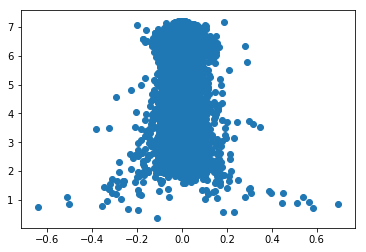

In [22]:
plt.scatter(load, pos_change)